<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Creating anime characters using Deep Convolutional Generative Adversarial Networks (DCGANs) and Keras**


Imagine if you are in a video game company, your games is famous for its unique characters for every player. With the growth of the player amount, it comes to be a nearly impossible mission to hand plot the characters for millions of players. Your boss plans to keep the unique character creating function in the game, and you need a method to handle the task. <br>

__Generative adversarial networks (GANs) might help!__<br>
It is a class of machine learning frameworks, first published in June 2014 <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. <br>
GANs could generate new data following the statistic features of the data in the training set. GANs is widely used to generate new and realistic photograph that is authentic to human observers. <br>

Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Applying the CNNs to GANs models could help us in building a photo generating model. The combined method is called Deep Convolutional Generative Adversarial Networks (DCGANs). <br>

In this lab, we will first focus on simulated data to better understand GANs. <br>
Further, we will use the case of massive anime avatar production to introduce how to use DCGANs.<br>
__You will create anime characters like the ones below in this project.__

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/face_cartton.png" width="700" alt="Skills Network Logo">


----
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown4.jpeg" width="50%"></center>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Basic:-Generative-Adversarial-Networks-(GANs)">Basic: Generative Adversarial Networks (GANs)</a>
        <ol>
            <li><a href="#Introduction">Introduction</a></li>
            <li><a href="#Toy-Data">Toy Data</a></li>
            <li><a href="#The-Generator">The Generator</a></li>
            <li><a href="#The-Loss-Function-GANs-(Optional)">The Loss Function GANs (Optional)</a></li>
            <li><a href="#Training-GANs">Training GANs</a></li>
        </ol>
    </li>
    <li>
        <a href="#Deep-Convolutional-Generative-Adversarial-Networks-(DCGANs)">Deep Convolutional Generative Adversarial Networks (DCGANs)</a></li>
        <ol>
            <li><a href="#Case-background">Case background</a></li>
            <li><a href="#Loading-the-Dataset">Loading the Dataset</a></li>
            <li><a href="#Creating-Data-Generator">Creating Data Generator</a></li>
            <li><a href="#Generator-and-Discriminator-(for-DCGANs)">Generator and Discriminator  (for DCGANs)</a></li>
            <li><a href="#Defining-Loss-Functions">Defining Loss Functions</a></li>
            <li><a href="#Defining-Optimizers">Defining Optimizers</a></li>
            <li><a href="#Create-Train-Step-Function">Create Train Step Function</a></li>
            <li><a href="#Training-DCGANs">Training DCGANs</a></li>
        </ol>
    <li>
    <a href="#Explore-Latent-Variables">Explore Latent Variables</a>
        <ol>
            <li><a href="#Exercise-1">Exercise 1</a></li>
            <li><a href="#Exercise-2">Exercise 2</a></li>
            <li><a href="#Exercise-3">Exercise 3</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab, you will be able to:

- __Understand__ the original formulation of GANs, and their two separately trained networks: Generator and Discriminator
- __Implement__ GANs on simulated and real datasets
- __Apply__ DCGANs to a dataset
- __Understand__ how to train DCGANs
- __Generate__ an image using a DCGAN
- __Understand__ how changing the input of the latent space of DCGANs changes the generated image


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for loading datasets.
*   [`tensorflow`](https://www.tensorflow.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and neural network related functions.




### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 skillsnetwork
# Note: If your environment doesn't support "!mamba install", use "!pip install"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 281.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:

_You need ~30 seconds to install._


In [2]:
!pip install tqdm skillsnetwork

  Using cached skillsnetwork-0.21.9-py3-none-any.whl.metadata (2.0 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached skillsnetwork-0.21.9-py3-none-any.whl (26 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


Run the following upgrade and then **RESTART YOUR KERNEL**. Make sure the version of tensorflow imported below is **no less than 2.9.0**.


In [3]:
!pip3 install  --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_

_You need ~1 minute to import._


In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.18.0
skillsnetwork version: 0.21.9


### Defining Helper Functions


In [5]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

----


## Basic: Generative Adversarial Networks (GANs)


### Introduction


__Generative Adversarial Networks (GANs)__ are generative models that convert random samples of one distribution into another distribution. They have several applications, like the following:

*  Generate Examples for Image Datasets
*  Generate Photographs of Human Faces
*  Generate Realistic Photographs
*  Generate Cartoon Characters
*  Image-to-Image Translation
*  Text-to-Image Translation
*  Face Frontal View Generation
*  Generate New Human Poses
*  Face Aging
*  Photo Blending
*  Super Resolution
*  Photo Inpainting
*  Clothing Translation
*  Video Prediction

In this GANs section of the Lab, we will use a toy example to help understand the __basic theoretical principles__ behind GANs. The original form of GANs consisted of a __discriminator__ and a __generator__; let's use the analogy of a currency forger and the police.

The Generator is the currency forger, and the output is the counterfeit, for example, a 100-dollar bill. The discriminator is analogous to the police taking the counterfeit and trying to determine if it's real by comparing it to a real $100 bill. In real life, if the counterfeit is easy to detect, the forger will adapt; conversely, the police will also improve; GANs emulate this game of cat and mouse.  

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/General%20diagram.png" alt="generator image" width="700px"></center>

What makes GANs interesting is that the __discriminator and generator continuously improve__ each other by a well-formulated cost function that backpropagates the errors. GANs are a family of algorithms that use _learning by comparison_. In the lab, we will review the original formulation and use a simulated dataset. We will also point you to some more advanced methods and issues you will encounter with the real datasets for the next lab.


### Toy Data

Consider the following data, $\mathbf{x}$, that is normally distributed $\mathbf{x} \sim \mathcal{N}(\mathbf{x}|10,1) $ with a mean of 10 and a standard deviation of 1. Now we would like to randomly sample data from this distribution.


In [6]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 9.994354
standard deviation: 0.9960215


We also have the data sample, z, which is also normally distributed $\mathbf{z} \sim \mathcal{N}(\mathbf{z}|0,2) $, with mean of 0 and a standard deviation of 2:



In [7]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)

In [8]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: -0.0115582105
standard deviation: 1.9817939


Let's compare the two distributions:


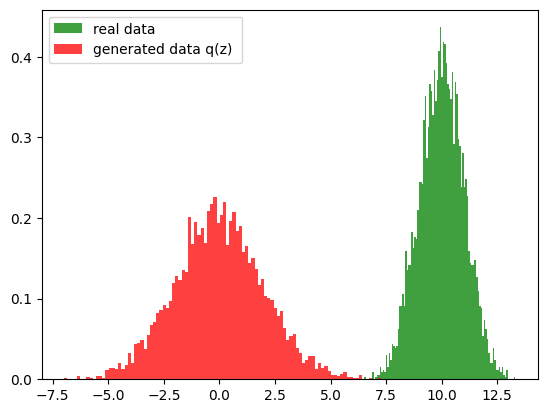

In [9]:
plot_distribution(X,Z,discriminator=None,density=True)

Let's create our first generative model by adding 10 to every sample of $z$. We will call the result $\hat{\mathbf{x}}$  as it's an approximation of $\mathbf{x}$. It is not too difficult to show that $\hat{\mathbf{x}} \sim \mathcal{N}(\mathbf{x}|10,1)$.Xhat=Z+10


In [10]:
Xhat=Z+10

We see that the mean and standard deviation are almost identical


In [11]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 9.988441
standard deviation: 1.9817939


Similarly for the histograms


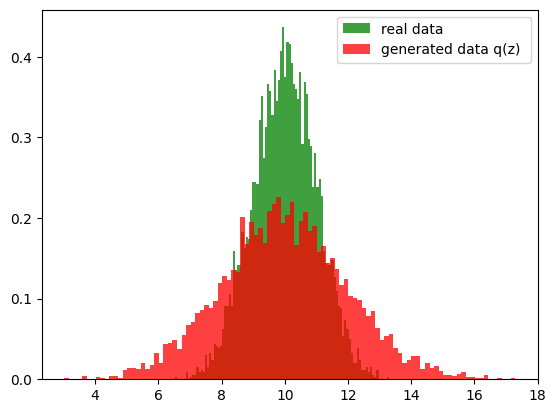

In [12]:
plot_distribution(X,Xhat,discriminator=None,density=True)

In the case above, since we just add 10 to the latent variable $z$, we transform $z$ using a deterministic function. We can call this an implicit generative model.


### The Generator


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown.png" width="300px">

There are two networks involved in a GAN, the Generator and the Discriminator. Let's understand the Generator network first.

The Generator is a neural network denoted by $G$; the idea is that a neural network can approximate any function (by the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01)), so you should be able to generate data samples from any type of distribution.

Our goal is to convert the samples, $\mathbf{z}$, to one that approximates $\hat{\mathbf{x}}$,  i.e $\hat{\mathbf{x}}=G(\mathbf{z})$. Let's build a simple Generator $G(\mathbf{z})=\mathbf{W}^{T}\mathbf{z}+\mathbf{b} $ using Keras.

The following is a function that outputs a generator using Kera's Sequential model object.


In [13]:
def make_generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(1))
    return generator

We can use the Generator to convert $\mathbf{z}$ and make a prediction $\hat{\mathbf{x}}$, and display the histogram of the distributions of $\hat{\mathbf{x}}$ and $\mathbf{x}$. As the model is not trained, the trained distributions are quite different:


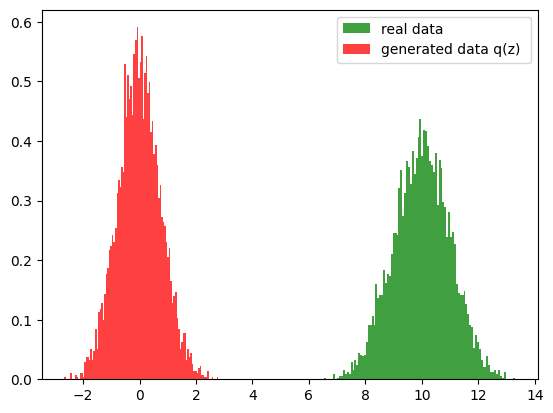

In [14]:
generator=make_generator_model()

Xhat = generator(Z, training=False)
plot_distribution(real_data=X,generated_data=Xhat)

We will discuss the use of the parameter ```training=False``` later on.


### The Discriminator


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown1.png" width="300px">

The discriminator $D(\mathbf{x})$ is a neural network that learns to distinguish between actual and generated samples. The simplest Discriminator is a simple logistic regression function. Let's create a discriminator in Keras with one Dense layer; we leave the logistic function out as it will be incorporated in the cost function, which is the convention in Keras.


In [15]:
def make_discriminator_model():
    discriminator=tf.keras.Sequential()
    discriminator.add(layers.Dense(1))
    return discriminator

discriminator=make_discriminator_model()

The discriminator and generator are randomly initialized, but we can plot the output of each and compare it to the true data distribution, with the generated data in red and the real data in green, and the logistic function as a function of the x axis. We also include the threshold. If the output of the logistic function is less than 0.5, the sample is classified as generated data; conversely, if the output is greater than 0.5, the sample will be classified as data that came from the real distribution.


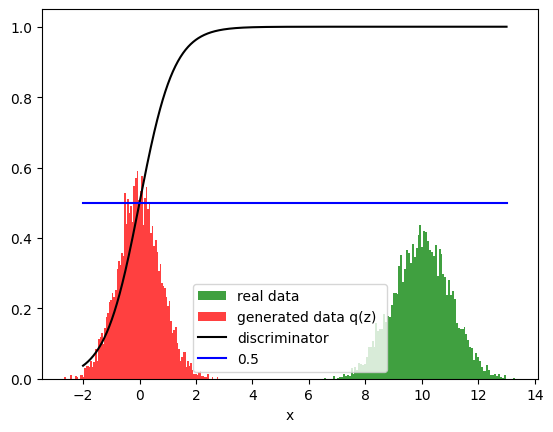

In [16]:
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator)

Applying the sigmoid function to the discriminator output, we get the probabilites that the samples belong to the real distribution. We can count the number of true samples that the discriminator correctly classifies.

For the real data, the discriminator successfully assigns a probability greater than 0.5 for all 5000 samples:


In [17]:
py_x=tf.math.sigmoid(discriminator(X,training=False))
np.sum(py_x>0.5)

5000

For the generated data, only a part of the 5000 samples are classified as having more than 50% chance of coming from the real distribution.


In [18]:
py_x=discriminator(Xhat)
np.sum(py_x>0.5)

1672

We can also use the following to find the average value of the sigmoid function for all the samples.  


In [19]:
def get_accuracy(X,Xhat):
    total=0
    py_x=tf.math.sigmoid(discriminator(X,training=False))
    total=np.mean(py_x)
    py_x=tf.math.sigmoid(discriminator(Xhat,training=False))
    total+=np.mean(py_x)
    return total/2

In [20]:
get_accuracy(X,Xhat)

0.7488137483596802

In many cases, we can instead study the difference in the distribution; in this case, the discriminator is called a <a href='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/2107.06700.pdf'>Critic</a>, a real-valued function.


### The Loss Function GANs (Optional)
GANs convert an unsupervised learning problem to a supervised one. Instead of formulating the problem like a two-player minimax game with a value function like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>, we can treat the problem of maximizing the familiar log-likelihood of the logistic function analogous to minimizing the cross-entropy loss, then incorporate the generator and discriminator.

___Discriminator___

In order to train the GANS, we start off with standard maximization of the likelihood for the discriminator for the standard dataset $\mathcal{D}=\{{(x_1, y_1), ..., (x_N, y_N)}\}$:

$$V(D)=\sum_{n=1}^N \left( y_n \ln(D(\mathbf{x}_n))+(1-y_n) \ln(1-D(\mathbf{x}_n))\right)$$

Where $y=1$ for samples from the true distribution and $y=0$ for samples from the generator. The goal is to maximize this term with respect to $D$:

$$max_{D}(V(D))$$


To also incorporate the generated samples, we augment the right side of the equation with the generated $k$th sample $\hat{\mathbf{x}}_k$. As they are not part of the dataset $k \notin \mathcal{D} $, we have to include a second summation where $y=0$. Finally, combining the cases of $y=1$ and $y=0$, we get:

$$V(D)=\sum_{ n	\in \mathcal{D}}  \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(\hat{\mathbf{x}}_k) ) $$


___Generator___

For the generator we simply replace $\hat{\mathbf{x}}_k$ with the $G(\mathbf{z}_k)$ .


$$V(G,D)=\sum_{n	\in \mathcal{D}} \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k))) $$

As this is a density estimation problem, it is common to replace the summation with the expected value like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. We replace the summations with an expectation where $p(\mathbf{x})$ is the true distribution and $p(\mathbf{z})$ is the distribution of $\mathbf{z}$.


$$V(D,G)=\mathbb{E}_{x\sim p(\mathbf{x})} \ln(D(\mathbf{x})) + \mathbb{E}_{\mathbf{z} \sim p(\mathbf{z})} \ln(1-D(G(\mathbf{z}) )) $$

As we are trying to trick the discriminator, we would like to find a $G$ that minimize the above expression, such as:

$$min_{G} max_{D} V(D,G)$$


### Training GANs

GANs are quite difficult to train, even for a simple example. Let's start off with training the generator in practice.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown3.jpeg" width="500px">

___Training Generator___

$log(1 − D(G(\mathbf{z})))$ is difficult to work with as $D(G(\mathbf{z}))$ is near one or zero for the first few iterations. This is because the generator is not yet properly trained, and the discriminator can easily distinguish between the generated and actual samples. Therefore we maximize $log(D(G(\mathbf{z}_k)) )$.

Although the output of the generator passes through the discriminator, we do not update the generator in the optimization step, hence we set the parameter ```training=False``` in the actual training steps.


Instead of maximizing the term, we can take the negative and minimize it. The resultant expression can be calculated in Keras using the cross-entropy loss where all the target values are set to one:

$$\sum_{k 	\notin \mathcal{D}} log(1 - D(G(\mathbf{z}_k)) )$$


In [21]:
# This method returns a helper function to compute crossentropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

___Training Discriminator___

We can also use the cross-entropy to train the discriminator; we simply multiply $V(G,D)$ by a negative number, set $y=0$ for the generated values and $y=1$ for the real values. We do not update the generator parameters.

$$V(G)=\sum_{n	\in \mathcal{D}} (\ln(D(\mathbf{x}_n)))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k) )) $$


The first term is the real loss and the second is the fake loss in Keras.


In [22]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

We create the optimizer for the discriminator and generator:


In [23]:
generator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5,beta_2=0.8)

discriminator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5, beta_2=0.8)

We now train the model; as the dataset is small, we will use batch gradient descent.

For each iteration we will generate $M$ real examples $\{\mathbf{x}_{1}, ...,\mathbf{x}_{M}\}$, these are from the generating distribution $p(\mathbf{x})$. This would be our actual dataset if we used real data.  

We will then generate a sample batch of $M$ noise samples $\{\mathbf{z}_{1}, ...,\mathbf{z}_{M}\}$ from noise prior $p(\mathbf{z})$ and convert the result to a generated image using the generator $\{\hat{\mathbf{x}}_{1}, ...,\hat{\mathbf{x}}_{M}\}$.

We determine the output of the discriminator for both the real and generated samples. We calculate the loss and then update the discriminator and generator through their respective stochastic gradients.


The convergence of GAN training is a subject in itself. But let's explore a method that works for this simple dataset. Intuitively, we know that if our generated data is identical to our actual data, the probability of correctly classifying is random. Therefore if the generated and actual data are of equal proportion, $D(\mathbf{x}_n)=0.5$ and $D(\hat{\mathbf{x}}_n)=0.5$.  

We only display iterations where the average discriminator output gets closer to 50% for both the generated data and actual data.


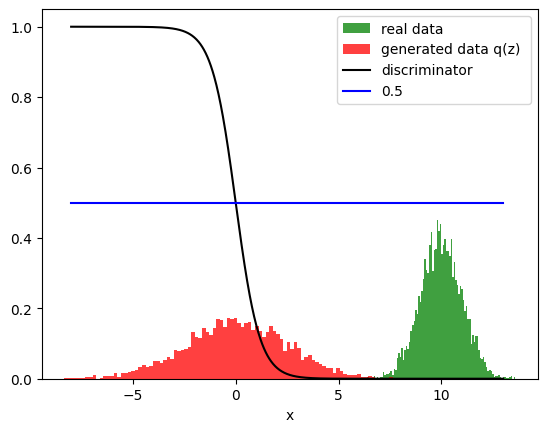

epoch 0


  0%|          | 0/20 [00:00<?, ?it/s]

0.27301791310310364


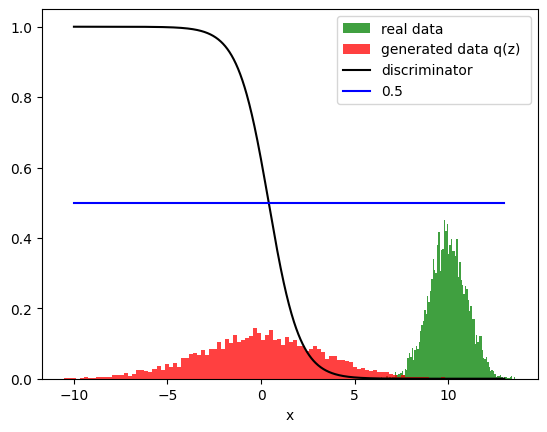

  5%|▌         | 1/20 [00:02<00:51,  2.71s/it]

epoch 0
0.3680504858493805


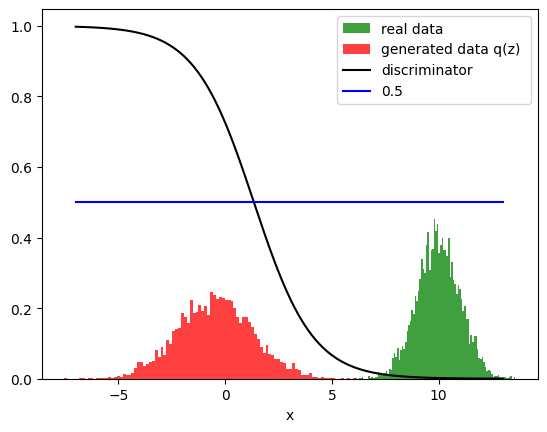

 10%|█         | 2/20 [00:03<00:25,  1.43s/it]

epoch 1
0.5631711483001709


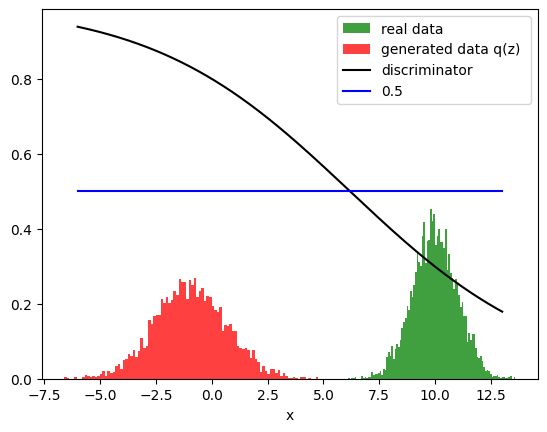

 25%|██▌       | 5/20 [00:03<00:07,  2.13it/s]

epoch 2


 60%|██████    | 12/20 [00:04<00:01,  7.69it/s]

0.5097830295562744


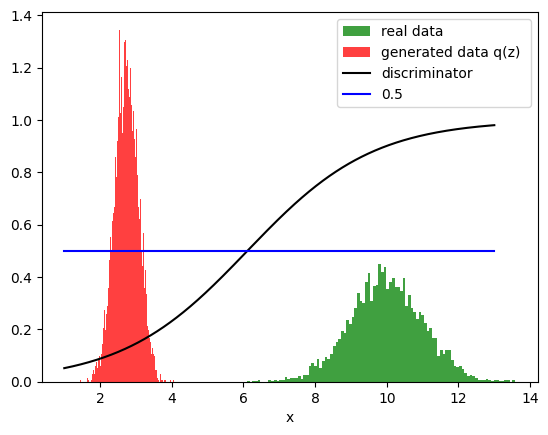

 85%|████████▌ | 17/20 [00:05<00:00,  7.44it/s]

epoch 14


100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


In [ ]:
#parameters for training
epochs=20
BATCH_SIZE=5000
noise_dim=1
epsilon=100


#discrimator and gernerator
tf.random.set_seed(0)
discriminator=make_discriminator_model()
generator=make_generator_model()

tf.config.run_functions_eagerly(True)



gen_loss_epoch=[]
disc_loss_epoch=[]
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator )
print("epoch",0)

for epoch in tqdm(range(epochs)):
    #data for the true distribution of your real data samples training ste
    x = tf.random.normal((BATCH_SIZE,1),mean=10,stddev=1.0)
    #random samples it was found if you increase the standard deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, noise_dim],mean=0,stddev=10)
    # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(x, training=True)
        #the output of the discriminator  data
        fake_output = discriminator(xhat, training=True)
        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    # Compute the gradients for gen_loss and generator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  # Save and display the generator and discriminator if the performance increases
    if abs(0.5-get_accuracy(x,xhat))<epsilon:
        epsilon=abs(0.5-get_accuracy(x,xhat))
        generator.save('generator.keras')
        discriminator.save('discriminator.keras')
        print(get_accuracy(x,xhat))
        plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )
        print("epoch",epoch)

For more on training GANs check out the following <a href="https://jonathan-hui.medium.com/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01">blog</a>. We can display the best performing model


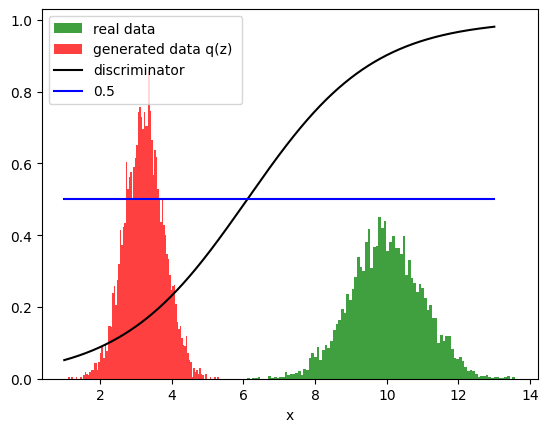

In [ ]:
generator=make_generator_model()
generator= models.load_model('generator.keras')
xhat=generator(z)
discriminator=models.load_model('discriminator.keras')
plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )

----


In the content above, you learned about the working mechanics of Generative Adversarial Networks (GANs) and their various applications, such as Image Generation. However, GANs have also been known to be unstable to train, and often, the generated images suffer from being noisy and incomprehensible.

For a improved result in the case example, we are applying Convolutional Neural Networks to GANS. They are called Deep Convolutional Generative Adversarial Networks (DCGANs).
We will build and train DCGANs in the following content, using several approaches introduced in the original <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">DCGANs paper</a>.



----


## Deep Convolutional Generative Adversarial Networks (DCGANs)


### Case background


In the case example, you work for an online anime video game company; the company would like to create a unique anime avatar for a game for each player. As there are millions of players, you must use a DCGANs to create each character.

The proposed approaches are summarized here:

- Replace any pooling layers with **strided convolutions (discriminator)** and **fractional-strided
convolutions (generator)**.
- Use **batchnorm** in both the generator and the discriminator.
- **Remove fully connected hidden layers** for deeper architectures.
- Use **ReLU** activation in generator for all layers except for the output, which uses **Tanh**.
- Use **LeakyReLU** activation in the discriminator for all layers except for the output, which uses **Sigmoid**.
- Use **Adam optimizer**.  

These approaches will result in more stable training of deeper generative models.


### Loading the Dataset

We will mainly work with the Anime Face dataset from [Kaggle](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01). The original dataset has 63,632 "high-quality" anime faces, but to make the models train faster in this lab, we randomly sampled 20,000 images and prepared a dataset called `cartoon_20000`.

Let's download the smaller dataset using the Skills Network library's `prepare` function:


In [ ]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module6/cartoon_20000.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/20001 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

The Anime Face or the Cartoon images are stored in the `cartoon_2000` folder in your current working directory. As a preprocessing step, we have removed any files that are not proper image formats (based on the file extensions) and any duplicate images.


### Creating Data Generator


First, we declare some properties of our images, including image height, image width, and batch size.


In [ ]:
img_height, img_width, batch_size=64,64,128

Next, we create a Keras <code>image_dataset_from_directory</code> object with a specified image directory and the parameters are defined as above. This process may take some time:


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='cartoon_20000',
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 20000 files.


The `train_ds` we defined is a `tf.data.Dataset` that yields batches of images with `image_size = (64, 64)` from the directory specified or subdirectories (if any).


**(OPTIONAL)** If you are running this notebook locally and you have multiple cores, then we can use the runtime to tune the value dynamically at runtime as follows:


In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

We apply the Lambda function on `train_ds` to normalize the pixel values of all the input images from $[0, 255]$ to $[-1, 1]$:


In [ ]:
normalization_layer = layers.Rescaling(scale= 1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

Let's take one batch of images for displaying:


In [ ]:
images=train_ds.take(1)

Convert the batch dimension to the indexes in a list:


In [ ]:
X=[x for x in images]

We can then plot the first five images in the batch using the function   ```plot_array```:


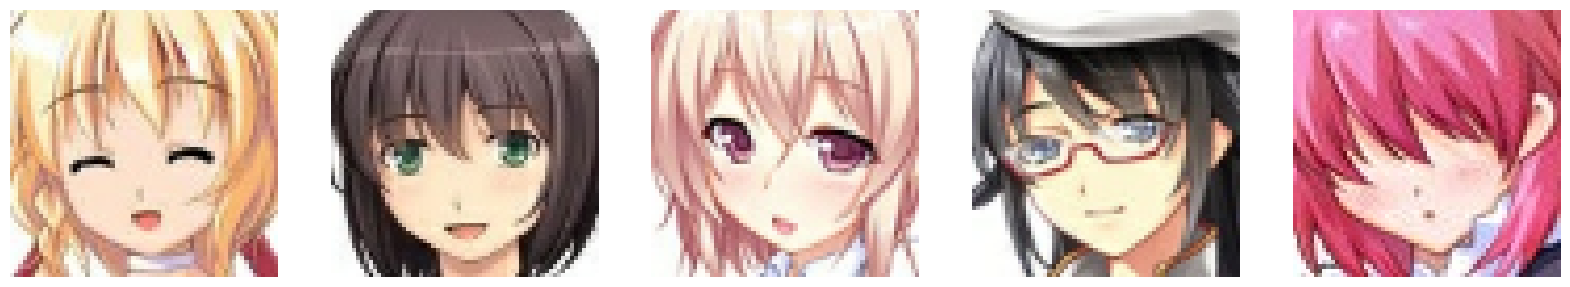

In [ ]:
plot_array(X[0])

###  Generator and Discriminator (for DCGANs)


___Building the Generator___


The Generator is comprised of several layers of transposed convolution, the opposite of convolution operations.

- Each Conv2DTranspose layer (except the final layer) is followed by a Batch Normalization layer and a **Relu activation**; for more implementation details, check out <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a>.
- The final transpose convolution layer has three output channels since the output needs to be a color image. We use the **Tanh activation** in the final layer.

See the illustration of the architecture from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a> below.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/generator.png" alt="generator image" width="80%"></center>


We build the Generator network by using the parameter values from <a href="https://learnopencv.com/deep-convolutional-gan-in-pytorch-and-tensorflow/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01" >[3]<a>.


In [ ]:
from tensorflow.keras import Model

def make_generator():
    # Create input layer explicitly
    inputs = Input(shape=(1, 1, 100), name='input_layer')

    # Block 1: input is latent vector -> 4x4x512
    x = Conv2DTranspose(64 * 8, kernel_size=4, strides=4, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_1')(inputs)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_1')(x)
    x = ReLU(name='relu_1')(x)

    # Block 2: 4x4x512 -> 8x8x256
    x = Conv2DTranspose(64 * 4, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_2')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_2')(x)
    x = ReLU(name='relu_2')(x)

    # Block 3: 8x8x256 -> 16x16x128
    x = Conv2DTranspose(64 * 2, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_3')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_3')(x)
    x = ReLU(name='relu_3')(x)

    # Block 4: 16x16x128 -> 32x32x64
    x = Conv2DTranspose(64 * 1, kernel_size=4, strides=2, padding='same',
                       kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                       use_bias=False, name='conv_transpose_4')(x)
    x = BatchNormalization(momentum=0.1, epsilon=0.8, center=1.0, scale=0.02, name='bn_4')(x)
    x = ReLU(name='relu_4')(x)

    # Final Block: 32x32x64 -> 64x64x3
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same',
                            kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02),
                            use_bias=False, activation='tanh',
                            name='conv_transpose_5')(x)

    # Create model using functional API
    model = Model(inputs=inputs, outputs=outputs, name='generator')

    return model

By printing the summary of the Generator architecture, we can see that the transposed convolutions **upsample** a 100-dim input vector to a high-dimensional image of size 64 x 64 x 3.


In [ ]:
gen = make_generator()
gen.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_1 (Conv2DTranspose)   │ (None, 4, 4, 512)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (ReLU)                        │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_2 (Conv2DTranspose)   │ (None, 8, 8, 256)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (ReLU)                        │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_3 (Conv2DTranspose)   │ (None, 16, 16, 128)         │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_3 (ReLU)                        │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_4 (Conv2DTranspose)   │ (None, 32, 32, 64)          │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_4 (BatchNormalization)            │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_4 (ReLU)                        │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_5 (Conv2DTranspose)   │ (None, 64, 64, 3)           │           3,072 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,578,624 (13.65 MB)

 Trainable params: 3,576,704 (13.64 MB)

 Non-trainable params: 1,920 (7.50 KB)

___Building the Discriminator___


The Discriminator has five convolution layers.

- All but the first and final Conv2D layers have Batch Normalization, since directly applying batchnorm to all layers could result in sample oscillation and model instability;
- The first four Conv2D layers use the **Leaky-Relu activation** with a slope of 0.2.
- Lastly, instead of a fully connected layer, the  output layer has a convolution layer with a **Sigmoid activation** function.


In [ ]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

By printing the summary of the Discriminator architecture, we can see that the strided convolutions **downsample** an input image of size 64 x 64 x 3.


In [ ]:
disc = make_discriminator()
disc.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 32, 32, 64)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_1 (LeakyReLU)             │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 16, 16, 128)         │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_2 (LeakyReLU)             │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 8, 8, 256)           │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_3 (LeakyReLU)             │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 4, 4, 512)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_4 (LeakyReLU)             │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_5 (Conv2D)                      │ (None, 2, 2, 1)             │           8,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,767,360 (10.56 MB)

 Trainable params: 2,765,568 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

### Defining Loss Functions

As we discussed in the previous section, the min-max optimization problem can be formulated by minimizing the cross entropy loss for the Generator and Discriminator.  

The `cross_entropy` object is the Binary Cross Entropy loss that will be used to model the objectives of the two networks.


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [ ]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

### Defining Optimizers

We create two Adam optimizers for the discriminator and the generator, respectively. We pass the following arguments to the optimizers:

- learning rate of 0.0002.
- beta coefficients $\beta_1 = 0.5$ and $\beta_2 = 0.999$, which are responsible for computing the running averages of the gradients during backpropagation.


In [ ]:
learning_rate = 0.0002

generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

### Create Train Step Function

As this lab is more computationally intensive than the last lab, we convert the training step into a function and then use the  @tf.function decorator, which allows the function to be "compiled" into a **callable TensorFlow graph**. This will speed up the training; for more information, read <a href="https://www.tensorflow.org/guide/function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01">here </a>


In [ ]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

Don't be intimidated by the code above, here is a summary of what a train step accomplishes:

- First, we sample `z`, a batch of noise vectors from a normal distribution ($\mu = 1, \sigma = 1$) and feed it to the Generator.
- The Generator produces generated or "fake" images `xhat`.
- We feed real images `X` and fake images `xhat` to the Discriminator and obtain `real_output` and `fake_output` respectively as the scores.
- We calculate Generator loss `gen_loss` using the `fake_output` from Discriminator since we want the fake images to fool the Discriminator as much as possible.
- We calculate Discriminator loss `disc_loss` using both the `real_output` and `fake_output` since we want the Discriminator to distinguish the two as much as possible.
- We calculate `gradients_of_generator` and  `gradients_of_discriminator` based on the losses obtained.
- Finally, we update the Generator and Discriminator by letting their respective optimizers apply the processed gradients on the trainable model parameters.


We can transform the random noise using the generator. As the generator is not trained yet, the output appears to be noises:


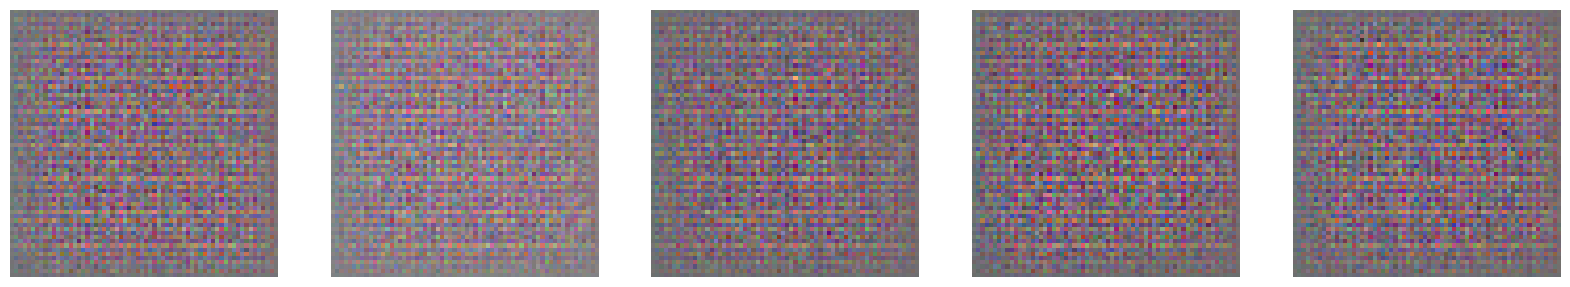

In [ ]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

### Training DCGANs


As this method is computationally intensive, we will train the model for one epoch and then use the generator to produce artificial images.

__Even 1 epoch in DCGANs training takes long time.__ You can __stop the training__ here and import the pre-trained model following the instruction below.


epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 1, iteration 1


epoch 1:   1%|          | 1/157 [00:00<01:32,  1.69it/s]

epoch 1, iteration 2


epoch 1:   1%|▏         | 2/157 [00:01<01:31,  1.70it/s]

epoch 1, iteration 3


epoch 1:   2%|▏         | 3/157 [00:01<01:14,  2.08it/s]

epoch 1, iteration 4


epoch 1:   3%|▎         | 4/157 [00:01<01:05,  2.32it/s]

epoch 1, iteration 5


epoch 1:   3%|▎         | 5/157 [00:02<00:59,  2.54it/s]

epoch 1, iteration 6


epoch 1:   4%|▍         | 6/157 [00:02<00:56,  2.66it/s]

epoch 1, iteration 7


epoch 1:   4%|▍         | 7/157 [00:02<00:55,  2.71it/s]

epoch 1, iteration 8


epoch 1:   5%|▌         | 8/157 [00:03<00:52,  2.81it/s]

epoch 1, iteration 9


epoch 1:   6%|▌         | 9/157 [00:03<00:51,  2.87it/s]

epoch 1, iteration 10


epoch 1:   6%|▋         | 10/157 [00:03<00:51,  2.86it/s]

epoch 1, iteration 11


epoch 1:   7%|▋         | 11/157 [00:04<00:50,  2.87it/s]

epoch 1, iteration 12


epoch 1:   8%|▊         | 12/157 [00:04<00:50,  2.87it/s]

epoch 1, iteration 13


epoch 1:   8%|▊         | 13/157 [00:04<00:49,  2.90it/s]

epoch 1, iteration 14


epoch 1:   9%|▉         | 14/157 [00:05<00:49,  2.87it/s]

epoch 1, iteration 15


epoch 1:  10%|▉         | 15/157 [00:05<00:48,  2.90it/s]

epoch 1, iteration 16


epoch 1:  10%|█         | 16/157 [00:05<00:48,  2.90it/s]

epoch 1, iteration 17


epoch 1:  11%|█         | 17/157 [00:06<00:47,  2.94it/s]

epoch 1, iteration 18


epoch 1:  11%|█▏        | 18/157 [00:06<00:47,  2.96it/s]

epoch 1, iteration 19


epoch 1:  12%|█▏        | 19/157 [00:06<00:47,  2.94it/s]

epoch 1, iteration 20


epoch 1:  13%|█▎        | 20/157 [00:07<00:46,  2.92it/s]

epoch 1, iteration 21


epoch 1:  13%|█▎        | 21/157 [00:07<00:46,  2.92it/s]

epoch 1, iteration 22


epoch 1:  14%|█▍        | 22/157 [00:08<00:46,  2.93it/s]

epoch 1, iteration 23


epoch 1:  15%|█▍        | 23/157 [00:08<00:45,  2.97it/s]

epoch 1, iteration 24


epoch 1:  15%|█▌        | 24/157 [00:08<00:44,  2.99it/s]

epoch 1, iteration 25


epoch 1:  16%|█▌        | 25/157 [00:09<00:44,  3.00it/s]

epoch 1, iteration 26


epoch 1:  17%|█▋        | 26/157 [00:09<00:46,  2.83it/s]

epoch 1, iteration 27


epoch 1:  17%|█▋        | 27/157 [00:09<00:49,  2.65it/s]

epoch 1, iteration 28


epoch 1:  18%|█▊        | 28/157 [00:10<00:49,  2.61it/s]

epoch 1, iteration 29


epoch 1:  18%|█▊        | 29/157 [00:10<00:50,  2.54it/s]

epoch 1, iteration 30


epoch 1:  19%|█▉        | 30/157 [00:11<00:52,  2.43it/s]

epoch 1, iteration 31


epoch 1:  20%|█▉        | 31/157 [00:11<00:52,  2.39it/s]

epoch 1, iteration 32


epoch 1:  20%|██        | 32/157 [00:11<00:50,  2.48it/s]

epoch 1, iteration 33


epoch 1:  21%|██        | 33/157 [00:12<00:47,  2.60it/s]

epoch 1, iteration 34


epoch 1:  22%|██▏       | 34/157 [00:12<00:45,  2.71it/s]

epoch 1, iteration 35


epoch 1:  22%|██▏       | 35/157 [00:12<00:43,  2.78it/s]

epoch 1, iteration 36


epoch 1:  23%|██▎       | 36/157 [00:13<00:42,  2.83it/s]

epoch 1, iteration 37


epoch 1:  24%|██▎       | 37/157 [00:13<00:41,  2.87it/s]

epoch 1, iteration 38


epoch 1:  24%|██▍       | 38/157 [00:13<00:40,  2.91it/s]

epoch 1, iteration 39


epoch 1:  25%|██▍       | 39/157 [00:14<00:40,  2.91it/s]

epoch 1, iteration 40


epoch 1:  25%|██▌       | 40/157 [00:14<00:39,  2.94it/s]

epoch 1, iteration 41


epoch 1:  26%|██▌       | 41/157 [00:14<00:39,  2.92it/s]

epoch 1, iteration 42


epoch 1:  27%|██▋       | 42/157 [00:15<00:39,  2.89it/s]

epoch 1, iteration 43


epoch 1:  27%|██▋       | 43/157 [00:15<00:38,  2.94it/s]

epoch 1, iteration 44


epoch 1:  28%|██▊       | 44/157 [00:15<00:38,  2.93it/s]

epoch 1, iteration 45


epoch 1:  29%|██▊       | 45/157 [00:16<00:38,  2.91it/s]

epoch 1, iteration 46


epoch 1:  29%|██▉       | 46/157 [00:16<00:37,  2.92it/s]

epoch 1, iteration 47


epoch 1:  30%|██▉       | 47/157 [00:17<00:37,  2.93it/s]

epoch 1, iteration 48


epoch 1:  31%|███       | 48/157 [00:17<00:37,  2.92it/s]

epoch 1, iteration 49


epoch 1:  31%|███       | 49/157 [00:17<00:36,  2.95it/s]

epoch 1, iteration 50


epoch 1:  32%|███▏      | 50/157 [00:18<00:35,  2.98it/s]

epoch 1, iteration 51


epoch 1:  32%|███▏      | 51/157 [00:18<00:35,  2.95it/s]

epoch 1, iteration 52


epoch 1:  33%|███▎      | 52/157 [00:18<00:35,  2.96it/s]

epoch 1, iteration 53


epoch 1:  34%|███▍      | 53/157 [00:19<00:34,  2.98it/s]

epoch 1, iteration 54


epoch 1:  34%|███▍      | 54/157 [00:19<00:34,  2.97it/s]

epoch 1, iteration 55


epoch 1:  35%|███▌      | 55/157 [00:19<00:34,  2.99it/s]

epoch 1, iteration 56


epoch 1:  36%|███▌      | 56/157 [00:20<00:33,  3.00it/s]

epoch 1, iteration 57


epoch 1:  36%|███▋      | 57/157 [00:20<00:33,  3.01it/s]

epoch 1, iteration 58


epoch 1:  37%|███▋      | 58/157 [00:20<00:33,  3.00it/s]

epoch 1, iteration 59


epoch 1:  38%|███▊      | 59/157 [00:21<00:32,  3.00it/s]

epoch 1, iteration 60


epoch 1:  38%|███▊      | 60/157 [00:21<00:32,  2.98it/s]

epoch 1, iteration 61


epoch 1:  39%|███▉      | 61/157 [00:21<00:33,  2.88it/s]

epoch 1, iteration 62


epoch 1:  39%|███▉      | 62/157 [00:22<00:34,  2.76it/s]

epoch 1, iteration 63


epoch 1:  40%|████      | 63/157 [00:22<00:35,  2.62it/s]

epoch 1, iteration 64


epoch 1:  41%|████      | 64/157 [00:22<00:36,  2.51it/s]

epoch 1, iteration 65


epoch 1:  41%|████▏     | 65/157 [00:23<00:38,  2.37it/s]

epoch 1, iteration 66


epoch 1:  42%|████▏     | 66/157 [00:23<00:38,  2.35it/s]

epoch 1, iteration 67


epoch 1:  43%|████▎     | 67/157 [00:24<00:38,  2.35it/s]

epoch 1, iteration 68


epoch 1:  43%|████▎     | 68/157 [00:24<00:35,  2.50it/s]

epoch 1, iteration 69


epoch 1:  44%|████▍     | 69/157 [00:25<00:33,  2.61it/s]

epoch 1, iteration 70


epoch 1:  45%|████▍     | 70/157 [00:25<00:32,  2.66it/s]

epoch 1, iteration 71


epoch 1:  45%|████▌     | 71/157 [00:25<00:31,  2.70it/s]

epoch 1, iteration 72


epoch 1:  46%|████▌     | 72/157 [00:26<00:31,  2.74it/s]

epoch 1, iteration 73


epoch 1:  46%|████▋     | 73/157 [00:26<00:30,  2.77it/s]

epoch 1, iteration 74


epoch 1:  47%|████▋     | 74/157 [00:26<00:29,  2.83it/s]

epoch 1, iteration 75


epoch 1:  48%|████▊     | 75/157 [00:27<00:28,  2.87it/s]

epoch 1, iteration 76


epoch 1:  48%|████▊     | 76/157 [00:27<00:28,  2.85it/s]

epoch 1, iteration 77


epoch 1:  49%|████▉     | 77/157 [00:27<00:27,  2.91it/s]

epoch 1, iteration 78


epoch 1:  50%|████▉     | 78/157 [00:28<00:27,  2.91it/s]

epoch 1, iteration 79


epoch 1:  50%|█████     | 79/157 [00:28<00:26,  2.91it/s]

epoch 1, iteration 80


epoch 1:  51%|█████     | 80/157 [00:28<00:26,  2.91it/s]

epoch 1, iteration 81


epoch 1:  52%|█████▏    | 81/157 [00:29<00:26,  2.91it/s]

epoch 1, iteration 82


epoch 1:  52%|█████▏    | 82/157 [00:29<00:26,  2.86it/s]

epoch 1, iteration 83


epoch 1:  53%|█████▎    | 83/157 [00:29<00:25,  2.86it/s]

epoch 1, iteration 84


epoch 1:  54%|█████▎    | 84/157 [00:30<00:25,  2.90it/s]

epoch 1, iteration 85


epoch 1:  54%|█████▍    | 85/157 [00:30<00:24,  2.91it/s]

epoch 1, iteration 86


epoch 1:  55%|█████▍    | 86/157 [00:30<00:24,  2.90it/s]

epoch 1, iteration 87


epoch 1:  55%|█████▌    | 87/157 [00:31<00:24,  2.89it/s]

epoch 1, iteration 88


epoch 1:  56%|█████▌    | 88/157 [00:31<00:23,  2.89it/s]

epoch 1, iteration 89


epoch 1:  57%|█████▋    | 89/157 [00:31<00:23,  2.93it/s]

epoch 1, iteration 90


epoch 1:  57%|█████▋    | 90/157 [00:32<00:22,  2.92it/s]

epoch 1, iteration 91


epoch 1:  58%|█████▊    | 91/157 [00:32<00:22,  2.93it/s]

epoch 1, iteration 92


epoch 1:  59%|█████▊    | 92/157 [00:32<00:21,  2.96it/s]

epoch 1, iteration 93


epoch 1:  59%|█████▉    | 93/157 [00:33<00:21,  2.97it/s]

epoch 1, iteration 94


epoch 1:  60%|█████▉    | 94/157 [00:33<00:21,  2.96it/s]

epoch 1, iteration 95


epoch 1:  61%|██████    | 95/157 [00:33<00:20,  2.99it/s]

epoch 1, iteration 96


epoch 1:  61%|██████    | 96/157 [00:34<00:20,  2.92it/s]

epoch 1, iteration 97


epoch 1:  62%|██████▏   | 97/157 [00:34<00:22,  2.72it/s]

epoch 1, iteration 98


epoch 1:  62%|██████▏   | 98/157 [00:35<00:22,  2.60it/s]

epoch 1, iteration 99


epoch 1:  63%|██████▎   | 99/157 [00:35<00:23,  2.49it/s]

epoch 1, iteration 100


epoch 1:  64%|██████▎   | 100/157 [00:36<00:23,  2.40it/s]

epoch 1, iteration 101


epoch 1:  64%|██████▍   | 101/157 [00:36<00:23,  2.35it/s]

epoch 1, iteration 102


epoch 1:  65%|██████▍   | 102/157 [00:36<00:22,  2.40it/s]

epoch 1, iteration 103


epoch 1:  66%|██████▌   | 103/157 [00:37<00:21,  2.55it/s]

epoch 1, iteration 104


epoch 1:  66%|██████▌   | 104/157 [00:37<00:19,  2.66it/s]

epoch 1, iteration 105


epoch 1:  67%|██████▋   | 105/157 [00:37<00:19,  2.71it/s]

epoch 1, iteration 106


epoch 1:  68%|██████▊   | 106/157 [00:38<00:18,  2.78it/s]

epoch 1, iteration 107


epoch 1:  68%|██████▊   | 107/157 [00:38<00:17,  2.84it/s]

epoch 1, iteration 108


epoch 1:  69%|██████▉   | 108/157 [00:38<00:16,  2.89it/s]

epoch 1, iteration 109


epoch 1:  69%|██████▉   | 109/157 [00:39<00:16,  2.90it/s]

epoch 1, iteration 110


epoch 1:  70%|███████   | 110/157 [00:39<00:16,  2.90it/s]

epoch 1, iteration 111


epoch 1:  71%|███████   | 111/157 [00:39<00:15,  2.92it/s]

epoch 1, iteration 112


epoch 1:  71%|███████▏  | 112/157 [00:40<00:15,  2.94it/s]

epoch 1, iteration 113


epoch 1:  72%|███████▏  | 113/157 [00:40<00:14,  2.93it/s]

epoch 1, iteration 114


epoch 1:  73%|███████▎  | 114/157 [00:40<00:14,  2.92it/s]

epoch 1, iteration 115


epoch 1:  73%|███████▎  | 115/157 [00:41<00:14,  2.93it/s]

epoch 1, iteration 116


epoch 1:  74%|███████▍  | 116/157 [00:41<00:13,  2.97it/s]

epoch 1, iteration 117


epoch 1:  75%|███████▍  | 117/157 [00:41<00:13,  2.97it/s]

epoch 1, iteration 118


epoch 1:  75%|███████▌  | 118/157 [00:42<00:13,  2.98it/s]

epoch 1, iteration 119


epoch 1:  76%|███████▌  | 119/157 [00:42<00:12,  2.98it/s]

epoch 1, iteration 120


epoch 1:  76%|███████▋  | 120/157 [00:42<00:12,  2.97it/s]

epoch 1, iteration 121


epoch 1:  77%|███████▋  | 121/157 [00:43<00:12,  2.98it/s]

epoch 1, iteration 122


epoch 1:  78%|███████▊  | 122/157 [00:43<00:11,  2.97it/s]

epoch 1, iteration 123


epoch 1:  78%|███████▊  | 123/157 [00:44<00:11,  2.93it/s]

epoch 1, iteration 124


epoch 1:  79%|███████▉  | 124/157 [00:44<00:11,  2.95it/s]

epoch 1, iteration 125


epoch 1:  80%|███████▉  | 125/157 [00:44<00:10,  2.97it/s]

epoch 1, iteration 126


epoch 1:  80%|████████  | 126/157 [00:45<00:10,  2.96it/s]

epoch 1, iteration 127


epoch 1:  81%|████████  | 127/157 [00:45<00:10,  2.95it/s]

epoch 1, iteration 128


epoch 1:  82%|████████▏ | 128/157 [00:45<00:09,  2.93it/s]

epoch 1, iteration 129


epoch 1:  82%|████████▏ | 129/157 [00:46<00:09,  2.93it/s]

epoch 1, iteration 130


epoch 1:  83%|████████▎ | 130/157 [00:46<00:09,  2.93it/s]

epoch 1, iteration 131


epoch 1:  83%|████████▎ | 131/157 [00:46<00:09,  2.89it/s]

epoch 1, iteration 132


epoch 1:  84%|████████▍ | 132/157 [00:47<00:09,  2.72it/s]

epoch 1, iteration 133


epoch 1:  85%|████████▍ | 133/157 [00:47<00:09,  2.64it/s]

epoch 1, iteration 134


epoch 1:  85%|████████▌ | 134/157 [00:47<00:08,  2.59it/s]

epoch 1, iteration 135


epoch 1:  86%|████████▌ | 135/157 [00:48<00:08,  2.49it/s]

epoch 1, iteration 136


epoch 1:  87%|████████▋ | 136/157 [00:48<00:08,  2.39it/s]

epoch 1, iteration 137


epoch 1:  87%|████████▋ | 137/157 [00:49<00:08,  2.33it/s]

epoch 1, iteration 138


epoch 1:  88%|████████▊ | 138/157 [00:49<00:07,  2.48it/s]

epoch 1, iteration 139


epoch 1:  89%|████████▊ | 139/157 [00:49<00:06,  2.61it/s]

epoch 1, iteration 140


epoch 1:  89%|████████▉ | 140/157 [00:50<00:06,  2.71it/s]

epoch 1, iteration 141


epoch 1:  90%|████████▉ | 141/157 [00:50<00:05,  2.77it/s]

epoch 1, iteration 142


epoch 1:  90%|█████████ | 142/157 [00:51<00:05,  2.81it/s]

epoch 1, iteration 143


epoch 1:  91%|█████████ | 143/157 [00:51<00:04,  2.86it/s]

epoch 1, iteration 144


epoch 1:  92%|█████████▏| 144/157 [00:51<00:04,  2.87it/s]

epoch 1, iteration 145


epoch 1:  92%|█████████▏| 145/157 [00:52<00:04,  2.87it/s]

epoch 1, iteration 146


epoch 1:  93%|█████████▎| 146/157 [00:52<00:03,  2.89it/s]

epoch 1, iteration 147


epoch 1:  94%|█████████▎| 147/157 [00:52<00:03,  2.92it/s]

epoch 1, iteration 148


epoch 1:  94%|█████████▍| 148/157 [00:53<00:03,  2.95it/s]

epoch 1, iteration 149


epoch 1:  95%|█████████▍| 149/157 [00:53<00:02,  2.95it/s]

epoch 1, iteration 150


epoch 1:  96%|█████████▌| 150/157 [00:53<00:02,  2.97it/s]

epoch 1, iteration 151


epoch 1:  96%|█████████▌| 151/157 [00:54<00:02,  2.98it/s]

epoch 1, iteration 152


epoch 1:  97%|█████████▋| 152/157 [00:54<00:01,  3.01it/s]

epoch 1, iteration 153


epoch 1:  97%|█████████▋| 153/157 [00:54<00:01,  3.04it/s]

epoch 1, iteration 154


epoch 1:  98%|█████████▊| 154/157 [00:55<00:00,  3.08it/s]

epoch 1, iteration 155


epoch 1:  99%|█████████▊| 155/157 [00:55<00:00,  3.09it/s]

epoch 1, iteration 156


epoch 1:  99%|█████████▉| 156/157 [00:55<00:00,  3.11it/s]

epoch 1, iteration 157


epoch 1: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


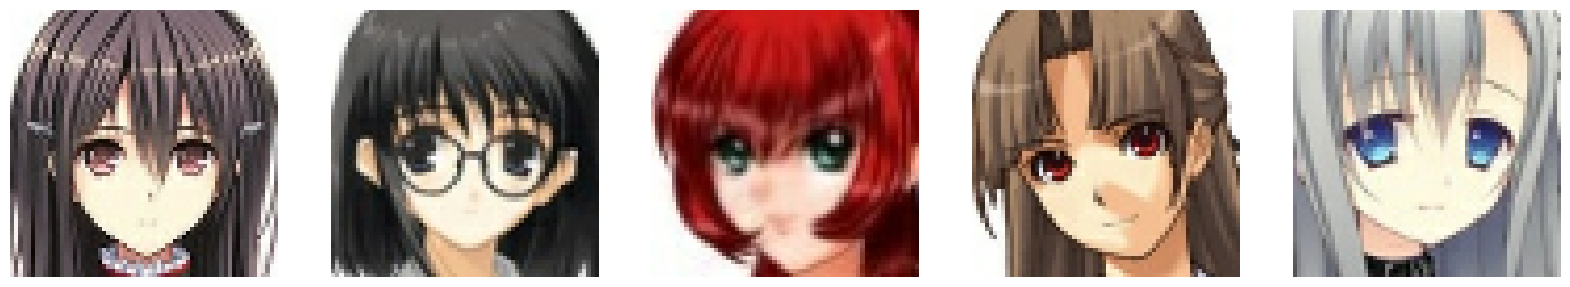

generated images


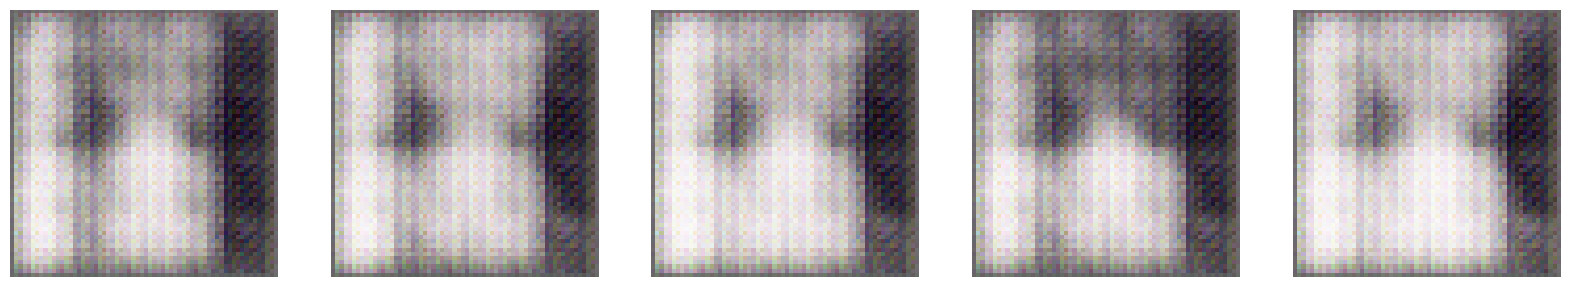

Time for epoch 1 is 86.59286451339722 sec


epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 2, iteration 1


epoch 2:   1%|          | 1/157 [00:00<01:26,  1.80it/s]

epoch 2, iteration 2


epoch 2:   1%|▏         | 2/157 [00:00<01:06,  2.34it/s]

epoch 2, iteration 3


epoch 2:   2%|▏         | 3/157 [00:01<00:59,  2.59it/s]

epoch 2, iteration 4


epoch 2:   3%|▎         | 4/157 [00:01<00:56,  2.70it/s]

epoch 2, iteration 5


epoch 2:   3%|▎         | 5/157 [00:01<00:54,  2.81it/s]

epoch 2, iteration 6


epoch 2:   4%|▍         | 6/157 [00:02<00:52,  2.86it/s]

epoch 2, iteration 7


epoch 2:   4%|▍         | 7/157 [00:02<00:52,  2.88it/s]

epoch 2, iteration 8


epoch 2:   5%|▌         | 8/157 [00:02<00:51,  2.90it/s]

epoch 2, iteration 9


epoch 2:   6%|▌         | 9/157 [00:03<00:51,  2.88it/s]

epoch 2, iteration 10


epoch 2:   6%|▋         | 10/157 [00:03<00:50,  2.89it/s]

epoch 2, iteration 11


epoch 2:   7%|▋         | 11/157 [00:03<00:49,  2.92it/s]

epoch 2, iteration 12


epoch 2:   8%|▊         | 12/157 [00:04<00:49,  2.95it/s]

epoch 2, iteration 13


epoch 2:   8%|▊         | 13/157 [00:04<00:49,  2.92it/s]

epoch 2, iteration 14


epoch 2:   9%|▉         | 14/157 [00:04<00:48,  2.94it/s]

epoch 2, iteration 15


epoch 2:  10%|▉         | 15/157 [00:05<00:48,  2.93it/s]

epoch 2, iteration 16


epoch 2:  10%|█         | 16/157 [00:05<00:48,  2.92it/s]

epoch 2, iteration 17


epoch 2:  11%|█         | 17/157 [00:06<00:47,  2.92it/s]

epoch 2, iteration 18


epoch 2:  11%|█▏        | 18/157 [00:06<00:47,  2.94it/s]

epoch 2, iteration 19


epoch 2:  12%|█▏        | 19/157 [00:06<00:47,  2.94it/s]

epoch 2, iteration 20


epoch 2:  13%|█▎        | 20/157 [00:07<00:46,  2.97it/s]

epoch 2, iteration 21


epoch 2:  13%|█▎        | 21/157 [00:07<00:46,  2.95it/s]

epoch 2, iteration 22


epoch 2:  14%|█▍        | 22/157 [00:07<00:45,  2.94it/s]

epoch 2, iteration 23


epoch 2:  15%|█▍        | 23/157 [00:08<00:45,  2.96it/s]

epoch 2, iteration 24


epoch 2:  15%|█▌        | 24/157 [00:08<00:44,  2.98it/s]

epoch 2, iteration 25


epoch 2:  16%|█▌        | 25/157 [00:08<00:45,  2.90it/s]

epoch 2, iteration 26


epoch 2:  17%|█▋        | 26/157 [00:09<00:48,  2.72it/s]

epoch 2, iteration 27


epoch 2:  17%|█▋        | 27/157 [00:09<00:49,  2.62it/s]

epoch 2, iteration 28


epoch 2:  18%|█▊        | 28/157 [00:09<00:50,  2.54it/s]

epoch 2, iteration 29


epoch 2:  18%|█▊        | 29/157 [00:10<00:52,  2.44it/s]

epoch 2, iteration 30


epoch 2:  19%|█▉        | 30/157 [00:10<00:54,  2.33it/s]

epoch 2, iteration 31


epoch 2:  20%|█▉        | 31/157 [00:11<00:53,  2.37it/s]

epoch 2, iteration 32


epoch 2:  20%|██        | 32/157 [00:11<00:50,  2.50it/s]

epoch 2, iteration 33


epoch 2:  21%|██        | 33/157 [00:11<00:47,  2.62it/s]

epoch 2, iteration 34


epoch 2:  22%|██▏       | 34/157 [00:12<00:45,  2.73it/s]

epoch 2, iteration 35


epoch 2:  22%|██▏       | 35/157 [00:12<00:44,  2.77it/s]

epoch 2, iteration 36


epoch 2:  23%|██▎       | 36/157 [00:13<00:42,  2.83it/s]

epoch 2, iteration 37


epoch 2:  24%|██▎       | 37/157 [00:13<00:41,  2.89it/s]

epoch 2, iteration 38


epoch 2:  24%|██▍       | 38/157 [00:13<00:41,  2.89it/s]

epoch 2, iteration 39


epoch 2:  25%|██▍       | 39/157 [00:14<00:40,  2.91it/s]

epoch 2, iteration 40


epoch 2:  25%|██▌       | 40/157 [00:14<00:40,  2.92it/s]

epoch 2, iteration 41


epoch 2:  26%|██▌       | 41/157 [00:14<00:40,  2.89it/s]

epoch 2, iteration 42


epoch 2:  27%|██▋       | 42/157 [00:15<00:39,  2.93it/s]

epoch 2, iteration 43


epoch 2:  27%|██▋       | 43/157 [00:15<00:38,  2.94it/s]

epoch 2, iteration 44


epoch 2:  28%|██▊       | 44/157 [00:15<00:38,  2.92it/s]

epoch 2, iteration 45


epoch 2:  29%|██▊       | 45/157 [00:16<00:37,  2.95it/s]

epoch 2, iteration 46


epoch 2:  29%|██▉       | 46/157 [00:16<00:37,  2.95it/s]

epoch 2, iteration 47


epoch 2:  30%|██▉       | 47/157 [00:16<00:37,  2.93it/s]

epoch 2, iteration 48


epoch 2:  31%|███       | 48/157 [00:17<00:37,  2.94it/s]

epoch 2, iteration 49


epoch 2:  31%|███       | 49/157 [00:17<00:36,  2.95it/s]

epoch 2, iteration 50


epoch 2:  32%|███▏      | 50/157 [00:17<00:36,  2.93it/s]

epoch 2, iteration 51


epoch 2:  32%|███▏      | 51/157 [00:18<00:36,  2.94it/s]

epoch 2, iteration 52


epoch 2:  33%|███▎      | 52/157 [00:18<00:35,  2.94it/s]

epoch 2, iteration 53


epoch 2:  34%|███▍      | 53/157 [00:18<00:35,  2.93it/s]

epoch 2, iteration 54


epoch 2:  34%|███▍      | 54/157 [00:19<00:34,  2.96it/s]

epoch 2, iteration 55


epoch 2:  35%|███▌      | 55/157 [00:19<00:34,  2.97it/s]

epoch 2, iteration 56


epoch 2:  36%|███▌      | 56/157 [00:19<00:34,  2.96it/s]

epoch 2, iteration 57


epoch 2:  36%|███▋      | 57/157 [00:20<00:33,  2.95it/s]

epoch 2, iteration 58


epoch 2:  37%|███▋      | 58/157 [00:20<00:33,  2.94it/s]

epoch 2, iteration 59


epoch 2:  38%|███▊      | 59/157 [00:20<00:33,  2.92it/s]

epoch 2, iteration 60


epoch 2:  38%|███▊      | 60/157 [00:21<00:34,  2.84it/s]

epoch 2, iteration 61


epoch 2:  39%|███▉      | 61/157 [00:21<00:35,  2.67it/s]

epoch 2, iteration 62


epoch 2:  39%|███▉      | 62/157 [00:22<00:36,  2.59it/s]

epoch 2, iteration 63


epoch 2:  40%|████      | 63/157 [00:22<00:37,  2.54it/s]

epoch 2, iteration 64


epoch 2:  41%|████      | 64/157 [00:22<00:38,  2.41it/s]

epoch 2, iteration 65


epoch 2:  41%|████▏     | 65/157 [00:23<00:39,  2.36it/s]

epoch 2, iteration 66


epoch 2:  42%|████▏     | 66/157 [00:23<00:38,  2.34it/s]

epoch 2, iteration 67


epoch 2:  43%|████▎     | 67/157 [00:24<00:36,  2.50it/s]

epoch 2, iteration 68


epoch 2:  43%|████▎     | 68/157 [00:24<00:34,  2.61it/s]

epoch 2, iteration 69


epoch 2:  44%|████▍     | 69/157 [00:24<00:32,  2.70it/s]

epoch 2, iteration 70


epoch 2:  45%|████▍     | 70/157 [00:25<00:31,  2.76it/s]

epoch 2, iteration 71


epoch 2:  45%|████▌     | 71/157 [00:25<00:30,  2.80it/s]

epoch 2, iteration 72


epoch 2:  46%|████▌     | 72/157 [00:25<00:29,  2.87it/s]

epoch 2, iteration 73


epoch 2:  46%|████▋     | 73/157 [00:26<00:28,  2.91it/s]

epoch 2, iteration 74


epoch 2:  47%|████▋     | 74/157 [00:26<00:28,  2.92it/s]

epoch 2, iteration 75


epoch 2:  48%|████▊     | 75/157 [00:26<00:27,  2.94it/s]

epoch 2, iteration 76


epoch 2:  48%|████▊     | 76/157 [00:27<00:27,  2.93it/s]

epoch 2, iteration 77


epoch 2:  49%|████▉     | 77/157 [00:27<00:27,  2.92it/s]

epoch 2, iteration 78


epoch 2:  50%|████▉     | 78/157 [00:27<00:27,  2.90it/s]

epoch 2, iteration 79


epoch 2:  50%|█████     | 79/157 [00:28<00:26,  2.91it/s]

epoch 2, iteration 80


epoch 2:  51%|█████     | 80/157 [00:28<00:26,  2.93it/s]

epoch 2, iteration 81


epoch 2:  52%|█████▏    | 81/157 [00:28<00:25,  2.94it/s]

epoch 2, iteration 82


epoch 2:  52%|█████▏    | 82/157 [00:29<00:25,  2.92it/s]

epoch 2, iteration 83


epoch 2:  53%|█████▎    | 83/157 [00:29<00:25,  2.93it/s]

epoch 2, iteration 84


epoch 2:  54%|█████▎    | 84/157 [00:29<00:24,  2.94it/s]

epoch 2, iteration 85


epoch 2:  54%|█████▍    | 85/157 [00:30<00:24,  2.94it/s]

epoch 2, iteration 86


epoch 2:  55%|█████▍    | 86/157 [00:30<00:24,  2.94it/s]

epoch 2, iteration 87


epoch 2:  55%|█████▌    | 87/157 [00:30<00:23,  2.93it/s]

epoch 2, iteration 88


epoch 2:  56%|█████▌    | 88/157 [00:31<00:23,  2.90it/s]

epoch 2, iteration 89


epoch 2:  57%|█████▋    | 89/157 [00:31<00:23,  2.90it/s]

epoch 2, iteration 90


epoch 2:  57%|█████▋    | 90/157 [00:31<00:22,  2.93it/s]

epoch 2, iteration 91


epoch 2:  58%|█████▊    | 91/157 [00:32<00:22,  2.94it/s]

epoch 2, iteration 92


epoch 2:  59%|█████▊    | 92/157 [00:32<00:22,  2.95it/s]

epoch 2, iteration 93


epoch 2:  59%|█████▉    | 93/157 [00:32<00:21,  2.95it/s]

epoch 2, iteration 94


epoch 2:  60%|█████▉    | 94/157 [00:33<00:21,  2.95it/s]

epoch 2, iteration 95


epoch 2:  61%|██████    | 95/157 [00:33<00:21,  2.93it/s]

epoch 2, iteration 96


epoch 2:  61%|██████    | 96/157 [00:34<00:21,  2.78it/s]

epoch 2, iteration 97


epoch 2:  62%|██████▏   | 97/157 [00:34<00:23,  2.60it/s]

epoch 2, iteration 98


epoch 2:  62%|██████▏   | 98/157 [00:34<00:23,  2.55it/s]

epoch 2, iteration 99


epoch 2:  63%|██████▎   | 99/157 [00:35<00:23,  2.45it/s]

epoch 2, iteration 100


epoch 2:  64%|██████▎   | 100/157 [00:35<00:23,  2.39it/s]

epoch 2, iteration 101


epoch 2:  64%|██████▍   | 101/157 [00:36<00:24,  2.31it/s]

epoch 2, iteration 102


epoch 2:  65%|██████▍   | 102/157 [00:36<00:22,  2.40it/s]

epoch 2, iteration 103


epoch 2:  66%|██████▌   | 103/157 [00:36<00:21,  2.54it/s]

epoch 2, iteration 104


epoch 2:  66%|██████▌   | 104/157 [00:37<00:20,  2.64it/s]

epoch 2, iteration 105


epoch 2:  67%|██████▋   | 105/157 [00:37<00:19,  2.71it/s]

epoch 2, iteration 106


epoch 2:  68%|██████▊   | 106/157 [00:38<00:18,  2.80it/s]

epoch 2, iteration 107


epoch 2:  68%|██████▊   | 107/157 [00:38<00:17,  2.82it/s]

epoch 2, iteration 108


epoch 2:  69%|██████▉   | 108/157 [00:38<00:17,  2.85it/s]

epoch 2, iteration 109


epoch 2:  69%|██████▉   | 109/157 [00:39<00:16,  2.90it/s]

epoch 2, iteration 110


epoch 2:  70%|███████   | 110/157 [00:39<00:16,  2.91it/s]

epoch 2, iteration 111


epoch 2:  71%|███████   | 111/157 [00:39<00:15,  2.93it/s]

epoch 2, iteration 112


epoch 2:  71%|███████▏  | 112/157 [00:40<00:15,  2.93it/s]

epoch 2, iteration 113


epoch 2:  72%|███████▏  | 113/157 [00:40<00:15,  2.92it/s]

epoch 2, iteration 114


epoch 2:  73%|███████▎  | 114/157 [00:40<00:14,  2.93it/s]

epoch 2, iteration 115


epoch 2:  73%|███████▎  | 115/157 [00:41<00:14,  2.94it/s]

epoch 2, iteration 116


epoch 2:  74%|███████▍  | 116/157 [00:41<00:14,  2.90it/s]

epoch 2, iteration 117


epoch 2:  75%|███████▍  | 117/157 [00:41<00:13,  2.93it/s]

epoch 2, iteration 118


epoch 2:  75%|███████▌  | 118/157 [00:42<00:13,  2.93it/s]

epoch 2, iteration 119


epoch 2:  76%|███████▌  | 119/157 [00:42<00:13,  2.86it/s]

epoch 2, iteration 120


epoch 2:  76%|███████▋  | 120/157 [00:42<00:12,  2.89it/s]

epoch 2, iteration 121


epoch 2:  77%|███████▋  | 121/157 [00:43<00:12,  2.93it/s]

epoch 2, iteration 122


epoch 2:  78%|███████▊  | 122/157 [00:43<00:12,  2.91it/s]

epoch 2, iteration 123


epoch 2:  78%|███████▊  | 123/157 [00:43<00:11,  2.91it/s]

epoch 2, iteration 124


epoch 2:  79%|███████▉  | 124/157 [00:44<00:11,  2.93it/s]

epoch 2, iteration 125


epoch 2:  80%|███████▉  | 125/157 [00:44<00:10,  2.92it/s]

epoch 2, iteration 126


epoch 2:  80%|████████  | 126/157 [00:44<00:10,  2.93it/s]

epoch 2, iteration 127


epoch 2:  81%|████████  | 127/157 [00:45<00:10,  2.96it/s]

epoch 2, iteration 128


epoch 2:  82%|████████▏ | 128/157 [00:45<00:09,  2.93it/s]

epoch 2, iteration 129


epoch 2:  82%|████████▏ | 129/157 [00:45<00:09,  2.93it/s]

epoch 2, iteration 130


epoch 2:  83%|████████▎ | 130/157 [00:46<00:09,  2.92it/s]

epoch 2, iteration 131


epoch 2:  83%|████████▎ | 131/157 [00:46<00:09,  2.79it/s]

epoch 2, iteration 132


epoch 2:  84%|████████▍ | 132/157 [00:47<00:09,  2.71it/s]

epoch 2, iteration 133


epoch 2:  85%|████████▍ | 133/157 [00:47<00:09,  2.65it/s]

epoch 2, iteration 134


epoch 2:  85%|████████▌ | 134/157 [00:47<00:09,  2.54it/s]

epoch 2, iteration 135


epoch 2:  86%|████████▌ | 135/157 [00:48<00:09,  2.44it/s]

epoch 2, iteration 136


epoch 2:  87%|████████▋ | 136/157 [00:48<00:08,  2.34it/s]

epoch 2, iteration 137


epoch 2:  87%|████████▋ | 137/157 [00:49<00:08,  2.41it/s]

epoch 2, iteration 138


epoch 2:  88%|████████▊ | 138/157 [00:49<00:07,  2.52it/s]

epoch 2, iteration 139


epoch 2:  89%|████████▊ | 139/157 [00:49<00:06,  2.63it/s]

epoch 2, iteration 140


epoch 2:  89%|████████▉ | 140/157 [00:50<00:06,  2.74it/s]

epoch 2, iteration 141


epoch 2:  90%|████████▉ | 141/157 [00:50<00:05,  2.76it/s]

epoch 2, iteration 142


epoch 2:  90%|█████████ | 142/157 [00:50<00:05,  2.81it/s]

epoch 2, iteration 143


epoch 2:  91%|█████████ | 143/157 [00:51<00:04,  2.85it/s]

epoch 2, iteration 144


epoch 2:  92%|█████████▏| 144/157 [00:51<00:04,  2.86it/s]

epoch 2, iteration 145


epoch 2:  92%|█████████▏| 145/157 [00:51<00:04,  2.88it/s]

epoch 2, iteration 146


epoch 2:  93%|█████████▎| 146/157 [00:52<00:03,  2.91it/s]

epoch 2, iteration 147


epoch 2:  94%|█████████▎| 147/157 [00:52<00:03,  2.94it/s]

epoch 2, iteration 148


epoch 2:  94%|█████████▍| 148/157 [00:52<00:03,  2.96it/s]

epoch 2, iteration 149


epoch 2:  95%|█████████▍| 149/157 [00:53<00:02,  2.97it/s]

epoch 2, iteration 150


epoch 2:  96%|█████████▌| 150/157 [00:53<00:02,  2.97it/s]

epoch 2, iteration 151


epoch 2:  96%|█████████▌| 151/157 [00:53<00:02,  2.99it/s]

epoch 2, iteration 152


epoch 2:  97%|█████████▋| 152/157 [00:54<00:01,  3.01it/s]

epoch 2, iteration 153


epoch 2:  97%|█████████▋| 153/157 [00:54<00:01,  3.05it/s]

epoch 2, iteration 154


epoch 2:  98%|█████████▊| 154/157 [00:54<00:00,  3.07it/s]

epoch 2, iteration 155


epoch 2:  99%|█████████▊| 155/157 [00:55<00:00,  3.09it/s]

epoch 2, iteration 156


epoch 2:  99%|█████████▉| 156/157 [00:55<00:00,  3.10it/s]

epoch 2, iteration 157


epoch 2: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


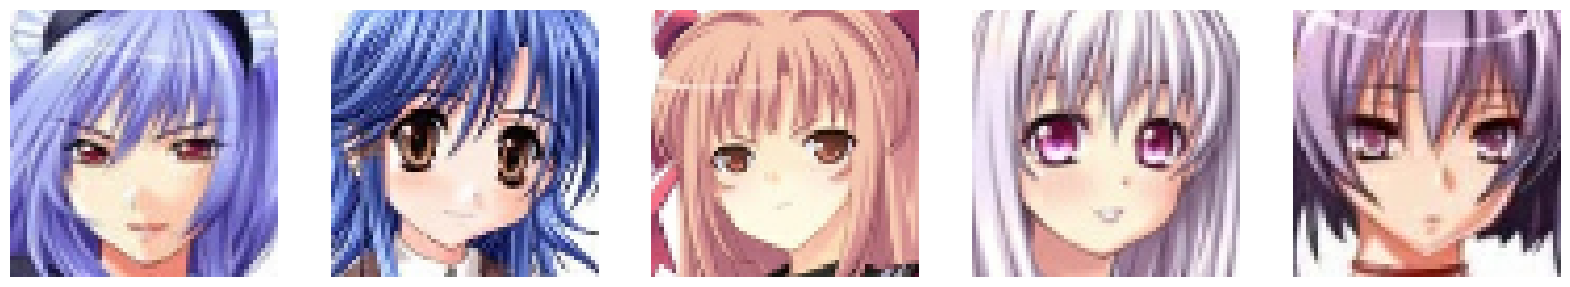

generated images


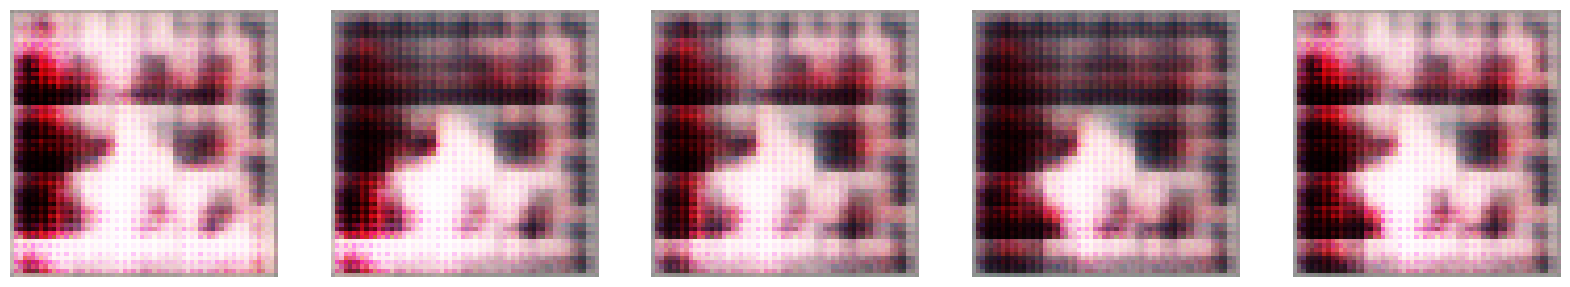

Time for epoch 2 is 87.51872205734253 sec


epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 3, iteration 1


epoch 3:   1%|          | 1/157 [00:00<01:24,  1.85it/s]

epoch 3, iteration 2


epoch 3:   1%|▏         | 2/157 [00:00<01:04,  2.39it/s]

epoch 3, iteration 3


epoch 3:   2%|▏         | 3/157 [00:01<00:58,  2.61it/s]

epoch 3, iteration 4


epoch 3:   3%|▎         | 4/157 [00:01<00:55,  2.76it/s]

epoch 3, iteration 5


epoch 3:   3%|▎         | 5/157 [00:01<00:54,  2.79it/s]

epoch 3, iteration 6


epoch 3:   4%|▍         | 6/157 [00:02<00:53,  2.84it/s]

epoch 3, iteration 7


epoch 3:   4%|▍         | 7/157 [00:02<00:52,  2.87it/s]

epoch 3, iteration 8


epoch 3:   5%|▌         | 8/157 [00:02<00:51,  2.91it/s]

epoch 3, iteration 9


epoch 3:   6%|▌         | 9/157 [00:03<00:50,  2.93it/s]

epoch 3, iteration 10


epoch 3:   6%|▋         | 10/157 [00:03<00:49,  2.96it/s]

epoch 3, iteration 11


epoch 3:   7%|▋         | 11/157 [00:03<00:49,  2.97it/s]

epoch 3, iteration 12


epoch 3:   8%|▊         | 12/157 [00:04<00:49,  2.94it/s]

epoch 3, iteration 13


epoch 3:   8%|▊         | 13/157 [00:04<00:48,  2.94it/s]

epoch 3, iteration 14


epoch 3:   9%|▉         | 14/157 [00:04<00:48,  2.94it/s]

epoch 3, iteration 15


epoch 3:  10%|▉         | 15/157 [00:05<00:48,  2.95it/s]

epoch 3, iteration 16


epoch 3:  10%|█         | 16/157 [00:05<00:47,  2.95it/s]

epoch 3, iteration 17


epoch 3:  11%|█         | 17/157 [00:05<00:47,  2.95it/s]

epoch 3, iteration 18


epoch 3:  11%|█▏        | 18/157 [00:06<00:47,  2.92it/s]

epoch 3, iteration 19


epoch 3:  12%|█▏        | 19/157 [00:06<00:46,  2.94it/s]

epoch 3, iteration 20


epoch 3:  13%|█▎        | 20/157 [00:07<00:47,  2.86it/s]

epoch 3, iteration 21


epoch 3:  13%|█▎        | 21/157 [00:07<00:47,  2.86it/s]

epoch 3, iteration 22


epoch 3:  14%|█▍        | 22/157 [00:07<00:46,  2.88it/s]

epoch 3, iteration 23


epoch 3:  15%|█▍        | 23/157 [00:08<00:49,  2.72it/s]

epoch 3, iteration 24


epoch 3:  15%|█▌        | 24/157 [00:08<00:50,  2.61it/s]

epoch 3, iteration 25


epoch 3:  16%|█▌        | 25/157 [00:08<00:51,  2.56it/s]

epoch 3, iteration 26


epoch 3:  17%|█▋        | 26/157 [00:09<00:52,  2.50it/s]

epoch 3, iteration 27


epoch 3:  17%|█▋        | 27/157 [00:09<00:53,  2.42it/s]

epoch 3, iteration 28


epoch 3:  18%|█▊        | 28/157 [00:10<00:54,  2.35it/s]

epoch 3, iteration 29


epoch 3:  18%|█▊        | 29/157 [00:10<00:52,  2.44it/s]

epoch 3, iteration 30


epoch 3:  19%|█▉        | 30/157 [00:10<00:49,  2.56it/s]

epoch 3, iteration 31


epoch 3:  20%|█▉        | 31/157 [00:11<00:48,  2.62it/s]

epoch 3, iteration 32


epoch 3:  20%|██        | 32/157 [00:11<00:46,  2.71it/s]

epoch 3, iteration 33


epoch 3:  21%|██        | 33/157 [00:12<00:44,  2.78it/s]

epoch 3, iteration 34


epoch 3:  22%|██▏       | 34/157 [00:12<00:44,  2.78it/s]

epoch 3, iteration 35


epoch 3:  22%|██▏       | 35/157 [00:12<00:43,  2.78it/s]

epoch 3, iteration 36


epoch 3:  23%|██▎       | 36/157 [00:13<00:42,  2.83it/s]

epoch 3, iteration 37


epoch 3:  24%|██▎       | 37/157 [00:13<00:42,  2.83it/s]

epoch 3, iteration 38


epoch 3:  24%|██▍       | 38/157 [00:13<00:41,  2.87it/s]

epoch 3, iteration 39


epoch 3:  25%|██▍       | 39/157 [00:14<00:40,  2.89it/s]

epoch 3, iteration 40


epoch 3:  25%|██▌       | 40/157 [00:14<00:40,  2.90it/s]

epoch 3, iteration 41


epoch 3:  26%|██▌       | 41/157 [00:14<00:39,  2.90it/s]

epoch 3, iteration 42


epoch 3:  27%|██▋       | 42/157 [00:15<00:39,  2.91it/s]

epoch 3, iteration 43


epoch 3:  27%|██▋       | 43/157 [00:15<00:39,  2.91it/s]

epoch 3, iteration 44


epoch 3:  28%|██▊       | 44/157 [00:15<00:38,  2.92it/s]

epoch 3, iteration 45


epoch 3:  29%|██▊       | 45/157 [00:16<00:38,  2.93it/s]

epoch 3, iteration 46


epoch 3:  29%|██▉       | 46/157 [00:16<00:38,  2.91it/s]

epoch 3, iteration 47


epoch 3:  30%|██▉       | 47/157 [00:16<00:37,  2.94it/s]

epoch 3, iteration 48


epoch 3:  31%|███       | 48/157 [00:17<00:36,  2.96it/s]

epoch 3, iteration 49


epoch 3:  31%|███       | 49/157 [00:17<00:36,  2.94it/s]

epoch 3, iteration 50


epoch 3:  32%|███▏      | 50/157 [00:17<00:36,  2.96it/s]

epoch 3, iteration 51


epoch 3:  32%|███▏      | 51/157 [00:18<00:35,  2.96it/s]

epoch 3, iteration 52


epoch 3:  33%|███▎      | 52/157 [00:18<00:35,  2.92it/s]

epoch 3, iteration 53


epoch 3:  34%|███▍      | 53/157 [00:18<00:35,  2.92it/s]

epoch 3, iteration 54


epoch 3:  34%|███▍      | 54/157 [00:19<00:35,  2.93it/s]

epoch 3, iteration 55


epoch 3:  35%|███▌      | 55/157 [00:19<00:35,  2.91it/s]

epoch 3, iteration 56


epoch 3:  36%|███▌      | 56/157 [00:19<00:34,  2.94it/s]

epoch 3, iteration 57


epoch 3:  36%|███▋      | 57/157 [00:20<00:34,  2.94it/s]

epoch 3, iteration 58


epoch 3:  37%|███▋      | 58/157 [00:20<00:35,  2.77it/s]

epoch 3, iteration 59


epoch 3:  38%|███▊      | 59/157 [00:21<00:37,  2.63it/s]

epoch 3, iteration 60


epoch 3:  38%|███▊      | 60/157 [00:21<00:38,  2.54it/s]

epoch 3, iteration 61


epoch 3:  39%|███▉      | 61/157 [00:21<00:38,  2.47it/s]

epoch 3, iteration 62


epoch 3:  39%|███▉      | 62/157 [00:22<00:39,  2.39it/s]

epoch 3, iteration 63


epoch 3:  40%|████      | 63/157 [00:22<00:40,  2.32it/s]

epoch 3, iteration 64


epoch 3:  41%|████      | 64/157 [00:23<00:38,  2.40it/s]

epoch 3, iteration 65


epoch 3:  41%|████▏     | 65/157 [00:23<00:36,  2.54it/s]

epoch 3, iteration 66


epoch 3:  42%|████▏     | 66/157 [00:23<00:34,  2.64it/s]

epoch 3, iteration 67


epoch 3:  43%|████▎     | 67/157 [00:24<00:33,  2.72it/s]

epoch 3, iteration 68


epoch 3:  43%|████▎     | 68/157 [00:24<00:32,  2.77it/s]

epoch 3, iteration 69


epoch 3:  44%|████▍     | 69/157 [00:24<00:31,  2.79it/s]

epoch 3, iteration 70


epoch 3:  45%|████▍     | 70/157 [00:25<00:30,  2.83it/s]

epoch 3, iteration 71


epoch 3:  45%|████▌     | 71/157 [00:25<00:30,  2.84it/s]

epoch 3, iteration 72


epoch 3:  46%|████▌     | 72/157 [00:25<00:29,  2.84it/s]

epoch 3, iteration 73


epoch 3:  46%|████▋     | 73/157 [00:26<00:29,  2.87it/s]

epoch 3, iteration 74


epoch 3:  47%|████▋     | 74/157 [00:26<00:28,  2.87it/s]

epoch 3, iteration 75


epoch 3:  48%|████▊     | 75/157 [00:27<00:29,  2.82it/s]

epoch 3, iteration 76


epoch 3:  48%|████▊     | 76/157 [00:27<00:28,  2.86it/s]

epoch 3, iteration 77


epoch 3:  49%|████▉     | 77/157 [00:27<00:27,  2.86it/s]

epoch 3, iteration 78


epoch 3:  50%|████▉     | 78/157 [00:28<00:27,  2.86it/s]

epoch 3, iteration 79


epoch 3:  50%|█████     | 79/157 [00:28<00:26,  2.89it/s]

epoch 3, iteration 80


epoch 3:  51%|█████     | 80/157 [00:28<00:26,  2.91it/s]

epoch 3, iteration 81


epoch 3:  52%|█████▏    | 81/157 [00:29<00:26,  2.88it/s]

epoch 3, iteration 82


epoch 3:  52%|█████▏    | 82/157 [00:29<00:25,  2.89it/s]

epoch 3, iteration 83


epoch 3:  53%|█████▎    | 83/157 [00:29<00:25,  2.90it/s]

epoch 3, iteration 84


epoch 3:  54%|█████▎    | 84/157 [00:30<00:25,  2.89it/s]

epoch 3, iteration 85


epoch 3:  54%|█████▍    | 85/157 [00:30<00:24,  2.93it/s]

epoch 3, iteration 86


epoch 3:  55%|█████▍    | 86/157 [00:30<00:24,  2.94it/s]

epoch 3, iteration 87


epoch 3:  55%|█████▌    | 87/157 [00:31<00:24,  2.90it/s]

epoch 3, iteration 88


epoch 3:  56%|█████▌    | 88/157 [00:31<00:23,  2.90it/s]

epoch 3, iteration 89


epoch 3:  57%|█████▋    | 89/157 [00:31<00:23,  2.88it/s]

epoch 3, iteration 90


epoch 3:  57%|█████▋    | 90/157 [00:32<00:23,  2.85it/s]

epoch 3, iteration 91


epoch 3:  58%|█████▊    | 91/157 [00:32<00:23,  2.87it/s]

epoch 3, iteration 92


epoch 3:  59%|█████▊    | 92/157 [00:32<00:22,  2.84it/s]

epoch 3, iteration 93


epoch 3:  59%|█████▉    | 93/157 [00:33<00:24,  2.66it/s]

epoch 3, iteration 94


epoch 3:  60%|█████▉    | 94/157 [00:33<00:24,  2.52it/s]

epoch 3, iteration 95


epoch 3:  61%|██████    | 95/157 [00:34<00:25,  2.45it/s]

epoch 3, iteration 96


epoch 3:  61%|██████    | 96/157 [00:34<00:25,  2.37it/s]

epoch 3, iteration 97


epoch 3:  62%|██████▏   | 97/157 [00:35<00:25,  2.31it/s]

epoch 3, iteration 98


epoch 3:  62%|██████▏   | 98/157 [00:35<00:25,  2.33it/s]

epoch 3, iteration 99


epoch 3:  63%|██████▎   | 99/157 [00:35<00:23,  2.46it/s]

epoch 3, iteration 100


epoch 3:  64%|██████▎   | 100/157 [00:36<00:22,  2.57it/s]

epoch 3, iteration 101


epoch 3:  64%|██████▍   | 101/157 [00:36<00:20,  2.67it/s]

epoch 3, iteration 102


epoch 3:  65%|██████▍   | 102/157 [00:36<00:20,  2.71it/s]

epoch 3, iteration 103


epoch 3:  66%|██████▌   | 103/157 [00:37<00:19,  2.73it/s]

epoch 3, iteration 104


epoch 3:  66%|██████▌   | 104/157 [00:37<00:18,  2.81it/s]

epoch 3, iteration 105


epoch 3:  67%|██████▋   | 105/157 [00:38<00:18,  2.84it/s]

epoch 3, iteration 106


epoch 3:  68%|██████▊   | 106/157 [00:38<00:17,  2.85it/s]

epoch 3, iteration 107


epoch 3:  68%|██████▊   | 107/157 [00:38<00:17,  2.87it/s]

epoch 3, iteration 108


epoch 3:  69%|██████▉   | 108/157 [00:39<00:16,  2.89it/s]

epoch 3, iteration 109


epoch 3:  69%|██████▉   | 109/157 [00:39<00:16,  2.90it/s]

epoch 3, iteration 110


epoch 3:  70%|███████   | 110/157 [00:39<00:16,  2.90it/s]

epoch 3, iteration 111


epoch 3:  71%|███████   | 111/157 [00:40<00:15,  2.91it/s]

epoch 3, iteration 112


epoch 3:  71%|███████▏  | 112/157 [00:40<00:15,  2.90it/s]

epoch 3, iteration 113


epoch 3:  72%|███████▏  | 113/157 [00:40<00:15,  2.90it/s]

epoch 3, iteration 114


epoch 3:  73%|███████▎  | 114/157 [00:41<00:14,  2.87it/s]

epoch 3, iteration 115


epoch 3:  73%|███████▎  | 115/157 [00:41<00:14,  2.87it/s]

epoch 3, iteration 116


epoch 3:  74%|███████▍  | 116/157 [00:41<00:14,  2.89it/s]

epoch 3, iteration 117


epoch 3:  75%|███████▍  | 117/157 [00:42<00:13,  2.91it/s]

epoch 3, iteration 118


epoch 3:  75%|███████▌  | 118/157 [00:42<00:13,  2.91it/s]

epoch 3, iteration 119


epoch 3:  76%|███████▌  | 119/157 [00:42<00:13,  2.92it/s]

epoch 3, iteration 120


epoch 3:  76%|███████▋  | 120/157 [00:43<00:12,  2.89it/s]

epoch 3, iteration 121


epoch 3:  77%|███████▋  | 121/157 [00:43<00:12,  2.86it/s]

epoch 3, iteration 122


epoch 3:  78%|███████▊  | 122/157 [00:43<00:12,  2.88it/s]

epoch 3, iteration 123


epoch 3:  78%|███████▊  | 123/157 [00:44<00:11,  2.89it/s]

epoch 3, iteration 124


epoch 3:  79%|███████▉  | 124/157 [00:44<00:11,  2.87it/s]

epoch 3, iteration 125


epoch 3:  80%|███████▉  | 125/157 [00:44<00:11,  2.87it/s]

epoch 3, iteration 126


epoch 3:  80%|████████  | 126/157 [00:45<00:10,  2.89it/s]

epoch 3, iteration 127


epoch 3:  81%|████████  | 127/157 [00:45<00:11,  2.70it/s]

epoch 3, iteration 128


epoch 3:  82%|████████▏ | 128/157 [00:46<00:11,  2.60it/s]

epoch 3, iteration 129


epoch 3:  82%|████████▏ | 129/157 [00:46<00:11,  2.50it/s]

epoch 3, iteration 130


epoch 3:  83%|████████▎ | 130/157 [00:46<00:11,  2.45it/s]

epoch 3, iteration 131


epoch 3:  83%|████████▎ | 131/157 [00:47<00:11,  2.34it/s]

epoch 3, iteration 132


epoch 3:  84%|████████▍ | 132/157 [00:47<00:11,  2.27it/s]

epoch 3, iteration 133


epoch 3:  85%|████████▍ | 133/157 [00:48<00:10,  2.26it/s]

epoch 3, iteration 134


epoch 3:  85%|████████▌ | 134/157 [00:48<00:09,  2.40it/s]

epoch 3, iteration 135


epoch 3:  86%|████████▌ | 135/157 [00:49<00:08,  2.49it/s]

epoch 3, iteration 136


epoch 3:  87%|████████▋ | 136/157 [00:49<00:08,  2.53it/s]

epoch 3, iteration 137


epoch 3:  87%|████████▋ | 137/157 [00:49<00:07,  2.61it/s]

epoch 3, iteration 138


epoch 3:  88%|████████▊ | 138/157 [00:50<00:07,  2.69it/s]

epoch 3, iteration 139


epoch 3:  89%|████████▊ | 139/157 [00:50<00:06,  2.73it/s]

epoch 3, iteration 140


epoch 3:  89%|████████▉ | 140/157 [00:50<00:06,  2.75it/s]

epoch 3, iteration 141


epoch 3:  90%|████████▉ | 141/157 [00:51<00:05,  2.77it/s]

epoch 3, iteration 142


epoch 3:  90%|█████████ | 142/157 [00:51<00:05,  2.79it/s]

epoch 3, iteration 143


epoch 3:  91%|█████████ | 143/157 [00:51<00:04,  2.83it/s]

epoch 3, iteration 144


epoch 3:  92%|█████████▏| 144/157 [00:52<00:04,  2.85it/s]

epoch 3, iteration 145


epoch 3:  92%|█████████▏| 145/157 [00:52<00:04,  2.81it/s]

epoch 3, iteration 146


epoch 3:  93%|█████████▎| 146/157 [00:52<00:03,  2.83it/s]

epoch 3, iteration 147


epoch 3:  94%|█████████▎| 147/157 [00:53<00:03,  2.84it/s]

epoch 3, iteration 148


epoch 3:  94%|█████████▍| 148/157 [00:53<00:03,  2.83it/s]

epoch 3, iteration 149


epoch 3:  95%|█████████▍| 149/157 [00:54<00:02,  2.84it/s]

epoch 3, iteration 150


epoch 3:  96%|█████████▌| 150/157 [00:54<00:02,  2.88it/s]

epoch 3, iteration 151


epoch 3:  96%|█████████▌| 151/157 [00:54<00:02,  2.87it/s]

epoch 3, iteration 152


epoch 3:  97%|█████████▋| 152/157 [00:55<00:01,  2.92it/s]

epoch 3, iteration 153


epoch 3:  97%|█████████▋| 153/157 [00:55<00:01,  2.98it/s]

epoch 3, iteration 154


epoch 3:  98%|█████████▊| 154/157 [00:55<00:01,  2.97it/s]

epoch 3, iteration 155


epoch 3:  99%|█████████▊| 155/157 [00:56<00:00,  3.03it/s]

epoch 3, iteration 156


epoch 3:  99%|█████████▉| 156/157 [00:56<00:00,  3.05it/s]

epoch 3, iteration 157


epoch 3: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


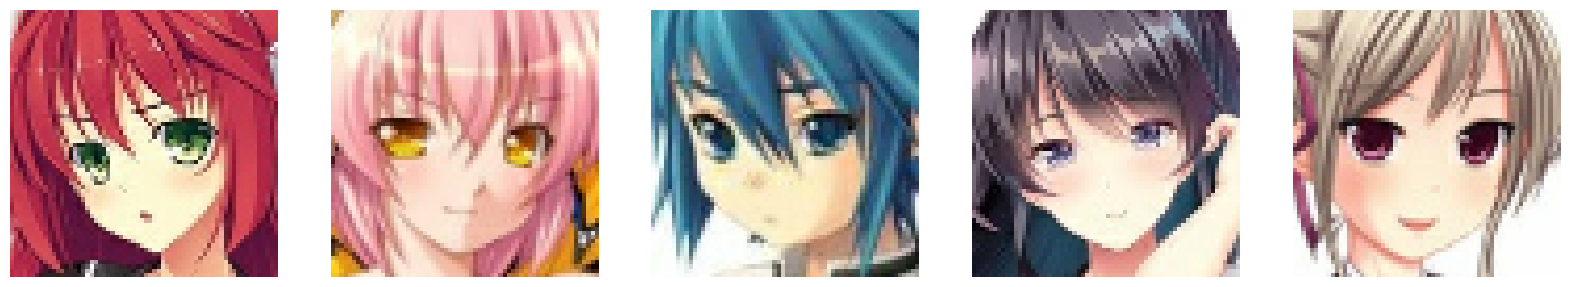

generated images


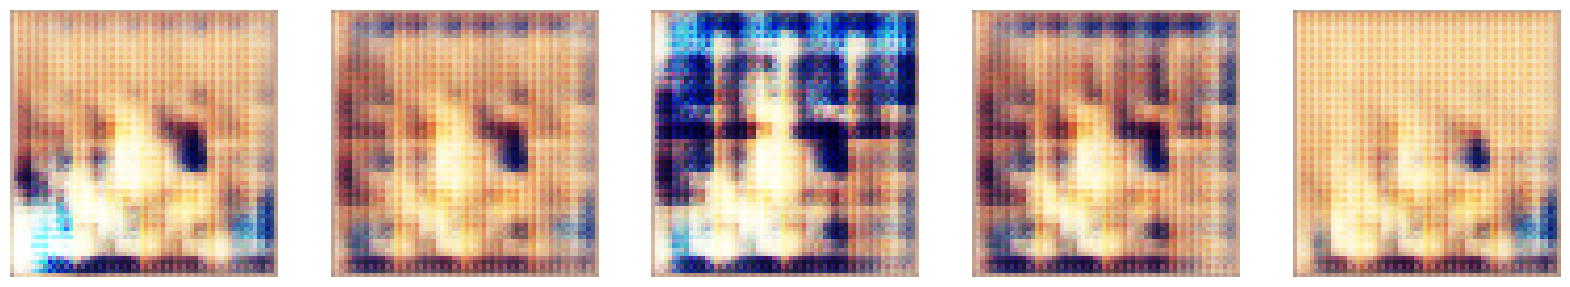

Time for epoch 3 is 86.47144365310669 sec


epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 4, iteration 1


epoch 4:   1%|          | 1/157 [00:00<01:31,  1.71it/s]

epoch 4, iteration 2


epoch 4:   1%|▏         | 2/157 [00:00<01:10,  2.19it/s]

epoch 4, iteration 3


epoch 4:   2%|▏         | 3/157 [00:01<01:01,  2.49it/s]

epoch 4, iteration 4


epoch 4:   3%|▎         | 4/157 [00:01<00:58,  2.63it/s]

epoch 4, iteration 5


epoch 4:   3%|▎         | 5/157 [00:01<00:55,  2.72it/s]

epoch 4, iteration 6


epoch 4:   4%|▍         | 6/157 [00:02<00:53,  2.80it/s]

epoch 4, iteration 7


epoch 4:   4%|▍         | 7/157 [00:02<00:53,  2.82it/s]

epoch 4, iteration 8


epoch 4:   5%|▌         | 8/157 [00:03<00:53,  2.78it/s]

epoch 4, iteration 9


epoch 4:   6%|▌         | 9/157 [00:03<00:53,  2.76it/s]

epoch 4, iteration 10


epoch 4:   6%|▋         | 10/157 [00:03<00:52,  2.81it/s]

epoch 4, iteration 11


epoch 4:   7%|▋         | 11/157 [00:04<00:51,  2.83it/s]

epoch 4, iteration 12


epoch 4:   8%|▊         | 12/157 [00:04<00:51,  2.84it/s]

epoch 4, iteration 13


epoch 4:   8%|▊         | 13/157 [00:04<00:50,  2.85it/s]

epoch 4, iteration 14


epoch 4:   9%|▉         | 14/157 [00:05<00:50,  2.86it/s]

epoch 4, iteration 15


epoch 4:  10%|▉         | 15/157 [00:05<00:50,  2.83it/s]

epoch 4, iteration 16


epoch 4:  10%|█         | 16/157 [00:05<00:49,  2.85it/s]

epoch 4, iteration 17


epoch 4:  11%|█         | 17/157 [00:06<00:50,  2.80it/s]

epoch 4, iteration 18


epoch 4:  11%|█▏        | 18/157 [00:06<00:48,  2.85it/s]

epoch 4, iteration 19


epoch 4:  12%|█▏        | 19/157 [00:06<00:47,  2.88it/s]

epoch 4, iteration 20


epoch 4:  13%|█▎        | 20/157 [00:07<00:48,  2.82it/s]

epoch 4, iteration 21


epoch 4:  13%|█▎        | 21/157 [00:07<00:47,  2.85it/s]

epoch 4, iteration 22


epoch 4:  14%|█▍        | 22/157 [00:08<00:50,  2.65it/s]

epoch 4, iteration 23


epoch 4:  15%|█▍        | 23/157 [00:08<00:52,  2.54it/s]

epoch 4, iteration 24


epoch 4:  15%|█▌        | 24/157 [00:08<00:53,  2.50it/s]

epoch 4, iteration 25


epoch 4:  16%|█▌        | 25/157 [00:09<00:54,  2.43it/s]

epoch 4, iteration 26


epoch 4:  17%|█▋        | 26/157 [00:09<00:56,  2.34it/s]

epoch 4, iteration 27


epoch 4:  17%|█▋        | 27/157 [00:10<00:56,  2.29it/s]

epoch 4, iteration 28


epoch 4:  18%|█▊        | 28/157 [00:10<00:53,  2.42it/s]

epoch 4, iteration 29


epoch 4:  18%|█▊        | 29/157 [00:10<00:50,  2.53it/s]

epoch 4, iteration 30


epoch 4:  19%|█▉        | 30/157 [00:11<00:48,  2.60it/s]

epoch 4, iteration 31


epoch 4:  20%|█▉        | 31/157 [00:11<00:47,  2.68it/s]

epoch 4, iteration 32


epoch 4:  20%|██        | 32/157 [00:12<00:45,  2.72it/s]

epoch 4, iteration 33


epoch 4:  21%|██        | 33/157 [00:12<00:44,  2.77it/s]

epoch 4, iteration 34


epoch 4:  22%|██▏       | 34/157 [00:12<00:43,  2.81it/s]

epoch 4, iteration 35


epoch 4:  22%|██▏       | 35/157 [00:13<00:43,  2.82it/s]

epoch 4, iteration 36


epoch 4:  23%|██▎       | 36/157 [00:13<00:42,  2.84it/s]

epoch 4, iteration 37


epoch 4:  24%|██▎       | 37/157 [00:13<00:41,  2.88it/s]

epoch 4, iteration 38


epoch 4:  24%|██▍       | 38/157 [00:14<00:42,  2.82it/s]

epoch 4, iteration 39


epoch 4:  25%|██▍       | 39/157 [00:14<00:42,  2.77it/s]

epoch 4, iteration 40


epoch 4:  25%|██▌       | 40/157 [00:14<00:41,  2.79it/s]

epoch 4, iteration 41


epoch 4:  26%|██▌       | 41/157 [00:15<00:41,  2.82it/s]

epoch 4, iteration 42


epoch 4:  27%|██▋       | 42/157 [00:15<00:41,  2.79it/s]

epoch 4, iteration 43


epoch 4:  27%|██▋       | 43/157 [00:15<00:40,  2.83it/s]

epoch 4, iteration 44


epoch 4:  28%|██▊       | 44/157 [00:16<00:40,  2.80it/s]

epoch 4, iteration 45


epoch 4:  29%|██▊       | 45/157 [00:16<00:39,  2.81it/s]

epoch 4, iteration 46


epoch 4:  29%|██▉       | 46/157 [00:16<00:39,  2.83it/s]

epoch 4, iteration 47


epoch 4:  30%|██▉       | 47/157 [00:17<00:38,  2.82it/s]

epoch 4, iteration 48


epoch 4:  31%|███       | 48/157 [00:17<00:38,  2.84it/s]

epoch 4, iteration 49


epoch 4:  31%|███       | 49/157 [00:18<00:37,  2.86it/s]

epoch 4, iteration 50


epoch 4:  32%|███▏      | 50/157 [00:18<00:37,  2.83it/s]

epoch 4, iteration 51


epoch 4:  32%|███▏      | 51/157 [00:18<00:37,  2.82it/s]

epoch 4, iteration 52


epoch 4:  33%|███▎      | 52/157 [00:19<00:37,  2.82it/s]

epoch 4, iteration 53


epoch 4:  34%|███▍      | 53/157 [00:19<00:37,  2.79it/s]

epoch 4, iteration 54


epoch 4:  34%|███▍      | 54/157 [00:19<00:36,  2.80it/s]

epoch 4, iteration 55


epoch 4:  35%|███▌      | 55/157 [00:20<00:36,  2.82it/s]

epoch 4, iteration 56


epoch 4:  36%|███▌      | 56/157 [00:20<00:38,  2.60it/s]

epoch 4, iteration 57


epoch 4:  36%|███▋      | 57/157 [00:21<00:39,  2.50it/s]

epoch 4, iteration 58


epoch 4:  37%|███▋      | 58/157 [00:21<00:40,  2.44it/s]

epoch 4, iteration 59


epoch 4:  38%|███▊      | 59/157 [00:21<00:42,  2.32it/s]

epoch 4, iteration 60


epoch 4:  38%|███▊      | 60/157 [00:22<00:41,  2.32it/s]

epoch 4, iteration 61


epoch 4:  39%|███▉      | 61/157 [00:22<00:42,  2.28it/s]

epoch 4, iteration 62


epoch 4:  39%|███▉      | 62/157 [00:23<00:38,  2.44it/s]

epoch 4, iteration 63


epoch 4:  40%|████      | 63/157 [00:23<00:36,  2.56it/s]

epoch 4, iteration 64


epoch 4:  41%|████      | 64/157 [00:23<00:35,  2.65it/s]

epoch 4, iteration 65


epoch 4:  41%|████▏     | 65/157 [00:24<00:34,  2.70it/s]

epoch 4, iteration 66


epoch 4:  42%|████▏     | 66/157 [00:24<00:33,  2.72it/s]

epoch 4, iteration 67


epoch 4:  43%|████▎     | 67/157 [00:24<00:33,  2.73it/s]

epoch 4, iteration 68


epoch 4:  43%|████▎     | 68/157 [00:25<00:32,  2.76it/s]

epoch 4, iteration 69


epoch 4:  44%|████▍     | 69/157 [00:25<00:31,  2.80it/s]

epoch 4, iteration 70


epoch 4:  45%|████▍     | 70/157 [00:26<00:30,  2.81it/s]

epoch 4, iteration 71


epoch 4:  45%|████▌     | 71/157 [00:26<00:30,  2.83it/s]

epoch 4, iteration 72


epoch 4:  46%|████▌     | 72/157 [00:26<00:29,  2.85it/s]

epoch 4, iteration 73


epoch 4:  46%|████▋     | 73/157 [00:27<00:30,  2.78it/s]

epoch 4, iteration 74


epoch 4:  47%|████▋     | 74/157 [00:27<00:29,  2.82it/s]

epoch 4, iteration 75


epoch 4:  48%|████▊     | 75/157 [00:27<00:28,  2.86it/s]

epoch 4, iteration 76


epoch 4:  48%|████▊     | 76/157 [00:28<00:28,  2.86it/s]

epoch 4, iteration 77


epoch 4:  49%|████▉     | 77/157 [00:28<00:27,  2.86it/s]

epoch 4, iteration 78


epoch 4:  50%|████▉     | 78/157 [00:28<00:27,  2.85it/s]

epoch 4, iteration 79


epoch 4:  50%|█████     | 79/157 [00:29<00:27,  2.86it/s]

epoch 4, iteration 80


epoch 4:  51%|█████     | 80/157 [00:29<00:26,  2.86it/s]

epoch 4, iteration 81


epoch 4:  52%|█████▏    | 81/157 [00:29<00:26,  2.85it/s]

epoch 4, iteration 82


epoch 4:  52%|█████▏    | 82/157 [00:30<00:26,  2.83it/s]

epoch 4, iteration 83


epoch 4:  53%|█████▎    | 83/157 [00:30<00:25,  2.85it/s]

epoch 4, iteration 84


epoch 4:  54%|█████▎    | 84/157 [00:30<00:25,  2.86it/s]

epoch 4, iteration 85


epoch 4:  54%|█████▍    | 85/157 [00:31<00:25,  2.82it/s]

epoch 4, iteration 86


epoch 4:  55%|█████▍    | 86/157 [00:31<00:25,  2.83it/s]

epoch 4, iteration 87


epoch 4:  55%|█████▌    | 87/157 [00:31<00:24,  2.82it/s]

epoch 4, iteration 88


epoch 4:  56%|█████▌    | 88/157 [00:32<00:24,  2.81it/s]

epoch 4, iteration 89


epoch 4:  57%|█████▋    | 89/157 [00:32<00:24,  2.82it/s]

epoch 4, iteration 90


epoch 4:  57%|█████▋    | 90/157 [00:33<00:24,  2.69it/s]

epoch 4, iteration 91


epoch 4:  58%|█████▊    | 91/157 [00:33<00:25,  2.57it/s]

epoch 4, iteration 92


epoch 4:  59%|█████▊    | 92/157 [00:33<00:25,  2.53it/s]

epoch 4, iteration 93


epoch 4:  59%|█████▉    | 93/157 [00:34<00:26,  2.46it/s]

epoch 4, iteration 94


epoch 4:  60%|█████▉    | 94/157 [00:34<00:26,  2.35it/s]

epoch 4, iteration 95


epoch 4:  61%|██████    | 95/157 [00:35<00:27,  2.28it/s]

epoch 4, iteration 96


epoch 4:  61%|██████    | 96/157 [00:35<00:25,  2.44it/s]

epoch 4, iteration 97


epoch 4:  62%|██████▏   | 97/157 [00:36<00:23,  2.56it/s]

epoch 4, iteration 98


epoch 4:  62%|██████▏   | 98/157 [00:36<00:22,  2.61it/s]

epoch 4, iteration 99


epoch 4:  63%|██████▎   | 99/157 [00:36<00:21,  2.68it/s]

epoch 4, iteration 100


epoch 4:  64%|██████▎   | 100/157 [00:37<00:20,  2.72it/s]

epoch 4, iteration 101


epoch 4:  64%|██████▍   | 101/157 [00:37<00:20,  2.77it/s]

epoch 4, iteration 102


epoch 4:  65%|██████▍   | 102/157 [00:37<00:19,  2.79it/s]

epoch 4, iteration 103


epoch 4:  66%|██████▌   | 103/157 [00:38<00:19,  2.80it/s]

epoch 4, iteration 104


epoch 4:  66%|██████▌   | 104/157 [00:38<00:19,  2.78it/s]

epoch 4, iteration 105


epoch 4:  67%|██████▋   | 105/157 [00:38<00:18,  2.76it/s]

epoch 4, iteration 106


epoch 4:  68%|██████▊   | 106/157 [00:39<00:18,  2.75it/s]

epoch 4, iteration 107


epoch 4:  68%|██████▊   | 107/157 [00:39<00:18,  2.76it/s]

epoch 4, iteration 108


epoch 4:  69%|██████▉   | 108/157 [00:39<00:17,  2.80it/s]

epoch 4, iteration 109


epoch 4:  69%|██████▉   | 109/157 [00:40<00:16,  2.83it/s]

epoch 4, iteration 110


epoch 4:  70%|███████   | 110/157 [00:40<00:16,  2.78it/s]

epoch 4, iteration 111


epoch 4:  71%|███████   | 111/157 [00:41<00:16,  2.80it/s]

epoch 4, iteration 112


epoch 4:  71%|███████▏  | 112/157 [00:41<00:15,  2.82it/s]

epoch 4, iteration 113


epoch 4:  72%|███████▏  | 113/157 [00:41<00:15,  2.81it/s]

epoch 4, iteration 114


epoch 4:  73%|███████▎  | 114/157 [00:42<00:15,  2.84it/s]

epoch 4, iteration 115


epoch 4:  73%|███████▎  | 115/157 [00:42<00:14,  2.82it/s]

epoch 4, iteration 116


epoch 4:  74%|███████▍  | 116/157 [00:42<00:14,  2.84it/s]

epoch 4, iteration 117


epoch 4:  75%|███████▍  | 117/157 [00:43<00:13,  2.86it/s]

epoch 4, iteration 118


epoch 4:  75%|███████▌  | 118/157 [00:43<00:13,  2.84it/s]

epoch 4, iteration 119


epoch 4:  76%|███████▌  | 119/157 [00:43<00:13,  2.85it/s]

epoch 4, iteration 120


epoch 4:  76%|███████▋  | 120/157 [00:44<00:13,  2.84it/s]

epoch 4, iteration 121


epoch 4:  77%|███████▋  | 121/157 [00:44<00:12,  2.84it/s]

epoch 4, iteration 122


epoch 4:  78%|███████▊  | 122/157 [00:44<00:12,  2.85it/s]

epoch 4, iteration 123


epoch 4:  78%|███████▊  | 123/157 [00:45<00:11,  2.85it/s]

epoch 4, iteration 124


epoch 4:  79%|███████▉  | 124/157 [00:45<00:12,  2.68it/s]

epoch 4, iteration 125


epoch 4:  80%|███████▉  | 125/157 [00:46<00:12,  2.58it/s]

epoch 4, iteration 126


epoch 4:  80%|████████  | 126/157 [00:46<00:12,  2.51it/s]

epoch 4, iteration 127


epoch 4:  81%|████████  | 127/157 [00:46<00:12,  2.40it/s]

epoch 4, iteration 128


epoch 4:  82%|████████▏ | 128/157 [00:47<00:12,  2.31it/s]

epoch 4, iteration 129


epoch 4:  82%|████████▏ | 129/157 [00:47<00:12,  2.23it/s]

epoch 4, iteration 130


epoch 4:  83%|████████▎ | 130/157 [00:48<00:11,  2.35it/s]

epoch 4, iteration 131


epoch 4:  83%|████████▎ | 131/157 [00:48<00:10,  2.50it/s]

epoch 4, iteration 132


epoch 4:  84%|████████▍ | 132/157 [00:48<00:09,  2.57it/s]

epoch 4, iteration 133


epoch 4:  85%|████████▍ | 133/157 [00:49<00:09,  2.64it/s]

epoch 4, iteration 134


epoch 4:  85%|████████▌ | 134/157 [00:49<00:08,  2.68it/s]

epoch 4, iteration 135


epoch 4:  86%|████████▌ | 135/157 [00:50<00:08,  2.73it/s]

epoch 4, iteration 136


epoch 4:  87%|████████▋ | 136/157 [00:50<00:07,  2.76it/s]

epoch 4, iteration 137


epoch 4:  87%|████████▋ | 137/157 [00:50<00:07,  2.80it/s]

epoch 4, iteration 138


epoch 4:  88%|████████▊ | 138/157 [00:51<00:06,  2.82it/s]

epoch 4, iteration 139


epoch 4:  89%|████████▊ | 139/157 [00:51<00:06,  2.85it/s]

epoch 4, iteration 140


epoch 4:  89%|████████▉ | 140/157 [00:51<00:05,  2.84it/s]

epoch 4, iteration 141


epoch 4:  90%|████████▉ | 141/157 [00:52<00:05,  2.86it/s]

epoch 4, iteration 142


epoch 4:  90%|█████████ | 142/157 [00:52<00:05,  2.85it/s]

epoch 4, iteration 143


epoch 4:  91%|█████████ | 143/157 [00:52<00:04,  2.83it/s]

epoch 4, iteration 144


epoch 4:  92%|█████████▏| 144/157 [00:53<00:04,  2.82it/s]

epoch 4, iteration 145


epoch 4:  92%|█████████▏| 145/157 [00:53<00:04,  2.82it/s]

epoch 4, iteration 146


epoch 4:  93%|█████████▎| 146/157 [00:53<00:03,  2.83it/s]

epoch 4, iteration 147


epoch 4:  94%|█████████▎| 147/157 [00:54<00:03,  2.85it/s]

epoch 4, iteration 148


epoch 4:  94%|█████████▍| 148/157 [00:54<00:03,  2.86it/s]

epoch 4, iteration 149


epoch 4:  95%|█████████▍| 149/157 [00:54<00:02,  2.84it/s]

epoch 4, iteration 150


epoch 4:  96%|█████████▌| 150/157 [00:55<00:02,  2.85it/s]

epoch 4, iteration 151


epoch 4:  96%|█████████▌| 151/157 [00:55<00:02,  2.89it/s]

epoch 4, iteration 152


epoch 4:  97%|█████████▋| 152/157 [00:55<00:01,  2.92it/s]

epoch 4, iteration 153


epoch 4:  97%|█████████▋| 153/157 [00:56<00:01,  2.94it/s]

epoch 4, iteration 154


epoch 4:  98%|█████████▊| 154/157 [00:56<00:01,  2.98it/s]

epoch 4, iteration 155


epoch 4:  99%|█████████▊| 155/157 [00:56<00:00,  2.99it/s]

epoch 4, iteration 156


epoch 4:  99%|█████████▉| 156/157 [00:57<00:00,  2.97it/s]

epoch 4, iteration 157


epoch 4: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


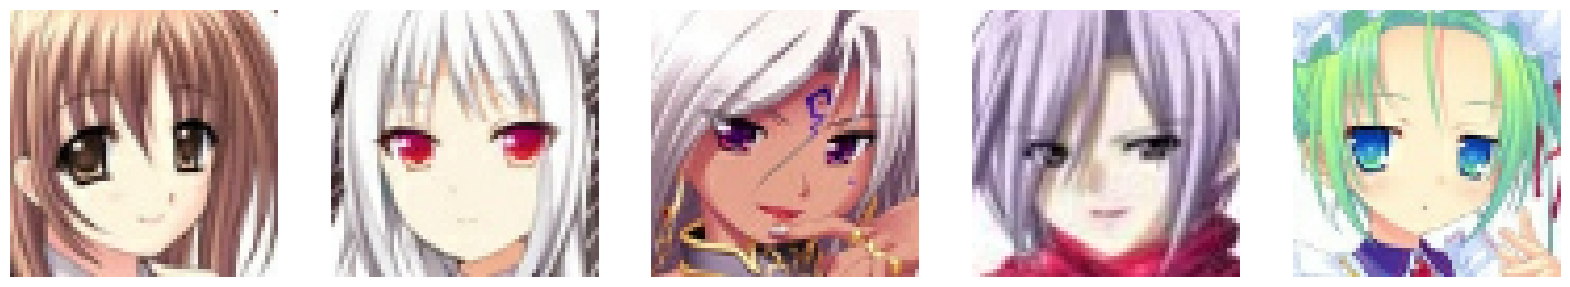

generated images


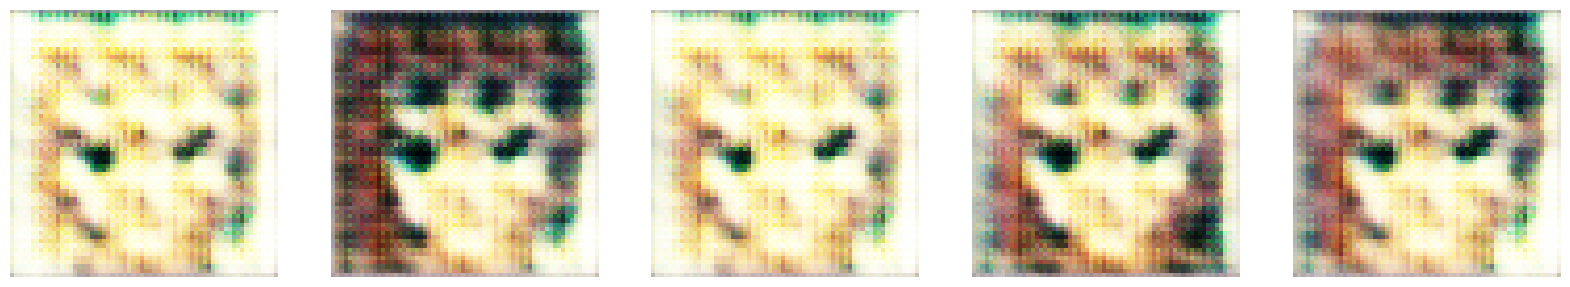

Time for epoch 4 is 85.93290615081787 sec


epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 5, iteration 1


epoch 5:   1%|          | 1/157 [00:00<01:25,  1.82it/s]

epoch 5, iteration 2


epoch 5:   1%|▏         | 2/157 [00:00<01:06,  2.35it/s]

epoch 5, iteration 3


epoch 5:   2%|▏         | 3/157 [00:01<00:59,  2.59it/s]

epoch 5, iteration 4


epoch 5:   3%|▎         | 4/157 [00:01<00:57,  2.65it/s]

epoch 5, iteration 5


epoch 5:   3%|▎         | 5/157 [00:01<00:55,  2.76it/s]

epoch 5, iteration 6


epoch 5:   4%|▍         | 6/157 [00:02<00:53,  2.82it/s]

epoch 5, iteration 7


epoch 5:   4%|▍         | 7/157 [00:02<00:53,  2.82it/s]

epoch 5, iteration 8


epoch 5:   5%|▌         | 8/157 [00:03<01:04,  2.32it/s]

epoch 5, iteration 9


epoch 5:   6%|▌         | 9/157 [00:03<00:59,  2.49it/s]

epoch 5, iteration 10


epoch 5:   6%|▋         | 10/157 [00:03<00:56,  2.59it/s]

epoch 5, iteration 11


epoch 5:   7%|▋         | 11/157 [00:04<00:54,  2.69it/s]

epoch 5, iteration 12


epoch 5:   8%|▊         | 12/157 [00:04<00:52,  2.75it/s]

epoch 5, iteration 13


epoch 5:   8%|▊         | 13/157 [00:04<00:52,  2.75it/s]

epoch 5, iteration 14


epoch 5:   9%|▉         | 14/157 [00:05<00:51,  2.80it/s]

epoch 5, iteration 15


epoch 5:  10%|▉         | 15/157 [00:05<00:50,  2.82it/s]

epoch 5, iteration 16


epoch 5:  10%|█         | 16/157 [00:05<00:50,  2.82it/s]

epoch 5, iteration 17


epoch 5:  11%|█         | 17/157 [00:06<00:49,  2.83it/s]

epoch 5, iteration 18


epoch 5:  11%|█▏        | 18/157 [00:06<00:48,  2.84it/s]

epoch 5, iteration 19


epoch 5:  12%|█▏        | 19/157 [00:07<00:48,  2.83it/s]

epoch 5, iteration 20


epoch 5:  13%|█▎        | 20/157 [00:07<00:48,  2.85it/s]

epoch 5, iteration 21


epoch 5:  13%|█▎        | 21/157 [00:07<00:49,  2.73it/s]

epoch 5, iteration 22


epoch 5:  14%|█▍        | 22/157 [00:08<00:51,  2.64it/s]

epoch 5, iteration 23


epoch 5:  15%|█▍        | 23/157 [00:08<00:52,  2.56it/s]

epoch 5, iteration 24


epoch 5:  15%|█▌        | 24/157 [00:09<00:54,  2.46it/s]

epoch 5, iteration 25


epoch 5:  16%|█▌        | 25/157 [00:09<00:55,  2.38it/s]

epoch 5, iteration 26


epoch 5:  17%|█▋        | 26/157 [00:09<00:56,  2.33it/s]

epoch 5, iteration 27


epoch 5:  17%|█▋        | 27/157 [00:10<00:53,  2.41it/s]

epoch 5, iteration 28


epoch 5:  18%|█▊        | 28/157 [00:10<00:50,  2.55it/s]

epoch 5, iteration 29


epoch 5:  18%|█▊        | 29/157 [00:11<00:48,  2.65it/s]

epoch 5, iteration 30


epoch 5:  19%|█▉        | 30/157 [00:11<00:46,  2.72it/s]

epoch 5, iteration 31


epoch 5:  20%|█▉        | 31/157 [00:11<00:45,  2.80it/s]

epoch 5, iteration 32


epoch 5:  20%|██        | 32/157 [00:12<00:44,  2.80it/s]

epoch 5, iteration 33


epoch 5:  21%|██        | 33/157 [00:12<00:43,  2.83it/s]

epoch 5, iteration 34


epoch 5:  22%|██▏       | 34/157 [00:12<00:43,  2.86it/s]

epoch 5, iteration 35


epoch 5:  22%|██▏       | 35/157 [00:13<00:43,  2.81it/s]

epoch 5, iteration 36


epoch 5:  23%|██▎       | 36/157 [00:13<00:42,  2.85it/s]

epoch 5, iteration 37


epoch 5:  24%|██▎       | 37/157 [00:13<00:41,  2.87it/s]

epoch 5, iteration 38


epoch 5:  24%|██▍       | 38/157 [00:14<00:41,  2.90it/s]

epoch 5, iteration 39


epoch 5:  25%|██▍       | 39/157 [00:14<00:41,  2.87it/s]

epoch 5, iteration 40


epoch 5:  25%|██▌       | 40/157 [00:14<00:40,  2.87it/s]

epoch 5, iteration 41


epoch 5:  26%|██▌       | 41/157 [00:15<00:40,  2.86it/s]

epoch 5, iteration 42


epoch 5:  27%|██▋       | 42/157 [00:15<00:40,  2.86it/s]

epoch 5, iteration 43


epoch 5:  27%|██▋       | 43/157 [00:15<00:39,  2.88it/s]

epoch 5, iteration 44


epoch 5:  28%|██▊       | 44/157 [00:16<00:38,  2.90it/s]

epoch 5, iteration 45


epoch 5:  29%|██▊       | 45/157 [00:16<00:38,  2.90it/s]

epoch 5, iteration 46


epoch 5:  29%|██▉       | 46/157 [00:16<00:38,  2.90it/s]

epoch 5, iteration 47


epoch 5:  30%|██▉       | 47/157 [00:17<00:38,  2.87it/s]

epoch 5, iteration 48


epoch 5:  31%|███       | 48/157 [00:17<00:37,  2.88it/s]

epoch 5, iteration 49


epoch 5:  31%|███       | 49/157 [00:17<00:37,  2.85it/s]

epoch 5, iteration 50


epoch 5:  32%|███▏      | 50/157 [00:18<00:37,  2.83it/s]

epoch 5, iteration 51


epoch 5:  32%|███▏      | 51/157 [00:18<00:37,  2.80it/s]

epoch 5, iteration 52


epoch 5:  33%|███▎      | 52/157 [00:19<00:37,  2.78it/s]

epoch 5, iteration 53


epoch 5:  34%|███▍      | 53/157 [00:19<00:36,  2.82it/s]

epoch 5, iteration 54


epoch 5:  34%|███▍      | 54/157 [00:19<00:36,  2.83it/s]

epoch 5, iteration 55


epoch 5:  35%|███▌      | 55/157 [00:20<00:35,  2.85it/s]

epoch 5, iteration 56


epoch 5:  36%|███▌      | 56/157 [00:20<00:38,  2.61it/s]

epoch 5, iteration 57


epoch 5:  36%|███▋      | 57/157 [00:21<00:40,  2.49it/s]

epoch 5, iteration 58


epoch 5:  37%|███▋      | 58/157 [00:21<00:40,  2.46it/s]

epoch 5, iteration 59


epoch 5:  38%|███▊      | 59/157 [00:21<00:40,  2.41it/s]

epoch 5, iteration 60


epoch 5:  38%|███▊      | 60/157 [00:22<00:40,  2.37it/s]

epoch 5, iteration 61


epoch 5:  39%|███▉      | 61/157 [00:22<00:41,  2.32it/s]

epoch 5, iteration 62


epoch 5:  39%|███▉      | 62/157 [00:23<00:39,  2.40it/s]

epoch 5, iteration 63


epoch 5:  40%|████      | 63/157 [00:23<00:37,  2.52it/s]

epoch 5, iteration 64


epoch 5:  41%|████      | 64/157 [00:23<00:35,  2.63it/s]

epoch 5, iteration 65


epoch 5:  41%|████▏     | 65/157 [00:24<00:33,  2.72it/s]

epoch 5, iteration 66


epoch 5:  42%|████▏     | 66/157 [00:24<00:32,  2.77it/s]

epoch 5, iteration 67


epoch 5:  43%|████▎     | 67/157 [00:24<00:31,  2.82it/s]

epoch 5, iteration 68


epoch 5:  43%|████▎     | 68/157 [00:25<00:31,  2.85it/s]

epoch 5, iteration 69


epoch 5:  44%|████▍     | 69/157 [00:25<00:31,  2.84it/s]

epoch 5, iteration 70


epoch 5:  45%|████▍     | 70/157 [00:25<00:30,  2.85it/s]

epoch 5, iteration 71


epoch 5:  45%|████▌     | 71/157 [00:26<00:29,  2.88it/s]

epoch 5, iteration 72


epoch 5:  46%|████▌     | 72/157 [00:26<00:29,  2.84it/s]

epoch 5, iteration 73


epoch 5:  46%|████▋     | 73/157 [00:26<00:29,  2.84it/s]

epoch 5, iteration 74


epoch 5:  47%|████▋     | 74/157 [00:27<00:29,  2.84it/s]

epoch 5, iteration 75


epoch 5:  48%|████▊     | 75/157 [00:27<00:28,  2.85it/s]

epoch 5, iteration 76


epoch 5:  48%|████▊     | 76/157 [00:28<00:28,  2.86it/s]

epoch 5, iteration 77


epoch 5:  49%|████▉     | 77/157 [00:28<00:27,  2.87it/s]

epoch 5, iteration 78


epoch 5:  50%|████▉     | 78/157 [00:28<00:27,  2.85it/s]

epoch 5, iteration 79


epoch 5:  50%|█████     | 79/157 [00:29<00:27,  2.85it/s]

epoch 5, iteration 80


epoch 5:  51%|█████     | 80/157 [00:29<00:26,  2.87it/s]

epoch 5, iteration 81


epoch 5:  52%|█████▏    | 81/157 [00:29<00:26,  2.86it/s]

epoch 5, iteration 82


epoch 5:  52%|█████▏    | 82/157 [00:30<00:26,  2.87it/s]

epoch 5, iteration 83


epoch 5:  53%|█████▎    | 83/157 [00:30<00:25,  2.87it/s]

epoch 5, iteration 84


epoch 5:  54%|█████▎    | 84/157 [00:30<00:25,  2.84it/s]

epoch 5, iteration 85


epoch 5:  54%|█████▍    | 85/157 [00:31<00:25,  2.85it/s]

epoch 5, iteration 86


epoch 5:  55%|█████▍    | 86/157 [00:31<00:25,  2.80it/s]

epoch 5, iteration 87


epoch 5:  55%|█████▌    | 87/157 [00:31<00:24,  2.82it/s]

epoch 5, iteration 88


epoch 5:  56%|█████▌    | 88/157 [00:32<00:24,  2.83it/s]

epoch 5, iteration 89


epoch 5:  57%|█████▋    | 89/157 [00:32<00:23,  2.84it/s]

epoch 5, iteration 90


epoch 5:  57%|█████▋    | 90/157 [00:32<00:24,  2.72it/s]

epoch 5, iteration 91


epoch 5:  58%|█████▊    | 91/157 [00:33<00:25,  2.61it/s]

epoch 5, iteration 92


epoch 5:  59%|█████▊    | 92/157 [00:33<00:25,  2.53it/s]

epoch 5, iteration 93


epoch 5:  59%|█████▉    | 93/157 [00:34<00:26,  2.45it/s]

epoch 5, iteration 94


epoch 5:  60%|█████▉    | 94/157 [00:34<00:26,  2.35it/s]

epoch 5, iteration 95


epoch 5:  61%|██████    | 95/157 [00:35<00:26,  2.33it/s]

epoch 5, iteration 96


epoch 5:  61%|██████    | 96/157 [00:35<00:26,  2.29it/s]

epoch 5, iteration 97


epoch 5:  62%|██████▏   | 97/157 [00:35<00:24,  2.40it/s]

epoch 5, iteration 98


epoch 5:  62%|██████▏   | 98/157 [00:36<00:23,  2.52it/s]

epoch 5, iteration 99


epoch 5:  63%|██████▎   | 99/157 [00:36<00:22,  2.60it/s]

epoch 5, iteration 100


epoch 5:  64%|██████▎   | 100/157 [00:37<00:21,  2.63it/s]

epoch 5, iteration 101


epoch 5:  64%|██████▍   | 101/157 [00:37<00:20,  2.71it/s]

epoch 5, iteration 102


epoch 5:  65%|██████▍   | 102/157 [00:37<00:19,  2.78it/s]

epoch 5, iteration 103


epoch 5:  66%|██████▌   | 103/157 [00:38<00:19,  2.78it/s]

epoch 5, iteration 104


epoch 5:  66%|██████▌   | 104/157 [00:38<00:18,  2.79it/s]

epoch 5, iteration 105


epoch 5:  67%|██████▋   | 105/157 [00:38<00:18,  2.83it/s]

epoch 5, iteration 106


epoch 5:  68%|██████▊   | 106/157 [00:39<00:18,  2.82it/s]

epoch 5, iteration 107


epoch 5:  68%|██████▊   | 107/157 [00:39<00:17,  2.83it/s]

epoch 5, iteration 108


epoch 5:  69%|██████▉   | 108/157 [00:39<00:17,  2.80it/s]

epoch 5, iteration 109


epoch 5:  69%|██████▉   | 109/157 [00:40<00:17,  2.79it/s]

epoch 5, iteration 110


epoch 5:  70%|███████   | 110/157 [00:40<00:17,  2.75it/s]

epoch 5, iteration 111


epoch 5:  71%|███████   | 111/157 [00:40<00:16,  2.76it/s]

epoch 5, iteration 112


epoch 5:  71%|███████▏  | 112/157 [00:41<00:16,  2.75it/s]

epoch 5, iteration 113


epoch 5:  72%|███████▏  | 113/157 [00:41<00:15,  2.80it/s]

epoch 5, iteration 114


epoch 5:  73%|███████▎  | 114/157 [00:42<00:15,  2.81it/s]

epoch 5, iteration 115


epoch 5:  73%|███████▎  | 115/157 [00:42<00:14,  2.81it/s]

epoch 5, iteration 116


epoch 5:  74%|███████▍  | 116/157 [00:42<00:14,  2.83it/s]

epoch 5, iteration 117


epoch 5:  75%|███████▍  | 117/157 [00:43<00:14,  2.83it/s]

epoch 5, iteration 118


epoch 5:  75%|███████▌  | 118/157 [00:43<00:13,  2.85it/s]

epoch 5, iteration 119


epoch 5:  76%|███████▌  | 119/157 [00:43<00:13,  2.86it/s]

epoch 5, iteration 120


epoch 5:  76%|███████▋  | 120/157 [00:44<00:12,  2.86it/s]

epoch 5, iteration 121


epoch 5:  77%|███████▋  | 121/157 [00:44<00:12,  2.84it/s]

epoch 5, iteration 122


epoch 5:  78%|███████▊  | 122/157 [00:44<00:12,  2.87it/s]

epoch 5, iteration 123


epoch 5:  78%|███████▊  | 123/157 [00:45<00:11,  2.86it/s]

epoch 5, iteration 124


epoch 5:  79%|███████▉  | 124/157 [00:45<00:11,  2.87it/s]

epoch 5, iteration 125


epoch 5:  80%|███████▉  | 125/157 [00:45<00:11,  2.68it/s]

epoch 5, iteration 126


epoch 5:  80%|████████  | 126/157 [00:46<00:12,  2.54it/s]

epoch 5, iteration 127


epoch 5:  81%|████████  | 127/157 [00:46<00:11,  2.52it/s]

epoch 5, iteration 128


epoch 5:  82%|████████▏ | 128/157 [00:47<00:11,  2.48it/s]

epoch 5, iteration 129


epoch 5:  82%|████████▏ | 129/157 [00:47<00:11,  2.40it/s]

epoch 5, iteration 130


epoch 5:  83%|████████▎ | 130/157 [00:48<00:11,  2.36it/s]

epoch 5, iteration 131


epoch 5:  83%|████████▎ | 131/157 [00:48<00:10,  2.46it/s]

epoch 5, iteration 132


epoch 5:  84%|████████▍ | 132/157 [00:48<00:09,  2.59it/s]

epoch 5, iteration 133


epoch 5:  85%|████████▍ | 133/157 [00:49<00:09,  2.66it/s]

epoch 5, iteration 134


epoch 5:  85%|████████▌ | 134/157 [00:49<00:08,  2.75it/s]

epoch 5, iteration 135


epoch 5:  86%|████████▌ | 135/157 [00:49<00:07,  2.81it/s]

epoch 5, iteration 136


epoch 5:  87%|████████▋ | 136/157 [00:50<00:07,  2.79it/s]

epoch 5, iteration 137


epoch 5:  87%|████████▋ | 137/157 [00:50<00:07,  2.80it/s]

epoch 5, iteration 138


epoch 5:  88%|████████▊ | 138/157 [00:50<00:06,  2.80it/s]

epoch 5, iteration 139


epoch 5:  89%|████████▊ | 139/157 [00:51<00:06,  2.76it/s]

epoch 5, iteration 140


epoch 5:  89%|████████▉ | 140/157 [00:51<00:06,  2.79it/s]

epoch 5, iteration 141


epoch 5:  90%|████████▉ | 141/157 [00:51<00:05,  2.84it/s]

epoch 5, iteration 142


epoch 5:  90%|█████████ | 142/157 [00:52<00:05,  2.83it/s]

epoch 5, iteration 143


epoch 5:  91%|█████████ | 143/157 [00:52<00:04,  2.85it/s]

epoch 5, iteration 144


epoch 5:  92%|█████████▏| 144/157 [00:53<00:04,  2.87it/s]

epoch 5, iteration 145


epoch 5:  92%|█████████▏| 145/157 [00:53<00:04,  2.87it/s]

epoch 5, iteration 146


epoch 5:  93%|█████████▎| 146/157 [00:53<00:03,  2.88it/s]

epoch 5, iteration 147


epoch 5:  94%|█████████▎| 147/157 [00:54<00:03,  2.91it/s]

epoch 5, iteration 148


epoch 5:  94%|█████████▍| 148/157 [00:54<00:03,  2.90it/s]

epoch 5, iteration 149


epoch 5:  95%|█████████▍| 149/157 [00:54<00:02,  2.91it/s]

epoch 5, iteration 150


epoch 5:  96%|█████████▌| 150/157 [00:55<00:02,  2.90it/s]

epoch 5, iteration 151


epoch 5:  96%|█████████▌| 151/157 [00:55<00:02,  2.94it/s]

epoch 5, iteration 152


epoch 5:  97%|█████████▋| 152/157 [00:55<00:01,  2.96it/s]

epoch 5, iteration 153


epoch 5:  97%|█████████▋| 153/157 [00:56<00:01,  2.94it/s]

epoch 5, iteration 154


epoch 5:  98%|█████████▊| 154/157 [00:56<00:01,  2.95it/s]

epoch 5, iteration 155


epoch 5:  99%|█████████▊| 155/157 [00:56<00:00,  2.99it/s]

epoch 5, iteration 156


epoch 5:  99%|█████████▉| 156/157 [00:57<00:00,  3.00it/s]

epoch 5, iteration 157


epoch 5: 100%|██████████| 157/157 [00:57<00:00,  2.73it/s]


orignal images


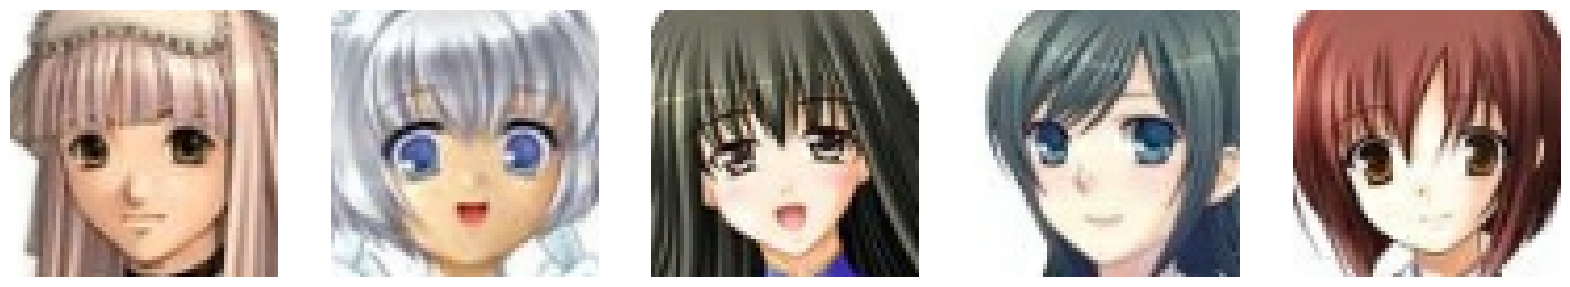

generated images


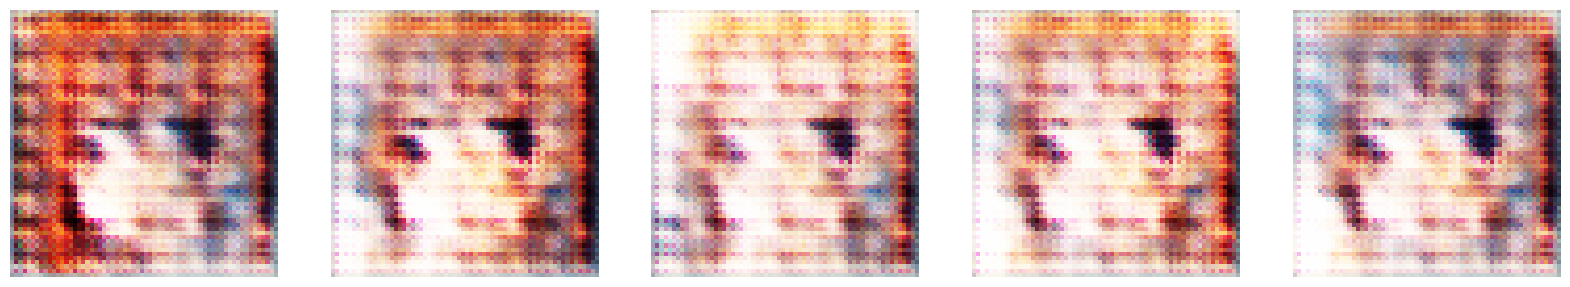

Time for epoch 5 is 62.07722234725952 sec


epoch 6:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 6, iteration 1


epoch 6:   1%|          | 1/157 [00:00<01:26,  1.80it/s]

epoch 6, iteration 2


epoch 6:   1%|▏         | 2/157 [00:00<01:08,  2.25it/s]

epoch 6, iteration 3


epoch 6:   2%|▏         | 3/157 [00:01<01:01,  2.51it/s]

epoch 6, iteration 4


epoch 6:   3%|▎         | 4/157 [00:01<00:58,  2.63it/s]

epoch 6, iteration 5


epoch 6:   3%|▎         | 5/157 [00:01<00:56,  2.71it/s]

epoch 6, iteration 6


epoch 6:   4%|▍         | 6/157 [00:02<00:54,  2.75it/s]

epoch 6, iteration 7


epoch 6:   4%|▍         | 7/157 [00:02<00:54,  2.75it/s]

epoch 6, iteration 8


epoch 6:   5%|▌         | 8/157 [00:03<00:52,  2.82it/s]

epoch 6, iteration 9


epoch 6:   6%|▌         | 9/157 [00:03<00:51,  2.85it/s]

epoch 6, iteration 10


epoch 6:   6%|▋         | 10/157 [00:03<00:51,  2.84it/s]

epoch 6, iteration 11


epoch 6:   7%|▋         | 11/157 [00:04<00:50,  2.86it/s]

epoch 6, iteration 12


epoch 6:   8%|▊         | 12/157 [00:04<00:51,  2.84it/s]

epoch 6, iteration 13


epoch 6:   8%|▊         | 13/157 [00:04<00:50,  2.83it/s]

epoch 6, iteration 14


epoch 6:   9%|▉         | 14/157 [00:05<00:50,  2.84it/s]

epoch 6, iteration 15


epoch 6:  10%|▉         | 15/157 [00:05<00:50,  2.84it/s]

epoch 6, iteration 16


epoch 6:  10%|█         | 16/157 [00:05<00:49,  2.85it/s]

epoch 6, iteration 17


epoch 6:  11%|█         | 17/157 [00:06<00:48,  2.87it/s]

epoch 6, iteration 18


epoch 6:  11%|█▏        | 18/157 [00:06<00:48,  2.86it/s]

epoch 6, iteration 19


epoch 6:  12%|█▏        | 19/157 [00:06<00:48,  2.87it/s]

epoch 6, iteration 20


epoch 6:  13%|█▎        | 20/157 [00:07<00:47,  2.87it/s]

epoch 6, iteration 21


epoch 6:  13%|█▎        | 21/157 [00:07<00:47,  2.85it/s]

epoch 6, iteration 22


epoch 6:  14%|█▍        | 22/157 [00:07<00:47,  2.87it/s]

epoch 6, iteration 23


epoch 6:  15%|█▍        | 23/157 [00:08<00:47,  2.84it/s]

epoch 6, iteration 24


epoch 6:  15%|█▌        | 24/157 [00:08<00:46,  2.86it/s]

epoch 6, iteration 25


epoch 6:  16%|█▌        | 25/157 [00:08<00:46,  2.84it/s]

epoch 6, iteration 26


epoch 6:  17%|█▋        | 26/157 [00:09<00:48,  2.71it/s]

epoch 6, iteration 27


epoch 6:  17%|█▋        | 27/157 [00:09<00:50,  2.58it/s]

epoch 6, iteration 28


epoch 6:  18%|█▊        | 28/157 [00:10<00:50,  2.53it/s]

epoch 6, iteration 29


epoch 6:  18%|█▊        | 29/157 [00:10<00:52,  2.45it/s]

epoch 6, iteration 30


epoch 6:  19%|█▉        | 30/157 [00:11<00:53,  2.36it/s]

epoch 6, iteration 31


epoch 6:  20%|█▉        | 31/157 [00:11<00:55,  2.28it/s]

epoch 6, iteration 32


epoch 6:  20%|██        | 32/157 [00:11<00:52,  2.38it/s]

epoch 6, iteration 33


epoch 6:  21%|██        | 33/157 [00:12<00:49,  2.51it/s]

epoch 6, iteration 34


epoch 6:  22%|██▏       | 34/157 [00:12<00:47,  2.60it/s]

epoch 6, iteration 35


epoch 6:  22%|██▏       | 35/157 [00:13<00:45,  2.67it/s]

epoch 6, iteration 36


epoch 6:  23%|██▎       | 36/157 [00:13<00:44,  2.73it/s]

epoch 6, iteration 37


epoch 6:  24%|██▎       | 37/157 [00:13<00:43,  2.77it/s]

epoch 6, iteration 38


epoch 6:  24%|██▍       | 38/157 [00:14<00:43,  2.77it/s]

epoch 6, iteration 39


epoch 6:  25%|██▍       | 39/157 [00:14<00:42,  2.79it/s]

epoch 6, iteration 40


epoch 6:  25%|██▌       | 40/157 [00:14<00:41,  2.81it/s]

epoch 6, iteration 41


epoch 6:  26%|██▌       | 41/157 [00:15<00:41,  2.82it/s]

epoch 6, iteration 42


epoch 6:  27%|██▋       | 42/157 [00:15<00:40,  2.85it/s]

epoch 6, iteration 43


epoch 6:  27%|██▋       | 43/157 [00:15<00:40,  2.84it/s]

epoch 6, iteration 44


epoch 6:  28%|██▊       | 44/157 [00:16<00:39,  2.87it/s]

epoch 6, iteration 45


epoch 6:  29%|██▊       | 45/157 [00:16<00:39,  2.86it/s]

epoch 6, iteration 46


epoch 6:  29%|██▉       | 46/157 [00:16<00:39,  2.84it/s]

epoch 6, iteration 47


epoch 6:  30%|██▉       | 47/157 [00:17<00:39,  2.81it/s]

epoch 6, iteration 48


epoch 6:  31%|███       | 48/157 [00:17<00:38,  2.83it/s]

epoch 6, iteration 49


epoch 6:  31%|███       | 49/157 [00:17<00:38,  2.83it/s]

epoch 6, iteration 50


epoch 6:  32%|███▏      | 50/157 [00:18<00:38,  2.81it/s]

epoch 6, iteration 51


epoch 6:  32%|███▏      | 51/157 [00:18<00:37,  2.84it/s]

epoch 6, iteration 52


epoch 6:  33%|███▎      | 52/157 [00:19<00:37,  2.83it/s]

epoch 6, iteration 53


epoch 6:  34%|███▍      | 53/157 [00:19<00:36,  2.81it/s]

epoch 6, iteration 54


epoch 6:  34%|███▍      | 54/157 [00:19<00:36,  2.84it/s]

epoch 6, iteration 55


epoch 6:  35%|███▌      | 55/157 [00:20<00:35,  2.86it/s]

epoch 6, iteration 56


epoch 6:  36%|███▌      | 56/157 [00:20<00:35,  2.84it/s]

epoch 6, iteration 57


epoch 6:  36%|███▋      | 57/157 [00:20<00:35,  2.83it/s]

epoch 6, iteration 58


epoch 6:  37%|███▋      | 58/157 [00:21<00:35,  2.82it/s]

epoch 6, iteration 59


epoch 6:  38%|███▊      | 59/157 [00:21<00:35,  2.79it/s]

epoch 6, iteration 60


epoch 6:  38%|███▊      | 60/157 [00:21<00:36,  2.65it/s]

epoch 6, iteration 61


epoch 6:  39%|███▉      | 61/157 [00:22<00:38,  2.48it/s]

epoch 6, iteration 62


epoch 6:  39%|███▉      | 62/157 [00:22<00:38,  2.47it/s]

epoch 6, iteration 63


epoch 6:  40%|████      | 63/157 [00:23<00:38,  2.41it/s]

epoch 6, iteration 64


epoch 6:  41%|████      | 64/157 [00:23<00:40,  2.30it/s]

epoch 6, iteration 65


epoch 6:  41%|████▏     | 65/157 [00:24<00:40,  2.25it/s]

epoch 6, iteration 66


epoch 6:  42%|████▏     | 66/157 [00:24<00:39,  2.31it/s]

epoch 6, iteration 67


epoch 6:  43%|████▎     | 67/157 [00:24<00:36,  2.44it/s]

epoch 6, iteration 68


epoch 6:  43%|████▎     | 68/157 [00:25<00:34,  2.55it/s]

epoch 6, iteration 69


epoch 6:  44%|████▍     | 69/157 [00:25<00:33,  2.64it/s]

epoch 6, iteration 70


epoch 6:  45%|████▍     | 70/157 [00:25<00:32,  2.70it/s]

epoch 6, iteration 71


epoch 6:  45%|████▌     | 71/157 [00:26<00:31,  2.74it/s]

epoch 6, iteration 72


epoch 6:  46%|████▌     | 72/157 [00:26<00:30,  2.74it/s]

epoch 6, iteration 73


epoch 6:  46%|████▋     | 73/157 [00:27<00:30,  2.75it/s]

epoch 6, iteration 74


epoch 6:  47%|████▋     | 74/157 [00:27<00:29,  2.77it/s]

epoch 6, iteration 75


epoch 6:  48%|████▊     | 75/157 [00:27<00:29,  2.76it/s]

epoch 6, iteration 76


epoch 6:  48%|████▊     | 76/157 [00:28<00:29,  2.76it/s]

epoch 6, iteration 77


epoch 6:  49%|████▉     | 77/157 [00:28<00:29,  2.72it/s]

epoch 6, iteration 78


epoch 6:  50%|████▉     | 78/157 [00:28<00:28,  2.75it/s]

epoch 6, iteration 79


epoch 6:  50%|█████     | 79/157 [00:29<00:28,  2.77it/s]

epoch 6, iteration 80


epoch 6:  51%|█████     | 80/157 [00:29<00:27,  2.76it/s]

epoch 6, iteration 81


epoch 6:  52%|█████▏    | 81/157 [00:29<00:27,  2.74it/s]

epoch 6, iteration 82


epoch 6:  52%|█████▏    | 82/157 [00:30<00:27,  2.73it/s]

epoch 6, iteration 83


epoch 6:  53%|█████▎    | 83/157 [00:30<00:26,  2.75it/s]

epoch 6, iteration 84


epoch 6:  54%|█████▎    | 84/157 [00:31<00:26,  2.77it/s]

epoch 6, iteration 85


epoch 6:  54%|█████▍    | 85/157 [00:31<00:25,  2.78it/s]

epoch 6, iteration 86


epoch 6:  55%|█████▍    | 86/157 [00:31<00:25,  2.81it/s]

epoch 6, iteration 87


epoch 6:  55%|█████▌    | 87/157 [00:32<00:24,  2.84it/s]

epoch 6, iteration 88


epoch 6:  56%|█████▌    | 88/157 [00:32<00:24,  2.85it/s]

epoch 6, iteration 89


epoch 6:  57%|█████▋    | 89/157 [00:32<00:23,  2.85it/s]

epoch 6, iteration 90


epoch 6:  57%|█████▋    | 90/157 [00:33<00:23,  2.84it/s]

epoch 6, iteration 91


epoch 6:  58%|█████▊    | 91/157 [00:33<00:23,  2.85it/s]

epoch 6, iteration 92


epoch 6:  59%|█████▊    | 92/157 [00:33<00:23,  2.80it/s]

epoch 6, iteration 93


epoch 6:  59%|█████▉    | 93/157 [00:34<00:22,  2.80it/s]

epoch 6, iteration 94


epoch 6:  60%|█████▉    | 94/157 [00:34<00:23,  2.66it/s]

epoch 6, iteration 95


epoch 6:  61%|██████    | 95/157 [00:35<00:24,  2.52it/s]

epoch 6, iteration 96


epoch 6:  61%|██████    | 96/157 [00:35<00:24,  2.46it/s]

epoch 6, iteration 97


epoch 6:  62%|██████▏   | 97/157 [00:35<00:24,  2.41it/s]

epoch 6, iteration 98


epoch 6:  62%|██████▏   | 98/157 [00:36<00:25,  2.34it/s]

epoch 6, iteration 99


epoch 6:  63%|██████▎   | 99/157 [00:36<00:25,  2.30it/s]

epoch 6, iteration 100


epoch 6:  64%|██████▎   | 100/157 [00:37<00:24,  2.37it/s]

epoch 6, iteration 101


epoch 6:  64%|██████▍   | 101/157 [00:37<00:22,  2.46it/s]

epoch 6, iteration 102


epoch 6:  65%|██████▍   | 102/157 [00:37<00:21,  2.59it/s]

epoch 6, iteration 103


epoch 6:  66%|██████▌   | 103/157 [00:38<00:20,  2.65it/s]

epoch 6, iteration 104


epoch 6:  66%|██████▌   | 104/157 [00:38<00:19,  2.72it/s]

epoch 6, iteration 105


epoch 6:  67%|██████▋   | 105/157 [00:39<00:19,  2.74it/s]

epoch 6, iteration 106


epoch 6:  68%|██████▊   | 106/157 [00:39<00:18,  2.76it/s]

epoch 6, iteration 107


epoch 6:  68%|██████▊   | 107/157 [00:39<00:17,  2.80it/s]

epoch 6, iteration 108


epoch 6:  69%|██████▉   | 108/157 [00:40<00:17,  2.82it/s]

epoch 6, iteration 109


epoch 6:  69%|██████▉   | 109/157 [00:40<00:16,  2.85it/s]

epoch 6, iteration 110


epoch 6:  70%|███████   | 110/157 [00:40<00:16,  2.86it/s]

epoch 6, iteration 111


epoch 6:  71%|███████   | 111/157 [00:41<00:16,  2.83it/s]

epoch 6, iteration 112


epoch 6:  71%|███████▏  | 112/157 [00:41<00:15,  2.83it/s]

epoch 6, iteration 113


epoch 6:  72%|███████▏  | 113/157 [00:41<00:15,  2.84it/s]

epoch 6, iteration 114


epoch 6:  73%|███████▎  | 114/157 [00:42<00:15,  2.81it/s]

epoch 6, iteration 115


epoch 6:  73%|███████▎  | 115/157 [00:42<00:15,  2.76it/s]

epoch 6, iteration 116


epoch 6:  74%|███████▍  | 116/157 [00:42<00:14,  2.80it/s]

epoch 6, iteration 117


epoch 6:  75%|███████▍  | 117/157 [00:43<00:14,  2.79it/s]

epoch 6, iteration 118


epoch 6:  75%|███████▌  | 118/157 [00:43<00:13,  2.80it/s]

epoch 6, iteration 119


epoch 6:  76%|███████▌  | 119/157 [00:43<00:13,  2.82it/s]

epoch 6, iteration 120


epoch 6:  76%|███████▋  | 120/157 [00:44<00:13,  2.83it/s]

epoch 6, iteration 121


epoch 6:  77%|███████▋  | 121/157 [00:44<00:12,  2.81it/s]

epoch 6, iteration 122


epoch 6:  78%|███████▊  | 122/157 [00:45<00:12,  2.82it/s]

epoch 6, iteration 123


epoch 6:  78%|███████▊  | 123/157 [00:45<00:12,  2.81it/s]

epoch 6, iteration 124


epoch 6:  79%|███████▉  | 124/157 [00:45<00:11,  2.83it/s]

epoch 6, iteration 125


epoch 6:  80%|███████▉  | 125/157 [00:46<00:11,  2.85it/s]

epoch 6, iteration 126


epoch 6:  80%|████████  | 126/157 [00:46<00:10,  2.84it/s]

epoch 6, iteration 127


epoch 6:  81%|████████  | 127/157 [00:46<00:10,  2.85it/s]

epoch 6, iteration 128


epoch 6:  82%|████████▏ | 128/157 [00:47<00:10,  2.74it/s]

epoch 6, iteration 129


epoch 6:  82%|████████▏ | 129/157 [00:47<00:10,  2.58it/s]

epoch 6, iteration 130


epoch 6:  83%|████████▎ | 130/157 [00:48<00:10,  2.55it/s]

epoch 6, iteration 131


epoch 6:  83%|████████▎ | 131/157 [00:48<00:10,  2.46it/s]

epoch 6, iteration 132


epoch 6:  84%|████████▍ | 132/157 [00:48<00:10,  2.39it/s]

epoch 6, iteration 133


epoch 6:  85%|████████▍ | 133/157 [00:49<00:10,  2.35it/s]

epoch 6, iteration 134


epoch 6:  85%|████████▌ | 134/157 [00:49<00:09,  2.37it/s]

epoch 6, iteration 135


epoch 6:  86%|████████▌ | 135/157 [00:50<00:08,  2.51it/s]

epoch 6, iteration 136


epoch 6:  87%|████████▋ | 136/157 [00:50<00:08,  2.61it/s]

epoch 6, iteration 137


epoch 6:  87%|████████▋ | 137/157 [00:50<00:07,  2.67it/s]

epoch 6, iteration 138


epoch 6:  88%|████████▊ | 138/157 [00:51<00:06,  2.74it/s]

epoch 6, iteration 139


epoch 6:  89%|████████▊ | 139/157 [00:51<00:06,  2.74it/s]

epoch 6, iteration 140


epoch 6:  89%|████████▉ | 140/157 [00:51<00:06,  2.77it/s]

epoch 6, iteration 141


epoch 6:  90%|████████▉ | 141/157 [00:52<00:05,  2.80it/s]

epoch 6, iteration 142


epoch 6:  90%|█████████ | 142/157 [00:52<00:05,  2.84it/s]

epoch 6, iteration 143


epoch 6:  91%|█████████ | 143/157 [00:52<00:04,  2.86it/s]

epoch 6, iteration 144


epoch 6:  92%|█████████▏| 144/157 [00:53<00:04,  2.84it/s]

epoch 6, iteration 145


epoch 6:  92%|█████████▏| 145/157 [00:53<00:04,  2.81it/s]

epoch 6, iteration 146


epoch 6:  93%|█████████▎| 146/157 [00:54<00:03,  2.81it/s]

epoch 6, iteration 147


epoch 6:  94%|█████████▎| 147/157 [00:54<00:03,  2.84it/s]

epoch 6, iteration 148


epoch 6:  94%|█████████▍| 148/157 [00:54<00:03,  2.80it/s]

epoch 6, iteration 149


epoch 6:  95%|█████████▍| 149/157 [00:55<00:02,  2.81it/s]

epoch 6, iteration 150


epoch 6:  96%|█████████▌| 150/157 [00:55<00:02,  2.80it/s]

epoch 6, iteration 151


epoch 6:  96%|█████████▌| 151/157 [00:55<00:02,  2.84it/s]

epoch 6, iteration 152


epoch 6:  97%|█████████▋| 152/157 [00:56<00:01,  2.89it/s]

epoch 6, iteration 153


epoch 6:  97%|█████████▋| 153/157 [00:56<00:01,  2.89it/s]

epoch 6, iteration 154


epoch 6:  98%|█████████▊| 154/157 [00:56<00:01,  2.92it/s]

epoch 6, iteration 155


epoch 6:  99%|█████████▊| 155/157 [00:57<00:00,  2.96it/s]

epoch 6, iteration 156


epoch 6:  99%|█████████▉| 156/157 [00:57<00:00,  3.00it/s]

epoch 6, iteration 157


epoch 6: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


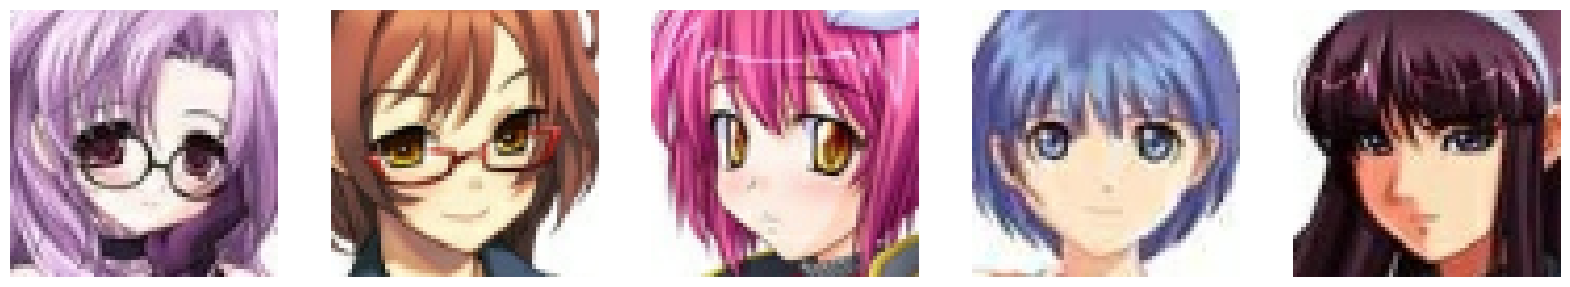

generated images


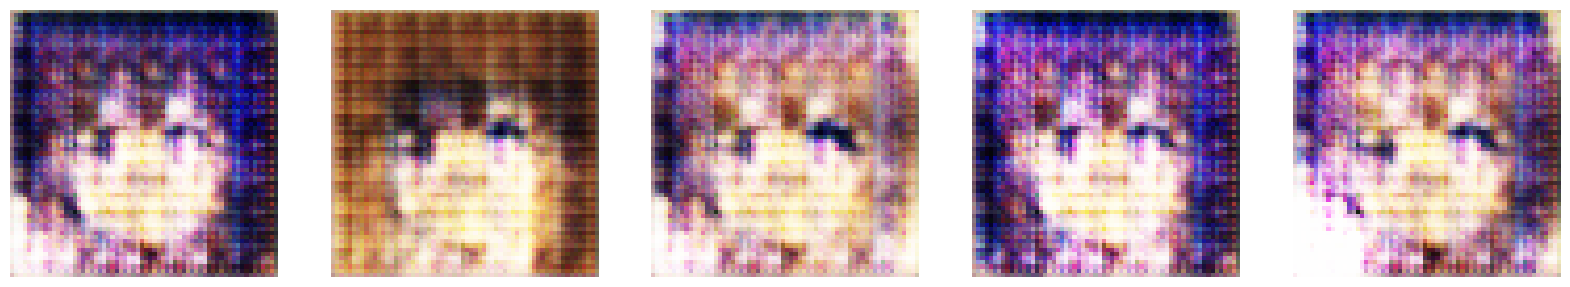

Time for epoch 6 is 86.55547714233398 sec


epoch 7:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 7, iteration 1


epoch 7:   1%|          | 1/157 [00:00<01:24,  1.85it/s]

epoch 7, iteration 2


epoch 7:   1%|▏         | 2/157 [00:00<01:07,  2.31it/s]

epoch 7, iteration 3


epoch 7:   2%|▏         | 3/157 [00:01<01:01,  2.51it/s]

epoch 7, iteration 4


epoch 7:   3%|▎         | 4/157 [00:01<00:59,  2.57it/s]

epoch 7, iteration 5


epoch 7:   3%|▎         | 5/157 [00:01<00:57,  2.64it/s]

epoch 7, iteration 6


epoch 7:   4%|▍         | 6/157 [00:02<00:55,  2.70it/s]

epoch 7, iteration 7


epoch 7:   4%|▍         | 7/157 [00:02<00:54,  2.73it/s]

epoch 7, iteration 8


epoch 7:   5%|▌         | 8/157 [00:03<00:53,  2.78it/s]

epoch 7, iteration 9


epoch 7:   6%|▌         | 9/157 [00:03<00:53,  2.75it/s]

epoch 7, iteration 10


epoch 7:   6%|▋         | 10/157 [00:03<00:53,  2.77it/s]

epoch 7, iteration 11


epoch 7:   7%|▋         | 11/157 [00:04<00:52,  2.77it/s]

epoch 7, iteration 12


epoch 7:   8%|▊         | 12/157 [00:04<00:51,  2.81it/s]

epoch 7, iteration 13


epoch 7:   8%|▊         | 13/157 [00:04<00:51,  2.79it/s]

epoch 7, iteration 14


epoch 7:   9%|▉         | 14/157 [00:05<00:50,  2.80it/s]

epoch 7, iteration 15


epoch 7:  10%|▉         | 15/157 [00:05<00:49,  2.84it/s]

epoch 7, iteration 16


epoch 7:  10%|█         | 16/157 [00:05<00:49,  2.85it/s]

epoch 7, iteration 17


epoch 7:  11%|█         | 17/157 [00:06<00:49,  2.81it/s]

epoch 7, iteration 18


epoch 7:  11%|█▏        | 18/157 [00:06<00:49,  2.80it/s]

epoch 7, iteration 19


epoch 7:  12%|█▏        | 19/157 [00:06<00:49,  2.79it/s]

epoch 7, iteration 20


epoch 7:  13%|█▎        | 20/157 [00:07<00:48,  2.81it/s]

epoch 7, iteration 21


epoch 7:  13%|█▎        | 21/157 [00:07<00:48,  2.81it/s]

epoch 7, iteration 22


epoch 7:  14%|█▍        | 22/157 [00:08<00:47,  2.82it/s]

epoch 7, iteration 23


epoch 7:  15%|█▍        | 23/157 [00:08<00:47,  2.83it/s]

epoch 7, iteration 24


epoch 7:  15%|█▌        | 24/157 [00:08<00:47,  2.82it/s]

epoch 7, iteration 25


epoch 7:  16%|█▌        | 25/157 [00:09<00:46,  2.82it/s]

epoch 7, iteration 26


epoch 7:  17%|█▋        | 26/157 [00:09<00:48,  2.69it/s]

epoch 7, iteration 27


epoch 7:  17%|█▋        | 27/157 [00:09<00:51,  2.55it/s]

epoch 7, iteration 28


epoch 7:  18%|█▊        | 28/157 [00:10<00:51,  2.49it/s]

epoch 7, iteration 29


epoch 7:  18%|█▊        | 29/157 [00:10<00:52,  2.43it/s]

epoch 7, iteration 30


epoch 7:  19%|█▉        | 30/157 [00:11<00:54,  2.34it/s]

epoch 7, iteration 31


epoch 7:  20%|█▉        | 31/157 [00:11<00:55,  2.27it/s]

epoch 7, iteration 32


epoch 7:  20%|██        | 32/157 [00:12<00:53,  2.35it/s]

epoch 7, iteration 33


epoch 7:  21%|██        | 33/157 [00:12<00:50,  2.47it/s]

epoch 7, iteration 34


epoch 7:  22%|██▏       | 34/157 [00:12<00:47,  2.57it/s]

epoch 7, iteration 35


epoch 7:  22%|██▏       | 35/157 [00:13<00:46,  2.62it/s]

epoch 7, iteration 36


epoch 7:  23%|██▎       | 36/157 [00:13<00:45,  2.68it/s]

epoch 7, iteration 37


epoch 7:  24%|██▎       | 37/157 [00:13<00:44,  2.70it/s]

epoch 7, iteration 38


epoch 7:  24%|██▍       | 38/157 [00:14<00:43,  2.72it/s]

epoch 7, iteration 39


epoch 7:  25%|██▍       | 39/157 [00:14<00:43,  2.74it/s]

epoch 7, iteration 40


epoch 7:  25%|██▌       | 40/157 [00:14<00:41,  2.79it/s]

epoch 7, iteration 41


epoch 7:  26%|██▌       | 41/157 [00:15<00:41,  2.77it/s]

epoch 7, iteration 42


epoch 7:  27%|██▋       | 42/157 [00:15<00:40,  2.81it/s]

epoch 7, iteration 43


epoch 7:  27%|██▋       | 43/157 [00:16<00:41,  2.77it/s]

epoch 7, iteration 44


epoch 7:  28%|██▊       | 44/157 [00:16<00:40,  2.79it/s]

epoch 7, iteration 45


epoch 7:  29%|██▊       | 45/157 [00:16<00:40,  2.80it/s]

epoch 7, iteration 46


epoch 7:  29%|██▉       | 46/157 [00:17<00:40,  2.77it/s]

epoch 7, iteration 47


epoch 7:  30%|██▉       | 47/157 [00:17<00:39,  2.78it/s]

epoch 7, iteration 48


epoch 7:  31%|███       | 48/157 [00:17<00:39,  2.79it/s]

epoch 7, iteration 49


epoch 7:  31%|███       | 49/157 [00:18<00:38,  2.79it/s]

epoch 7, iteration 50


epoch 7:  32%|███▏      | 50/157 [00:18<00:38,  2.81it/s]

epoch 7, iteration 51


epoch 7:  32%|███▏      | 51/157 [00:18<00:37,  2.84it/s]

epoch 7, iteration 52


epoch 7:  33%|███▎      | 52/157 [00:19<00:37,  2.83it/s]

epoch 7, iteration 53


epoch 7:  34%|███▍      | 53/157 [00:19<00:36,  2.82it/s]

epoch 7, iteration 54


epoch 7:  34%|███▍      | 54/157 [00:19<00:36,  2.79it/s]

epoch 7, iteration 55


epoch 7:  35%|███▌      | 55/157 [00:20<00:36,  2.79it/s]

epoch 7, iteration 56


epoch 7:  36%|███▌      | 56/157 [00:20<00:36,  2.79it/s]

epoch 7, iteration 57


epoch 7:  36%|███▋      | 57/157 [00:21<00:35,  2.81it/s]

epoch 7, iteration 58


epoch 7:  37%|███▋      | 58/157 [00:21<00:35,  2.82it/s]

epoch 7, iteration 59


epoch 7:  38%|███▊      | 59/157 [00:21<00:34,  2.84it/s]

epoch 7, iteration 60


epoch 7:  38%|███▊      | 60/157 [00:22<00:35,  2.70it/s]

epoch 7, iteration 61


epoch 7:  39%|███▉      | 61/157 [00:22<00:38,  2.52it/s]

epoch 7, iteration 62


epoch 7:  39%|███▉      | 62/157 [00:23<00:38,  2.45it/s]

epoch 7, iteration 63


epoch 7:  40%|████      | 63/157 [00:23<00:39,  2.40it/s]

epoch 7, iteration 64


epoch 7:  41%|████      | 64/157 [00:23<00:40,  2.32it/s]

epoch 7, iteration 65


epoch 7:  41%|████▏     | 65/157 [00:24<00:41,  2.20it/s]

epoch 7, iteration 66


epoch 7:  42%|████▏     | 66/157 [00:24<00:38,  2.34it/s]

epoch 7, iteration 67


epoch 7:  43%|████▎     | 67/157 [00:25<00:36,  2.46it/s]

epoch 7, iteration 68


epoch 7:  43%|████▎     | 68/157 [00:25<00:34,  2.54it/s]

epoch 7, iteration 69


epoch 7:  44%|████▍     | 69/157 [00:25<00:33,  2.62it/s]

epoch 7, iteration 70


epoch 7:  45%|████▍     | 70/157 [00:26<00:32,  2.67it/s]

epoch 7, iteration 71


epoch 7:  45%|████▌     | 71/157 [00:26<00:31,  2.71it/s]

epoch 7, iteration 72


epoch 7:  46%|████▌     | 72/157 [00:26<00:31,  2.73it/s]

epoch 7, iteration 73


epoch 7:  46%|████▋     | 73/157 [00:27<00:30,  2.75it/s]

epoch 7, iteration 74


epoch 7:  47%|████▋     | 74/157 [00:27<00:30,  2.74it/s]

epoch 7, iteration 75


epoch 7:  48%|████▊     | 75/157 [00:28<00:30,  2.73it/s]

epoch 7, iteration 76


epoch 7:  48%|████▊     | 76/157 [00:28<00:29,  2.75it/s]

epoch 7, iteration 77


epoch 7:  49%|████▉     | 77/157 [00:28<00:29,  2.75it/s]

epoch 7, iteration 78


epoch 7:  50%|████▉     | 78/157 [00:29<00:28,  2.76it/s]

epoch 7, iteration 79


epoch 7:  50%|█████     | 79/157 [00:29<00:28,  2.74it/s]

epoch 7, iteration 80


epoch 7:  51%|█████     | 80/157 [00:29<00:28,  2.74it/s]

epoch 7, iteration 81


epoch 7:  52%|█████▏    | 81/157 [00:30<00:27,  2.77it/s]

epoch 7, iteration 82


epoch 7:  52%|█████▏    | 82/157 [00:30<00:26,  2.79it/s]

epoch 7, iteration 83


epoch 7:  53%|█████▎    | 83/157 [00:30<00:26,  2.80it/s]

epoch 7, iteration 84


epoch 7:  54%|█████▎    | 84/157 [00:31<00:25,  2.81it/s]

epoch 7, iteration 85


epoch 7:  54%|█████▍    | 85/157 [00:31<00:25,  2.79it/s]

epoch 7, iteration 86


epoch 7:  55%|█████▍    | 86/157 [00:32<00:25,  2.75it/s]

epoch 7, iteration 87


epoch 7:  55%|█████▌    | 87/157 [00:32<00:25,  2.78it/s]

epoch 7, iteration 88


epoch 7:  56%|█████▌    | 88/157 [00:32<00:24,  2.78it/s]

epoch 7, iteration 89


epoch 7:  57%|█████▋    | 89/157 [00:33<00:24,  2.80it/s]

epoch 7, iteration 90


epoch 7:  57%|█████▋    | 90/157 [00:33<00:24,  2.76it/s]

epoch 7, iteration 91


epoch 7:  58%|█████▊    | 91/157 [00:33<00:24,  2.74it/s]

epoch 7, iteration 92


epoch 7:  59%|█████▊    | 92/157 [00:34<00:23,  2.74it/s]

epoch 7, iteration 93


epoch 7:  59%|█████▉    | 93/157 [00:34<00:24,  2.63it/s]

epoch 7, iteration 94


epoch 7:  60%|█████▉    | 94/157 [00:35<00:24,  2.55it/s]

epoch 7, iteration 95


epoch 7:  61%|██████    | 95/157 [00:35<00:24,  2.50it/s]

epoch 7, iteration 96


epoch 7:  61%|██████    | 96/157 [00:35<00:25,  2.40it/s]

epoch 7, iteration 97


epoch 7:  62%|██████▏   | 97/157 [00:36<00:25,  2.33it/s]

epoch 7, iteration 98


epoch 7:  62%|██████▏   | 98/157 [00:36<00:25,  2.29it/s]

epoch 7, iteration 99


epoch 7:  63%|██████▎   | 99/157 [00:37<00:25,  2.26it/s]

epoch 7, iteration 100


epoch 7:  64%|██████▎   | 100/157 [00:37<00:23,  2.39it/s]

epoch 7, iteration 101


epoch 7:  64%|██████▍   | 101/157 [00:38<00:22,  2.51it/s]

epoch 7, iteration 102


epoch 7:  65%|██████▍   | 102/157 [00:38<00:21,  2.61it/s]

epoch 7, iteration 103


epoch 7:  66%|██████▌   | 103/157 [00:38<00:20,  2.66it/s]

epoch 7, iteration 104


epoch 7:  66%|██████▌   | 104/157 [00:39<00:19,  2.70it/s]

epoch 7, iteration 105


epoch 7:  67%|██████▋   | 105/157 [00:39<00:18,  2.74it/s]

epoch 7, iteration 106


epoch 7:  68%|██████▊   | 106/157 [00:39<00:18,  2.77it/s]

epoch 7, iteration 107


epoch 7:  68%|██████▊   | 107/157 [00:40<00:18,  2.75it/s]

epoch 7, iteration 108


epoch 7:  69%|██████▉   | 108/157 [00:40<00:17,  2.77it/s]

epoch 7, iteration 109


epoch 7:  69%|██████▉   | 109/157 [00:40<00:17,  2.78it/s]

epoch 7, iteration 110


epoch 7:  70%|███████   | 110/157 [00:41<00:16,  2.79it/s]

epoch 7, iteration 111


epoch 7:  71%|███████   | 111/157 [00:41<00:16,  2.80it/s]

epoch 7, iteration 112


epoch 7:  71%|███████▏  | 112/157 [00:41<00:15,  2.82it/s]

epoch 7, iteration 113


epoch 7:  72%|███████▏  | 113/157 [00:42<00:15,  2.79it/s]

epoch 7, iteration 114


epoch 7:  73%|███████▎  | 114/157 [00:42<00:15,  2.82it/s]

epoch 7, iteration 115


epoch 7:  73%|███████▎  | 115/157 [00:42<00:14,  2.80it/s]

epoch 7, iteration 116


epoch 7:  74%|███████▍  | 116/157 [00:43<00:14,  2.82it/s]

epoch 7, iteration 117


epoch 7:  75%|███████▍  | 117/157 [00:43<00:14,  2.83it/s]

epoch 7, iteration 118


epoch 7:  75%|███████▌  | 118/157 [00:44<00:14,  2.78it/s]

epoch 7, iteration 119


epoch 7:  76%|███████▌  | 119/157 [00:44<00:13,  2.79it/s]

epoch 7, iteration 120


epoch 7:  76%|███████▋  | 120/157 [00:44<00:13,  2.82it/s]

epoch 7, iteration 121


epoch 7:  77%|███████▋  | 121/157 [00:45<00:12,  2.81it/s]

epoch 7, iteration 122


epoch 7:  78%|███████▊  | 122/157 [00:45<00:12,  2.79it/s]

epoch 7, iteration 123


epoch 7:  78%|███████▊  | 123/157 [00:45<00:12,  2.79it/s]

epoch 7, iteration 124


epoch 7:  79%|███████▉  | 124/157 [00:46<00:11,  2.79it/s]

epoch 7, iteration 125


epoch 7:  80%|███████▉  | 125/157 [00:46<00:11,  2.78it/s]

epoch 7, iteration 126


epoch 7:  80%|████████  | 126/157 [00:46<00:11,  2.80it/s]

epoch 7, iteration 127


epoch 7:  81%|████████  | 127/157 [00:47<00:10,  2.73it/s]

epoch 7, iteration 128


epoch 7:  82%|████████▏ | 128/157 [00:47<00:11,  2.54it/s]

epoch 7, iteration 129


epoch 7:  82%|████████▏ | 129/157 [00:48<00:11,  2.42it/s]

epoch 7, iteration 130


epoch 7:  83%|████████▎ | 130/157 [00:48<00:11,  2.34it/s]

epoch 7, iteration 131


epoch 7:  83%|████████▎ | 131/157 [00:49<00:11,  2.27it/s]

epoch 7, iteration 132


epoch 7:  84%|████████▍ | 132/157 [00:49<00:11,  2.15it/s]

epoch 7, iteration 133


epoch 7:  85%|████████▍ | 133/157 [00:50<00:11,  2.05it/s]

epoch 7, iteration 134


epoch 7:  85%|████████▌ | 134/157 [00:50<00:11,  1.99it/s]

epoch 7, iteration 135


epoch 7:  86%|████████▌ | 135/157 [00:51<00:11,  1.93it/s]

epoch 7, iteration 136


epoch 7:  87%|████████▋ | 136/157 [00:51<00:10,  1.92it/s]

epoch 7, iteration 137


epoch 7:  87%|████████▋ | 137/157 [00:52<00:10,  1.97it/s]

epoch 7, iteration 138


epoch 7:  88%|████████▊ | 138/157 [00:52<00:08,  2.12it/s]

epoch 7, iteration 139


epoch 7:  89%|████████▊ | 139/157 [00:53<00:07,  2.29it/s]

epoch 7, iteration 140


epoch 7:  89%|████████▉ | 140/157 [00:53<00:06,  2.44it/s]

epoch 7, iteration 141


epoch 7:  90%|████████▉ | 141/157 [00:53<00:06,  2.52it/s]

epoch 7, iteration 142


epoch 7:  90%|█████████ | 142/157 [00:54<00:05,  2.58it/s]

epoch 7, iteration 143


epoch 7:  91%|█████████ | 143/157 [00:54<00:05,  2.64it/s]

epoch 7, iteration 144


epoch 7:  92%|█████████▏| 144/157 [00:54<00:04,  2.68it/s]

epoch 7, iteration 145


epoch 7:  92%|█████████▏| 145/157 [00:55<00:04,  2.73it/s]

epoch 7, iteration 146


epoch 7:  93%|█████████▎| 146/157 [00:55<00:04,  2.75it/s]

epoch 7, iteration 147


epoch 7:  94%|█████████▎| 147/157 [00:55<00:03,  2.79it/s]

epoch 7, iteration 148


epoch 7:  94%|█████████▍| 148/157 [00:56<00:03,  2.79it/s]

epoch 7, iteration 149


epoch 7:  95%|█████████▍| 149/157 [00:56<00:02,  2.77it/s]

epoch 7, iteration 150


epoch 7:  96%|█████████▌| 150/157 [00:56<00:02,  2.79it/s]

epoch 7, iteration 151


epoch 7:  96%|█████████▌| 151/157 [00:57<00:02,  2.81it/s]

epoch 7, iteration 152


epoch 7:  97%|█████████▋| 152/157 [00:57<00:01,  2.82it/s]

epoch 7, iteration 153


epoch 7:  97%|█████████▋| 153/157 [00:58<00:01,  2.86it/s]

epoch 7, iteration 154


epoch 7:  98%|█████████▊| 154/157 [00:58<00:01,  2.90it/s]

epoch 7, iteration 155


epoch 7:  99%|█████████▊| 155/157 [00:58<00:00,  2.87it/s]

epoch 7, iteration 156


epoch 7:  99%|█████████▉| 156/157 [00:59<00:00,  2.89it/s]

epoch 7, iteration 157


epoch 7: 100%|██████████| 157/157 [00:59<00:00,  2.64it/s]


orignal images


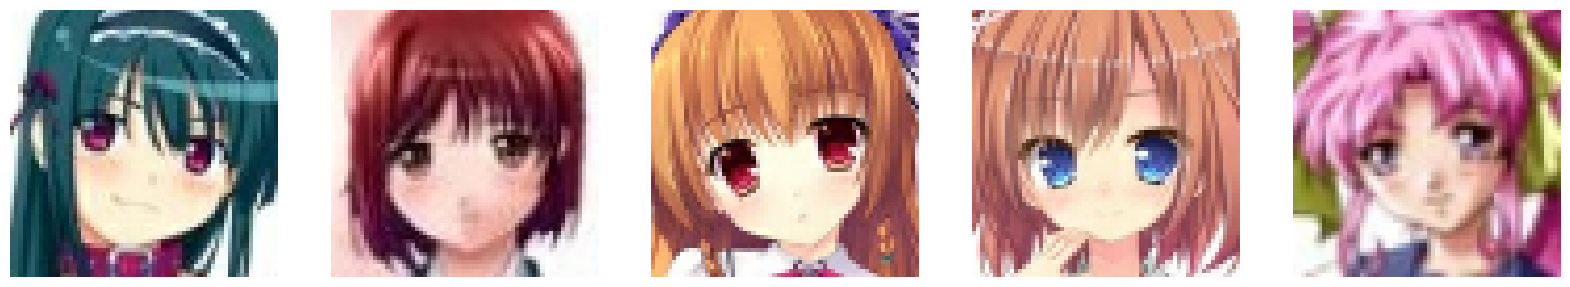

generated images


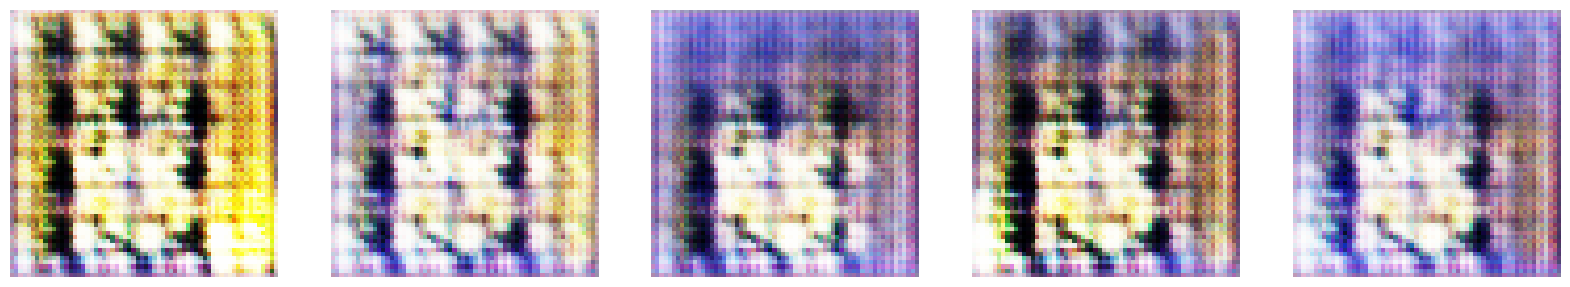

Time for epoch 7 is 63.53842258453369 sec


epoch 8:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 8, iteration 1


epoch 8:   1%|          | 1/157 [00:00<01:57,  1.32it/s]

epoch 8, iteration 2


epoch 8:   1%|▏         | 2/157 [00:01<01:30,  1.72it/s]

epoch 8, iteration 3


epoch 8:   2%|▏         | 3/157 [00:01<01:15,  2.04it/s]

epoch 8, iteration 4


epoch 8:   3%|▎         | 4/157 [00:01<01:07,  2.28it/s]

epoch 8, iteration 5


epoch 8:   3%|▎         | 5/157 [00:02<01:02,  2.44it/s]

epoch 8, iteration 6


epoch 8:   4%|▍         | 6/157 [00:02<00:59,  2.55it/s]

epoch 8, iteration 7


epoch 8:   4%|▍         | 7/157 [00:03<00:56,  2.66it/s]

epoch 8, iteration 8


epoch 8:   5%|▌         | 8/157 [00:03<00:55,  2.69it/s]

epoch 8, iteration 9


epoch 8:   6%|▌         | 9/157 [00:03<00:54,  2.71it/s]

epoch 8, iteration 10


epoch 8:   6%|▋         | 10/157 [00:04<00:53,  2.73it/s]

epoch 8, iteration 11


epoch 8:   7%|▋         | 11/157 [00:04<00:53,  2.71it/s]

epoch 8, iteration 12


epoch 8:   8%|▊         | 12/157 [00:04<00:52,  2.75it/s]

epoch 8, iteration 13


epoch 8:   8%|▊         | 13/157 [00:05<00:52,  2.76it/s]

epoch 8, iteration 14


epoch 8:   9%|▉         | 14/157 [00:05<00:51,  2.75it/s]

epoch 8, iteration 15


epoch 8:  10%|▉         | 15/157 [00:05<00:51,  2.77it/s]

epoch 8, iteration 16


epoch 8:  10%|█         | 16/157 [00:06<00:50,  2.80it/s]

epoch 8, iteration 17


epoch 8:  11%|█         | 17/157 [00:06<00:50,  2.79it/s]

epoch 8, iteration 18


epoch 8:  11%|█▏        | 18/157 [00:06<00:49,  2.82it/s]

epoch 8, iteration 19


epoch 8:  12%|█▏        | 19/157 [00:07<00:49,  2.81it/s]

epoch 8, iteration 20


epoch 8:  13%|█▎        | 20/157 [00:07<00:48,  2.80it/s]

epoch 8, iteration 21


epoch 8:  13%|█▎        | 21/157 [00:08<00:49,  2.77it/s]

epoch 8, iteration 22


epoch 8:  14%|█▍        | 22/157 [00:08<00:48,  2.77it/s]

epoch 8, iteration 23


epoch 8:  15%|█▍        | 23/157 [00:08<00:48,  2.77it/s]

epoch 8, iteration 24


epoch 8:  15%|█▌        | 24/157 [00:09<00:48,  2.76it/s]

epoch 8, iteration 25


epoch 8:  16%|█▌        | 25/157 [00:09<00:47,  2.78it/s]

epoch 8, iteration 26


epoch 8:  17%|█▋        | 26/157 [00:09<00:46,  2.79it/s]

epoch 8, iteration 27


epoch 8:  17%|█▋        | 27/157 [00:10<00:46,  2.79it/s]

epoch 8, iteration 28


epoch 8:  18%|█▊        | 28/157 [00:10<00:46,  2.80it/s]

epoch 8, iteration 29


epoch 8:  18%|█▊        | 29/157 [00:10<00:46,  2.73it/s]

epoch 8, iteration 30


epoch 8:  19%|█▉        | 30/157 [00:11<00:49,  2.56it/s]

epoch 8, iteration 31


epoch 8:  20%|█▉        | 31/157 [00:11<00:50,  2.49it/s]

epoch 8, iteration 32


epoch 8:  20%|██        | 32/157 [00:12<00:50,  2.46it/s]

epoch 8, iteration 33


epoch 8:  21%|██        | 33/157 [00:12<00:52,  2.37it/s]

epoch 8, iteration 34


epoch 8:  22%|██▏       | 34/157 [00:13<00:53,  2.31it/s]

epoch 8, iteration 35


epoch 8:  22%|██▏       | 35/157 [00:13<00:53,  2.26it/s]

epoch 8, iteration 36


epoch 8:  23%|██▎       | 36/157 [00:14<00:53,  2.27it/s]

epoch 8, iteration 37


epoch 8:  24%|██▎       | 37/157 [00:14<00:49,  2.41it/s]

epoch 8, iteration 38


epoch 8:  24%|██▍       | 38/157 [00:14<00:47,  2.51it/s]

epoch 8, iteration 39


epoch 8:  25%|██▍       | 39/157 [00:15<00:46,  2.56it/s]

epoch 8, iteration 40


epoch 8:  25%|██▌       | 40/157 [00:15<00:44,  2.63it/s]

epoch 8, iteration 41


epoch 8:  26%|██▌       | 41/157 [00:15<00:43,  2.67it/s]

epoch 8, iteration 42


epoch 8:  27%|██▋       | 42/157 [00:16<00:42,  2.70it/s]

epoch 8, iteration 43


epoch 8:  27%|██▋       | 43/157 [00:16<00:42,  2.69it/s]

epoch 8, iteration 44


epoch 8:  28%|██▊       | 44/157 [00:16<00:41,  2.70it/s]

epoch 8, iteration 45


epoch 8:  29%|██▊       | 45/157 [00:17<00:40,  2.75it/s]

epoch 8, iteration 46


epoch 8:  29%|██▉       | 46/157 [00:17<00:39,  2.78it/s]

epoch 8, iteration 47


epoch 8:  30%|██▉       | 47/157 [00:18<00:39,  2.76it/s]

epoch 8, iteration 48


epoch 8:  31%|███       | 48/157 [00:18<00:39,  2.77it/s]

epoch 8, iteration 49


epoch 8:  31%|███       | 49/157 [00:18<00:38,  2.77it/s]

epoch 8, iteration 50


epoch 8:  32%|███▏      | 50/157 [00:19<00:38,  2.78it/s]

epoch 8, iteration 51


epoch 8:  32%|███▏      | 51/157 [00:19<00:38,  2.76it/s]

epoch 8, iteration 52


epoch 8:  33%|███▎      | 52/157 [00:19<00:37,  2.79it/s]

epoch 8, iteration 53


epoch 8:  34%|███▍      | 53/157 [00:20<00:36,  2.82it/s]

epoch 8, iteration 54


epoch 8:  34%|███▍      | 54/157 [00:20<00:36,  2.80it/s]

epoch 8, iteration 55


epoch 8:  35%|███▌      | 55/157 [00:20<00:36,  2.78it/s]

epoch 8, iteration 56


epoch 8:  36%|███▌      | 56/157 [00:21<00:36,  2.77it/s]

epoch 8, iteration 57


epoch 8:  36%|███▋      | 57/157 [00:21<00:35,  2.80it/s]

epoch 8, iteration 58


epoch 8:  37%|███▋      | 58/157 [00:21<00:35,  2.79it/s]

epoch 8, iteration 59


epoch 8:  38%|███▊      | 59/157 [00:22<00:35,  2.78it/s]

epoch 8, iteration 60


epoch 8:  38%|███▊      | 60/157 [00:22<00:34,  2.79it/s]

epoch 8, iteration 61


epoch 8:  39%|███▉      | 61/157 [00:23<00:34,  2.79it/s]

epoch 8, iteration 62


epoch 8:  39%|███▉      | 62/157 [00:23<00:34,  2.77it/s]

epoch 8, iteration 63


epoch 8:  40%|████      | 63/157 [00:23<00:33,  2.78it/s]

epoch 8, iteration 64


epoch 8:  41%|████      | 64/157 [00:24<00:34,  2.68it/s]

epoch 8, iteration 65


epoch 8:  41%|████▏     | 65/157 [00:24<00:36,  2.52it/s]

epoch 8, iteration 66


epoch 8:  42%|████▏     | 66/157 [00:25<00:36,  2.47it/s]

epoch 8, iteration 67


epoch 8:  43%|████▎     | 67/157 [00:25<00:37,  2.38it/s]

epoch 8, iteration 68


epoch 8:  43%|████▎     | 68/157 [00:25<00:38,  2.32it/s]

epoch 8, iteration 69


epoch 8:  44%|████▍     | 69/157 [00:26<00:40,  2.15it/s]

epoch 8, iteration 70


epoch 8:  45%|████▍     | 70/157 [00:26<00:39,  2.22it/s]

epoch 8, iteration 71


epoch 8:  45%|████▌     | 71/157 [00:27<00:36,  2.35it/s]

epoch 8, iteration 72


epoch 8:  46%|████▌     | 72/157 [00:27<00:34,  2.46it/s]

epoch 8, iteration 73


epoch 8:  46%|████▋     | 73/157 [00:28<00:32,  2.57it/s]

epoch 8, iteration 74


epoch 8:  47%|████▋     | 74/157 [00:28<00:31,  2.61it/s]

epoch 8, iteration 75


epoch 8:  48%|████▊     | 75/157 [00:28<00:30,  2.66it/s]

epoch 8, iteration 76


epoch 8:  48%|████▊     | 76/157 [00:29<00:29,  2.71it/s]

epoch 8, iteration 77


epoch 8:  49%|████▉     | 77/157 [00:29<00:29,  2.74it/s]

epoch 8, iteration 78


epoch 8:  50%|████▉     | 78/157 [00:29<00:28,  2.75it/s]

epoch 8, iteration 79


epoch 8:  50%|█████     | 79/157 [00:30<00:28,  2.77it/s]

epoch 8, iteration 80


epoch 8:  51%|█████     | 80/157 [00:30<00:28,  2.72it/s]

epoch 8, iteration 81


epoch 8:  52%|█████▏    | 81/157 [00:30<00:27,  2.72it/s]

epoch 8, iteration 82


epoch 8:  52%|█████▏    | 82/157 [00:31<00:27,  2.73it/s]

epoch 8, iteration 83


epoch 8:  53%|█████▎    | 83/157 [00:31<00:27,  2.72it/s]

epoch 8, iteration 84


epoch 8:  54%|█████▎    | 84/157 [00:32<00:26,  2.73it/s]

epoch 8, iteration 85


epoch 8:  54%|█████▍    | 85/157 [00:32<00:26,  2.77it/s]

epoch 8, iteration 86


epoch 8:  55%|█████▍    | 86/157 [00:32<00:25,  2.78it/s]

epoch 8, iteration 87


epoch 8:  55%|█████▌    | 87/157 [00:33<00:24,  2.81it/s]

epoch 8, iteration 88


epoch 8:  56%|█████▌    | 88/157 [00:33<00:24,  2.82it/s]

epoch 8, iteration 89


epoch 8:  57%|█████▋    | 89/157 [00:33<00:24,  2.79it/s]

epoch 8, iteration 90


epoch 8:  57%|█████▋    | 90/157 [00:34<00:23,  2.82it/s]

epoch 8, iteration 91


epoch 8:  58%|█████▊    | 91/157 [00:34<00:23,  2.84it/s]

epoch 8, iteration 92


epoch 8:  59%|█████▊    | 92/157 [00:34<00:23,  2.82it/s]

epoch 8, iteration 93


epoch 8:  59%|█████▉    | 93/157 [00:35<00:22,  2.82it/s]

epoch 8, iteration 94


epoch 8:  60%|█████▉    | 94/157 [00:35<00:22,  2.79it/s]

epoch 8, iteration 95


epoch 8:  61%|██████    | 95/157 [00:35<00:22,  2.82it/s]

epoch 8, iteration 96


epoch 8:  61%|██████    | 96/157 [00:36<00:21,  2.83it/s]

epoch 8, iteration 97


epoch 8:  62%|██████▏   | 97/157 [00:36<00:21,  2.79it/s]

epoch 8, iteration 98


epoch 8:  62%|██████▏   | 98/157 [00:37<00:22,  2.64it/s]

epoch 8, iteration 99


epoch 8:  63%|██████▎   | 99/157 [00:37<00:22,  2.54it/s]

epoch 8, iteration 100


epoch 8:  64%|██████▎   | 100/157 [00:37<00:22,  2.48it/s]

epoch 8, iteration 101


epoch 8:  64%|██████▍   | 101/157 [00:38<00:23,  2.42it/s]

epoch 8, iteration 102


epoch 8:  65%|██████▍   | 102/157 [00:38<00:23,  2.33it/s]

epoch 8, iteration 103


epoch 8:  66%|██████▌   | 103/157 [00:39<00:23,  2.31it/s]

epoch 8, iteration 104


epoch 8:  66%|██████▌   | 104/157 [00:39<00:23,  2.27it/s]

epoch 8, iteration 105


epoch 8:  67%|██████▋   | 105/157 [00:40<00:21,  2.41it/s]

epoch 8, iteration 106


epoch 8:  68%|██████▊   | 106/157 [00:40<00:20,  2.52it/s]

epoch 8, iteration 107


epoch 8:  68%|██████▊   | 107/157 [00:40<00:19,  2.57it/s]

epoch 8, iteration 108


epoch 8:  69%|██████▉   | 108/157 [00:41<00:18,  2.63it/s]

epoch 8, iteration 109


epoch 8:  69%|██████▉   | 109/157 [00:41<00:17,  2.69it/s]

epoch 8, iteration 110


epoch 8:  70%|███████   | 110/157 [00:41<00:17,  2.73it/s]

epoch 8, iteration 111


epoch 8:  71%|███████   | 111/157 [00:42<00:16,  2.75it/s]

epoch 8, iteration 112


epoch 8:  71%|███████▏  | 112/157 [00:42<00:16,  2.74it/s]

epoch 8, iteration 113


epoch 8:  72%|███████▏  | 113/157 [00:42<00:15,  2.75it/s]

epoch 8, iteration 114


epoch 8:  73%|███████▎  | 114/157 [00:43<00:15,  2.78it/s]

epoch 8, iteration 115


epoch 8:  73%|███████▎  | 115/157 [00:43<00:15,  2.78it/s]

epoch 8, iteration 116


epoch 8:  74%|███████▍  | 116/157 [00:44<00:14,  2.77it/s]

epoch 8, iteration 117


epoch 8:  75%|███████▍  | 117/157 [00:44<00:14,  2.77it/s]

epoch 8, iteration 118


epoch 8:  75%|███████▌  | 118/157 [00:44<00:13,  2.79it/s]

epoch 8, iteration 119


epoch 8:  76%|███████▌  | 119/157 [00:45<00:13,  2.79it/s]

epoch 8, iteration 120


epoch 8:  76%|███████▋  | 120/157 [00:45<00:13,  2.84it/s]

epoch 8, iteration 121


epoch 8:  77%|███████▋  | 121/157 [00:45<00:12,  2.84it/s]

epoch 8, iteration 122


epoch 8:  78%|███████▊  | 122/157 [00:46<00:12,  2.83it/s]

epoch 8, iteration 123


epoch 8:  78%|███████▊  | 123/157 [00:46<00:12,  2.82it/s]

epoch 8, iteration 124


epoch 8:  79%|███████▉  | 124/157 [00:46<00:11,  2.78it/s]

epoch 8, iteration 125


epoch 8:  80%|███████▉  | 125/157 [00:47<00:11,  2.78it/s]

epoch 8, iteration 126


epoch 8:  80%|████████  | 126/157 [00:47<00:11,  2.78it/s]

epoch 8, iteration 127


epoch 8:  81%|████████  | 127/157 [00:47<00:10,  2.77it/s]

epoch 8, iteration 128


epoch 8:  82%|████████▏ | 128/157 [00:48<00:10,  2.77it/s]

epoch 8, iteration 129


epoch 8:  82%|████████▏ | 129/157 [00:48<00:10,  2.77it/s]

epoch 8, iteration 130


epoch 8:  83%|████████▎ | 130/157 [00:49<00:09,  2.73it/s]

epoch 8, iteration 131


epoch 8:  83%|████████▎ | 131/157 [00:49<00:09,  2.76it/s]

epoch 8, iteration 132


epoch 8:  84%|████████▍ | 132/157 [00:49<00:09,  2.65it/s]

epoch 8, iteration 133


epoch 8:  85%|████████▍ | 133/157 [00:50<00:09,  2.53it/s]

epoch 8, iteration 134


epoch 8:  85%|████████▌ | 134/157 [00:50<00:09,  2.47it/s]

epoch 8, iteration 135


epoch 8:  86%|████████▌ | 135/157 [00:51<00:09,  2.38it/s]

epoch 8, iteration 136


epoch 8:  87%|████████▋ | 136/157 [00:51<00:08,  2.34it/s]

epoch 8, iteration 137


epoch 8:  87%|████████▋ | 137/157 [00:52<00:08,  2.28it/s]

epoch 8, iteration 138


epoch 8:  88%|████████▊ | 138/157 [00:52<00:08,  2.27it/s]

epoch 8, iteration 139


epoch 8:  89%|████████▊ | 139/157 [00:52<00:07,  2.41it/s]

epoch 8, iteration 140


epoch 8:  89%|████████▉ | 140/157 [00:53<00:06,  2.48it/s]

epoch 8, iteration 141


epoch 8:  90%|████████▉ | 141/157 [00:53<00:06,  2.57it/s]

epoch 8, iteration 142


epoch 8:  90%|█████████ | 142/157 [00:53<00:05,  2.65it/s]

epoch 8, iteration 143


epoch 8:  91%|█████████ | 143/157 [00:54<00:05,  2.72it/s]

epoch 8, iteration 144


epoch 8:  92%|█████████▏| 144/157 [00:54<00:04,  2.75it/s]

epoch 8, iteration 145


epoch 8:  92%|█████████▏| 145/157 [00:54<00:04,  2.77it/s]

epoch 8, iteration 146


epoch 8:  93%|█████████▎| 146/157 [00:55<00:03,  2.76it/s]

epoch 8, iteration 147


epoch 8:  94%|█████████▎| 147/157 [00:55<00:03,  2.79it/s]

epoch 8, iteration 148


epoch 8:  94%|█████████▍| 148/157 [00:56<00:03,  2.81it/s]

epoch 8, iteration 149


epoch 8:  95%|█████████▍| 149/157 [00:56<00:02,  2.79it/s]

epoch 8, iteration 150


epoch 8:  96%|█████████▌| 150/157 [00:56<00:02,  2.77it/s]

epoch 8, iteration 151


epoch 8:  96%|█████████▌| 151/157 [00:57<00:02,  2.80it/s]

epoch 8, iteration 152


epoch 8:  97%|█████████▋| 152/157 [00:57<00:01,  2.84it/s]

epoch 8, iteration 153


epoch 8:  97%|█████████▋| 153/157 [00:57<00:01,  2.86it/s]

epoch 8, iteration 154


epoch 8:  98%|█████████▊| 154/157 [00:58<00:01,  2.90it/s]

epoch 8, iteration 155


epoch 8:  99%|█████████▊| 155/157 [00:58<00:00,  2.95it/s]

epoch 8, iteration 156


epoch 8:  99%|█████████▉| 156/157 [00:58<00:00,  2.95it/s]

epoch 8, iteration 157


epoch 8: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


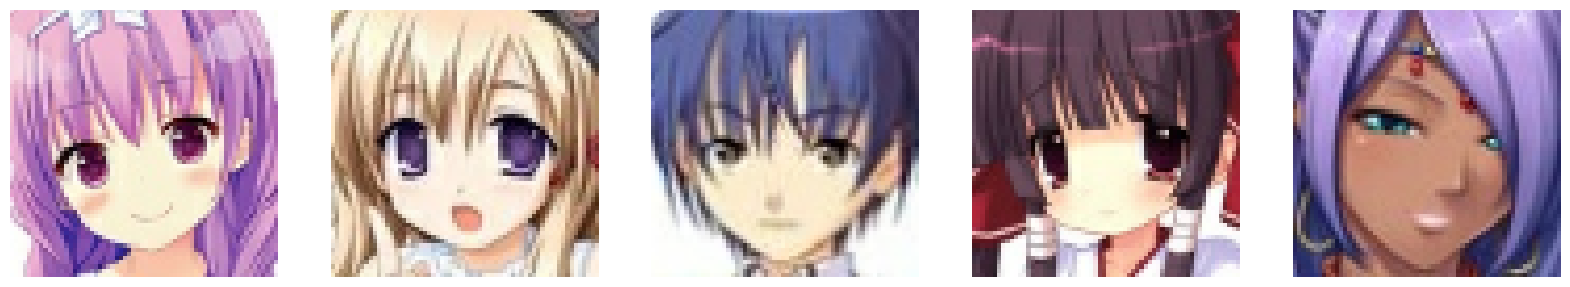

generated images


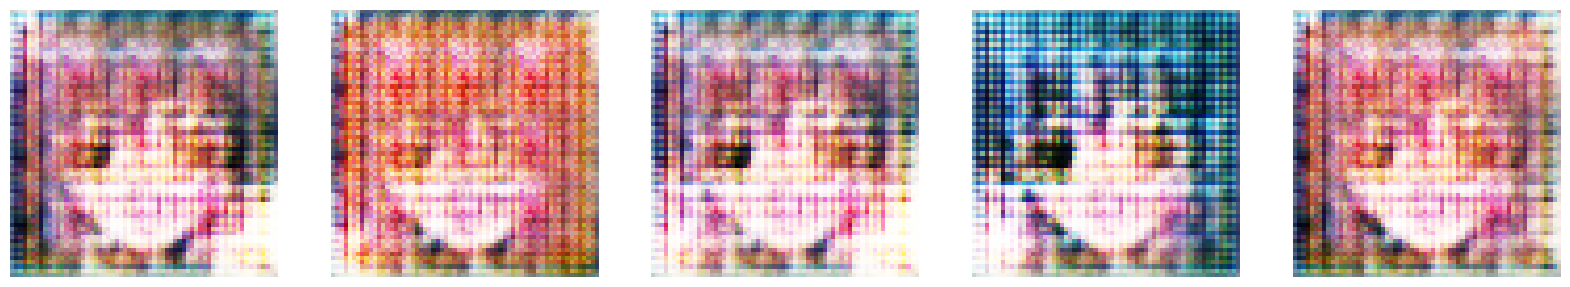

Time for epoch 8 is 85.31469511985779 sec


epoch 9:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 9, iteration 1


epoch 9:   1%|          | 1/157 [00:00<01:46,  1.47it/s]

epoch 9, iteration 2


epoch 9:   1%|▏         | 2/157 [00:01<01:24,  1.83it/s]

epoch 9, iteration 3


epoch 9:   2%|▏         | 3/157 [00:01<01:17,  1.99it/s]

epoch 9, iteration 4


epoch 9:   3%|▎         | 4/157 [00:02<01:34,  1.62it/s]

epoch 9, iteration 5


epoch 9:   3%|▎         | 5/157 [00:02<01:27,  1.75it/s]

epoch 9, iteration 6


epoch 9:   4%|▍         | 6/157 [00:03<01:16,  1.98it/s]

epoch 9, iteration 7


epoch 9:   4%|▍         | 7/157 [00:03<01:08,  2.18it/s]

epoch 9, iteration 8


epoch 9:   5%|▌         | 8/157 [00:03<01:03,  2.35it/s]

epoch 9, iteration 9


epoch 9:   6%|▌         | 9/157 [00:04<00:59,  2.49it/s]

epoch 9, iteration 10


epoch 9:   6%|▋         | 10/157 [00:04<00:56,  2.59it/s]

epoch 9, iteration 11


epoch 9:   7%|▋         | 11/157 [00:05<00:54,  2.66it/s]

epoch 9, iteration 12


epoch 9:   8%|▊         | 12/157 [00:05<00:54,  2.67it/s]

epoch 9, iteration 13


epoch 9:   8%|▊         | 13/157 [00:05<00:52,  2.73it/s]

epoch 9, iteration 14


epoch 9:   9%|▉         | 14/157 [00:06<00:51,  2.77it/s]

epoch 9, iteration 15


epoch 9:  10%|▉         | 15/157 [00:06<00:50,  2.80it/s]

epoch 9, iteration 16


epoch 9:  10%|█         | 16/157 [00:06<00:49,  2.83it/s]

epoch 9, iteration 17


epoch 9:  11%|█         | 17/157 [00:07<00:50,  2.76it/s]

epoch 9, iteration 18


epoch 9:  11%|█▏        | 18/157 [00:07<00:49,  2.79it/s]

epoch 9, iteration 19


epoch 9:  12%|█▏        | 19/157 [00:07<00:49,  2.77it/s]

epoch 9, iteration 20


epoch 9:  13%|█▎        | 20/157 [00:08<00:48,  2.80it/s]

epoch 9, iteration 21


epoch 9:  13%|█▎        | 21/157 [00:08<00:48,  2.81it/s]

epoch 9, iteration 22


epoch 9:  14%|█▍        | 22/157 [00:08<00:48,  2.81it/s]

epoch 9, iteration 23


epoch 9:  15%|█▍        | 23/157 [00:09<00:47,  2.82it/s]

epoch 9, iteration 24


epoch 9:  15%|█▌        | 24/157 [00:09<00:47,  2.80it/s]

epoch 9, iteration 25


epoch 9:  16%|█▌        | 25/157 [00:10<00:47,  2.80it/s]

epoch 9, iteration 26


epoch 9:  17%|█▋        | 26/157 [00:10<00:46,  2.82it/s]

epoch 9, iteration 27


epoch 9:  17%|█▋        | 27/157 [00:10<00:46,  2.82it/s]

epoch 9, iteration 28


epoch 9:  18%|█▊        | 28/157 [00:11<00:45,  2.82it/s]

epoch 9, iteration 29


epoch 9:  18%|█▊        | 29/157 [00:11<00:45,  2.82it/s]

epoch 9, iteration 30


epoch 9:  19%|█▉        | 30/157 [00:11<00:45,  2.79it/s]

epoch 9, iteration 31


epoch 9:  20%|█▉        | 31/157 [00:12<00:45,  2.79it/s]

epoch 9, iteration 32


epoch 9:  20%|██        | 32/157 [00:12<00:44,  2.83it/s]

epoch 9, iteration 33


epoch 9:  21%|██        | 33/157 [00:12<00:44,  2.79it/s]

epoch 9, iteration 34


epoch 9:  22%|██▏       | 34/157 [00:13<00:46,  2.63it/s]

epoch 9, iteration 35


epoch 9:  22%|██▏       | 35/157 [00:13<00:47,  2.55it/s]

epoch 9, iteration 36


epoch 9:  23%|██▎       | 36/157 [00:14<00:48,  2.51it/s]

epoch 9, iteration 37


epoch 9:  24%|██▎       | 37/157 [00:14<00:49,  2.41it/s]

epoch 9, iteration 38


epoch 9:  24%|██▍       | 38/157 [00:15<00:50,  2.35it/s]

epoch 9, iteration 39


epoch 9:  25%|██▍       | 39/157 [00:15<00:51,  2.30it/s]

epoch 9, iteration 40


epoch 9:  25%|██▌       | 40/157 [00:15<00:50,  2.32it/s]

epoch 9, iteration 41


epoch 9:  26%|██▌       | 41/157 [00:16<00:47,  2.43it/s]

epoch 9, iteration 42


epoch 9:  27%|██▋       | 42/157 [00:16<00:45,  2.55it/s]

epoch 9, iteration 43


epoch 9:  27%|██▋       | 43/157 [00:16<00:44,  2.59it/s]

epoch 9, iteration 44


epoch 9:  28%|██▊       | 44/157 [00:17<00:43,  2.62it/s]

epoch 9, iteration 45


epoch 9:  29%|██▊       | 45/157 [00:17<00:41,  2.68it/s]

epoch 9, iteration 46


epoch 9:  29%|██▉       | 46/157 [00:18<00:41,  2.69it/s]

epoch 9, iteration 47


epoch 9:  30%|██▉       | 47/157 [00:18<00:40,  2.71it/s]

epoch 9, iteration 48


epoch 9:  31%|███       | 48/157 [00:18<00:39,  2.73it/s]

epoch 9, iteration 49


epoch 9:  31%|███       | 49/157 [00:19<00:39,  2.76it/s]

epoch 9, iteration 50


epoch 9:  32%|███▏      | 50/157 [00:19<00:38,  2.82it/s]

epoch 9, iteration 51


epoch 9:  32%|███▏      | 51/157 [00:19<00:38,  2.78it/s]

epoch 9, iteration 52


epoch 9:  33%|███▎      | 52/157 [00:20<00:37,  2.79it/s]

epoch 9, iteration 53


epoch 9:  34%|███▍      | 53/157 [00:20<00:37,  2.79it/s]

epoch 9, iteration 54


epoch 9:  34%|███▍      | 54/157 [00:20<00:36,  2.80it/s]

epoch 9, iteration 55


epoch 9:  35%|███▌      | 55/157 [00:21<00:36,  2.79it/s]

epoch 9, iteration 56


epoch 9:  36%|███▌      | 56/157 [00:21<00:36,  2.77it/s]

epoch 9, iteration 57


epoch 9:  36%|███▋      | 57/157 [00:22<00:36,  2.78it/s]

epoch 9, iteration 58


epoch 9:  37%|███▋      | 58/157 [00:22<00:35,  2.77it/s]

epoch 9, iteration 59


epoch 9:  38%|███▊      | 59/157 [00:22<00:35,  2.76it/s]

epoch 9, iteration 60


epoch 9:  38%|███▊      | 60/157 [00:23<00:35,  2.76it/s]

epoch 9, iteration 61


epoch 9:  39%|███▉      | 61/157 [00:23<00:35,  2.73it/s]

epoch 9, iteration 62


epoch 9:  39%|███▉      | 62/157 [00:23<00:34,  2.76it/s]

epoch 9, iteration 63


epoch 9:  40%|████      | 63/157 [00:24<00:34,  2.76it/s]

epoch 9, iteration 64


epoch 9:  41%|████      | 64/157 [00:24<00:33,  2.78it/s]

epoch 9, iteration 65


epoch 9:  41%|████▏     | 65/157 [00:24<00:33,  2.77it/s]

epoch 9, iteration 66


epoch 9:  42%|████▏     | 66/157 [00:25<00:32,  2.77it/s]

epoch 9, iteration 67


epoch 9:  43%|████▎     | 67/157 [00:25<00:32,  2.76it/s]

epoch 9, iteration 68


epoch 9:  43%|████▎     | 68/157 [00:26<00:33,  2.67it/s]

epoch 9, iteration 69


epoch 9:  44%|████▍     | 69/157 [00:26<00:34,  2.57it/s]

epoch 9, iteration 70


epoch 9:  45%|████▍     | 70/157 [00:26<00:34,  2.49it/s]

epoch 9, iteration 71


epoch 9:  45%|████▌     | 71/157 [00:27<00:35,  2.39it/s]

epoch 9, iteration 72


epoch 9:  46%|████▌     | 72/157 [00:27<00:36,  2.34it/s]

epoch 9, iteration 73


epoch 9:  46%|████▋     | 73/157 [00:28<00:36,  2.28it/s]

epoch 9, iteration 74


epoch 9:  47%|████▋     | 74/157 [00:28<00:35,  2.33it/s]

epoch 9, iteration 75


epoch 9:  48%|████▊     | 75/157 [00:29<00:33,  2.43it/s]

epoch 9, iteration 76


epoch 9:  48%|████▊     | 76/157 [00:29<00:32,  2.50it/s]

epoch 9, iteration 77


epoch 9:  49%|████▉     | 77/157 [00:29<00:30,  2.59it/s]

epoch 9, iteration 78


epoch 9:  50%|████▉     | 78/157 [00:30<00:29,  2.65it/s]

epoch 9, iteration 79


epoch 9:  50%|█████     | 79/157 [00:30<00:29,  2.69it/s]

epoch 9, iteration 80


epoch 9:  51%|█████     | 80/157 [00:30<00:28,  2.70it/s]

epoch 9, iteration 81


epoch 9:  52%|█████▏    | 81/157 [00:31<00:28,  2.70it/s]

epoch 9, iteration 82


epoch 9:  52%|█████▏    | 82/157 [00:31<00:27,  2.73it/s]

epoch 9, iteration 83


epoch 9:  53%|█████▎    | 83/157 [00:31<00:27,  2.72it/s]

epoch 9, iteration 84


epoch 9:  54%|█████▎    | 84/157 [00:32<00:26,  2.72it/s]

epoch 9, iteration 85


epoch 9:  54%|█████▍    | 85/157 [00:32<00:26,  2.75it/s]

epoch 9, iteration 86


epoch 9:  55%|█████▍    | 86/157 [00:33<00:25,  2.77it/s]

epoch 9, iteration 87


epoch 9:  55%|█████▌    | 87/157 [00:33<00:25,  2.77it/s]

epoch 9, iteration 88


epoch 9:  56%|█████▌    | 88/157 [00:33<00:24,  2.77it/s]

epoch 9, iteration 89


epoch 9:  57%|█████▋    | 89/157 [00:34<00:24,  2.77it/s]

epoch 9, iteration 90


epoch 9:  57%|█████▋    | 90/157 [00:34<00:23,  2.80it/s]

epoch 9, iteration 91


epoch 9:  58%|█████▊    | 91/157 [00:34<00:23,  2.77it/s]

epoch 9, iteration 92


epoch 9:  59%|█████▊    | 92/157 [00:35<00:23,  2.77it/s]

epoch 9, iteration 93


epoch 9:  59%|█████▉    | 93/157 [00:35<00:23,  2.75it/s]

epoch 9, iteration 94


epoch 9:  60%|█████▉    | 94/157 [00:35<00:22,  2.78it/s]

epoch 9, iteration 95


epoch 9:  61%|██████    | 95/157 [00:36<00:22,  2.75it/s]

epoch 9, iteration 96


epoch 9:  61%|██████    | 96/157 [00:36<00:22,  2.74it/s]

epoch 9, iteration 97


epoch 9:  62%|██████▏   | 97/157 [00:37<00:21,  2.77it/s]

epoch 9, iteration 98


epoch 9:  62%|██████▏   | 98/157 [00:37<00:21,  2.77it/s]

epoch 9, iteration 99


epoch 9:  63%|██████▎   | 99/157 [00:37<00:20,  2.78it/s]

epoch 9, iteration 100


epoch 9:  64%|██████▎   | 100/157 [00:38<00:20,  2.78it/s]

epoch 9, iteration 101


epoch 9:  64%|██████▍   | 101/157 [00:38<00:20,  2.80it/s]

epoch 9, iteration 102


epoch 9:  65%|██████▍   | 102/157 [00:38<00:20,  2.63it/s]

epoch 9, iteration 103


epoch 9:  66%|██████▌   | 103/157 [00:39<00:21,  2.54it/s]

epoch 9, iteration 104


epoch 9:  66%|██████▌   | 104/157 [00:39<00:21,  2.48it/s]

epoch 9, iteration 105


epoch 9:  67%|██████▋   | 105/157 [00:40<00:21,  2.43it/s]

epoch 9, iteration 106


epoch 9:  68%|██████▊   | 106/157 [00:40<00:21,  2.34it/s]

epoch 9, iteration 107


epoch 9:  68%|██████▊   | 107/157 [00:41<00:22,  2.24it/s]

epoch 9, iteration 108


epoch 9:  69%|██████▉   | 108/157 [00:41<00:20,  2.36it/s]

epoch 9, iteration 109


epoch 9:  69%|██████▉   | 109/157 [00:41<00:19,  2.46it/s]

epoch 9, iteration 110


epoch 9:  70%|███████   | 110/157 [00:42<00:18,  2.58it/s]

epoch 9, iteration 111


epoch 9:  71%|███████   | 111/157 [00:42<00:17,  2.66it/s]

epoch 9, iteration 112


epoch 9:  71%|███████▏  | 112/157 [00:42<00:16,  2.65it/s]

epoch 9, iteration 113


epoch 9:  72%|███████▏  | 113/157 [00:43<00:16,  2.69it/s]

epoch 9, iteration 114


epoch 9:  73%|███████▎  | 114/157 [00:43<00:15,  2.71it/s]

epoch 9, iteration 115


epoch 9:  73%|███████▎  | 115/157 [00:43<00:15,  2.75it/s]

epoch 9, iteration 116


epoch 9:  74%|███████▍  | 116/157 [00:44<00:14,  2.77it/s]

epoch 9, iteration 117


epoch 9:  75%|███████▍  | 117/157 [00:44<00:14,  2.76it/s]

epoch 9, iteration 118


epoch 9:  75%|███████▌  | 118/157 [00:45<00:14,  2.75it/s]

epoch 9, iteration 119


epoch 9:  76%|███████▌  | 119/157 [00:45<00:13,  2.77it/s]

epoch 9, iteration 120


epoch 9:  76%|███████▋  | 120/157 [00:45<00:13,  2.74it/s]

epoch 9, iteration 121


epoch 9:  77%|███████▋  | 121/157 [00:46<00:13,  2.75it/s]

epoch 9, iteration 122


epoch 9:  78%|███████▊  | 122/157 [00:46<00:12,  2.77it/s]

epoch 9, iteration 123


epoch 9:  78%|███████▊  | 123/157 [00:46<00:12,  2.78it/s]

epoch 9, iteration 124


epoch 9:  79%|███████▉  | 124/157 [00:47<00:11,  2.75it/s]

epoch 9, iteration 125


epoch 9:  80%|███████▉  | 125/157 [00:47<00:11,  2.78it/s]

epoch 9, iteration 126


epoch 9:  80%|████████  | 126/157 [00:47<00:11,  2.77it/s]

epoch 9, iteration 127


epoch 9:  81%|████████  | 127/157 [00:48<00:10,  2.76it/s]

epoch 9, iteration 128


epoch 9:  82%|████████▏ | 128/157 [00:48<00:10,  2.77it/s]

epoch 9, iteration 129


epoch 9:  82%|████████▏ | 129/157 [00:49<00:10,  2.75it/s]

epoch 9, iteration 130


epoch 9:  83%|████████▎ | 130/157 [00:49<00:09,  2.78it/s]

epoch 9, iteration 131


epoch 9:  83%|████████▎ | 131/157 [00:49<00:09,  2.80it/s]

epoch 9, iteration 132


epoch 9:  84%|████████▍ | 132/157 [00:50<00:08,  2.78it/s]

epoch 9, iteration 133


epoch 9:  85%|████████▍ | 133/157 [00:50<00:08,  2.81it/s]

epoch 9, iteration 134


epoch 9:  85%|████████▌ | 134/157 [00:50<00:08,  2.80it/s]

epoch 9, iteration 135


epoch 9:  86%|████████▌ | 135/157 [00:51<00:07,  2.81it/s]

epoch 9, iteration 136


epoch 9:  87%|████████▋ | 136/157 [00:51<00:08,  2.62it/s]

epoch 9, iteration 137


epoch 9:  87%|████████▋ | 137/157 [00:52<00:07,  2.51it/s]

epoch 9, iteration 138


epoch 9:  88%|████████▊ | 138/157 [00:52<00:07,  2.44it/s]

epoch 9, iteration 139


epoch 9:  89%|████████▊ | 139/157 [00:52<00:07,  2.37it/s]

epoch 9, iteration 140


epoch 9:  89%|████████▉ | 140/157 [00:53<00:07,  2.25it/s]

epoch 9, iteration 141


epoch 9:  90%|████████▉ | 141/157 [00:53<00:07,  2.23it/s]

epoch 9, iteration 142


epoch 9:  90%|█████████ | 142/157 [00:54<00:06,  2.38it/s]

epoch 9, iteration 143


epoch 9:  91%|█████████ | 143/157 [00:54<00:05,  2.52it/s]

epoch 9, iteration 144


epoch 9:  92%|█████████▏| 144/157 [00:54<00:04,  2.62it/s]

epoch 9, iteration 145


epoch 9:  92%|█████████▏| 145/157 [00:55<00:04,  2.66it/s]

epoch 9, iteration 146


epoch 9:  93%|█████████▎| 146/157 [00:55<00:04,  2.72it/s]

epoch 9, iteration 147


epoch 9:  94%|█████████▎| 147/157 [00:56<00:03,  2.76it/s]

epoch 9, iteration 148


epoch 9:  94%|█████████▍| 148/157 [00:56<00:03,  2.77it/s]

epoch 9, iteration 149


epoch 9:  95%|█████████▍| 149/157 [00:56<00:02,  2.79it/s]

epoch 9, iteration 150


epoch 9:  96%|█████████▌| 150/157 [00:57<00:02,  2.80it/s]

epoch 9, iteration 151


epoch 9:  96%|█████████▌| 151/157 [00:57<00:02,  2.85it/s]

epoch 9, iteration 152


epoch 9:  97%|█████████▋| 152/157 [00:57<00:01,  2.90it/s]

epoch 9, iteration 153


epoch 9:  97%|█████████▋| 153/157 [00:58<00:01,  2.91it/s]

epoch 9, iteration 154


epoch 9:  98%|█████████▊| 154/157 [00:58<00:01,  2.92it/s]

epoch 9, iteration 155


epoch 9:  99%|█████████▊| 155/157 [00:58<00:00,  2.96it/s]

epoch 9, iteration 156


epoch 9:  99%|█████████▉| 156/157 [00:59<00:00,  2.96it/s]

epoch 9, iteration 157


epoch 9: 100%|██████████| 157/157 [00:59<00:00,  2.64it/s]


orignal images


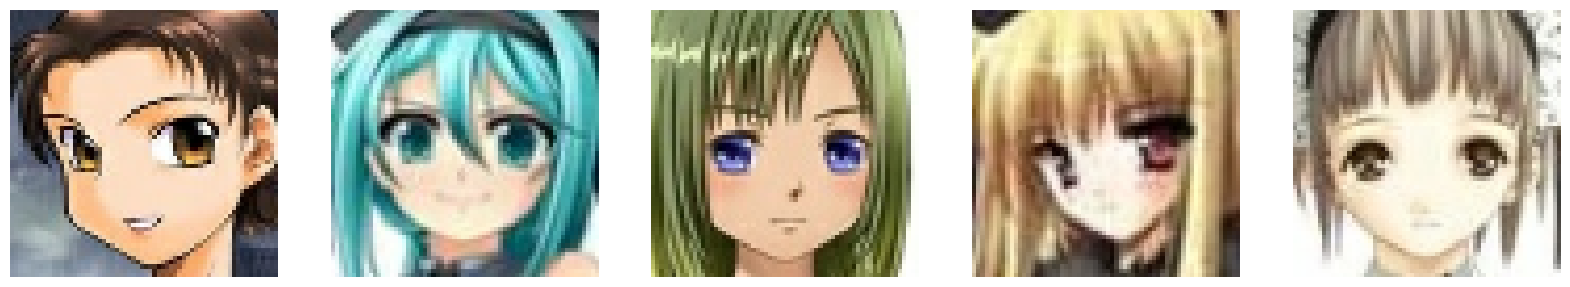

generated images


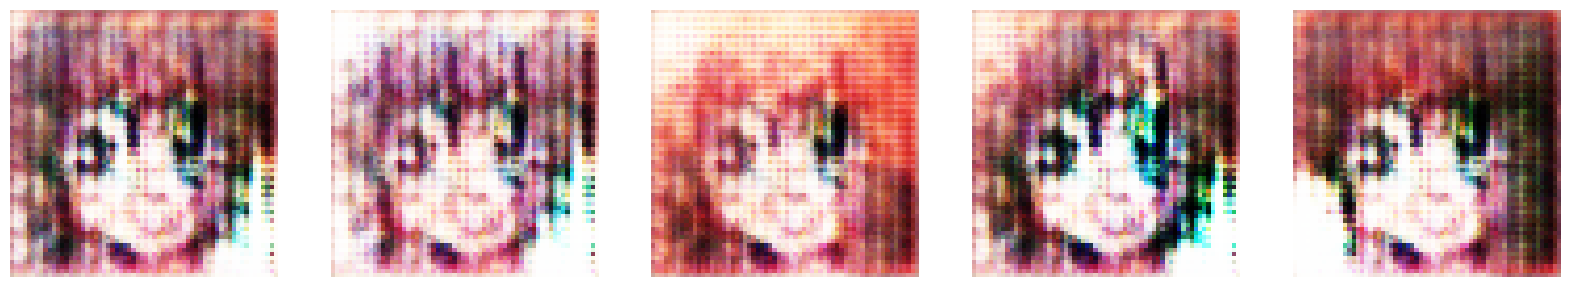

Time for epoch 9 is 62.79920244216919 sec


epoch 10:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 10, iteration 1


epoch 10:   1%|          | 1/157 [00:00<01:36,  1.62it/s]

epoch 10, iteration 2


epoch 10:   1%|▏         | 2/157 [00:00<01:11,  2.16it/s]

epoch 10, iteration 3


epoch 10:   2%|▏         | 3/157 [00:01<01:08,  2.26it/s]

epoch 10, iteration 4


epoch 10:   3%|▎         | 4/157 [00:01<01:06,  2.31it/s]

epoch 10, iteration 5


epoch 10:   3%|▎         | 5/157 [00:02<01:05,  2.32it/s]

epoch 10, iteration 6


epoch 10:   4%|▍         | 6/157 [00:02<01:07,  2.23it/s]

epoch 10, iteration 7


epoch 10:   4%|▍         | 7/157 [00:03<01:08,  2.18it/s]

epoch 10, iteration 8


epoch 10:   5%|▌         | 8/157 [00:03<01:08,  2.18it/s]

epoch 10, iteration 9


epoch 10:   6%|▌         | 9/157 [00:04<01:06,  2.23it/s]

epoch 10, iteration 10


epoch 10:   6%|▋         | 10/157 [00:04<01:02,  2.35it/s]

epoch 10, iteration 11


epoch 10:   7%|▋         | 11/157 [00:04<00:59,  2.44it/s]

epoch 10, iteration 12


epoch 10:   8%|▊         | 12/157 [00:05<00:58,  2.50it/s]

epoch 10, iteration 13


epoch 10:   8%|▊         | 13/157 [00:05<00:55,  2.58it/s]

epoch 10, iteration 14


epoch 10:   9%|▉         | 14/157 [00:05<00:53,  2.66it/s]

epoch 10, iteration 15


epoch 10:  10%|▉         | 15/157 [00:06<00:53,  2.68it/s]

epoch 10, iteration 16


epoch 10:  10%|█         | 16/157 [00:06<00:52,  2.69it/s]

epoch 10, iteration 17


epoch 10:  11%|█         | 17/157 [00:07<00:52,  2.68it/s]

epoch 10, iteration 18


epoch 10:  11%|█▏        | 18/157 [00:07<00:51,  2.71it/s]

epoch 10, iteration 19


epoch 10:  12%|█▏        | 19/157 [00:07<00:50,  2.75it/s]

epoch 10, iteration 20


epoch 10:  13%|█▎        | 20/157 [00:08<00:49,  2.75it/s]

epoch 10, iteration 21


epoch 10:  13%|█▎        | 21/157 [00:08<00:48,  2.79it/s]

epoch 10, iteration 22


epoch 10:  14%|█▍        | 22/157 [00:08<00:48,  2.78it/s]

epoch 10, iteration 23


epoch 10:  15%|█▍        | 23/157 [00:09<00:48,  2.77it/s]

epoch 10, iteration 24


epoch 10:  15%|█▌        | 24/157 [00:09<00:47,  2.78it/s]

epoch 10, iteration 25


epoch 10:  16%|█▌        | 25/157 [00:09<00:47,  2.79it/s]

epoch 10, iteration 26


epoch 10:  17%|█▋        | 26/157 [00:10<00:47,  2.78it/s]

epoch 10, iteration 27


epoch 10:  17%|█▋        | 27/157 [00:10<00:46,  2.80it/s]

epoch 10, iteration 28


epoch 10:  18%|█▊        | 28/157 [00:10<00:45,  2.82it/s]

epoch 10, iteration 29


epoch 10:  18%|█▊        | 29/157 [00:11<00:45,  2.81it/s]

epoch 10, iteration 30


epoch 10:  19%|█▉        | 30/157 [00:11<00:44,  2.83it/s]

epoch 10, iteration 31


epoch 10:  20%|█▉        | 31/157 [00:12<00:44,  2.82it/s]

epoch 10, iteration 32


epoch 10:  20%|██        | 32/157 [00:12<00:43,  2.85it/s]

epoch 10, iteration 33


epoch 10:  21%|██        | 33/157 [00:12<00:44,  2.81it/s]

epoch 10, iteration 34


epoch 10:  22%|██▏       | 34/157 [00:13<00:43,  2.81it/s]

epoch 10, iteration 35


epoch 10:  22%|██▏       | 35/157 [00:13<00:43,  2.78it/s]

epoch 10, iteration 36


epoch 10:  23%|██▎       | 36/157 [00:13<00:43,  2.79it/s]

epoch 10, iteration 37


epoch 10:  24%|██▎       | 37/157 [00:14<00:45,  2.63it/s]

epoch 10, iteration 38


epoch 10:  24%|██▍       | 38/157 [00:14<00:47,  2.51it/s]

epoch 10, iteration 39


epoch 10:  25%|██▍       | 39/157 [00:15<00:48,  2.45it/s]

epoch 10, iteration 40


epoch 10:  25%|██▌       | 40/157 [00:15<00:49,  2.37it/s]

epoch 10, iteration 41


epoch 10:  26%|██▌       | 41/157 [00:16<00:50,  2.31it/s]

epoch 10, iteration 42


epoch 10:  27%|██▋       | 42/157 [00:16<00:50,  2.26it/s]

epoch 10, iteration 43


epoch 10:  27%|██▋       | 43/157 [00:16<00:49,  2.30it/s]

epoch 10, iteration 44


epoch 10:  28%|██▊       | 44/157 [00:17<00:46,  2.44it/s]

epoch 10, iteration 45


epoch 10:  29%|██▊       | 45/157 [00:17<00:44,  2.53it/s]

epoch 10, iteration 46


epoch 10:  29%|██▉       | 46/157 [00:17<00:42,  2.61it/s]

epoch 10, iteration 47


epoch 10:  30%|██▉       | 47/157 [00:18<00:41,  2.66it/s]

epoch 10, iteration 48


epoch 10:  31%|███       | 48/157 [00:18<00:40,  2.67it/s]

epoch 10, iteration 49


epoch 10:  31%|███       | 49/157 [00:19<00:39,  2.70it/s]

epoch 10, iteration 50


epoch 10:  32%|███▏      | 50/157 [00:19<00:39,  2.73it/s]

epoch 10, iteration 51


epoch 10:  32%|███▏      | 51/157 [00:19<00:38,  2.75it/s]

epoch 10, iteration 52


epoch 10:  33%|███▎      | 52/157 [00:20<00:37,  2.77it/s]

epoch 10, iteration 53


epoch 10:  34%|███▍      | 53/157 [00:20<00:38,  2.73it/s]

epoch 10, iteration 54


epoch 10:  34%|███▍      | 54/157 [00:20<00:37,  2.74it/s]

epoch 10, iteration 55


epoch 10:  35%|███▌      | 55/157 [00:21<00:36,  2.77it/s]

epoch 10, iteration 56


epoch 10:  36%|███▌      | 56/157 [00:21<00:36,  2.78it/s]

epoch 10, iteration 57


epoch 10:  36%|███▋      | 57/157 [00:21<00:35,  2.80it/s]

epoch 10, iteration 58


epoch 10:  37%|███▋      | 58/157 [00:22<00:35,  2.80it/s]

epoch 10, iteration 59


epoch 10:  38%|███▊      | 59/157 [00:22<00:34,  2.81it/s]

epoch 10, iteration 60


epoch 10:  38%|███▊      | 60/157 [00:22<00:34,  2.81it/s]

epoch 10, iteration 61


epoch 10:  39%|███▉      | 61/157 [00:23<00:34,  2.80it/s]

epoch 10, iteration 62


epoch 10:  39%|███▉      | 62/157 [00:23<00:33,  2.80it/s]

epoch 10, iteration 63


epoch 10:  40%|████      | 63/157 [00:24<00:33,  2.81it/s]

epoch 10, iteration 64


epoch 10:  41%|████      | 64/157 [00:24<00:32,  2.83it/s]

epoch 10, iteration 65


epoch 10:  41%|████▏     | 65/157 [00:24<00:32,  2.82it/s]

epoch 10, iteration 66


epoch 10:  42%|████▏     | 66/157 [00:25<00:32,  2.80it/s]

epoch 10, iteration 67


epoch 10:  43%|████▎     | 67/157 [00:25<00:32,  2.80it/s]

epoch 10, iteration 68


epoch 10:  43%|████▎     | 68/157 [00:25<00:31,  2.79it/s]

epoch 10, iteration 69


epoch 10:  44%|████▍     | 69/157 [00:26<00:31,  2.79it/s]

epoch 10, iteration 70


epoch 10:  45%|████▍     | 70/157 [00:26<00:31,  2.77it/s]

epoch 10, iteration 71


epoch 10:  45%|████▌     | 71/157 [00:27<00:32,  2.62it/s]

epoch 10, iteration 72


epoch 10:  46%|████▌     | 72/157 [00:27<00:33,  2.51it/s]

epoch 10, iteration 73


epoch 10:  46%|████▋     | 73/157 [00:27<00:34,  2.46it/s]

epoch 10, iteration 74


epoch 10:  47%|████▋     | 74/157 [00:28<00:34,  2.38it/s]

epoch 10, iteration 75


epoch 10:  48%|████▊     | 75/157 [00:28<00:35,  2.29it/s]

epoch 10, iteration 76


epoch 10:  48%|████▊     | 76/157 [00:29<00:36,  2.24it/s]

epoch 10, iteration 77


epoch 10:  49%|████▉     | 77/157 [00:29<00:35,  2.25it/s]

epoch 10, iteration 78


epoch 10:  50%|████▉     | 78/157 [00:30<00:33,  2.38it/s]

epoch 10, iteration 79


epoch 10:  50%|█████     | 79/157 [00:30<00:31,  2.49it/s]

epoch 10, iteration 80


epoch 10:  51%|█████     | 80/157 [00:30<00:29,  2.58it/s]

epoch 10, iteration 81


epoch 10:  52%|█████▏    | 81/157 [00:31<00:28,  2.66it/s]

epoch 10, iteration 82


epoch 10:  52%|█████▏    | 82/157 [00:31<00:28,  2.68it/s]

epoch 10, iteration 83


epoch 10:  53%|█████▎    | 83/157 [00:31<00:27,  2.71it/s]

epoch 10, iteration 84


epoch 10:  54%|█████▎    | 84/157 [00:32<00:26,  2.74it/s]

epoch 10, iteration 85


epoch 10:  54%|█████▍    | 85/157 [00:32<00:26,  2.76it/s]

epoch 10, iteration 86


epoch 10:  55%|█████▍    | 86/157 [00:32<00:25,  2.77it/s]

epoch 10, iteration 87


epoch 10:  55%|█████▌    | 87/157 [00:33<00:25,  2.73it/s]

epoch 10, iteration 88


epoch 10:  56%|█████▌    | 88/157 [00:33<00:25,  2.73it/s]

epoch 10, iteration 89


epoch 10:  57%|█████▋    | 89/157 [00:34<00:25,  2.71it/s]

epoch 10, iteration 90


epoch 10:  57%|█████▋    | 90/157 [00:34<00:24,  2.72it/s]

epoch 10, iteration 91


epoch 10:  58%|█████▊    | 91/157 [00:34<00:23,  2.77it/s]

epoch 10, iteration 92


epoch 10:  59%|█████▊    | 92/157 [00:35<00:23,  2.75it/s]

epoch 10, iteration 93


epoch 10:  59%|█████▉    | 93/157 [00:35<00:22,  2.79it/s]

epoch 10, iteration 94


epoch 10:  60%|█████▉    | 94/157 [00:35<00:22,  2.80it/s]

epoch 10, iteration 95


epoch 10:  61%|██████    | 95/157 [00:36<00:22,  2.78it/s]

epoch 10, iteration 96


epoch 10:  61%|██████    | 96/157 [00:36<00:21,  2.79it/s]

epoch 10, iteration 97


epoch 10:  62%|██████▏   | 97/157 [00:36<00:21,  2.76it/s]

epoch 10, iteration 98


epoch 10:  62%|██████▏   | 98/157 [00:37<00:21,  2.76it/s]

epoch 10, iteration 99


epoch 10:  63%|██████▎   | 99/157 [00:37<00:20,  2.78it/s]

epoch 10, iteration 100


epoch 10:  64%|██████▎   | 100/157 [00:38<00:20,  2.74it/s]

epoch 10, iteration 101


epoch 10:  64%|██████▍   | 101/157 [00:38<00:20,  2.77it/s]

epoch 10, iteration 102


epoch 10:  65%|██████▍   | 102/157 [00:38<00:19,  2.79it/s]

epoch 10, iteration 103


epoch 10:  66%|██████▌   | 103/157 [00:39<00:19,  2.77it/s]

epoch 10, iteration 104


epoch 10:  66%|██████▌   | 104/157 [00:39<00:18,  2.79it/s]

epoch 10, iteration 105


epoch 10:  67%|██████▋   | 105/157 [00:39<00:19,  2.66it/s]

epoch 10, iteration 106


epoch 10:  68%|██████▊   | 106/157 [00:40<00:20,  2.50it/s]

epoch 10, iteration 107


epoch 10:  68%|██████▊   | 107/157 [00:40<00:20,  2.43it/s]

epoch 10, iteration 108


epoch 10:  69%|██████▉   | 108/157 [00:41<00:20,  2.36it/s]

epoch 10, iteration 109


epoch 10:  69%|██████▉   | 109/157 [00:41<00:20,  2.33it/s]

epoch 10, iteration 110


epoch 10:  70%|███████   | 110/157 [00:42<00:20,  2.26it/s]

epoch 10, iteration 111


epoch 10:  71%|███████   | 111/157 [00:42<00:19,  2.34it/s]

epoch 10, iteration 112


epoch 10:  71%|███████▏  | 112/157 [00:42<00:18,  2.44it/s]

epoch 10, iteration 113


epoch 10:  72%|███████▏  | 113/157 [00:43<00:17,  2.54it/s]

epoch 10, iteration 114


epoch 10:  73%|███████▎  | 114/157 [00:43<00:16,  2.60it/s]

epoch 10, iteration 115


epoch 10:  73%|███████▎  | 115/157 [00:43<00:15,  2.65it/s]

epoch 10, iteration 116


epoch 10:  74%|███████▍  | 116/157 [00:44<00:15,  2.67it/s]

epoch 10, iteration 117


epoch 10:  75%|███████▍  | 117/157 [00:44<00:14,  2.68it/s]

epoch 10, iteration 118


epoch 10:  75%|███████▌  | 118/157 [00:45<00:14,  2.71it/s]

epoch 10, iteration 119


epoch 10:  76%|███████▌  | 119/157 [00:45<00:13,  2.74it/s]

epoch 10, iteration 120


epoch 10:  76%|███████▋  | 120/157 [00:45<00:13,  2.76it/s]

epoch 10, iteration 121


epoch 10:  77%|███████▋  | 121/157 [00:46<00:12,  2.77it/s]

epoch 10, iteration 122


epoch 10:  78%|███████▊  | 122/157 [00:46<00:12,  2.77it/s]

epoch 10, iteration 123


epoch 10:  78%|███████▊  | 123/157 [00:46<00:12,  2.81it/s]

epoch 10, iteration 124


epoch 10:  79%|███████▉  | 124/157 [00:47<00:11,  2.82it/s]

epoch 10, iteration 125


epoch 10:  80%|███████▉  | 125/157 [00:47<00:11,  2.81it/s]

epoch 10, iteration 126


epoch 10:  80%|████████  | 126/157 [00:47<00:10,  2.82it/s]

epoch 10, iteration 127


epoch 10:  81%|████████  | 127/157 [00:48<00:10,  2.81it/s]

epoch 10, iteration 128


epoch 10:  82%|████████▏ | 128/157 [00:48<00:10,  2.80it/s]

epoch 10, iteration 129


epoch 10:  82%|████████▏ | 129/157 [00:48<00:09,  2.82it/s]

epoch 10, iteration 130


epoch 10:  83%|████████▎ | 130/157 [00:49<00:09,  2.82it/s]

epoch 10, iteration 131


epoch 10:  83%|████████▎ | 131/157 [00:49<00:09,  2.78it/s]

epoch 10, iteration 132


epoch 10:  84%|████████▍ | 132/157 [00:50<00:08,  2.78it/s]

epoch 10, iteration 133


epoch 10:  85%|████████▍ | 133/157 [00:50<00:08,  2.74it/s]

epoch 10, iteration 134


epoch 10:  85%|████████▌ | 134/157 [00:50<00:08,  2.74it/s]

epoch 10, iteration 135


epoch 10:  86%|████████▌ | 135/157 [00:51<00:07,  2.78it/s]

epoch 10, iteration 136


epoch 10:  87%|████████▋ | 136/157 [00:51<00:07,  2.80it/s]

epoch 10, iteration 137


epoch 10:  87%|████████▋ | 137/157 [00:51<00:07,  2.82it/s]

epoch 10, iteration 138


epoch 10:  88%|████████▊ | 138/157 [00:52<00:06,  2.78it/s]

epoch 10, iteration 139


epoch 10:  89%|████████▊ | 139/157 [00:52<00:06,  2.62it/s]

epoch 10, iteration 140


epoch 10:  89%|████████▉ | 140/157 [00:53<00:06,  2.51it/s]

epoch 10, iteration 141


epoch 10:  90%|████████▉ | 141/157 [00:53<00:06,  2.41it/s]

epoch 10, iteration 142


epoch 10:  90%|█████████ | 142/157 [00:53<00:06,  2.37it/s]

epoch 10, iteration 143


epoch 10:  91%|█████████ | 143/157 [00:54<00:06,  2.32it/s]

epoch 10, iteration 144


epoch 10:  92%|█████████▏| 144/157 [00:54<00:05,  2.24it/s]

epoch 10, iteration 145


epoch 10:  92%|█████████▏| 145/157 [00:55<00:05,  2.30it/s]

epoch 10, iteration 146


epoch 10:  93%|█████████▎| 146/157 [00:55<00:04,  2.42it/s]

epoch 10, iteration 147


epoch 10:  94%|█████████▎| 147/157 [00:56<00:03,  2.52it/s]

epoch 10, iteration 148


epoch 10:  94%|█████████▍| 148/157 [00:56<00:03,  2.59it/s]

epoch 10, iteration 149


epoch 10:  95%|█████████▍| 149/157 [00:56<00:03,  2.64it/s]

epoch 10, iteration 150


epoch 10:  96%|█████████▌| 150/157 [00:57<00:02,  2.70it/s]

epoch 10, iteration 151


epoch 10:  96%|█████████▌| 151/157 [00:57<00:02,  2.76it/s]

epoch 10, iteration 152


epoch 10:  97%|█████████▋| 152/157 [00:57<00:01,  2.82it/s]

epoch 10, iteration 153


epoch 10:  97%|█████████▋| 153/157 [00:58<00:01,  2.85it/s]

epoch 10, iteration 154


epoch 10:  98%|█████████▊| 154/157 [00:58<00:01,  2.86it/s]

epoch 10, iteration 155


epoch 10:  99%|█████████▊| 155/157 [00:58<00:00,  2.89it/s]

epoch 10, iteration 156


epoch 10:  99%|█████████▉| 156/157 [00:59<00:00,  2.90it/s]

epoch 10, iteration 157


epoch 10: 100%|██████████| 157/157 [00:59<00:00,  2.64it/s]


orignal images


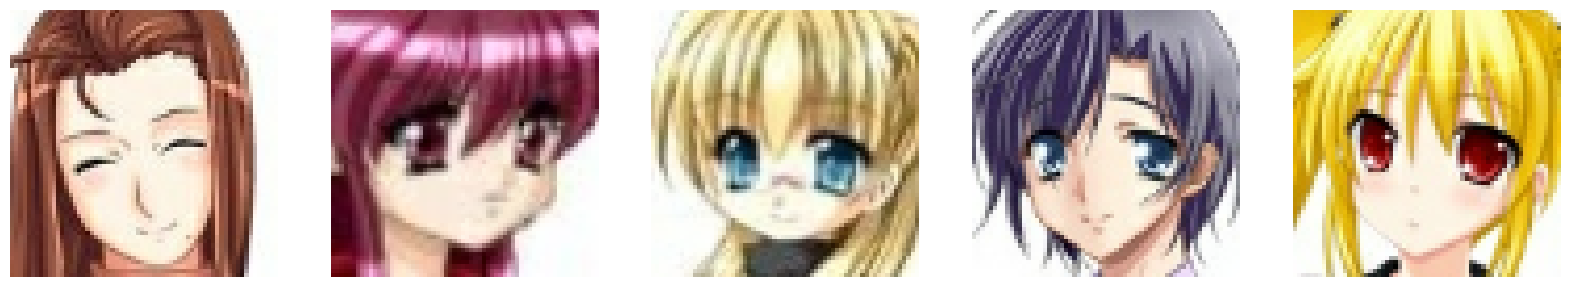

generated images


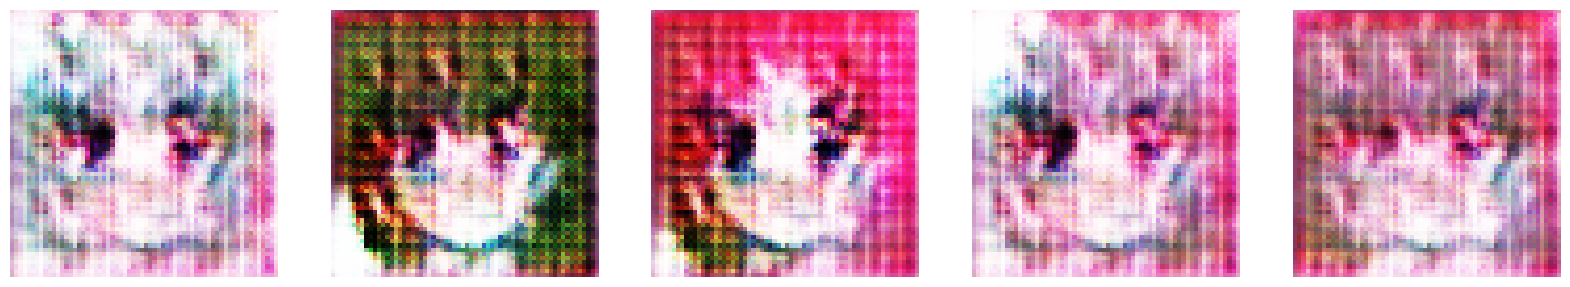

Time for epoch 10 is 62.93237566947937 sec


epoch 11:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 11, iteration 1


epoch 11:   1%|          | 1/157 [00:00<01:43,  1.51it/s]

epoch 11, iteration 2


epoch 11:   1%|▏         | 2/157 [00:01<01:15,  2.04it/s]

epoch 11, iteration 3


epoch 11:   2%|▏         | 3/157 [00:01<01:05,  2.34it/s]

epoch 11, iteration 4


epoch 11:   3%|▎         | 4/157 [00:01<01:00,  2.52it/s]

epoch 11, iteration 5


epoch 11:   3%|▎         | 5/157 [00:02<00:58,  2.61it/s]

epoch 11, iteration 6


epoch 11:   4%|▍         | 6/157 [00:02<00:59,  2.55it/s]

epoch 11, iteration 7


epoch 11:   4%|▍         | 7/157 [00:02<01:00,  2.48it/s]

epoch 11, iteration 8


epoch 11:   5%|▌         | 8/157 [00:03<01:01,  2.41it/s]

epoch 11, iteration 9


epoch 11:   6%|▌         | 9/157 [00:03<01:02,  2.36it/s]

epoch 11, iteration 10


epoch 11:   6%|▋         | 10/157 [00:04<01:04,  2.30it/s]

epoch 11, iteration 11


epoch 11:   7%|▋         | 11/157 [00:04<01:04,  2.28it/s]

epoch 11, iteration 12


epoch 11:   8%|▊         | 12/157 [00:05<01:03,  2.30it/s]

epoch 11, iteration 13


epoch 11:   8%|▊         | 13/157 [00:05<00:59,  2.44it/s]

epoch 11, iteration 14


epoch 11:   9%|▉         | 14/157 [00:05<00:56,  2.52it/s]

epoch 11, iteration 15


epoch 11:  10%|▉         | 15/157 [00:06<00:54,  2.58it/s]

epoch 11, iteration 16


epoch 11:  10%|█         | 16/157 [00:06<00:53,  2.65it/s]

epoch 11, iteration 17


epoch 11:  11%|█         | 17/157 [00:06<00:51,  2.70it/s]

epoch 11, iteration 18


epoch 11:  11%|█▏        | 18/157 [00:07<00:51,  2.72it/s]

epoch 11, iteration 19


epoch 11:  12%|█▏        | 19/157 [00:07<00:50,  2.75it/s]

epoch 11, iteration 20


epoch 11:  13%|█▎        | 20/157 [00:08<00:49,  2.76it/s]

epoch 11, iteration 21


epoch 11:  13%|█▎        | 21/157 [00:08<00:49,  2.75it/s]

epoch 11, iteration 22


epoch 11:  14%|█▍        | 22/157 [00:08<00:48,  2.76it/s]

epoch 11, iteration 23


epoch 11:  15%|█▍        | 23/157 [00:09<00:48,  2.77it/s]

epoch 11, iteration 24


epoch 11:  15%|█▌        | 24/157 [00:09<00:47,  2.78it/s]

epoch 11, iteration 25


epoch 11:  16%|█▌        | 25/157 [00:09<00:47,  2.77it/s]

epoch 11, iteration 26


epoch 11:  17%|█▋        | 26/157 [00:10<00:47,  2.76it/s]

epoch 11, iteration 27


epoch 11:  17%|█▋        | 27/157 [00:10<00:46,  2.77it/s]

epoch 11, iteration 28


epoch 11:  18%|█▊        | 28/157 [00:10<00:46,  2.78it/s]

epoch 11, iteration 29


epoch 11:  18%|█▊        | 29/157 [00:11<00:46,  2.76it/s]

epoch 11, iteration 30


epoch 11:  19%|█▉        | 30/157 [00:11<00:45,  2.77it/s]

epoch 11, iteration 31


epoch 11:  20%|█▉        | 31/157 [00:11<00:45,  2.78it/s]

epoch 11, iteration 32


epoch 11:  20%|██        | 32/157 [00:12<00:45,  2.77it/s]

epoch 11, iteration 33


epoch 11:  21%|██        | 33/157 [00:12<00:44,  2.77it/s]

epoch 11, iteration 34


epoch 11:  22%|██▏       | 34/157 [00:13<00:44,  2.77it/s]

epoch 11, iteration 35


epoch 11:  22%|██▏       | 35/157 [00:13<00:44,  2.76it/s]

epoch 11, iteration 36


epoch 11:  23%|██▎       | 36/157 [00:13<00:43,  2.77it/s]

epoch 11, iteration 37


epoch 11:  24%|██▎       | 37/157 [00:14<00:42,  2.80it/s]

epoch 11, iteration 38


epoch 11:  24%|██▍       | 38/157 [00:14<00:42,  2.79it/s]

epoch 11, iteration 39


epoch 11:  25%|██▍       | 39/157 [00:14<00:41,  2.83it/s]

epoch 11, iteration 40


epoch 11:  25%|██▌       | 40/157 [00:15<00:43,  2.68it/s]

epoch 11, iteration 41


epoch 11:  26%|██▌       | 41/157 [00:15<00:45,  2.53it/s]

epoch 11, iteration 42


epoch 11:  27%|██▋       | 42/157 [00:16<00:46,  2.47it/s]

epoch 11, iteration 43


epoch 11:  27%|██▋       | 43/157 [00:16<00:48,  2.36it/s]

epoch 11, iteration 44


epoch 11:  28%|██▊       | 44/157 [00:17<00:49,  2.28it/s]

epoch 11, iteration 45


epoch 11:  29%|██▊       | 45/157 [00:17<00:50,  2.21it/s]

epoch 11, iteration 46


epoch 11:  29%|██▉       | 46/157 [00:18<00:50,  2.20it/s]

epoch 11, iteration 47


epoch 11:  30%|██▉       | 47/157 [00:18<00:46,  2.35it/s]

epoch 11, iteration 48


epoch 11:  31%|███       | 48/157 [00:18<00:44,  2.47it/s]

epoch 11, iteration 49


epoch 11:  31%|███       | 49/157 [00:19<00:42,  2.56it/s]

epoch 11, iteration 50


epoch 11:  32%|███▏      | 50/157 [00:19<00:40,  2.63it/s]

epoch 11, iteration 51


epoch 11:  32%|███▏      | 51/157 [00:19<00:39,  2.68it/s]

epoch 11, iteration 52


epoch 11:  33%|███▎      | 52/157 [00:20<00:38,  2.71it/s]

epoch 11, iteration 53


epoch 11:  34%|███▍      | 53/157 [00:20<00:38,  2.72it/s]

epoch 11, iteration 54


epoch 11:  34%|███▍      | 54/157 [00:20<00:37,  2.74it/s]

epoch 11, iteration 55


epoch 11:  35%|███▌      | 55/157 [00:21<00:37,  2.76it/s]

epoch 11, iteration 56


epoch 11:  36%|███▌      | 56/157 [00:21<00:36,  2.79it/s]

epoch 11, iteration 57


epoch 11:  36%|███▋      | 57/157 [00:21<00:35,  2.78it/s]

epoch 11, iteration 58


epoch 11:  37%|███▋      | 58/157 [00:22<00:35,  2.76it/s]

epoch 11, iteration 59


epoch 11:  38%|███▊      | 59/157 [00:22<00:35,  2.78it/s]

epoch 11, iteration 60


epoch 11:  38%|███▊      | 60/157 [00:23<00:34,  2.78it/s]

epoch 11, iteration 61


epoch 11:  39%|███▉      | 61/157 [00:23<00:34,  2.74it/s]

epoch 11, iteration 62


epoch 11:  39%|███▉      | 62/157 [00:23<00:34,  2.75it/s]

epoch 11, iteration 63


epoch 11:  40%|████      | 63/157 [00:24<00:34,  2.74it/s]

epoch 11, iteration 64


epoch 11:  41%|████      | 64/157 [00:24<00:33,  2.77it/s]

epoch 11, iteration 65


epoch 11:  41%|████▏     | 65/157 [00:24<00:33,  2.76it/s]

epoch 11, iteration 66


epoch 11:  42%|████▏     | 66/157 [00:25<00:33,  2.74it/s]

epoch 11, iteration 67


epoch 11:  43%|████▎     | 67/157 [00:25<00:32,  2.75it/s]

epoch 11, iteration 68


epoch 11:  43%|████▎     | 68/157 [00:25<00:32,  2.74it/s]

epoch 11, iteration 69


epoch 11:  44%|████▍     | 69/157 [00:26<00:32,  2.73it/s]

epoch 11, iteration 70


epoch 11:  45%|████▍     | 70/157 [00:26<00:31,  2.77it/s]

epoch 11, iteration 71


epoch 11:  45%|████▌     | 71/157 [00:27<00:30,  2.78it/s]

epoch 11, iteration 72


epoch 11:  46%|████▌     | 72/157 [00:27<00:30,  2.76it/s]

epoch 11, iteration 73


epoch 11:  46%|████▋     | 73/157 [00:27<00:30,  2.78it/s]

epoch 11, iteration 74


epoch 11:  47%|████▋     | 74/157 [00:28<00:31,  2.66it/s]

epoch 11, iteration 75


epoch 11:  48%|████▊     | 75/157 [00:28<00:32,  2.54it/s]

epoch 11, iteration 76


epoch 11:  48%|████▊     | 76/157 [00:29<00:32,  2.47it/s]

epoch 11, iteration 77


epoch 11:  49%|████▉     | 77/157 [00:29<00:33,  2.39it/s]

epoch 11, iteration 78


epoch 11:  50%|████▉     | 78/157 [00:29<00:34,  2.30it/s]

epoch 11, iteration 79


epoch 11:  50%|█████     | 79/157 [00:30<00:34,  2.24it/s]

epoch 11, iteration 80


epoch 11:  51%|█████     | 80/157 [00:30<00:34,  2.26it/s]

epoch 11, iteration 81


epoch 11:  52%|█████▏    | 81/157 [00:31<00:31,  2.40it/s]

epoch 11, iteration 82


epoch 11:  52%|█████▏    | 82/157 [00:31<00:30,  2.50it/s]

epoch 11, iteration 83


epoch 11:  53%|█████▎    | 83/157 [00:31<00:28,  2.60it/s]

epoch 11, iteration 84


epoch 11:  54%|█████▎    | 84/157 [00:32<00:27,  2.66it/s]

epoch 11, iteration 85


epoch 11:  54%|█████▍    | 85/157 [00:32<00:26,  2.71it/s]

epoch 11, iteration 86


epoch 11:  55%|█████▍    | 86/157 [00:33<00:25,  2.74it/s]

epoch 11, iteration 87


epoch 11:  55%|█████▌    | 87/157 [00:33<00:25,  2.70it/s]

epoch 11, iteration 88


epoch 11:  56%|█████▌    | 88/157 [00:33<00:25,  2.72it/s]

epoch 11, iteration 89


epoch 11:  57%|█████▋    | 89/157 [00:34<00:24,  2.74it/s]

epoch 11, iteration 90


epoch 11:  57%|█████▋    | 90/157 [00:34<00:24,  2.75it/s]

epoch 11, iteration 91


epoch 11:  58%|█████▊    | 91/157 [00:34<00:23,  2.76it/s]

epoch 11, iteration 92


epoch 11:  59%|█████▊    | 92/157 [00:35<00:23,  2.75it/s]

epoch 11, iteration 93


epoch 11:  59%|█████▉    | 93/157 [00:35<00:23,  2.74it/s]

epoch 11, iteration 94


epoch 11:  60%|█████▉    | 94/157 [00:35<00:22,  2.77it/s]

epoch 11, iteration 95


epoch 11:  61%|██████    | 95/157 [00:36<00:22,  2.76it/s]

epoch 11, iteration 96


epoch 11:  61%|██████    | 96/157 [00:36<00:21,  2.77it/s]

epoch 11, iteration 97


epoch 11:  62%|██████▏   | 97/157 [00:36<00:21,  2.78it/s]

epoch 11, iteration 98


epoch 11:  62%|██████▏   | 98/157 [00:37<00:21,  2.74it/s]

epoch 11, iteration 99


epoch 11:  63%|██████▎   | 99/157 [00:37<00:21,  2.73it/s]

epoch 11, iteration 100


epoch 11:  64%|██████▎   | 100/157 [00:38<00:20,  2.74it/s]

epoch 11, iteration 101


epoch 11:  64%|██████▍   | 101/157 [00:38<00:20,  2.75it/s]

epoch 11, iteration 102


epoch 11:  65%|██████▍   | 102/157 [00:38<00:19,  2.79it/s]

epoch 11, iteration 103


epoch 11:  66%|██████▌   | 103/157 [00:39<00:19,  2.78it/s]

epoch 11, iteration 104


epoch 11:  66%|██████▌   | 104/157 [00:39<00:19,  2.74it/s]

epoch 11, iteration 105


epoch 11:  67%|██████▋   | 105/157 [00:39<00:18,  2.76it/s]

epoch 11, iteration 106


epoch 11:  68%|██████▊   | 106/157 [00:40<00:18,  2.77it/s]

epoch 11, iteration 107


epoch 11:  68%|██████▊   | 107/157 [00:40<00:18,  2.76it/s]

epoch 11, iteration 108


epoch 11:  69%|██████▉   | 108/157 [00:41<00:18,  2.67it/s]

epoch 11, iteration 109


epoch 11:  69%|██████▉   | 109/157 [00:41<00:19,  2.47it/s]

epoch 11, iteration 110


epoch 11:  70%|███████   | 110/157 [00:41<00:19,  2.44it/s]

epoch 11, iteration 111


epoch 11:  71%|███████   | 111/157 [00:42<00:18,  2.42it/s]

epoch 11, iteration 112


epoch 11:  71%|███████▏  | 112/157 [00:42<00:19,  2.31it/s]

epoch 11, iteration 113


epoch 11:  72%|███████▏  | 113/157 [00:43<00:19,  2.24it/s]

epoch 11, iteration 114


epoch 11:  73%|███████▎  | 114/157 [00:43<00:19,  2.18it/s]

epoch 11, iteration 115


epoch 11:  73%|███████▎  | 115/157 [00:44<00:18,  2.31it/s]

epoch 11, iteration 116


epoch 11:  74%|███████▍  | 116/157 [00:44<00:16,  2.42it/s]

epoch 11, iteration 117


epoch 11:  75%|███████▍  | 117/157 [00:44<00:15,  2.53it/s]

epoch 11, iteration 118


epoch 11:  75%|███████▌  | 118/157 [00:45<00:14,  2.62it/s]

epoch 11, iteration 119


epoch 11:  76%|███████▌  | 119/157 [00:45<00:14,  2.65it/s]

epoch 11, iteration 120


epoch 11:  76%|███████▋  | 120/157 [00:45<00:13,  2.71it/s]

epoch 11, iteration 121


epoch 11:  77%|███████▋  | 121/157 [00:46<00:13,  2.74it/s]

epoch 11, iteration 122


epoch 11:  78%|███████▊  | 122/157 [00:46<00:12,  2.75it/s]

epoch 11, iteration 123


epoch 11:  78%|███████▊  | 123/157 [00:47<00:12,  2.77it/s]

epoch 11, iteration 124


epoch 11:  79%|███████▉  | 124/157 [00:47<00:11,  2.77it/s]

epoch 11, iteration 125


epoch 11:  80%|███████▉  | 125/157 [00:47<00:11,  2.77it/s]

epoch 11, iteration 126


epoch 11:  80%|████████  | 126/157 [00:48<00:11,  2.78it/s]

epoch 11, iteration 127


epoch 11:  81%|████████  | 127/157 [00:48<00:10,  2.80it/s]

epoch 11, iteration 128


epoch 11:  82%|████████▏ | 128/157 [00:48<00:10,  2.80it/s]

epoch 11, iteration 129


epoch 11:  82%|████████▏ | 129/157 [00:49<00:10,  2.78it/s]

epoch 11, iteration 130


epoch 11:  83%|████████▎ | 130/157 [00:49<00:09,  2.77it/s]

epoch 11, iteration 131


epoch 11:  83%|████████▎ | 131/157 [00:49<00:09,  2.76it/s]

epoch 11, iteration 132


epoch 11:  84%|████████▍ | 132/157 [00:50<00:08,  2.78it/s]

epoch 11, iteration 133


epoch 11:  85%|████████▍ | 133/157 [00:50<00:08,  2.80it/s]

epoch 11, iteration 134


epoch 11:  85%|████████▌ | 134/157 [00:50<00:08,  2.80it/s]

epoch 11, iteration 135


epoch 11:  86%|████████▌ | 135/157 [00:51<00:07,  2.78it/s]

epoch 11, iteration 136


epoch 11:  87%|████████▋ | 136/157 [00:51<00:07,  2.79it/s]

epoch 11, iteration 137


epoch 11:  87%|████████▋ | 137/157 [00:52<00:07,  2.76it/s]

epoch 11, iteration 138


epoch 11:  88%|████████▊ | 138/157 [00:52<00:06,  2.78it/s]

epoch 11, iteration 139


epoch 11:  89%|████████▊ | 139/157 [00:52<00:06,  2.77it/s]

epoch 11, iteration 140


epoch 11:  89%|████████▉ | 140/157 [00:53<00:06,  2.77it/s]

epoch 11, iteration 141


epoch 11:  90%|████████▉ | 141/157 [00:53<00:05,  2.76it/s]

epoch 11, iteration 142


epoch 11:  90%|█████████ | 142/157 [00:53<00:05,  2.69it/s]

epoch 11, iteration 143


epoch 11:  91%|█████████ | 143/157 [00:54<00:05,  2.55it/s]

epoch 11, iteration 144


epoch 11:  92%|█████████▏| 144/157 [00:54<00:05,  2.48it/s]

epoch 11, iteration 145


epoch 11:  92%|█████████▏| 145/157 [00:55<00:04,  2.42it/s]

epoch 11, iteration 146


epoch 11:  93%|█████████▎| 146/157 [00:55<00:04,  2.33it/s]

epoch 11, iteration 147


epoch 11:  94%|█████████▎| 147/157 [00:56<00:04,  2.25it/s]

epoch 11, iteration 148


epoch 11:  94%|█████████▍| 148/157 [00:56<00:04,  2.15it/s]

epoch 11, iteration 149


epoch 11:  95%|█████████▍| 149/157 [00:57<00:03,  2.27it/s]

epoch 11, iteration 150


epoch 11:  96%|█████████▌| 150/157 [00:57<00:02,  2.39it/s]

epoch 11, iteration 151


epoch 11:  96%|█████████▌| 151/157 [00:57<00:02,  2.52it/s]

epoch 11, iteration 152


epoch 11:  97%|█████████▋| 152/157 [00:58<00:01,  2.58it/s]

epoch 11, iteration 153


epoch 11:  97%|█████████▋| 153/157 [00:58<00:01,  2.67it/s]

epoch 11, iteration 154


epoch 11:  98%|█████████▊| 154/157 [00:58<00:01,  2.77it/s]

epoch 11, iteration 155


epoch 11:  99%|█████████▊| 155/157 [00:59<00:00,  2.80it/s]

epoch 11, iteration 156


epoch 11:  99%|█████████▉| 156/157 [00:59<00:00,  2.84it/s]

epoch 11, iteration 157


epoch 11: 100%|██████████| 157/157 [00:59<00:00,  2.62it/s]


orignal images


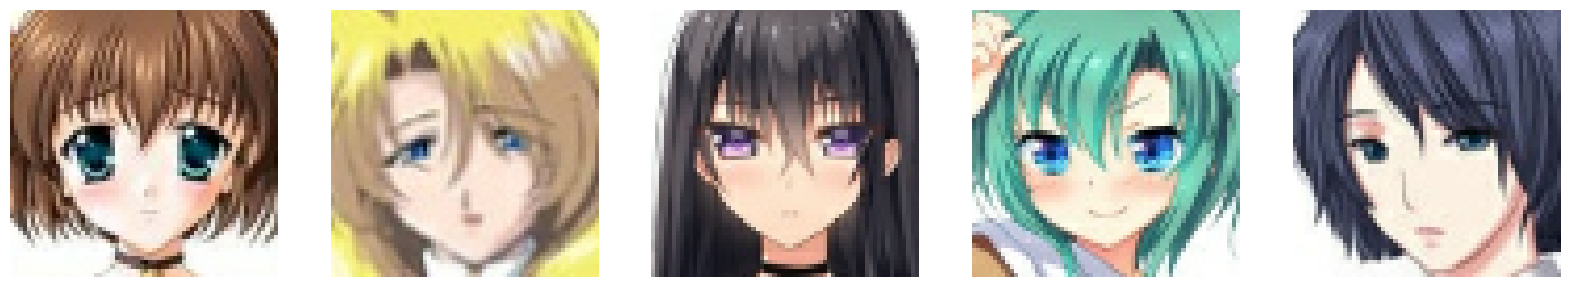

generated images


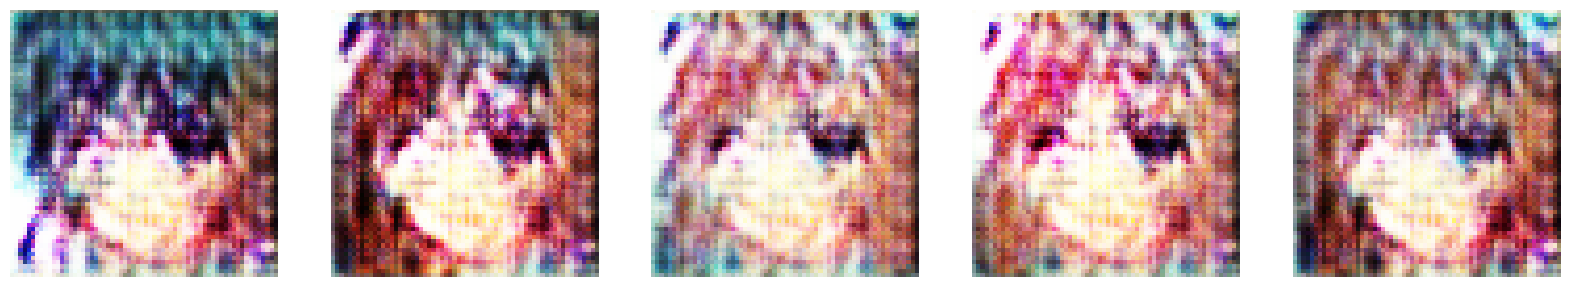

Time for epoch 11 is 63.30909848213196 sec


epoch 12:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 12, iteration 1


epoch 12:   1%|          | 1/157 [00:00<01:33,  1.66it/s]

epoch 12, iteration 2


epoch 12:   1%|▏         | 2/157 [00:00<01:13,  2.11it/s]

epoch 12, iteration 3


epoch 12:   2%|▏         | 3/157 [00:01<01:04,  2.39it/s]

epoch 12, iteration 4


epoch 12:   3%|▎         | 4/157 [00:01<01:00,  2.54it/s]

epoch 12, iteration 5


epoch 12:   3%|▎         | 5/157 [00:02<00:58,  2.59it/s]

epoch 12, iteration 6


epoch 12:   4%|▍         | 6/157 [00:02<00:56,  2.65it/s]

epoch 12, iteration 7


epoch 12:   4%|▍         | 7/157 [00:02<00:56,  2.67it/s]

epoch 12, iteration 8


epoch 12:   5%|▌         | 8/157 [00:03<00:55,  2.70it/s]

epoch 12, iteration 9


epoch 12:   6%|▌         | 9/157 [00:03<00:56,  2.63it/s]

epoch 12, iteration 10


epoch 12:   6%|▋         | 10/157 [00:04<00:58,  2.50it/s]

epoch 12, iteration 11


epoch 12:   7%|▋         | 11/157 [00:04<01:00,  2.42it/s]

epoch 12, iteration 12


epoch 12:   8%|▊         | 12/157 [00:04<01:00,  2.40it/s]

epoch 12, iteration 13


epoch 12:   8%|▊         | 13/157 [00:05<01:02,  2.29it/s]

epoch 12, iteration 14


epoch 12:   9%|▉         | 14/157 [00:05<01:04,  2.22it/s]

epoch 12, iteration 15


epoch 12:  10%|▉         | 15/157 [00:06<01:05,  2.16it/s]

epoch 12, iteration 16


epoch 12:  10%|█         | 16/157 [00:06<01:00,  2.33it/s]

epoch 12, iteration 17


epoch 12:  11%|█         | 17/157 [00:07<00:57,  2.44it/s]

epoch 12, iteration 18


epoch 12:  11%|█▏        | 18/157 [00:07<00:54,  2.53it/s]

epoch 12, iteration 19


epoch 12:  12%|█▏        | 19/157 [00:07<00:52,  2.60it/s]

epoch 12, iteration 20


epoch 12:  13%|█▎        | 20/157 [00:08<00:51,  2.64it/s]

epoch 12, iteration 21


epoch 12:  13%|█▎        | 21/157 [00:08<00:51,  2.66it/s]

epoch 12, iteration 22


epoch 12:  14%|█▍        | 22/157 [00:08<00:50,  2.69it/s]

epoch 12, iteration 23


epoch 12:  15%|█▍        | 23/157 [00:09<00:49,  2.72it/s]

epoch 12, iteration 24


epoch 12:  15%|█▌        | 24/157 [00:09<00:48,  2.72it/s]

epoch 12, iteration 25


epoch 12:  16%|█▌        | 25/157 [00:09<00:48,  2.72it/s]

epoch 12, iteration 26


epoch 12:  17%|█▋        | 26/157 [00:10<00:48,  2.68it/s]

epoch 12, iteration 27


epoch 12:  17%|█▋        | 27/157 [00:10<00:47,  2.71it/s]

epoch 12, iteration 28


epoch 12:  18%|█▊        | 28/157 [00:11<00:47,  2.73it/s]

epoch 12, iteration 29


epoch 12:  18%|█▊        | 29/157 [00:11<00:47,  2.68it/s]

epoch 12, iteration 30


epoch 12:  19%|█▉        | 30/157 [00:11<00:47,  2.70it/s]

epoch 12, iteration 31


epoch 12:  20%|█▉        | 31/157 [00:12<00:46,  2.74it/s]

epoch 12, iteration 32


epoch 12:  20%|██        | 32/157 [00:12<00:45,  2.72it/s]

epoch 12, iteration 33


epoch 12:  21%|██        | 33/157 [00:12<00:45,  2.73it/s]

epoch 12, iteration 34


epoch 12:  22%|██▏       | 34/157 [00:13<00:44,  2.74it/s]

epoch 12, iteration 35


epoch 12:  22%|██▏       | 35/157 [00:13<00:44,  2.74it/s]

epoch 12, iteration 36


epoch 12:  23%|██▎       | 36/157 [00:13<00:43,  2.77it/s]

epoch 12, iteration 37


epoch 12:  24%|██▎       | 37/157 [00:14<00:43,  2.75it/s]

epoch 12, iteration 38


epoch 12:  24%|██▍       | 38/157 [00:14<00:43,  2.74it/s]

epoch 12, iteration 39


epoch 12:  25%|██▍       | 39/157 [00:15<00:43,  2.74it/s]

epoch 12, iteration 40


epoch 12:  25%|██▌       | 40/157 [00:15<00:42,  2.75it/s]

epoch 12, iteration 41


epoch 12:  26%|██▌       | 41/157 [00:15<00:42,  2.74it/s]

epoch 12, iteration 42


epoch 12:  27%|██▋       | 42/157 [00:16<00:41,  2.76it/s]

epoch 12, iteration 43


epoch 12:  27%|██▋       | 43/157 [00:16<00:43,  2.65it/s]

epoch 12, iteration 44


epoch 12:  28%|██▊       | 44/157 [00:17<00:44,  2.53it/s]

epoch 12, iteration 45


epoch 12:  29%|██▊       | 45/157 [00:17<00:45,  2.47it/s]

epoch 12, iteration 46


epoch 12:  29%|██▉       | 46/157 [00:17<00:46,  2.36it/s]

epoch 12, iteration 47


epoch 12:  30%|██▉       | 47/157 [00:18<00:47,  2.30it/s]

epoch 12, iteration 48


epoch 12:  31%|███       | 48/157 [00:18<00:49,  2.22it/s]

epoch 12, iteration 49


epoch 12:  31%|███       | 49/157 [00:19<00:47,  2.27it/s]

epoch 12, iteration 50


epoch 12:  32%|███▏      | 50/157 [00:19<00:44,  2.40it/s]

epoch 12, iteration 51


epoch 12:  32%|███▏      | 51/157 [00:19<00:42,  2.50it/s]

epoch 12, iteration 52


epoch 12:  33%|███▎      | 52/157 [00:20<00:40,  2.60it/s]

epoch 12, iteration 53


epoch 12:  34%|███▍      | 53/157 [00:20<00:39,  2.64it/s]

epoch 12, iteration 54


epoch 12:  34%|███▍      | 54/157 [00:21<00:38,  2.67it/s]

epoch 12, iteration 55


epoch 12:  35%|███▌      | 55/157 [00:21<00:37,  2.70it/s]

epoch 12, iteration 56


epoch 12:  36%|███▌      | 56/157 [00:21<00:37,  2.70it/s]

epoch 12, iteration 57


epoch 12:  36%|███▋      | 57/157 [00:22<00:36,  2.73it/s]

epoch 12, iteration 58


epoch 12:  37%|███▋      | 58/157 [00:22<00:36,  2.74it/s]

epoch 12, iteration 59


epoch 12:  38%|███▊      | 59/157 [00:22<00:35,  2.74it/s]

epoch 12, iteration 60


epoch 12:  38%|███▊      | 60/157 [00:23<00:35,  2.75it/s]

epoch 12, iteration 61


epoch 12:  39%|███▉      | 61/157 [00:23<00:34,  2.76it/s]

epoch 12, iteration 62


epoch 12:  39%|███▉      | 62/157 [00:23<00:34,  2.75it/s]

epoch 12, iteration 63


epoch 12:  40%|████      | 63/157 [00:24<00:34,  2.74it/s]

epoch 12, iteration 64


epoch 12:  41%|████      | 64/157 [00:24<00:34,  2.72it/s]

epoch 12, iteration 65


epoch 12:  41%|████▏     | 65/157 [00:25<00:34,  2.70it/s]

epoch 12, iteration 66


epoch 12:  42%|████▏     | 66/157 [00:25<00:33,  2.72it/s]

epoch 12, iteration 67


epoch 12:  43%|████▎     | 67/157 [00:25<00:32,  2.74it/s]

epoch 12, iteration 68


epoch 12:  43%|████▎     | 68/157 [00:26<00:32,  2.74it/s]

epoch 12, iteration 69


epoch 12:  44%|████▍     | 69/157 [00:26<00:31,  2.75it/s]

epoch 12, iteration 70


epoch 12:  45%|████▍     | 70/157 [00:26<00:31,  2.75it/s]

epoch 12, iteration 71


epoch 12:  45%|████▌     | 71/157 [00:27<00:31,  2.77it/s]

epoch 12, iteration 72


epoch 12:  46%|████▌     | 72/157 [00:27<00:30,  2.75it/s]

epoch 12, iteration 73


epoch 12:  46%|████▋     | 73/157 [00:27<00:30,  2.76it/s]

epoch 12, iteration 74


epoch 12:  47%|████▋     | 74/157 [00:28<00:30,  2.76it/s]

epoch 12, iteration 75


epoch 12:  48%|████▊     | 75/157 [00:28<00:29,  2.78it/s]

epoch 12, iteration 76


epoch 12:  48%|████▊     | 76/157 [00:29<00:29,  2.77it/s]

epoch 12, iteration 77


epoch 12:  49%|████▉     | 77/157 [00:29<00:30,  2.64it/s]

epoch 12, iteration 78


epoch 12:  50%|████▉     | 78/157 [00:29<00:31,  2.53it/s]

epoch 12, iteration 79


epoch 12:  50%|█████     | 79/157 [00:30<00:31,  2.47it/s]

epoch 12, iteration 80


epoch 12:  51%|█████     | 80/157 [00:30<00:32,  2.39it/s]

epoch 12, iteration 81


epoch 12:  52%|█████▏    | 81/157 [00:31<00:32,  2.32it/s]

epoch 12, iteration 82


epoch 12:  52%|█████▏    | 82/157 [00:31<00:32,  2.31it/s]

epoch 12, iteration 83


epoch 12:  53%|█████▎    | 83/157 [00:32<00:32,  2.29it/s]

epoch 12, iteration 84


epoch 12:  54%|█████▎    | 84/157 [00:32<00:29,  2.44it/s]

epoch 12, iteration 85


epoch 12:  54%|█████▍    | 85/157 [00:32<00:28,  2.53it/s]

epoch 12, iteration 86


epoch 12:  55%|█████▍    | 86/157 [00:33<00:27,  2.59it/s]

epoch 12, iteration 87


epoch 12:  55%|█████▌    | 87/157 [00:33<00:26,  2.65it/s]

epoch 12, iteration 88


epoch 12:  56%|█████▌    | 88/157 [00:33<00:25,  2.67it/s]

epoch 12, iteration 89


epoch 12:  57%|█████▋    | 89/157 [00:34<00:25,  2.70it/s]

epoch 12, iteration 90


epoch 12:  57%|█████▋    | 90/157 [00:34<00:24,  2.71it/s]

epoch 12, iteration 91


epoch 12:  58%|█████▊    | 91/157 [00:35<00:24,  2.67it/s]

epoch 12, iteration 92


epoch 12:  59%|█████▊    | 92/157 [00:35<00:24,  2.70it/s]

epoch 12, iteration 93


epoch 12:  59%|█████▉    | 93/157 [00:35<00:23,  2.72it/s]

epoch 12, iteration 94


epoch 12:  60%|█████▉    | 94/157 [00:36<00:22,  2.74it/s]

epoch 12, iteration 95


epoch 12:  61%|██████    | 95/157 [00:36<00:22,  2.71it/s]

epoch 12, iteration 96


epoch 12:  61%|██████    | 96/157 [00:36<00:22,  2.74it/s]

epoch 12, iteration 97


epoch 12:  62%|██████▏   | 97/157 [00:37<00:21,  2.74it/s]

epoch 12, iteration 98


epoch 12:  62%|██████▏   | 98/157 [00:37<00:21,  2.71it/s]

epoch 12, iteration 99


epoch 12:  63%|██████▎   | 99/157 [00:37<00:21,  2.72it/s]

epoch 12, iteration 100


epoch 12:  64%|██████▎   | 100/157 [00:38<00:21,  2.71it/s]

epoch 12, iteration 101


epoch 12:  64%|██████▍   | 101/157 [00:38<00:20,  2.74it/s]

epoch 12, iteration 102


epoch 12:  65%|██████▍   | 102/157 [00:39<00:20,  2.74it/s]

epoch 12, iteration 103


epoch 12:  66%|██████▌   | 103/157 [00:39<00:19,  2.73it/s]

epoch 12, iteration 104


epoch 12:  66%|██████▌   | 104/157 [00:39<00:19,  2.73it/s]

epoch 12, iteration 105


epoch 12:  67%|██████▋   | 105/157 [00:40<00:19,  2.71it/s]

epoch 12, iteration 106


epoch 12:  68%|██████▊   | 106/157 [00:40<00:19,  2.68it/s]

epoch 12, iteration 107


epoch 12:  68%|██████▊   | 107/157 [00:40<00:19,  2.62it/s]

epoch 12, iteration 108


epoch 12:  69%|██████▉   | 108/157 [00:41<00:18,  2.65it/s]

epoch 12, iteration 109


epoch 12:  69%|██████▉   | 109/157 [00:41<00:17,  2.68it/s]

epoch 12, iteration 110


epoch 12:  70%|███████   | 110/157 [00:42<00:17,  2.69it/s]

epoch 12, iteration 111


epoch 12:  71%|███████   | 111/157 [00:42<00:18,  2.52it/s]

epoch 12, iteration 112


epoch 12:  71%|███████▏  | 112/157 [00:42<00:18,  2.38it/s]

epoch 12, iteration 113


epoch 12:  72%|███████▏  | 113/157 [00:43<00:18,  2.37it/s]

epoch 12, iteration 114


epoch 12:  73%|███████▎  | 114/157 [00:43<00:18,  2.31it/s]

epoch 12, iteration 115


epoch 12:  73%|███████▎  | 115/157 [00:44<00:18,  2.29it/s]

epoch 12, iteration 116


epoch 12:  74%|███████▍  | 116/157 [00:44<00:18,  2.19it/s]

epoch 12, iteration 117


epoch 12:  75%|███████▍  | 117/157 [00:45<00:17,  2.26it/s]

epoch 12, iteration 118


epoch 12:  75%|███████▌  | 118/157 [00:45<00:16,  2.39it/s]

epoch 12, iteration 119


epoch 12:  76%|███████▌  | 119/157 [00:45<00:15,  2.47it/s]

epoch 12, iteration 120


epoch 12:  76%|███████▋  | 120/157 [00:46<00:14,  2.58it/s]

epoch 12, iteration 121


epoch 12:  77%|███████▋  | 121/157 [00:46<00:13,  2.62it/s]

epoch 12, iteration 122


epoch 12:  78%|███████▊  | 122/157 [00:47<00:13,  2.67it/s]

epoch 12, iteration 123


epoch 12:  78%|███████▊  | 123/157 [00:47<00:12,  2.71it/s]

epoch 12, iteration 124


epoch 12:  79%|███████▉  | 124/157 [00:47<00:12,  2.69it/s]

epoch 12, iteration 125


epoch 12:  80%|███████▉  | 125/157 [00:48<00:11,  2.71it/s]

epoch 12, iteration 126


epoch 12:  80%|████████  | 126/157 [00:48<00:11,  2.75it/s]

epoch 12, iteration 127


epoch 12:  81%|████████  | 127/157 [00:48<00:10,  2.76it/s]

epoch 12, iteration 128


epoch 12:  82%|████████▏ | 128/157 [00:49<00:10,  2.78it/s]

epoch 12, iteration 129


epoch 12:  82%|████████▏ | 129/157 [00:49<00:10,  2.78it/s]

epoch 12, iteration 130


epoch 12:  83%|████████▎ | 130/157 [00:49<00:09,  2.78it/s]

epoch 12, iteration 131


epoch 12:  83%|████████▎ | 131/157 [00:50<00:09,  2.77it/s]

epoch 12, iteration 132


epoch 12:  84%|████████▍ | 132/157 [00:50<00:09,  2.76it/s]

epoch 12, iteration 133


epoch 12:  85%|████████▍ | 133/157 [00:51<00:08,  2.74it/s]

epoch 12, iteration 134


epoch 12:  85%|████████▌ | 134/157 [00:51<00:08,  2.76it/s]

epoch 12, iteration 135


epoch 12:  86%|████████▌ | 135/157 [00:51<00:07,  2.75it/s]

epoch 12, iteration 136


epoch 12:  87%|████████▋ | 136/157 [00:52<00:07,  2.70it/s]

epoch 12, iteration 137


epoch 12:  87%|████████▋ | 137/157 [00:52<00:07,  2.70it/s]

epoch 12, iteration 138


epoch 12:  88%|████████▊ | 138/157 [00:52<00:07,  2.70it/s]

epoch 12, iteration 139


epoch 12:  89%|████████▊ | 139/157 [00:53<00:06,  2.70it/s]

epoch 12, iteration 140


epoch 12:  89%|████████▉ | 140/157 [00:53<00:06,  2.71it/s]

epoch 12, iteration 141


epoch 12:  90%|████████▉ | 141/157 [00:53<00:05,  2.70it/s]

epoch 12, iteration 142


epoch 12:  90%|█████████ | 142/157 [00:54<00:05,  2.69it/s]

epoch 12, iteration 143


epoch 12:  91%|█████████ | 143/157 [00:54<00:05,  2.71it/s]

epoch 12, iteration 144


epoch 12:  92%|█████████▏| 144/157 [00:55<00:04,  2.72it/s]

epoch 12, iteration 145


epoch 12:  92%|█████████▏| 145/157 [00:55<00:04,  2.55it/s]

epoch 12, iteration 146


epoch 12:  93%|█████████▎| 146/157 [00:56<00:04,  2.41it/s]

epoch 12, iteration 147


epoch 12:  94%|█████████▎| 147/157 [00:56<00:04,  2.40it/s]

epoch 12, iteration 148


epoch 12:  94%|█████████▍| 148/157 [00:56<00:03,  2.30it/s]

epoch 12, iteration 149


epoch 12:  95%|█████████▍| 149/157 [00:57<00:03,  2.23it/s]

epoch 12, iteration 150


epoch 12:  96%|█████████▌| 150/157 [00:57<00:03,  2.19it/s]

epoch 12, iteration 151


epoch 12:  96%|█████████▌| 151/157 [00:58<00:02,  2.23it/s]

epoch 12, iteration 152


epoch 12:  97%|█████████▋| 152/157 [00:58<00:02,  2.39it/s]

epoch 12, iteration 153


epoch 12:  97%|█████████▋| 153/157 [00:58<00:01,  2.51it/s]

epoch 12, iteration 154


epoch 12:  98%|█████████▊| 154/157 [00:59<00:01,  2.55it/s]

epoch 12, iteration 155


epoch 12:  99%|█████████▊| 155/157 [00:59<00:00,  2.65it/s]

epoch 12, iteration 156


epoch 12:  99%|█████████▉| 156/157 [01:00<00:00,  2.72it/s]

epoch 12, iteration 157


epoch 12: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


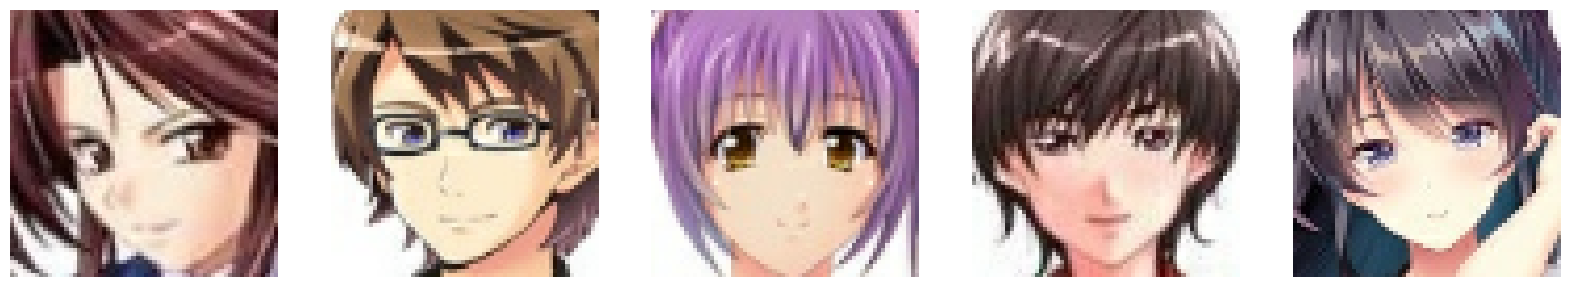

generated images


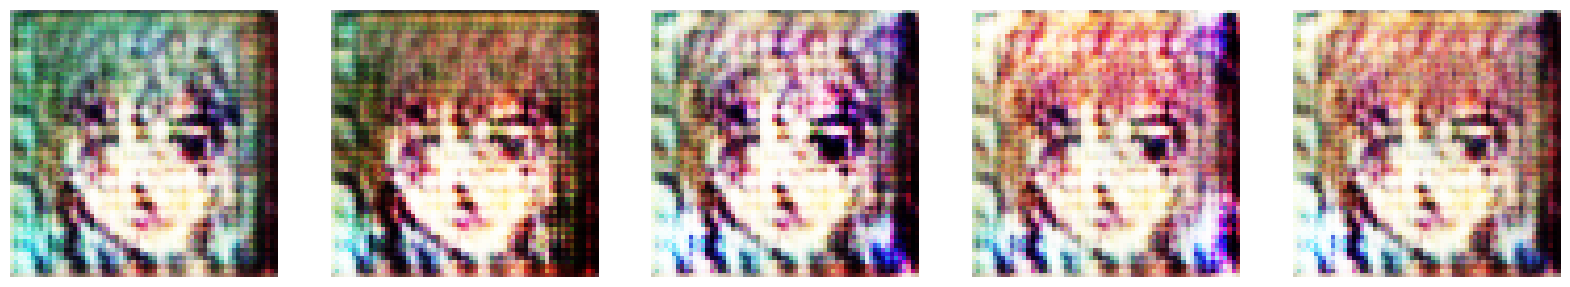

Time for epoch 12 is 85.99703860282898 sec


epoch 13:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 13, iteration 1


epoch 13:   1%|          | 1/157 [00:00<01:40,  1.56it/s]

epoch 13, iteration 2


epoch 13:   1%|▏         | 2/157 [00:01<01:15,  2.05it/s]

epoch 13, iteration 3


epoch 13:   2%|▏         | 3/157 [00:01<01:05,  2.35it/s]

epoch 13, iteration 4


epoch 13:   3%|▎         | 4/157 [00:01<01:03,  2.42it/s]

epoch 13, iteration 5


epoch 13:   3%|▎         | 5/157 [00:02<01:00,  2.52it/s]

epoch 13, iteration 6


epoch 13:   4%|▍         | 6/157 [00:02<01:10,  2.14it/s]

epoch 13, iteration 7


epoch 13:   4%|▍         | 7/157 [00:03<01:05,  2.29it/s]

epoch 13, iteration 8


epoch 13:   5%|▌         | 8/157 [00:03<01:01,  2.42it/s]

epoch 13, iteration 9


epoch 13:   6%|▌         | 9/157 [00:03<00:59,  2.50it/s]

epoch 13, iteration 10


epoch 13:   6%|▋         | 10/157 [00:04<00:57,  2.57it/s]

epoch 13, iteration 11


epoch 13:   7%|▋         | 11/157 [00:04<00:55,  2.62it/s]

epoch 13, iteration 12


epoch 13:   8%|▊         | 12/157 [00:04<00:55,  2.61it/s]

epoch 13, iteration 13


epoch 13:   8%|▊         | 13/157 [00:05<00:57,  2.52it/s]

epoch 13, iteration 14


epoch 13:   9%|▉         | 14/157 [00:05<00:58,  2.43it/s]

epoch 13, iteration 15


epoch 13:  10%|▉         | 15/157 [00:06<01:00,  2.35it/s]

epoch 13, iteration 16


epoch 13:  10%|█         | 16/157 [00:06<01:01,  2.29it/s]

epoch 13, iteration 17


epoch 13:  11%|█         | 17/157 [00:07<01:02,  2.23it/s]

epoch 13, iteration 18


epoch 13:  11%|█▏        | 18/157 [00:07<01:03,  2.20it/s]

epoch 13, iteration 19


epoch 13:  12%|█▏        | 19/157 [00:08<01:00,  2.27it/s]

epoch 13, iteration 20


epoch 13:  13%|█▎        | 20/157 [00:08<00:56,  2.41it/s]

epoch 13, iteration 21


epoch 13:  13%|█▎        | 21/157 [00:08<00:53,  2.52it/s]

epoch 13, iteration 22


epoch 13:  14%|█▍        | 22/157 [00:09<00:52,  2.59it/s]

epoch 13, iteration 23


epoch 13:  15%|█▍        | 23/157 [00:09<00:51,  2.62it/s]

epoch 13, iteration 24


epoch 13:  15%|█▌        | 24/157 [00:09<00:49,  2.67it/s]

epoch 13, iteration 25


epoch 13:  16%|█▌        | 25/157 [00:10<00:48,  2.70it/s]

epoch 13, iteration 26


epoch 13:  17%|█▋        | 26/157 [00:10<00:48,  2.70it/s]

epoch 13, iteration 27


epoch 13:  17%|█▋        | 27/157 [00:11<00:47,  2.72it/s]

epoch 13, iteration 28


epoch 13:  18%|█▊        | 28/157 [00:11<00:47,  2.71it/s]

epoch 13, iteration 29


epoch 13:  18%|█▊        | 29/157 [00:11<00:46,  2.75it/s]

epoch 13, iteration 30


epoch 13:  19%|█▉        | 30/157 [00:12<00:46,  2.74it/s]

epoch 13, iteration 31


epoch 13:  20%|█▉        | 31/157 [00:12<00:45,  2.75it/s]

epoch 13, iteration 32


epoch 13:  20%|██        | 32/157 [00:12<00:45,  2.75it/s]

epoch 13, iteration 33


epoch 13:  21%|██        | 33/157 [00:13<00:45,  2.73it/s]

epoch 13, iteration 34


epoch 13:  22%|██▏       | 34/157 [00:13<00:44,  2.74it/s]

epoch 13, iteration 35


epoch 13:  22%|██▏       | 35/157 [00:13<00:44,  2.77it/s]

epoch 13, iteration 36


epoch 13:  23%|██▎       | 36/157 [00:14<00:43,  2.76it/s]

epoch 13, iteration 37


epoch 13:  24%|██▎       | 37/157 [00:14<00:43,  2.79it/s]

epoch 13, iteration 38


epoch 13:  24%|██▍       | 38/157 [00:14<00:42,  2.78it/s]

epoch 13, iteration 39


epoch 13:  25%|██▍       | 39/157 [00:15<00:42,  2.78it/s]

epoch 13, iteration 40


epoch 13:  25%|██▌       | 40/157 [00:15<00:42,  2.78it/s]

epoch 13, iteration 41


epoch 13:  26%|██▌       | 41/157 [00:16<00:41,  2.78it/s]

epoch 13, iteration 42


epoch 13:  27%|██▋       | 42/157 [00:16<00:41,  2.76it/s]

epoch 13, iteration 43


epoch 13:  27%|██▋       | 43/157 [00:16<00:41,  2.77it/s]

epoch 13, iteration 44


epoch 13:  28%|██▊       | 44/157 [00:17<00:40,  2.80it/s]

epoch 13, iteration 45


epoch 13:  29%|██▊       | 45/157 [00:17<00:40,  2.79it/s]

epoch 13, iteration 46


epoch 13:  29%|██▉       | 46/157 [00:17<00:40,  2.76it/s]

epoch 13, iteration 47


epoch 13:  30%|██▉       | 47/157 [00:18<00:43,  2.55it/s]

epoch 13, iteration 48


epoch 13:  31%|███       | 48/157 [00:18<00:44,  2.47it/s]

epoch 13, iteration 49


epoch 13:  31%|███       | 49/157 [00:19<00:44,  2.42it/s]

epoch 13, iteration 50


epoch 13:  32%|███▏      | 50/157 [00:19<00:45,  2.33it/s]

epoch 13, iteration 51


epoch 13:  32%|███▏      | 51/157 [00:20<00:46,  2.26it/s]

epoch 13, iteration 52


epoch 13:  33%|███▎      | 52/157 [00:20<00:47,  2.22it/s]

epoch 13, iteration 53


epoch 13:  34%|███▍      | 53/157 [00:20<00:44,  2.34it/s]

epoch 13, iteration 54


epoch 13:  34%|███▍      | 54/157 [00:21<00:42,  2.45it/s]

epoch 13, iteration 55


epoch 13:  35%|███▌      | 55/157 [00:21<00:40,  2.53it/s]

epoch 13, iteration 56


epoch 13:  36%|███▌      | 56/157 [00:22<00:38,  2.60it/s]

epoch 13, iteration 57


epoch 13:  36%|███▋      | 57/157 [00:22<00:37,  2.65it/s]

epoch 13, iteration 58


epoch 13:  37%|███▋      | 58/157 [00:22<00:37,  2.67it/s]

epoch 13, iteration 59


epoch 13:  38%|███▊      | 59/157 [00:23<00:36,  2.69it/s]

epoch 13, iteration 60


epoch 13:  38%|███▊      | 60/157 [00:23<00:36,  2.69it/s]

epoch 13, iteration 61


epoch 13:  39%|███▉      | 61/157 [00:23<00:35,  2.72it/s]

epoch 13, iteration 62


epoch 13:  39%|███▉      | 62/157 [00:24<00:34,  2.74it/s]

epoch 13, iteration 63


epoch 13:  40%|████      | 63/157 [00:24<00:34,  2.73it/s]

epoch 13, iteration 64


epoch 13:  41%|████      | 64/157 [00:24<00:33,  2.74it/s]

epoch 13, iteration 65


epoch 13:  41%|████▏     | 65/157 [00:25<00:33,  2.78it/s]

epoch 13, iteration 66


epoch 13:  42%|████▏     | 66/157 [00:25<00:32,  2.78it/s]

epoch 13, iteration 67


epoch 13:  43%|████▎     | 67/157 [00:26<00:32,  2.77it/s]

epoch 13, iteration 68


epoch 13:  43%|████▎     | 68/157 [00:26<00:32,  2.73it/s]

epoch 13, iteration 69


epoch 13:  44%|████▍     | 69/157 [00:26<00:32,  2.71it/s]

epoch 13, iteration 70


epoch 13:  45%|████▍     | 70/157 [00:27<00:32,  2.70it/s]

epoch 13, iteration 71


epoch 13:  45%|████▌     | 71/157 [00:27<00:31,  2.72it/s]

epoch 13, iteration 72


epoch 13:  46%|████▌     | 72/157 [00:27<00:31,  2.73it/s]

epoch 13, iteration 73


epoch 13:  46%|████▋     | 73/157 [00:28<00:30,  2.72it/s]

epoch 13, iteration 74


epoch 13:  47%|████▋     | 74/157 [00:28<00:30,  2.71it/s]

epoch 13, iteration 75


epoch 13:  48%|████▊     | 75/157 [00:29<00:30,  2.73it/s]

epoch 13, iteration 76


epoch 13:  48%|████▊     | 76/157 [00:29<00:29,  2.74it/s]

epoch 13, iteration 77


epoch 13:  49%|████▉     | 77/157 [00:29<00:29,  2.73it/s]

epoch 13, iteration 78


epoch 13:  50%|████▉     | 78/157 [00:30<00:29,  2.68it/s]

epoch 13, iteration 79


epoch 13:  50%|█████     | 79/157 [00:30<00:28,  2.70it/s]

epoch 13, iteration 80


epoch 13:  51%|█████     | 80/157 [00:30<00:29,  2.61it/s]

epoch 13, iteration 81


epoch 13:  52%|█████▏    | 81/157 [00:31<00:30,  2.49it/s]

epoch 13, iteration 82


epoch 13:  52%|█████▏    | 82/157 [00:31<00:31,  2.38it/s]

epoch 13, iteration 83


epoch 13:  53%|█████▎    | 83/157 [00:32<00:31,  2.33it/s]

epoch 13, iteration 84


epoch 13:  54%|█████▎    | 84/157 [00:32<00:32,  2.25it/s]

epoch 13, iteration 85


epoch 13:  54%|█████▍    | 85/157 [00:33<00:32,  2.22it/s]

epoch 13, iteration 86


epoch 13:  55%|█████▍    | 86/157 [00:33<00:32,  2.19it/s]

epoch 13, iteration 87


epoch 13:  55%|█████▌    | 87/157 [00:34<00:30,  2.30it/s]

epoch 13, iteration 88


epoch 13:  56%|█████▌    | 88/157 [00:34<00:28,  2.44it/s]

epoch 13, iteration 89


epoch 13:  57%|█████▋    | 89/157 [00:34<00:27,  2.51it/s]

epoch 13, iteration 90


epoch 13:  57%|█████▋    | 90/157 [00:35<00:26,  2.57it/s]

epoch 13, iteration 91


epoch 13:  58%|█████▊    | 91/157 [00:35<00:25,  2.62it/s]

epoch 13, iteration 92


epoch 13:  59%|█████▊    | 92/157 [00:35<00:24,  2.66it/s]

epoch 13, iteration 93


epoch 13:  59%|█████▉    | 93/157 [00:36<00:23,  2.68it/s]

epoch 13, iteration 94


epoch 13:  60%|█████▉    | 94/157 [00:36<00:23,  2.66it/s]

epoch 13, iteration 95


epoch 13:  61%|██████    | 95/157 [00:36<00:23,  2.68it/s]

epoch 13, iteration 96


epoch 13:  61%|██████    | 96/157 [00:37<00:22,  2.68it/s]

epoch 13, iteration 97


epoch 13:  62%|██████▏   | 97/157 [00:37<00:22,  2.72it/s]

epoch 13, iteration 98


epoch 13:  62%|██████▏   | 98/157 [00:38<00:21,  2.72it/s]

epoch 13, iteration 99


epoch 13:  63%|██████▎   | 99/157 [00:38<00:21,  2.75it/s]

epoch 13, iteration 100


epoch 13:  64%|██████▎   | 100/157 [00:38<00:20,  2.75it/s]

epoch 13, iteration 101


epoch 13:  64%|██████▍   | 101/157 [00:39<00:20,  2.73it/s]

epoch 13, iteration 102


epoch 13:  65%|██████▍   | 102/157 [00:39<00:20,  2.75it/s]

epoch 13, iteration 103


epoch 13:  66%|██████▌   | 103/157 [00:39<00:19,  2.76it/s]

epoch 13, iteration 104


epoch 13:  66%|██████▌   | 104/157 [00:40<00:19,  2.76it/s]

epoch 13, iteration 105


epoch 13:  67%|██████▋   | 105/157 [00:40<00:18,  2.76it/s]

epoch 13, iteration 106


epoch 13:  68%|██████▊   | 106/157 [00:40<00:18,  2.76it/s]

epoch 13, iteration 107


epoch 13:  68%|██████▊   | 107/157 [00:41<00:18,  2.74it/s]

epoch 13, iteration 108


epoch 13:  69%|██████▉   | 108/157 [00:41<00:17,  2.72it/s]

epoch 13, iteration 109


epoch 13:  69%|██████▉   | 109/157 [00:42<00:17,  2.69it/s]

epoch 13, iteration 110


epoch 13:  70%|███████   | 110/157 [00:42<00:17,  2.69it/s]

epoch 13, iteration 111


epoch 13:  71%|███████   | 111/157 [00:42<00:16,  2.71it/s]

epoch 13, iteration 112


epoch 13:  71%|███████▏  | 112/157 [00:43<00:16,  2.72it/s]

epoch 13, iteration 113


epoch 13:  72%|███████▏  | 113/157 [00:43<00:16,  2.74it/s]

epoch 13, iteration 114


epoch 13:  73%|███████▎  | 114/157 [00:43<00:16,  2.62it/s]

epoch 13, iteration 115


epoch 13:  73%|███████▎  | 115/157 [00:44<00:16,  2.51it/s]

epoch 13, iteration 116


epoch 13:  74%|███████▍  | 116/157 [00:44<00:17,  2.40it/s]

epoch 13, iteration 117


epoch 13:  75%|███████▍  | 117/157 [00:45<00:17,  2.32it/s]

epoch 13, iteration 118


epoch 13:  75%|███████▌  | 118/157 [00:45<00:17,  2.28it/s]

epoch 13, iteration 119


epoch 13:  76%|███████▌  | 119/157 [00:46<00:17,  2.15it/s]

epoch 13, iteration 120


epoch 13:  76%|███████▋  | 120/157 [00:46<00:16,  2.27it/s]

epoch 13, iteration 121


epoch 13:  77%|███████▋  | 121/157 [00:47<00:15,  2.39it/s]

epoch 13, iteration 122


epoch 13:  78%|███████▊  | 122/157 [00:47<00:14,  2.47it/s]

epoch 13, iteration 123


epoch 13:  78%|███████▊  | 123/157 [00:47<00:13,  2.56it/s]

epoch 13, iteration 124


epoch 13:  79%|███████▉  | 124/157 [00:48<00:12,  2.62it/s]

epoch 13, iteration 125


epoch 13:  80%|███████▉  | 125/157 [00:48<00:12,  2.64it/s]

epoch 13, iteration 126


epoch 13:  80%|████████  | 126/157 [00:48<00:11,  2.67it/s]

epoch 13, iteration 127


epoch 13:  81%|████████  | 127/157 [00:49<00:11,  2.69it/s]

epoch 13, iteration 128


epoch 13:  82%|████████▏ | 128/157 [00:49<00:10,  2.72it/s]

epoch 13, iteration 129


epoch 13:  82%|████████▏ | 129/157 [00:49<00:10,  2.75it/s]

epoch 13, iteration 130


epoch 13:  83%|████████▎ | 130/157 [00:50<00:09,  2.75it/s]

epoch 13, iteration 131


epoch 13:  83%|████████▎ | 131/157 [00:50<00:09,  2.76it/s]

epoch 13, iteration 132


epoch 13:  84%|████████▍ | 132/157 [00:51<00:09,  2.75it/s]

epoch 13, iteration 133


epoch 13:  85%|████████▍ | 133/157 [00:51<00:08,  2.74it/s]

epoch 13, iteration 134


epoch 13:  85%|████████▌ | 134/157 [00:51<00:08,  2.71it/s]

epoch 13, iteration 135


epoch 13:  86%|████████▌ | 135/157 [00:52<00:08,  2.73it/s]

epoch 13, iteration 136


epoch 13:  87%|████████▋ | 136/157 [00:52<00:07,  2.72it/s]

epoch 13, iteration 137


epoch 13:  87%|████████▋ | 137/157 [00:52<00:07,  2.75it/s]

epoch 13, iteration 138


epoch 13:  88%|████████▊ | 138/157 [00:53<00:06,  2.74it/s]

epoch 13, iteration 139


epoch 13:  89%|████████▊ | 139/157 [00:53<00:06,  2.75it/s]

epoch 13, iteration 140


epoch 13:  89%|████████▉ | 140/157 [00:53<00:06,  2.80it/s]

epoch 13, iteration 141


epoch 13:  90%|████████▉ | 141/157 [00:54<00:05,  2.79it/s]

epoch 13, iteration 142


epoch 13:  90%|█████████ | 142/157 [00:54<00:05,  2.78it/s]

epoch 13, iteration 143


epoch 13:  91%|█████████ | 143/157 [00:55<00:05,  2.78it/s]

epoch 13, iteration 144


epoch 13:  92%|█████████▏| 144/157 [00:55<00:04,  2.79it/s]

epoch 13, iteration 145


epoch 13:  92%|█████████▏| 145/157 [00:55<00:04,  2.80it/s]

epoch 13, iteration 146


epoch 13:  93%|█████████▎| 146/157 [00:56<00:03,  2.79it/s]

epoch 13, iteration 147


epoch 13:  94%|█████████▎| 147/157 [00:56<00:03,  2.68it/s]

epoch 13, iteration 148


epoch 13:  94%|█████████▍| 148/157 [00:56<00:03,  2.54it/s]

epoch 13, iteration 149


epoch 13:  95%|█████████▍| 149/157 [00:57<00:03,  2.45it/s]

epoch 13, iteration 150


epoch 13:  96%|█████████▌| 150/157 [00:57<00:02,  2.42it/s]

epoch 13, iteration 151


epoch 13:  96%|█████████▌| 151/157 [00:58<00:02,  2.32it/s]

epoch 13, iteration 152


epoch 13:  97%|█████████▋| 152/157 [00:58<00:02,  2.35it/s]

epoch 13, iteration 153


epoch 13:  97%|█████████▋| 153/157 [00:59<00:01,  2.31it/s]

epoch 13, iteration 154


epoch 13:  98%|█████████▊| 154/157 [00:59<00:01,  2.41it/s]

epoch 13, iteration 155


epoch 13:  99%|█████████▊| 155/157 [00:59<00:00,  2.54it/s]

epoch 13, iteration 156


epoch 13:  99%|█████████▉| 156/157 [01:00<00:00,  2.64it/s]

epoch 13, iteration 157


epoch 13: 100%|██████████| 157/157 [01:00<00:00,  2.59it/s]


orignal images


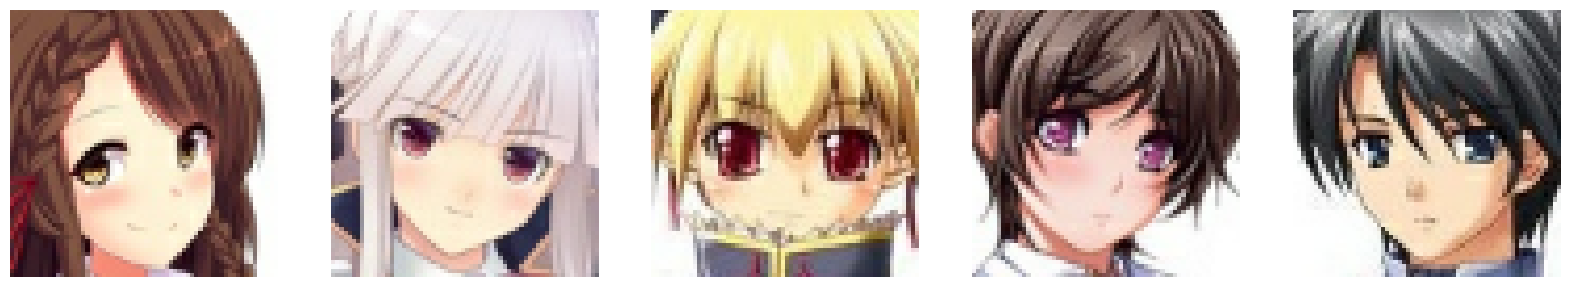

generated images


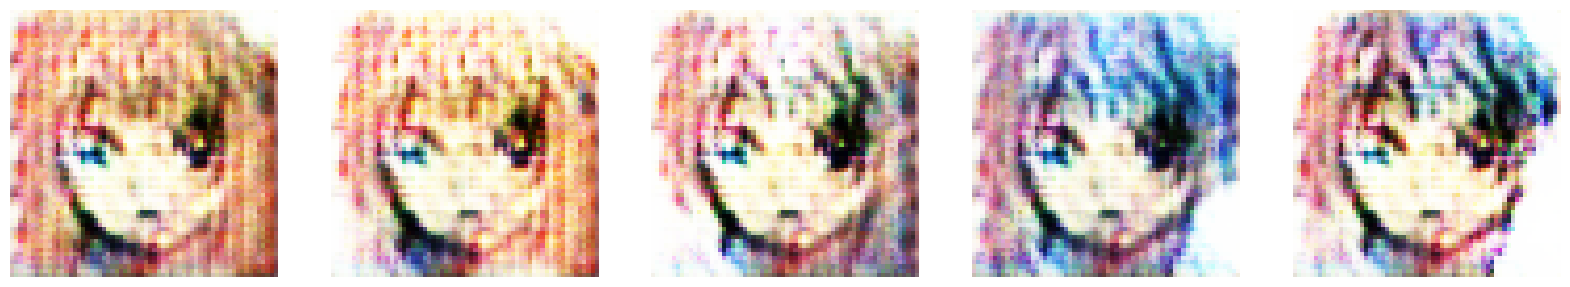

Time for epoch 13 is 64.08450293540955 sec


epoch 14:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 14, iteration 1


epoch 14:   1%|          | 1/157 [00:00<01:36,  1.62it/s]

epoch 14, iteration 2


epoch 14:   1%|▏         | 2/157 [00:01<01:15,  2.07it/s]

epoch 14, iteration 3


epoch 14:   2%|▏         | 3/157 [00:01<01:05,  2.36it/s]

epoch 14, iteration 4


epoch 14:   3%|▎         | 4/157 [00:01<01:01,  2.49it/s]

epoch 14, iteration 5


epoch 14:   3%|▎         | 5/157 [00:02<00:59,  2.56it/s]

epoch 14, iteration 6


epoch 14:   4%|▍         | 6/157 [00:02<00:57,  2.62it/s]

epoch 14, iteration 7


epoch 14:   4%|▍         | 7/157 [00:02<00:56,  2.66it/s]

epoch 14, iteration 8


epoch 14:   5%|▌         | 8/157 [00:03<00:54,  2.71it/s]

epoch 14, iteration 9


epoch 14:   6%|▌         | 9/157 [00:03<00:54,  2.73it/s]

epoch 14, iteration 10


epoch 14:   6%|▋         | 10/157 [00:03<00:53,  2.73it/s]

epoch 14, iteration 11


epoch 14:   7%|▋         | 11/157 [00:04<00:54,  2.70it/s]

epoch 14, iteration 12


epoch 14:   8%|▊         | 12/157 [00:04<00:53,  2.73it/s]

epoch 14, iteration 13


epoch 14:   8%|▊         | 13/157 [00:05<00:53,  2.71it/s]

epoch 14, iteration 14


epoch 14:   9%|▉         | 14/157 [00:05<00:54,  2.60it/s]

epoch 14, iteration 15


epoch 14:  10%|▉         | 15/157 [00:05<00:57,  2.47it/s]

epoch 14, iteration 16


epoch 14:  10%|█         | 16/157 [00:06<00:58,  2.42it/s]

epoch 14, iteration 17


epoch 14:  11%|█         | 17/157 [00:06<00:59,  2.34it/s]

epoch 14, iteration 18


epoch 14:  11%|█▏        | 18/157 [00:07<01:02,  2.23it/s]

epoch 14, iteration 19


epoch 14:  12%|█▏        | 19/157 [00:07<01:02,  2.22it/s]

epoch 14, iteration 20


epoch 14:  13%|█▎        | 20/157 [00:08<01:02,  2.20it/s]

epoch 14, iteration 21


epoch 14:  13%|█▎        | 21/157 [00:08<00:57,  2.36it/s]

epoch 14, iteration 22


epoch 14:  14%|█▍        | 22/157 [00:08<00:54,  2.49it/s]

epoch 14, iteration 23


epoch 14:  15%|█▍        | 23/157 [00:09<00:52,  2.55it/s]

epoch 14, iteration 24


epoch 14:  15%|█▌        | 24/157 [00:09<00:50,  2.63it/s]

epoch 14, iteration 25


epoch 14:  16%|█▌        | 25/157 [00:09<00:49,  2.67it/s]

epoch 14, iteration 26


epoch 14:  17%|█▋        | 26/157 [00:10<00:48,  2.70it/s]

epoch 14, iteration 27


epoch 14:  17%|█▋        | 27/157 [00:10<00:48,  2.70it/s]

epoch 14, iteration 28


epoch 14:  18%|█▊        | 28/157 [00:11<00:47,  2.72it/s]

epoch 14, iteration 29


epoch 14:  18%|█▊        | 29/157 [00:11<00:47,  2.70it/s]

epoch 14, iteration 30


epoch 14:  19%|█▉        | 30/157 [00:11<00:46,  2.72it/s]

epoch 14, iteration 31


epoch 14:  20%|█▉        | 31/157 [00:12<00:46,  2.74it/s]

epoch 14, iteration 32


epoch 14:  20%|██        | 32/157 [00:12<00:45,  2.74it/s]

epoch 14, iteration 33


epoch 14:  21%|██        | 33/157 [00:12<00:45,  2.75it/s]

epoch 14, iteration 34


epoch 14:  22%|██▏       | 34/157 [00:13<00:44,  2.75it/s]

epoch 14, iteration 35


epoch 14:  22%|██▏       | 35/157 [00:13<00:44,  2.75it/s]

epoch 14, iteration 36


epoch 14:  23%|██▎       | 36/157 [00:13<00:43,  2.76it/s]

epoch 14, iteration 37


epoch 14:  24%|██▎       | 37/157 [00:14<00:44,  2.72it/s]

epoch 14, iteration 38


epoch 14:  24%|██▍       | 38/157 [00:14<00:43,  2.73it/s]

epoch 14, iteration 39


epoch 14:  25%|██▍       | 39/157 [00:15<00:43,  2.74it/s]

epoch 14, iteration 40


epoch 14:  25%|██▌       | 40/157 [00:15<00:42,  2.74it/s]

epoch 14, iteration 41


epoch 14:  26%|██▌       | 41/157 [00:15<00:41,  2.76it/s]

epoch 14, iteration 42


epoch 14:  27%|██▋       | 42/157 [00:16<00:41,  2.77it/s]

epoch 14, iteration 43


epoch 14:  27%|██▋       | 43/157 [00:16<00:40,  2.79it/s]

epoch 14, iteration 44


epoch 14:  28%|██▊       | 44/157 [00:16<00:40,  2.80it/s]

epoch 14, iteration 45


epoch 14:  29%|██▊       | 45/157 [00:17<00:39,  2.81it/s]

epoch 14, iteration 46


epoch 14:  29%|██▉       | 46/157 [00:17<00:39,  2.79it/s]

epoch 14, iteration 47


epoch 14:  30%|██▉       | 47/157 [00:17<00:39,  2.79it/s]

epoch 14, iteration 48


epoch 14:  31%|███       | 48/157 [00:18<00:41,  2.64it/s]

epoch 14, iteration 49


epoch 14:  31%|███       | 49/157 [00:18<00:43,  2.51it/s]

epoch 14, iteration 50


epoch 14:  32%|███▏      | 50/157 [00:19<00:43,  2.44it/s]

epoch 14, iteration 51


epoch 14:  32%|███▏      | 51/157 [00:19<00:44,  2.40it/s]

epoch 14, iteration 52


epoch 14:  33%|███▎      | 52/157 [00:20<00:45,  2.32it/s]

epoch 14, iteration 53


epoch 14:  34%|███▍      | 53/157 [00:20<00:46,  2.23it/s]

epoch 14, iteration 54


epoch 14:  34%|███▍      | 54/157 [00:21<00:46,  2.21it/s]

epoch 14, iteration 55


epoch 14:  35%|███▌      | 55/157 [00:21<00:43,  2.33it/s]

epoch 14, iteration 56


epoch 14:  36%|███▌      | 56/157 [00:21<00:41,  2.44it/s]

epoch 14, iteration 57


epoch 14:  36%|███▋      | 57/157 [00:22<00:39,  2.52it/s]

epoch 14, iteration 58


epoch 14:  37%|███▋      | 58/157 [00:22<00:38,  2.60it/s]

epoch 14, iteration 59


epoch 14:  38%|███▊      | 59/157 [00:22<00:37,  2.64it/s]

epoch 14, iteration 60


epoch 14:  38%|███▊      | 60/157 [00:23<00:36,  2.68it/s]

epoch 14, iteration 61


epoch 14:  39%|███▉      | 61/157 [00:23<00:35,  2.73it/s]

epoch 14, iteration 62


epoch 14:  39%|███▉      | 62/157 [00:24<00:35,  2.71it/s]

epoch 14, iteration 63


epoch 14:  40%|████      | 63/157 [00:24<00:34,  2.75it/s]

epoch 14, iteration 64


epoch 14:  41%|████      | 64/157 [00:24<00:34,  2.71it/s]

epoch 14, iteration 65


epoch 14:  41%|████▏     | 65/157 [00:25<00:33,  2.73it/s]

epoch 14, iteration 66


epoch 14:  42%|████▏     | 66/157 [00:25<00:33,  2.73it/s]

epoch 14, iteration 67


epoch 14:  43%|████▎     | 67/157 [00:25<00:33,  2.72it/s]

epoch 14, iteration 68


epoch 14:  43%|████▎     | 68/157 [00:26<00:32,  2.74it/s]

epoch 14, iteration 69


epoch 14:  44%|████▍     | 69/157 [00:26<00:31,  2.77it/s]

epoch 14, iteration 70


epoch 14:  45%|████▍     | 70/157 [00:26<00:31,  2.76it/s]

epoch 14, iteration 71


epoch 14:  45%|████▌     | 71/157 [00:27<00:30,  2.78it/s]

epoch 14, iteration 72


epoch 14:  46%|████▌     | 72/157 [00:27<00:30,  2.78it/s]

epoch 14, iteration 73


epoch 14:  46%|████▋     | 73/157 [00:27<00:30,  2.79it/s]

epoch 14, iteration 74


epoch 14:  47%|████▋     | 74/157 [00:28<00:29,  2.77it/s]

epoch 14, iteration 75


epoch 14:  48%|████▊     | 75/157 [00:28<00:29,  2.74it/s]

epoch 14, iteration 76


epoch 14:  48%|████▊     | 76/157 [00:29<00:29,  2.73it/s]

epoch 14, iteration 77


epoch 14:  49%|████▉     | 77/157 [00:29<00:29,  2.75it/s]

epoch 14, iteration 78


epoch 14:  50%|████▉     | 78/157 [00:29<00:28,  2.78it/s]

epoch 14, iteration 79


epoch 14:  50%|█████     | 79/157 [00:30<00:28,  2.72it/s]

epoch 14, iteration 80


epoch 14:  51%|█████     | 80/157 [00:30<00:28,  2.73it/s]

epoch 14, iteration 81


epoch 14:  52%|█████▏    | 81/157 [00:30<00:28,  2.70it/s]

epoch 14, iteration 82


epoch 14:  52%|█████▏    | 82/157 [00:31<00:28,  2.63it/s]

epoch 14, iteration 83


epoch 14:  53%|█████▎    | 83/157 [00:31<00:29,  2.49it/s]

epoch 14, iteration 84


epoch 14:  54%|█████▎    | 84/157 [00:32<00:30,  2.38it/s]

epoch 14, iteration 85


epoch 14:  54%|█████▍    | 85/157 [00:32<00:30,  2.34it/s]

epoch 14, iteration 86


epoch 14:  55%|█████▍    | 86/157 [00:33<00:31,  2.26it/s]

epoch 14, iteration 87


epoch 14:  55%|█████▌    | 87/157 [00:33<00:32,  2.18it/s]

epoch 14, iteration 88


epoch 14:  56%|█████▌    | 88/157 [00:34<00:31,  2.19it/s]

epoch 14, iteration 89


epoch 14:  57%|█████▋    | 89/157 [00:34<00:28,  2.35it/s]

epoch 14, iteration 90


epoch 14:  57%|█████▋    | 90/157 [00:34<00:27,  2.43it/s]

epoch 14, iteration 91


epoch 14:  58%|█████▊    | 91/157 [00:35<00:26,  2.52it/s]

epoch 14, iteration 92


epoch 14:  59%|█████▊    | 92/157 [00:35<00:25,  2.59it/s]

epoch 14, iteration 93


epoch 14:  59%|█████▉    | 93/157 [00:35<00:24,  2.63it/s]

epoch 14, iteration 94


epoch 14:  60%|█████▉    | 94/157 [00:36<00:23,  2.67it/s]

epoch 14, iteration 95


epoch 14:  61%|██████    | 95/157 [00:36<00:23,  2.63it/s]

epoch 14, iteration 96


epoch 14:  61%|██████    | 96/157 [00:37<00:22,  2.69it/s]

epoch 14, iteration 97


epoch 14:  62%|██████▏   | 97/157 [00:37<00:22,  2.71it/s]

epoch 14, iteration 98


epoch 14:  62%|██████▏   | 98/157 [00:37<00:21,  2.73it/s]

epoch 14, iteration 99


epoch 14:  63%|██████▎   | 99/157 [00:38<00:21,  2.66it/s]

epoch 14, iteration 100


epoch 14:  64%|██████▎   | 100/157 [00:38<00:21,  2.65it/s]

epoch 14, iteration 101


epoch 14:  64%|██████▍   | 101/157 [00:38<00:20,  2.67it/s]

epoch 14, iteration 102


epoch 14:  65%|██████▍   | 102/157 [00:39<00:20,  2.67it/s]

epoch 14, iteration 103


epoch 14:  66%|██████▌   | 103/157 [00:39<00:20,  2.67it/s]

epoch 14, iteration 104


epoch 14:  66%|██████▌   | 104/157 [00:40<00:19,  2.70it/s]

epoch 14, iteration 105


epoch 14:  67%|██████▋   | 105/157 [00:40<00:19,  2.70it/s]

epoch 14, iteration 106


epoch 14:  68%|██████▊   | 106/157 [00:40<00:18,  2.71it/s]

epoch 14, iteration 107


epoch 14:  68%|██████▊   | 107/157 [00:41<00:18,  2.75it/s]

epoch 14, iteration 108


epoch 14:  69%|██████▉   | 108/157 [00:41<00:17,  2.75it/s]

epoch 14, iteration 109


epoch 14:  69%|██████▉   | 109/157 [00:41<00:17,  2.76it/s]

epoch 14, iteration 110


epoch 14:  70%|███████   | 110/157 [00:42<00:17,  2.73it/s]

epoch 14, iteration 111


epoch 14:  71%|███████   | 111/157 [00:42<00:16,  2.74it/s]

epoch 14, iteration 112


epoch 14:  71%|███████▏  | 112/157 [00:42<00:16,  2.75it/s]

epoch 14, iteration 113


epoch 14:  72%|███████▏  | 113/157 [00:43<00:16,  2.73it/s]

epoch 14, iteration 114


epoch 14:  73%|███████▎  | 114/157 [00:43<00:15,  2.73it/s]

epoch 14, iteration 115


epoch 14:  73%|███████▎  | 115/157 [00:44<00:15,  2.69it/s]

epoch 14, iteration 116


epoch 14:  74%|███████▍  | 116/157 [00:44<00:16,  2.51it/s]

epoch 14, iteration 117


epoch 14:  75%|███████▍  | 117/157 [00:44<00:16,  2.42it/s]

epoch 14, iteration 118


epoch 14:  75%|███████▌  | 118/157 [00:45<00:16,  2.32it/s]

epoch 14, iteration 119


epoch 14:  76%|███████▌  | 119/157 [00:45<00:16,  2.27it/s]

epoch 14, iteration 120


epoch 14:  76%|███████▋  | 120/157 [00:46<00:16,  2.21it/s]

epoch 14, iteration 121


epoch 14:  77%|███████▋  | 121/157 [00:46<00:16,  2.18it/s]

epoch 14, iteration 122


epoch 14:  78%|███████▊  | 122/157 [00:47<00:15,  2.33it/s]

epoch 14, iteration 123


epoch 14:  78%|███████▊  | 123/157 [00:47<00:14,  2.43it/s]

epoch 14, iteration 124


epoch 14:  79%|███████▉  | 124/157 [00:47<00:13,  2.51it/s]

epoch 14, iteration 125


epoch 14:  80%|███████▉  | 125/157 [00:48<00:12,  2.59it/s]

epoch 14, iteration 126


epoch 14:  80%|████████  | 126/157 [00:48<00:11,  2.60it/s]

epoch 14, iteration 127


epoch 14:  81%|████████  | 127/157 [00:49<00:11,  2.64it/s]

epoch 14, iteration 128


epoch 14:  82%|████████▏ | 128/157 [00:49<00:10,  2.66it/s]

epoch 14, iteration 129


epoch 14:  82%|████████▏ | 129/157 [00:49<00:10,  2.67it/s]

epoch 14, iteration 130


epoch 14:  83%|████████▎ | 130/157 [00:50<00:09,  2.70it/s]

epoch 14, iteration 131


epoch 14:  83%|████████▎ | 131/157 [00:50<00:09,  2.72it/s]

epoch 14, iteration 132


epoch 14:  84%|████████▍ | 132/157 [00:50<00:09,  2.73it/s]

epoch 14, iteration 133


epoch 14:  85%|████████▍ | 133/157 [00:51<00:08,  2.75it/s]

epoch 14, iteration 134


epoch 14:  85%|████████▌ | 134/157 [00:51<00:08,  2.77it/s]

epoch 14, iteration 135


epoch 14:  86%|████████▌ | 135/157 [00:51<00:07,  2.77it/s]

epoch 14, iteration 136


epoch 14:  87%|████████▋ | 136/157 [00:52<00:07,  2.70it/s]

epoch 14, iteration 137


epoch 14:  87%|████████▋ | 137/157 [00:52<00:07,  2.66it/s]

epoch 14, iteration 138


epoch 14:  88%|████████▊ | 138/157 [00:53<00:07,  2.68it/s]

epoch 14, iteration 139


epoch 14:  89%|████████▊ | 139/157 [00:53<00:06,  2.72it/s]

epoch 14, iteration 140


epoch 14:  89%|████████▉ | 140/157 [00:53<00:06,  2.72it/s]

epoch 14, iteration 141


epoch 14:  90%|████████▉ | 141/157 [00:54<00:05,  2.73it/s]

epoch 14, iteration 142


epoch 14:  90%|█████████ | 142/157 [00:54<00:05,  2.72it/s]

epoch 14, iteration 143


epoch 14:  91%|█████████ | 143/157 [00:54<00:05,  2.71it/s]

epoch 14, iteration 144


epoch 14:  92%|█████████▏| 144/157 [00:55<00:04,  2.71it/s]

epoch 14, iteration 145


epoch 14:  92%|█████████▏| 145/157 [00:55<00:04,  2.73it/s]

epoch 14, iteration 146


epoch 14:  93%|█████████▎| 146/157 [00:56<00:04,  2.72it/s]

epoch 14, iteration 147


epoch 14:  94%|█████████▎| 147/157 [00:56<00:03,  2.74it/s]

epoch 14, iteration 148


epoch 14:  94%|█████████▍| 148/157 [00:56<00:03,  2.75it/s]

epoch 14, iteration 149


epoch 14:  95%|█████████▍| 149/157 [00:57<00:03,  2.57it/s]

epoch 14, iteration 150


epoch 14:  96%|█████████▌| 150/157 [00:57<00:02,  2.49it/s]

epoch 14, iteration 151


epoch 14:  96%|█████████▌| 151/157 [00:58<00:02,  2.47it/s]

epoch 14, iteration 152


epoch 14:  97%|█████████▋| 152/157 [00:58<00:02,  2.41it/s]

epoch 14, iteration 153


epoch 14:  97%|█████████▋| 153/157 [00:58<00:01,  2.36it/s]

epoch 14, iteration 154


epoch 14:  98%|█████████▊| 154/157 [00:59<00:01,  2.35it/s]

epoch 14, iteration 155


epoch 14:  99%|█████████▊| 155/157 [00:59<00:00,  2.34it/s]

epoch 14, iteration 156


epoch 14:  99%|█████████▉| 156/157 [01:00<00:00,  2.46it/s]

epoch 14, iteration 157


epoch 14: 100%|██████████| 157/157 [01:00<00:00,  2.60it/s]


orignal images


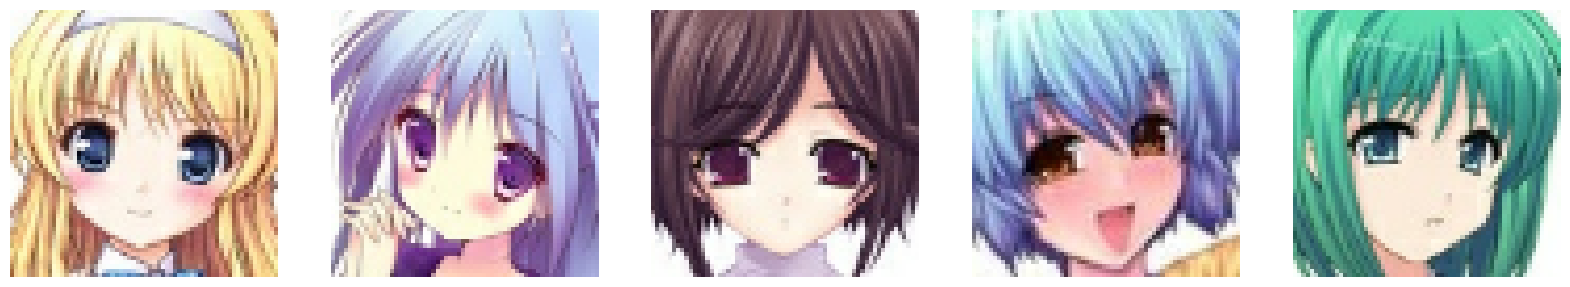

generated images


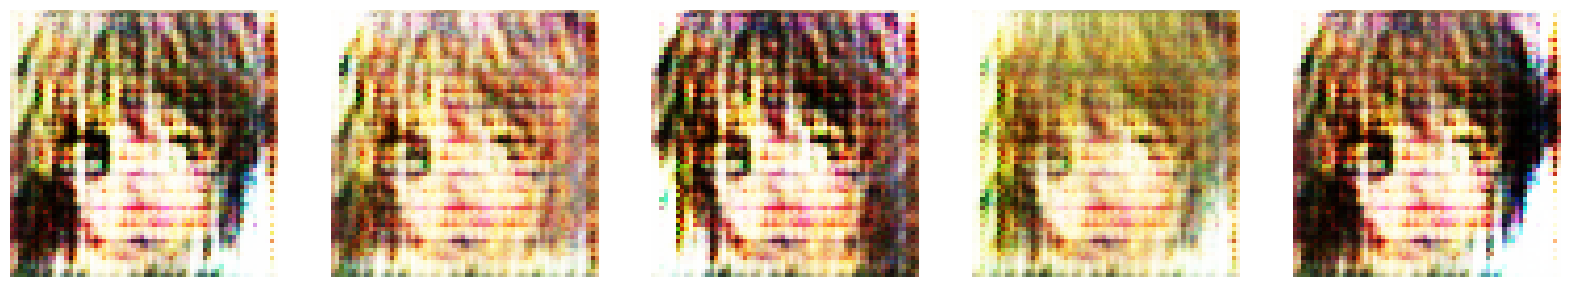

Time for epoch 14 is 63.995487451553345 sec


epoch 15:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 15, iteration 1


epoch 15:   1%|          | 1/157 [00:00<01:40,  1.55it/s]

epoch 15, iteration 2


epoch 15:   1%|▏         | 2/157 [00:01<01:15,  2.05it/s]

epoch 15, iteration 3


epoch 15:   2%|▏         | 3/157 [00:01<01:07,  2.30it/s]

epoch 15, iteration 4


epoch 15:   3%|▎         | 4/157 [00:01<01:02,  2.45it/s]

epoch 15, iteration 5


epoch 15:   3%|▎         | 5/157 [00:02<00:59,  2.57it/s]

epoch 15, iteration 6


epoch 15:   4%|▍         | 6/157 [00:02<00:57,  2.61it/s]

epoch 15, iteration 7


epoch 15:   4%|▍         | 7/157 [00:02<00:56,  2.66it/s]

epoch 15, iteration 8


epoch 15:   5%|▌         | 8/157 [00:03<00:55,  2.66it/s]

epoch 15, iteration 9


epoch 15:   6%|▌         | 9/157 [00:03<00:54,  2.70it/s]

epoch 15, iteration 10


epoch 15:   6%|▋         | 10/157 [00:03<00:54,  2.68it/s]

epoch 15, iteration 11


epoch 15:   7%|▋         | 11/157 [00:04<00:55,  2.65it/s]

epoch 15, iteration 12


epoch 15:   8%|▊         | 12/157 [00:04<00:54,  2.68it/s]

epoch 15, iteration 13


epoch 15:   8%|▊         | 13/157 [00:05<00:53,  2.71it/s]

epoch 15, iteration 14


epoch 15:   9%|▉         | 14/157 [00:05<00:52,  2.71it/s]

epoch 15, iteration 15


epoch 15:  10%|▉         | 15/157 [00:05<00:52,  2.72it/s]

epoch 15, iteration 16


epoch 15:  10%|█         | 16/157 [00:06<00:55,  2.56it/s]

epoch 15, iteration 17


epoch 15:  11%|█         | 17/157 [00:06<00:56,  2.46it/s]

epoch 15, iteration 18


epoch 15:  11%|█▏        | 18/157 [00:07<00:57,  2.42it/s]

epoch 15, iteration 19


epoch 15:  12%|█▏        | 19/157 [00:07<01:00,  2.28it/s]

epoch 15, iteration 20


epoch 15:  13%|█▎        | 20/157 [00:08<01:01,  2.23it/s]

epoch 15, iteration 21


epoch 15:  13%|█▎        | 21/157 [00:08<01:02,  2.17it/s]

epoch 15, iteration 22


epoch 15:  14%|█▍        | 22/157 [00:08<00:59,  2.25it/s]

epoch 15, iteration 23


epoch 15:  15%|█▍        | 23/157 [00:09<00:56,  2.36it/s]

epoch 15, iteration 24


epoch 15:  15%|█▌        | 24/157 [00:09<00:54,  2.45it/s]

epoch 15, iteration 25


epoch 15:  16%|█▌        | 25/157 [00:10<00:51,  2.55it/s]

epoch 15, iteration 26


epoch 15:  17%|█▋        | 26/157 [00:10<00:50,  2.61it/s]

epoch 15, iteration 27


epoch 15:  17%|█▋        | 27/157 [00:10<00:49,  2.62it/s]

epoch 15, iteration 28


epoch 15:  18%|█▊        | 28/157 [00:11<00:48,  2.65it/s]

epoch 15, iteration 29


epoch 15:  18%|█▊        | 29/157 [00:11<00:48,  2.66it/s]

epoch 15, iteration 30


epoch 15:  19%|█▉        | 30/157 [00:11<00:47,  2.70it/s]

epoch 15, iteration 31


epoch 15:  20%|█▉        | 31/157 [00:12<00:46,  2.70it/s]

epoch 15, iteration 32


epoch 15:  20%|██        | 32/157 [00:12<00:46,  2.68it/s]

epoch 15, iteration 33


epoch 15:  21%|██        | 33/157 [00:13<00:45,  2.70it/s]

epoch 15, iteration 34


epoch 15:  22%|██▏       | 34/157 [00:13<00:45,  2.72it/s]

epoch 15, iteration 35


epoch 15:  22%|██▏       | 35/157 [00:13<00:44,  2.73it/s]

epoch 15, iteration 36


epoch 15:  23%|██▎       | 36/157 [00:14<00:43,  2.75it/s]

epoch 15, iteration 37


epoch 15:  24%|██▎       | 37/157 [00:14<00:43,  2.76it/s]

epoch 15, iteration 38


epoch 15:  24%|██▍       | 38/157 [00:14<00:43,  2.75it/s]

epoch 15, iteration 39


epoch 15:  25%|██▍       | 39/157 [00:15<00:42,  2.76it/s]

epoch 15, iteration 40


epoch 15:  25%|██▌       | 40/157 [00:15<00:42,  2.75it/s]

epoch 15, iteration 41


epoch 15:  26%|██▌       | 41/157 [00:15<00:42,  2.71it/s]

epoch 15, iteration 42


epoch 15:  27%|██▋       | 42/157 [00:16<00:42,  2.69it/s]

epoch 15, iteration 43


epoch 15:  27%|██▋       | 43/157 [00:16<00:42,  2.66it/s]

epoch 15, iteration 44


epoch 15:  28%|██▊       | 44/157 [00:17<00:41,  2.69it/s]

epoch 15, iteration 45


epoch 15:  29%|██▊       | 45/157 [00:17<00:41,  2.71it/s]

epoch 15, iteration 46


epoch 15:  29%|██▉       | 46/157 [00:17<00:40,  2.71it/s]

epoch 15, iteration 47


epoch 15:  30%|██▉       | 47/157 [00:18<00:40,  2.73it/s]

epoch 15, iteration 48


epoch 15:  31%|███       | 48/157 [00:18<00:39,  2.75it/s]

epoch 15, iteration 49


epoch 15:  31%|███       | 49/157 [00:18<00:41,  2.62it/s]

epoch 15, iteration 50


epoch 15:  32%|███▏      | 50/157 [00:19<00:42,  2.50it/s]

epoch 15, iteration 51


epoch 15:  32%|███▏      | 51/157 [00:19<00:45,  2.34it/s]

epoch 15, iteration 52


epoch 15:  33%|███▎      | 52/157 [00:20<00:44,  2.34it/s]

epoch 15, iteration 53


epoch 15:  34%|███▍      | 53/157 [00:20<00:46,  2.23it/s]

epoch 15, iteration 54


epoch 15:  34%|███▍      | 54/157 [00:21<00:47,  2.19it/s]

epoch 15, iteration 55


epoch 15:  35%|███▌      | 55/157 [00:21<00:47,  2.15it/s]

epoch 15, iteration 56


epoch 15:  36%|███▌      | 56/157 [00:22<00:45,  2.21it/s]

epoch 15, iteration 57


epoch 15:  36%|███▋      | 57/157 [00:22<00:42,  2.35it/s]

epoch 15, iteration 58


epoch 15:  37%|███▋      | 58/157 [00:22<00:40,  2.43it/s]

epoch 15, iteration 59


epoch 15:  38%|███▊      | 59/157 [00:23<00:38,  2.52it/s]

epoch 15, iteration 60


epoch 15:  38%|███▊      | 60/157 [00:23<00:37,  2.59it/s]

epoch 15, iteration 61


epoch 15:  39%|███▉      | 61/157 [00:24<00:36,  2.63it/s]

epoch 15, iteration 62


epoch 15:  39%|███▉      | 62/157 [00:24<00:35,  2.65it/s]

epoch 15, iteration 63


epoch 15:  40%|████      | 63/157 [00:24<00:35,  2.63it/s]

epoch 15, iteration 64


epoch 15:  41%|████      | 64/157 [00:25<00:35,  2.63it/s]

epoch 15, iteration 65


epoch 15:  41%|████▏     | 65/157 [00:25<00:34,  2.67it/s]

epoch 15, iteration 66


epoch 15:  42%|████▏     | 66/157 [00:25<00:33,  2.71it/s]

epoch 15, iteration 67


epoch 15:  43%|████▎     | 67/157 [00:26<00:33,  2.71it/s]

epoch 15, iteration 68


epoch 15:  43%|████▎     | 68/157 [00:26<00:33,  2.69it/s]

epoch 15, iteration 69


epoch 15:  44%|████▍     | 69/157 [00:26<00:32,  2.70it/s]

epoch 15, iteration 70


epoch 15:  45%|████▍     | 70/157 [00:27<00:32,  2.70it/s]

epoch 15, iteration 71


epoch 15:  45%|████▌     | 71/157 [00:27<00:31,  2.69it/s]

epoch 15, iteration 72


epoch 15:  46%|████▌     | 72/157 [00:28<00:31,  2.69it/s]

epoch 15, iteration 73


epoch 15:  46%|████▋     | 73/157 [00:28<00:31,  2.70it/s]

epoch 15, iteration 74


epoch 15:  47%|████▋     | 74/157 [00:28<00:30,  2.71it/s]

epoch 15, iteration 75


epoch 15:  48%|████▊     | 75/157 [00:29<00:30,  2.71it/s]

epoch 15, iteration 76


epoch 15:  48%|████▊     | 76/157 [00:29<00:29,  2.73it/s]

epoch 15, iteration 77


epoch 15:  49%|████▉     | 77/157 [00:29<00:29,  2.71it/s]

epoch 15, iteration 78


epoch 15:  50%|████▉     | 78/157 [00:30<00:29,  2.69it/s]

epoch 15, iteration 79


epoch 15:  50%|█████     | 79/157 [00:30<00:28,  2.71it/s]

epoch 15, iteration 80


epoch 15:  51%|█████     | 80/157 [00:31<00:28,  2.71it/s]

epoch 15, iteration 81


epoch 15:  52%|█████▏    | 81/157 [00:31<00:27,  2.73it/s]

epoch 15, iteration 82


epoch 15:  52%|█████▏    | 82/157 [00:31<00:27,  2.71it/s]

epoch 15, iteration 83


epoch 15:  53%|█████▎    | 83/157 [00:32<00:28,  2.59it/s]

epoch 15, iteration 84


epoch 15:  54%|█████▎    | 84/157 [00:32<00:30,  2.43it/s]

epoch 15, iteration 85


epoch 15:  54%|█████▍    | 85/157 [00:33<00:30,  2.38it/s]

epoch 15, iteration 86


epoch 15:  55%|█████▍    | 86/157 [00:33<00:30,  2.31it/s]

epoch 15, iteration 87


epoch 15:  55%|█████▌    | 87/157 [00:34<00:31,  2.21it/s]

epoch 15, iteration 88


epoch 15:  56%|█████▌    | 88/157 [00:34<00:31,  2.19it/s]

epoch 15, iteration 89


epoch 15:  57%|█████▋    | 89/157 [00:35<00:31,  2.17it/s]

epoch 15, iteration 90


epoch 15:  57%|█████▋    | 90/157 [00:35<00:29,  2.31it/s]

epoch 15, iteration 91


epoch 15:  58%|█████▊    | 91/157 [00:35<00:27,  2.40it/s]

epoch 15, iteration 92


epoch 15:  59%|█████▊    | 92/157 [00:36<00:26,  2.49it/s]

epoch 15, iteration 93


epoch 15:  59%|█████▉    | 93/157 [00:36<00:25,  2.54it/s]

epoch 15, iteration 94


epoch 15:  60%|█████▉    | 94/157 [00:36<00:24,  2.61it/s]

epoch 15, iteration 95


epoch 15:  61%|██████    | 95/157 [00:37<00:23,  2.64it/s]

epoch 15, iteration 96


epoch 15:  61%|██████    | 96/157 [00:37<00:23,  2.65it/s]

epoch 15, iteration 97


epoch 15:  62%|██████▏   | 97/157 [00:37<00:22,  2.67it/s]

epoch 15, iteration 98


epoch 15:  62%|██████▏   | 98/157 [00:38<00:22,  2.66it/s]

epoch 15, iteration 99


epoch 15:  63%|██████▎   | 99/157 [00:38<00:21,  2.70it/s]

epoch 15, iteration 100


epoch 15:  64%|██████▎   | 100/157 [00:39<00:20,  2.71it/s]

epoch 15, iteration 101


epoch 15:  64%|██████▍   | 101/157 [00:39<00:20,  2.74it/s]

epoch 15, iteration 102


epoch 15:  65%|██████▍   | 102/157 [00:39<00:20,  2.75it/s]

epoch 15, iteration 103


epoch 15:  66%|██████▌   | 103/157 [00:40<00:19,  2.74it/s]

epoch 15, iteration 104


epoch 15:  66%|██████▌   | 104/157 [00:40<00:19,  2.69it/s]

epoch 15, iteration 105


epoch 15:  67%|██████▋   | 105/157 [00:40<00:19,  2.68it/s]

epoch 15, iteration 106


epoch 15:  68%|██████▊   | 106/157 [00:41<00:18,  2.70it/s]

epoch 15, iteration 107


epoch 15:  68%|██████▊   | 107/157 [00:41<00:18,  2.66it/s]

epoch 15, iteration 108


epoch 15:  69%|██████▉   | 108/157 [00:42<00:18,  2.66it/s]

epoch 15, iteration 109


epoch 15:  69%|██████▉   | 109/157 [00:42<00:17,  2.70it/s]

epoch 15, iteration 110


epoch 15:  70%|███████   | 110/157 [00:42<00:17,  2.68it/s]

epoch 15, iteration 111


epoch 15:  71%|███████   | 111/157 [00:43<00:17,  2.69it/s]

epoch 15, iteration 112


epoch 15:  71%|███████▏  | 112/157 [00:43<00:16,  2.71it/s]

epoch 15, iteration 113


epoch 15:  72%|███████▏  | 113/157 [00:43<00:16,  2.72it/s]

epoch 15, iteration 114


epoch 15:  73%|███████▎  | 114/157 [00:44<00:15,  2.75it/s]

epoch 15, iteration 115


epoch 15:  73%|███████▎  | 115/157 [00:44<00:15,  2.74it/s]

epoch 15, iteration 116


epoch 15:  74%|███████▍  | 116/157 [00:44<00:14,  2.74it/s]

epoch 15, iteration 117


epoch 15:  75%|███████▍  | 117/157 [00:45<00:15,  2.53it/s]

epoch 15, iteration 118


epoch 15:  75%|███████▌  | 118/157 [00:45<00:15,  2.46it/s]

epoch 15, iteration 119


epoch 15:  76%|███████▌  | 119/157 [00:46<00:15,  2.42it/s]

epoch 15, iteration 120


epoch 15:  76%|███████▋  | 120/157 [00:46<00:16,  2.30it/s]

epoch 15, iteration 121


epoch 15:  77%|███████▋  | 121/157 [00:47<00:16,  2.20it/s]

epoch 15, iteration 122


epoch 15:  78%|███████▊  | 122/157 [00:47<00:16,  2.17it/s]

epoch 15, iteration 123


epoch 15:  78%|███████▊  | 123/157 [00:48<00:15,  2.23it/s]

epoch 15, iteration 124


epoch 15:  79%|███████▉  | 124/157 [00:48<00:13,  2.36it/s]

epoch 15, iteration 125


epoch 15:  80%|███████▉  | 125/157 [00:48<00:12,  2.47it/s]

epoch 15, iteration 126


epoch 15:  80%|████████  | 126/157 [00:49<00:12,  2.54it/s]

epoch 15, iteration 127


epoch 15:  81%|████████  | 127/157 [00:49<00:11,  2.58it/s]

epoch 15, iteration 128


epoch 15:  82%|████████▏ | 128/157 [00:50<00:11,  2.60it/s]

epoch 15, iteration 129


epoch 15:  82%|████████▏ | 129/157 [00:50<00:10,  2.66it/s]

epoch 15, iteration 130


epoch 15:  83%|████████▎ | 130/157 [00:50<00:10,  2.69it/s]

epoch 15, iteration 131


epoch 15:  83%|████████▎ | 131/157 [00:51<00:09,  2.67it/s]

epoch 15, iteration 132


epoch 15:  84%|████████▍ | 132/157 [00:51<00:09,  2.71it/s]

epoch 15, iteration 133


epoch 15:  85%|████████▍ | 133/157 [00:51<00:08,  2.74it/s]

epoch 15, iteration 134


epoch 15:  85%|████████▌ | 134/157 [00:52<00:08,  2.73it/s]

epoch 15, iteration 135


epoch 15:  86%|████████▌ | 135/157 [00:52<00:07,  2.76it/s]

epoch 15, iteration 136


epoch 15:  87%|████████▋ | 136/157 [00:52<00:07,  2.72it/s]

epoch 15, iteration 137


epoch 15:  87%|████████▋ | 137/157 [00:53<00:07,  2.70it/s]

epoch 15, iteration 138


epoch 15:  88%|████████▊ | 138/157 [00:53<00:07,  2.70it/s]

epoch 15, iteration 139


epoch 15:  89%|████████▊ | 139/157 [00:54<00:06,  2.71it/s]

epoch 15, iteration 140


epoch 15:  89%|████████▉ | 140/157 [00:54<00:06,  2.71it/s]

epoch 15, iteration 141


epoch 15:  90%|████████▉ | 141/157 [00:54<00:05,  2.68it/s]

epoch 15, iteration 142


epoch 15:  90%|█████████ | 142/157 [00:55<00:05,  2.67it/s]

epoch 15, iteration 143


epoch 15:  91%|█████████ | 143/157 [00:55<00:05,  2.70it/s]

epoch 15, iteration 144


epoch 15:  92%|█████████▏| 144/157 [00:55<00:04,  2.73it/s]

epoch 15, iteration 145


epoch 15:  92%|█████████▏| 145/157 [00:56<00:04,  2.73it/s]

epoch 15, iteration 146


epoch 15:  93%|█████████▎| 146/157 [00:56<00:04,  2.75it/s]

epoch 15, iteration 147


epoch 15:  94%|█████████▎| 147/157 [00:57<00:03,  2.73it/s]

epoch 15, iteration 148


epoch 15:  94%|█████████▍| 148/157 [00:57<00:03,  2.73it/s]

epoch 15, iteration 149


epoch 15:  95%|█████████▍| 149/157 [00:57<00:02,  2.72it/s]

epoch 15, iteration 150


epoch 15:  96%|█████████▌| 150/157 [00:58<00:02,  2.60it/s]

epoch 15, iteration 151


epoch 15:  96%|█████████▌| 151/157 [00:58<00:02,  2.50it/s]

epoch 15, iteration 152


epoch 15:  97%|█████████▋| 152/157 [00:59<00:02,  2.49it/s]

epoch 15, iteration 153


epoch 15:  97%|█████████▋| 153/157 [00:59<00:01,  2.45it/s]

epoch 15, iteration 154


epoch 15:  98%|█████████▊| 154/157 [00:59<00:01,  2.37it/s]

epoch 15, iteration 155


epoch 15:  99%|█████████▊| 155/157 [01:00<00:00,  2.37it/s]

epoch 15, iteration 156


epoch 15:  99%|█████████▉| 156/157 [01:00<00:00,  2.29it/s]

epoch 15, iteration 157


epoch 15: 100%|██████████| 157/157 [01:01<00:00,  2.57it/s]


orignal images


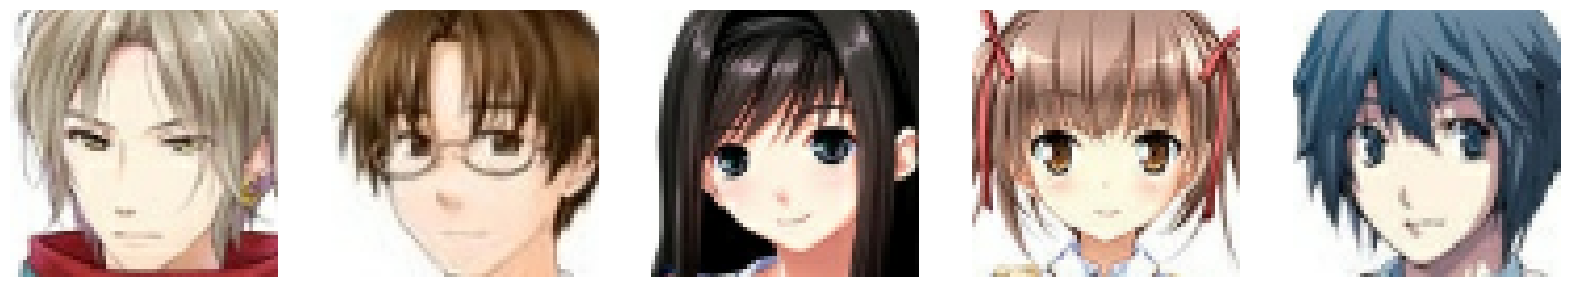

generated images


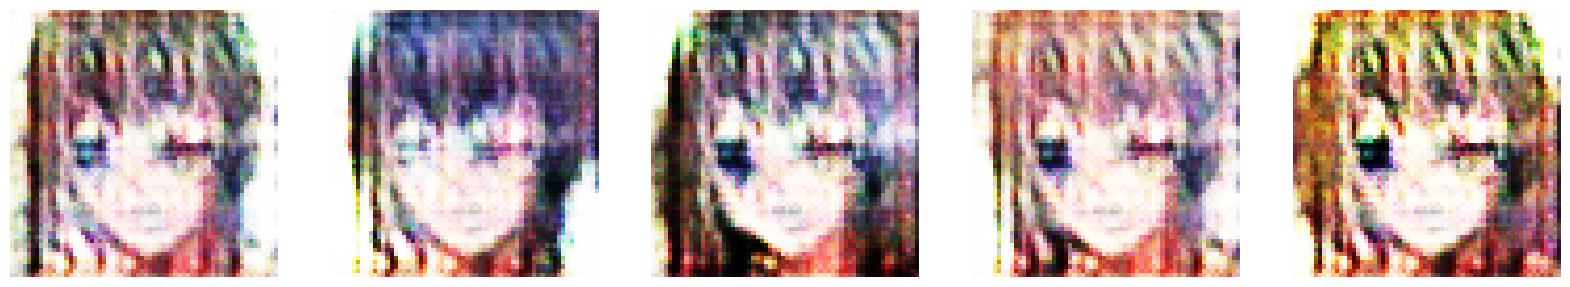

Time for epoch 15 is 64.72929620742798 sec


epoch 16:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 16, iteration 1


epoch 16:   1%|          | 1/157 [00:00<01:43,  1.50it/s]

epoch 16, iteration 2


epoch 16:   1%|▏         | 2/157 [00:01<01:17,  1.99it/s]

epoch 16, iteration 3


epoch 16:   2%|▏         | 3/157 [00:01<01:07,  2.29it/s]

epoch 16, iteration 4


epoch 16:   3%|▎         | 4/157 [00:01<01:01,  2.47it/s]

epoch 16, iteration 5


epoch 16:   3%|▎         | 5/157 [00:02<00:59,  2.54it/s]

epoch 16, iteration 6


epoch 16:   4%|▍         | 6/157 [00:02<00:57,  2.62it/s]

epoch 16, iteration 7


epoch 16:   4%|▍         | 7/157 [00:02<00:56,  2.65it/s]

epoch 16, iteration 8


epoch 16:   5%|▌         | 8/157 [00:03<00:55,  2.66it/s]

epoch 16, iteration 9


epoch 16:   6%|▌         | 9/157 [00:03<00:55,  2.69it/s]

epoch 16, iteration 10


epoch 16:   6%|▋         | 10/157 [00:03<00:54,  2.68it/s]

epoch 16, iteration 11


epoch 16:   7%|▋         | 11/157 [00:04<00:54,  2.69it/s]

epoch 16, iteration 12


epoch 16:   8%|▊         | 12/157 [00:04<00:54,  2.66it/s]

epoch 16, iteration 13


epoch 16:   8%|▊         | 13/157 [00:05<00:54,  2.63it/s]

epoch 16, iteration 14


epoch 16:   9%|▉         | 14/157 [00:05<00:53,  2.66it/s]

epoch 16, iteration 15


epoch 16:  10%|▉         | 15/157 [00:05<00:52,  2.68it/s]

epoch 16, iteration 16


epoch 16:  10%|█         | 16/157 [00:06<00:53,  2.66it/s]

epoch 16, iteration 17


epoch 16:  11%|█         | 17/157 [00:06<00:56,  2.47it/s]

epoch 16, iteration 18


epoch 16:  11%|█▏        | 18/157 [00:07<00:58,  2.37it/s]

epoch 16, iteration 19


epoch 16:  12%|█▏        | 19/157 [00:07<00:59,  2.32it/s]

epoch 16, iteration 20


epoch 16:  13%|█▎        | 20/157 [00:08<01:00,  2.28it/s]

epoch 16, iteration 21


epoch 16:  13%|█▎        | 21/157 [00:08<01:02,  2.17it/s]

epoch 16, iteration 22


epoch 16:  14%|█▍        | 22/157 [00:09<01:04,  2.10it/s]

epoch 16, iteration 23


epoch 16:  15%|█▍        | 23/157 [00:09<00:59,  2.24it/s]

epoch 16, iteration 24


epoch 16:  15%|█▌        | 24/157 [00:09<00:55,  2.38it/s]

epoch 16, iteration 25


epoch 16:  16%|█▌        | 25/157 [00:10<00:53,  2.46it/s]

epoch 16, iteration 26


epoch 16:  17%|█▋        | 26/157 [00:10<00:51,  2.54it/s]

epoch 16, iteration 27


epoch 16:  17%|█▋        | 27/157 [00:10<00:50,  2.58it/s]

epoch 16, iteration 28


epoch 16:  18%|█▊        | 28/157 [00:11<00:49,  2.61it/s]

epoch 16, iteration 29


epoch 16:  18%|█▊        | 29/157 [00:11<00:48,  2.65it/s]

epoch 16, iteration 30


epoch 16:  19%|█▉        | 30/157 [00:12<00:47,  2.65it/s]

epoch 16, iteration 31


epoch 16:  20%|█▉        | 31/157 [00:12<00:47,  2.65it/s]

epoch 16, iteration 32


epoch 16:  20%|██        | 32/157 [00:12<00:46,  2.69it/s]

epoch 16, iteration 33


epoch 16:  21%|██        | 33/157 [00:13<00:45,  2.71it/s]

epoch 16, iteration 34


epoch 16:  22%|██▏       | 34/157 [00:13<00:45,  2.71it/s]

epoch 16, iteration 35


epoch 16:  22%|██▏       | 35/157 [00:13<00:44,  2.74it/s]

epoch 16, iteration 36


epoch 16:  23%|██▎       | 36/157 [00:14<00:44,  2.72it/s]

epoch 16, iteration 37


epoch 16:  24%|██▎       | 37/157 [00:14<00:44,  2.72it/s]

epoch 16, iteration 38


epoch 16:  24%|██▍       | 38/157 [00:15<00:43,  2.72it/s]

epoch 16, iteration 39


epoch 16:  25%|██▍       | 39/157 [00:15<00:43,  2.69it/s]

epoch 16, iteration 40


epoch 16:  25%|██▌       | 40/157 [00:15<00:43,  2.67it/s]

epoch 16, iteration 41


epoch 16:  26%|██▌       | 41/157 [00:16<00:43,  2.69it/s]

epoch 16, iteration 42


epoch 16:  27%|██▋       | 42/157 [00:16<00:42,  2.69it/s]

epoch 16, iteration 43


epoch 16:  27%|██▋       | 43/157 [00:16<00:41,  2.71it/s]

epoch 16, iteration 44


epoch 16:  28%|██▊       | 44/157 [00:17<00:41,  2.72it/s]

epoch 16, iteration 45


epoch 16:  29%|██▊       | 45/157 [00:17<00:41,  2.73it/s]

epoch 16, iteration 46


epoch 16:  29%|██▉       | 46/157 [00:17<00:40,  2.73it/s]

epoch 16, iteration 47


epoch 16:  30%|██▉       | 47/157 [00:18<00:40,  2.72it/s]

epoch 16, iteration 48


epoch 16:  31%|███       | 48/157 [00:18<00:40,  2.72it/s]

epoch 16, iteration 49


epoch 16:  31%|███       | 49/157 [00:19<00:39,  2.71it/s]

epoch 16, iteration 50


epoch 16:  32%|███▏      | 50/157 [00:19<00:42,  2.54it/s]

epoch 16, iteration 51


epoch 16:  32%|███▏      | 51/157 [00:19<00:44,  2.41it/s]

epoch 16, iteration 52


epoch 16:  33%|███▎      | 52/157 [00:20<00:44,  2.35it/s]

epoch 16, iteration 53


epoch 16:  34%|███▍      | 53/157 [00:20<00:45,  2.29it/s]

epoch 16, iteration 54


epoch 16:  34%|███▍      | 54/157 [00:21<00:46,  2.21it/s]

epoch 16, iteration 55


epoch 16:  35%|███▌      | 55/157 [00:21<00:47,  2.14it/s]

epoch 16, iteration 56


epoch 16:  36%|███▌      | 56/157 [00:22<00:45,  2.24it/s]

epoch 16, iteration 57


epoch 16:  36%|███▋      | 57/157 [00:22<00:42,  2.35it/s]

epoch 16, iteration 58


epoch 16:  37%|███▋      | 58/157 [00:23<00:40,  2.46it/s]

epoch 16, iteration 59


epoch 16:  38%|███▊      | 59/157 [00:23<00:38,  2.52it/s]

epoch 16, iteration 60


epoch 16:  38%|███▊      | 60/157 [00:23<00:37,  2.55it/s]

epoch 16, iteration 61


epoch 16:  39%|███▉      | 61/157 [00:24<00:36,  2.62it/s]

epoch 16, iteration 62


epoch 16:  39%|███▉      | 62/157 [00:24<00:35,  2.67it/s]

epoch 16, iteration 63


epoch 16:  40%|████      | 63/157 [00:24<00:34,  2.69it/s]

epoch 16, iteration 64


epoch 16:  41%|████      | 64/157 [00:25<00:34,  2.71it/s]

epoch 16, iteration 65


epoch 16:  41%|████▏     | 65/157 [00:25<00:34,  2.70it/s]

epoch 16, iteration 66


epoch 16:  42%|████▏     | 66/157 [00:25<00:33,  2.69it/s]

epoch 16, iteration 67


epoch 16:  43%|████▎     | 67/157 [00:26<00:33,  2.71it/s]

epoch 16, iteration 68


epoch 16:  43%|████▎     | 68/157 [00:26<00:32,  2.71it/s]

epoch 16, iteration 69


epoch 16:  44%|████▍     | 69/157 [00:27<00:32,  2.67it/s]

epoch 16, iteration 70


epoch 16:  45%|████▍     | 70/157 [00:27<00:32,  2.68it/s]

epoch 16, iteration 71


epoch 16:  45%|████▌     | 71/157 [00:27<00:32,  2.66it/s]

epoch 16, iteration 72


epoch 16:  46%|████▌     | 72/157 [00:28<00:31,  2.69it/s]

epoch 16, iteration 73


epoch 16:  46%|████▋     | 73/157 [00:28<00:31,  2.70it/s]

epoch 16, iteration 74


epoch 16:  47%|████▋     | 74/157 [00:28<00:30,  2.71it/s]

epoch 16, iteration 75


epoch 16:  48%|████▊     | 75/157 [00:29<00:30,  2.72it/s]

epoch 16, iteration 76


epoch 16:  48%|████▊     | 76/157 [00:29<00:29,  2.73it/s]

epoch 16, iteration 77


epoch 16:  49%|████▉     | 77/157 [00:30<00:29,  2.72it/s]

epoch 16, iteration 78


epoch 16:  50%|████▉     | 78/157 [00:30<00:28,  2.73it/s]

epoch 16, iteration 79


epoch 16:  50%|█████     | 79/157 [00:30<00:28,  2.74it/s]

epoch 16, iteration 80


epoch 16:  51%|█████     | 80/157 [00:31<00:27,  2.76it/s]

epoch 16, iteration 81


epoch 16:  52%|█████▏    | 81/157 [00:31<00:27,  2.74it/s]

epoch 16, iteration 82


epoch 16:  52%|█████▏    | 82/157 [00:31<00:27,  2.73it/s]

epoch 16, iteration 83


epoch 16:  53%|█████▎    | 83/157 [00:32<00:28,  2.58it/s]

epoch 16, iteration 84


epoch 16:  54%|█████▎    | 84/157 [00:32<00:29,  2.44it/s]

epoch 16, iteration 85


epoch 16:  54%|█████▍    | 85/157 [00:33<00:30,  2.37it/s]

epoch 16, iteration 86


epoch 16:  55%|█████▍    | 86/157 [00:33<00:30,  2.31it/s]

epoch 16, iteration 87


epoch 16:  55%|█████▌    | 87/157 [00:34<00:31,  2.24it/s]

epoch 16, iteration 88


epoch 16:  56%|█████▌    | 88/157 [00:34<00:31,  2.20it/s]

epoch 16, iteration 89


epoch 16:  57%|█████▋    | 89/157 [00:35<00:30,  2.25it/s]

epoch 16, iteration 90


epoch 16:  57%|█████▋    | 90/157 [00:35<00:28,  2.36it/s]

epoch 16, iteration 91


epoch 16:  58%|█████▊    | 91/157 [00:35<00:26,  2.46it/s]

epoch 16, iteration 92


epoch 16:  59%|█████▊    | 92/157 [00:36<00:25,  2.52it/s]

epoch 16, iteration 93


epoch 16:  59%|█████▉    | 93/157 [00:36<00:24,  2.57it/s]

epoch 16, iteration 94


epoch 16:  60%|█████▉    | 94/157 [00:36<00:24,  2.60it/s]

epoch 16, iteration 95


epoch 16:  61%|██████    | 95/157 [00:37<00:23,  2.63it/s]

epoch 16, iteration 96


epoch 16:  61%|██████    | 96/157 [00:37<00:22,  2.67it/s]

epoch 16, iteration 97


epoch 16:  62%|██████▏   | 97/157 [00:37<00:22,  2.69it/s]

epoch 16, iteration 98


epoch 16:  62%|██████▏   | 98/157 [00:38<00:21,  2.71it/s]

epoch 16, iteration 99


epoch 16:  63%|██████▎   | 99/157 [00:38<00:21,  2.71it/s]

epoch 16, iteration 100


epoch 16:  64%|██████▎   | 100/157 [00:39<00:21,  2.71it/s]

epoch 16, iteration 101


epoch 16:  64%|██████▍   | 101/157 [00:39<00:20,  2.69it/s]

epoch 16, iteration 102


epoch 16:  65%|██████▍   | 102/157 [00:39<00:20,  2.65it/s]

epoch 16, iteration 103


epoch 16:  66%|██████▌   | 103/157 [00:40<00:20,  2.65it/s]

epoch 16, iteration 104


epoch 16:  66%|██████▌   | 104/157 [00:40<00:20,  2.65it/s]

epoch 16, iteration 105


epoch 16:  67%|██████▋   | 105/157 [00:40<00:19,  2.66it/s]

epoch 16, iteration 106


epoch 16:  68%|██████▊   | 106/157 [00:41<00:19,  2.65it/s]

epoch 16, iteration 107


epoch 16:  68%|██████▊   | 107/157 [00:41<00:18,  2.65it/s]

epoch 16, iteration 108


epoch 16:  69%|██████▉   | 108/157 [00:42<00:18,  2.67it/s]

epoch 16, iteration 109


epoch 16:  69%|██████▉   | 109/157 [00:42<00:17,  2.70it/s]

epoch 16, iteration 110


epoch 16:  70%|███████   | 110/157 [00:42<00:17,  2.71it/s]

epoch 16, iteration 111


epoch 16:  71%|███████   | 111/157 [00:43<00:16,  2.74it/s]

epoch 16, iteration 112


epoch 16:  71%|███████▏  | 112/157 [00:43<00:16,  2.71it/s]

epoch 16, iteration 113


epoch 16:  72%|███████▏  | 113/157 [00:43<00:16,  2.70it/s]

epoch 16, iteration 114


epoch 16:  73%|███████▎  | 114/157 [00:44<00:16,  2.68it/s]

epoch 16, iteration 115


epoch 16:  73%|███████▎  | 115/157 [00:44<00:15,  2.69it/s]

epoch 16, iteration 116


epoch 16:  74%|███████▍  | 116/157 [00:45<00:16,  2.56it/s]

epoch 16, iteration 117


epoch 16:  75%|███████▍  | 117/157 [00:45<00:16,  2.46it/s]

epoch 16, iteration 118


epoch 16:  75%|███████▌  | 118/157 [00:46<00:16,  2.35it/s]

epoch 16, iteration 119


epoch 16:  76%|███████▌  | 119/157 [00:46<00:16,  2.29it/s]

epoch 16, iteration 120


epoch 16:  76%|███████▋  | 120/157 [00:46<00:16,  2.23it/s]

epoch 16, iteration 121


epoch 16:  77%|███████▋  | 121/157 [00:47<00:16,  2.14it/s]

epoch 16, iteration 122


epoch 16:  78%|███████▊  | 122/157 [00:47<00:15,  2.21it/s]

epoch 16, iteration 123


epoch 16:  78%|███████▊  | 123/157 [00:48<00:14,  2.33it/s]

epoch 16, iteration 124


epoch 16:  79%|███████▉  | 124/157 [00:48<00:13,  2.44it/s]

epoch 16, iteration 125


epoch 16:  80%|███████▉  | 125/157 [00:49<00:12,  2.50it/s]

epoch 16, iteration 126


epoch 16:  80%|████████  | 126/157 [00:49<00:12,  2.56it/s]

epoch 16, iteration 127


epoch 16:  81%|████████  | 127/157 [00:49<00:11,  2.61it/s]

epoch 16, iteration 128


epoch 16:  82%|████████▏ | 128/157 [00:50<00:10,  2.66it/s]

epoch 16, iteration 129


epoch 16:  82%|████████▏ | 129/157 [00:50<00:10,  2.63it/s]

epoch 16, iteration 130


epoch 16:  83%|████████▎ | 130/157 [00:50<00:10,  2.63it/s]

epoch 16, iteration 131


epoch 16:  83%|████████▎ | 131/157 [00:51<00:09,  2.62it/s]

epoch 16, iteration 132


epoch 16:  84%|████████▍ | 132/157 [00:51<00:09,  2.63it/s]

epoch 16, iteration 133


epoch 16:  85%|████████▍ | 133/157 [00:52<00:08,  2.68it/s]

epoch 16, iteration 134


epoch 16:  85%|████████▌ | 134/157 [00:52<00:08,  2.70it/s]

epoch 16, iteration 135


epoch 16:  86%|████████▌ | 135/157 [00:52<00:08,  2.69it/s]

epoch 16, iteration 136


epoch 16:  87%|████████▋ | 136/157 [00:53<00:07,  2.71it/s]

epoch 16, iteration 137


epoch 16:  87%|████████▋ | 137/157 [00:53<00:07,  2.72it/s]

epoch 16, iteration 138


epoch 16:  88%|████████▊ | 138/157 [00:53<00:06,  2.73it/s]

epoch 16, iteration 139


epoch 16:  89%|████████▊ | 139/157 [00:54<00:06,  2.72it/s]

epoch 16, iteration 140


epoch 16:  89%|████████▉ | 140/157 [00:54<00:06,  2.73it/s]

epoch 16, iteration 141


epoch 16:  90%|████████▉ | 141/157 [00:54<00:05,  2.73it/s]

epoch 16, iteration 142


epoch 16:  90%|█████████ | 142/157 [00:55<00:05,  2.73it/s]

epoch 16, iteration 143


epoch 16:  91%|█████████ | 143/157 [00:55<00:05,  2.74it/s]

epoch 16, iteration 144


epoch 16:  92%|█████████▏| 144/157 [00:56<00:04,  2.67it/s]

epoch 16, iteration 145


epoch 16:  92%|█████████▏| 145/157 [00:56<00:04,  2.69it/s]

epoch 16, iteration 146


epoch 16:  93%|█████████▎| 146/157 [00:56<00:04,  2.69it/s]

epoch 16, iteration 147


epoch 16:  94%|█████████▎| 147/157 [00:57<00:03,  2.73it/s]

epoch 16, iteration 148


epoch 16:  94%|█████████▍| 148/157 [00:57<00:03,  2.72it/s]

epoch 16, iteration 149


epoch 16:  95%|█████████▍| 149/157 [00:57<00:03,  2.56it/s]

epoch 16, iteration 150


epoch 16:  96%|█████████▌| 150/157 [00:58<00:02,  2.48it/s]

epoch 16, iteration 151


epoch 16:  96%|█████████▌| 151/157 [00:58<00:02,  2.43it/s]

epoch 16, iteration 152


epoch 16:  97%|█████████▋| 152/157 [00:59<00:02,  2.42it/s]

epoch 16, iteration 153


epoch 16:  97%|█████████▋| 153/157 [00:59<00:01,  2.38it/s]

epoch 16, iteration 154


epoch 16:  98%|█████████▊| 154/157 [01:00<00:01,  2.33it/s]

epoch 16, iteration 155


epoch 16:  99%|█████████▊| 155/157 [01:00<00:00,  2.33it/s]

epoch 16, iteration 156


epoch 16:  99%|█████████▉| 156/157 [01:01<00:00,  2.31it/s]

epoch 16, iteration 157


epoch 16: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


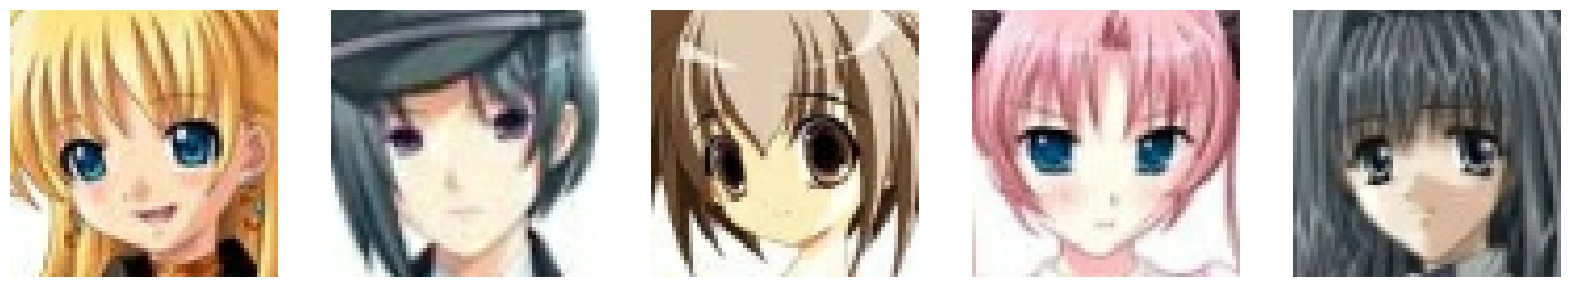

generated images


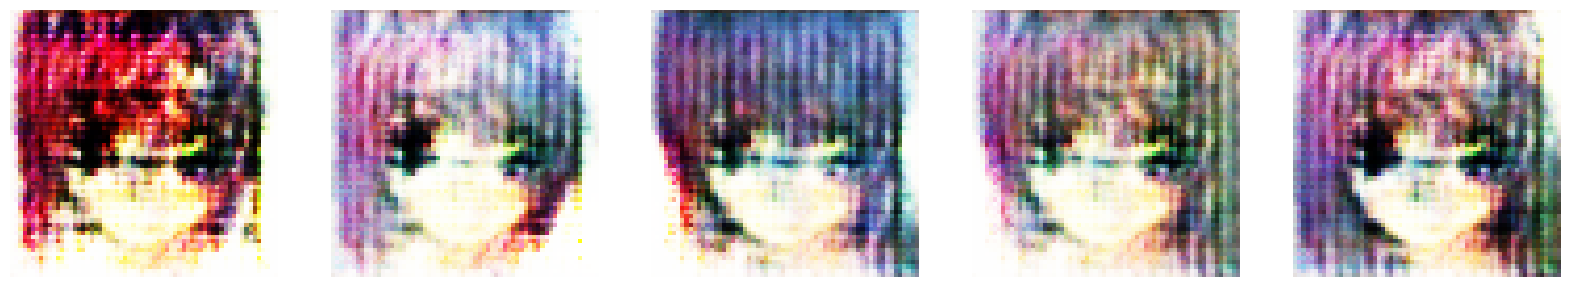

Time for epoch 16 is 86.68528652191162 sec


epoch 17:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 17, iteration 1


epoch 17:   1%|          | 1/157 [00:00<01:34,  1.64it/s]

epoch 17, iteration 2


epoch 17:   1%|▏         | 2/157 [00:01<01:36,  1.61it/s]

epoch 17, iteration 3


epoch 17:   2%|▏         | 3/157 [00:01<01:18,  1.97it/s]

epoch 17, iteration 4


epoch 17:   3%|▎         | 4/157 [00:01<01:09,  2.21it/s]

epoch 17, iteration 5


epoch 17:   3%|▎         | 5/157 [00:02<01:05,  2.34it/s]

epoch 17, iteration 6


epoch 17:   4%|▍         | 6/157 [00:02<01:02,  2.43it/s]

epoch 17, iteration 7


epoch 17:   4%|▍         | 7/157 [00:03<01:00,  2.49it/s]

epoch 17, iteration 8


epoch 17:   5%|▌         | 8/157 [00:03<00:58,  2.55it/s]

epoch 17, iteration 9


epoch 17:   6%|▌         | 9/157 [00:03<00:56,  2.61it/s]

epoch 17, iteration 10


epoch 17:   6%|▋         | 10/157 [00:04<00:55,  2.64it/s]

epoch 17, iteration 11


epoch 17:   7%|▋         | 11/157 [00:04<00:55,  2.64it/s]

epoch 17, iteration 12


epoch 17:   8%|▊         | 12/157 [00:04<00:54,  2.64it/s]

epoch 17, iteration 13


epoch 17:   8%|▊         | 13/157 [00:05<00:54,  2.65it/s]

epoch 17, iteration 14


epoch 17:   9%|▉         | 14/157 [00:05<00:53,  2.67it/s]

epoch 17, iteration 15


epoch 17:  10%|▉         | 15/157 [00:06<00:52,  2.70it/s]

epoch 17, iteration 16


epoch 17:  10%|█         | 16/157 [00:06<00:52,  2.67it/s]

epoch 17, iteration 17


epoch 17:  11%|█         | 17/157 [00:06<00:52,  2.69it/s]

epoch 17, iteration 18


epoch 17:  11%|█▏        | 18/157 [00:07<00:52,  2.64it/s]

epoch 17, iteration 19


epoch 17:  12%|█▏        | 19/157 [00:07<00:52,  2.63it/s]

epoch 17, iteration 20


epoch 17:  13%|█▎        | 20/157 [00:07<00:51,  2.66it/s]

epoch 17, iteration 21


epoch 17:  13%|█▎        | 21/157 [00:08<00:50,  2.67it/s]

epoch 17, iteration 22


epoch 17:  14%|█▍        | 22/157 [00:08<00:51,  2.64it/s]

epoch 17, iteration 23


epoch 17:  15%|█▍        | 23/157 [00:09<00:54,  2.46it/s]

epoch 17, iteration 24


epoch 17:  15%|█▌        | 24/157 [00:09<00:56,  2.37it/s]

epoch 17, iteration 25


epoch 17:  16%|█▌        | 25/157 [00:10<00:56,  2.34it/s]

epoch 17, iteration 26


epoch 17:  17%|█▋        | 26/157 [00:10<00:58,  2.25it/s]

epoch 17, iteration 27


epoch 17:  17%|█▋        | 27/157 [00:11<00:59,  2.18it/s]

epoch 17, iteration 28


epoch 17:  18%|█▊        | 28/157 [00:11<01:01,  2.10it/s]

epoch 17, iteration 29


epoch 17:  18%|█▊        | 29/157 [00:12<00:57,  2.21it/s]

epoch 17, iteration 30


epoch 17:  19%|█▉        | 30/157 [00:12<00:54,  2.34it/s]

epoch 17, iteration 31


epoch 17:  20%|█▉        | 31/157 [00:12<00:52,  2.40it/s]

epoch 17, iteration 32


epoch 17:  20%|██        | 32/157 [00:13<00:50,  2.48it/s]

epoch 17, iteration 33


epoch 17:  21%|██        | 33/157 [00:13<00:49,  2.51it/s]

epoch 17, iteration 34


epoch 17:  22%|██▏       | 34/157 [00:13<00:48,  2.55it/s]

epoch 17, iteration 35


epoch 17:  22%|██▏       | 35/157 [00:14<00:47,  2.59it/s]

epoch 17, iteration 36


epoch 17:  23%|██▎       | 36/157 [00:14<00:46,  2.59it/s]

epoch 17, iteration 37


epoch 17:  24%|██▎       | 37/157 [00:15<00:45,  2.63it/s]

epoch 17, iteration 38


epoch 17:  24%|██▍       | 38/157 [00:15<00:44,  2.66it/s]

epoch 17, iteration 39


epoch 17:  25%|██▍       | 39/157 [00:15<00:44,  2.67it/s]

epoch 17, iteration 40


epoch 17:  25%|██▌       | 40/157 [00:16<00:43,  2.71it/s]

epoch 17, iteration 41


epoch 17:  26%|██▌       | 41/157 [00:16<00:42,  2.72it/s]

epoch 17, iteration 42


epoch 17:  27%|██▋       | 42/157 [00:16<00:42,  2.70it/s]

epoch 17, iteration 43


epoch 17:  27%|██▋       | 43/157 [00:17<00:42,  2.71it/s]

epoch 17, iteration 44


epoch 17:  28%|██▊       | 44/157 [00:17<00:41,  2.72it/s]

epoch 17, iteration 45


epoch 17:  29%|██▊       | 45/157 [00:17<00:41,  2.70it/s]

epoch 17, iteration 46


epoch 17:  29%|██▉       | 46/157 [00:18<00:41,  2.69it/s]

epoch 17, iteration 47


epoch 17:  30%|██▉       | 47/157 [00:18<00:41,  2.68it/s]

epoch 17, iteration 48


epoch 17:  31%|███       | 48/157 [00:19<00:40,  2.71it/s]

epoch 17, iteration 49


epoch 17:  31%|███       | 49/157 [00:19<00:40,  2.69it/s]

epoch 17, iteration 50


epoch 17:  32%|███▏      | 50/157 [00:19<00:40,  2.67it/s]

epoch 17, iteration 51


epoch 17:  32%|███▏      | 51/157 [00:20<00:39,  2.70it/s]

epoch 17, iteration 52


epoch 17:  33%|███▎      | 52/157 [00:20<00:39,  2.67it/s]

epoch 17, iteration 53


epoch 17:  34%|███▍      | 53/157 [00:20<00:39,  2.66it/s]

epoch 17, iteration 54


epoch 17:  34%|███▍      | 54/157 [00:21<00:38,  2.65it/s]

epoch 17, iteration 55


epoch 17:  35%|███▌      | 55/157 [00:21<00:37,  2.69it/s]

epoch 17, iteration 56


epoch 17:  36%|███▌      | 56/157 [00:22<00:40,  2.51it/s]

epoch 17, iteration 57


epoch 17:  36%|███▋      | 57/157 [00:22<00:41,  2.43it/s]

epoch 17, iteration 58


epoch 17:  37%|███▋      | 58/157 [00:23<00:42,  2.35it/s]

epoch 17, iteration 59


epoch 17:  38%|███▊      | 59/157 [00:23<00:43,  2.28it/s]

epoch 17, iteration 60


epoch 17:  38%|███▊      | 60/157 [00:24<00:44,  2.20it/s]

epoch 17, iteration 61


epoch 17:  39%|███▉      | 61/157 [00:24<00:44,  2.18it/s]

epoch 17, iteration 62


epoch 17:  39%|███▉      | 62/157 [00:24<00:42,  2.24it/s]

epoch 17, iteration 63


epoch 17:  40%|████      | 63/157 [00:25<00:39,  2.35it/s]

epoch 17, iteration 64


epoch 17:  41%|████      | 64/157 [00:25<00:38,  2.43it/s]

epoch 17, iteration 65


epoch 17:  41%|████▏     | 65/157 [00:26<00:37,  2.48it/s]

epoch 17, iteration 66


epoch 17:  42%|████▏     | 66/157 [00:26<00:35,  2.55it/s]

epoch 17, iteration 67


epoch 17:  43%|████▎     | 67/157 [00:26<00:34,  2.58it/s]

epoch 17, iteration 68


epoch 17:  43%|████▎     | 68/157 [00:27<00:33,  2.63it/s]

epoch 17, iteration 69


epoch 17:  44%|████▍     | 69/157 [00:27<00:33,  2.66it/s]

epoch 17, iteration 70


epoch 17:  45%|████▍     | 70/157 [00:27<00:32,  2.68it/s]

epoch 17, iteration 71


epoch 17:  45%|████▌     | 71/157 [00:28<00:32,  2.66it/s]

epoch 17, iteration 72


epoch 17:  46%|████▌     | 72/157 [00:28<00:31,  2.66it/s]

epoch 17, iteration 73


epoch 17:  46%|████▋     | 73/157 [00:29<00:31,  2.67it/s]

epoch 17, iteration 74


epoch 17:  47%|████▋     | 74/157 [00:29<00:31,  2.65it/s]

epoch 17, iteration 75


epoch 17:  48%|████▊     | 75/157 [00:29<00:30,  2.66it/s]

epoch 17, iteration 76


epoch 17:  48%|████▊     | 76/157 [00:30<00:30,  2.67it/s]

epoch 17, iteration 77


epoch 17:  49%|████▉     | 77/157 [00:30<00:29,  2.72it/s]

epoch 17, iteration 78


epoch 17:  50%|████▉     | 78/157 [00:30<00:29,  2.70it/s]

epoch 17, iteration 79


epoch 17:  50%|█████     | 79/157 [00:31<00:29,  2.67it/s]

epoch 17, iteration 80


epoch 17:  51%|█████     | 80/157 [00:31<00:28,  2.67it/s]

epoch 17, iteration 81


epoch 17:  52%|█████▏    | 81/157 [00:31<00:28,  2.71it/s]

epoch 17, iteration 82


epoch 17:  52%|█████▏    | 82/157 [00:32<00:27,  2.69it/s]

epoch 17, iteration 83


epoch 17:  53%|█████▎    | 83/157 [00:32<00:27,  2.69it/s]

epoch 17, iteration 84


epoch 17:  54%|█████▎    | 84/157 [00:33<00:26,  2.70it/s]

epoch 17, iteration 85


epoch 17:  54%|█████▍    | 85/157 [00:33<00:26,  2.70it/s]

epoch 17, iteration 86


epoch 17:  55%|█████▍    | 86/157 [00:33<00:26,  2.71it/s]

epoch 17, iteration 87


epoch 17:  55%|█████▌    | 87/157 [00:34<00:25,  2.71it/s]

epoch 17, iteration 88


epoch 17:  56%|█████▌    | 88/157 [00:34<00:26,  2.64it/s]

epoch 17, iteration 89


epoch 17:  57%|█████▋    | 89/157 [00:35<00:26,  2.54it/s]

epoch 17, iteration 90


epoch 17:  57%|█████▋    | 90/157 [00:35<00:27,  2.45it/s]

epoch 17, iteration 91


epoch 17:  58%|█████▊    | 91/157 [00:35<00:28,  2.34it/s]

epoch 17, iteration 92


epoch 17:  59%|█████▊    | 92/157 [00:36<00:28,  2.29it/s]

epoch 17, iteration 93


epoch 17:  59%|█████▉    | 93/157 [00:36<00:28,  2.21it/s]

epoch 17, iteration 94


epoch 17:  60%|█████▉    | 94/157 [00:37<00:28,  2.20it/s]

epoch 17, iteration 95


epoch 17:  61%|██████    | 95/157 [00:37<00:28,  2.19it/s]

epoch 17, iteration 96


epoch 17:  61%|██████    | 96/157 [00:38<00:26,  2.34it/s]

epoch 17, iteration 97


epoch 17:  62%|██████▏   | 97/157 [00:38<00:24,  2.42it/s]

epoch 17, iteration 98


epoch 17:  62%|██████▏   | 98/157 [00:38<00:23,  2.49it/s]

epoch 17, iteration 99


epoch 17:  63%|██████▎   | 99/157 [00:39<00:22,  2.56it/s]

epoch 17, iteration 100


epoch 17:  64%|██████▎   | 100/157 [00:39<00:21,  2.59it/s]

epoch 17, iteration 101


epoch 17:  64%|██████▍   | 101/157 [00:40<00:21,  2.63it/s]

epoch 17, iteration 102


epoch 17:  65%|██████▍   | 102/157 [00:40<00:20,  2.64it/s]

epoch 17, iteration 103


epoch 17:  66%|██████▌   | 103/157 [00:40<00:20,  2.64it/s]

epoch 17, iteration 104


epoch 17:  66%|██████▌   | 104/157 [00:41<00:19,  2.67it/s]

epoch 17, iteration 105


epoch 17:  67%|██████▋   | 105/157 [00:41<00:19,  2.68it/s]

epoch 17, iteration 106


epoch 17:  68%|██████▊   | 106/157 [00:41<00:19,  2.66it/s]

epoch 17, iteration 107


epoch 17:  68%|██████▊   | 107/157 [00:42<00:18,  2.69it/s]

epoch 17, iteration 108


epoch 17:  69%|██████▉   | 108/157 [00:42<00:18,  2.67it/s]

epoch 17, iteration 109


epoch 17:  69%|██████▉   | 109/157 [00:43<00:17,  2.71it/s]

epoch 17, iteration 110


epoch 17:  70%|███████   | 110/157 [00:43<00:17,  2.72it/s]

epoch 17, iteration 111


epoch 17:  71%|███████   | 111/157 [00:43<00:17,  2.69it/s]

epoch 17, iteration 112


epoch 17:  71%|███████▏  | 112/157 [00:44<00:16,  2.71it/s]

epoch 17, iteration 113


epoch 17:  72%|███████▏  | 113/157 [00:44<00:16,  2.71it/s]

epoch 17, iteration 114


epoch 17:  73%|███████▎  | 114/157 [00:44<00:15,  2.72it/s]

epoch 17, iteration 115


epoch 17:  73%|███████▎  | 115/157 [00:45<00:15,  2.72it/s]

epoch 17, iteration 116


epoch 17:  74%|███████▍  | 116/157 [00:45<00:15,  2.68it/s]

epoch 17, iteration 117


epoch 17:  75%|███████▍  | 117/157 [00:45<00:15,  2.65it/s]

epoch 17, iteration 118


epoch 17:  75%|███████▌  | 118/157 [00:46<00:14,  2.67it/s]

epoch 17, iteration 119


epoch 17:  76%|███████▌  | 119/157 [00:46<00:14,  2.65it/s]

epoch 17, iteration 120


epoch 17:  76%|███████▋  | 120/157 [00:47<00:13,  2.67it/s]

epoch 17, iteration 121


epoch 17:  77%|███████▋  | 121/157 [00:47<00:13,  2.70it/s]

epoch 17, iteration 122


epoch 17:  78%|███████▊  | 122/157 [00:47<00:13,  2.58it/s]

epoch 17, iteration 123


epoch 17:  78%|███████▊  | 123/157 [00:48<00:14,  2.41it/s]

epoch 17, iteration 124


epoch 17:  79%|███████▉  | 124/157 [00:48<00:14,  2.35it/s]

epoch 17, iteration 125


epoch 17:  80%|███████▉  | 125/157 [00:49<00:14,  2.25it/s]

epoch 17, iteration 126


epoch 17:  80%|████████  | 126/157 [00:49<00:14,  2.18it/s]

epoch 17, iteration 127


epoch 17:  81%|████████  | 127/157 [00:50<00:14,  2.14it/s]

epoch 17, iteration 128


epoch 17:  82%|████████▏ | 128/157 [00:50<00:13,  2.13it/s]

epoch 17, iteration 129


epoch 17:  82%|████████▏ | 129/157 [00:51<00:12,  2.27it/s]

epoch 17, iteration 130


epoch 17:  83%|████████▎ | 130/157 [00:51<00:11,  2.38it/s]

epoch 17, iteration 131


epoch 17:  83%|████████▎ | 131/157 [00:51<00:10,  2.46it/s]

epoch 17, iteration 132


epoch 17:  84%|████████▍ | 132/157 [00:52<00:09,  2.52it/s]

epoch 17, iteration 133


epoch 17:  85%|████████▍ | 133/157 [00:52<00:09,  2.60it/s]

epoch 17, iteration 134


epoch 17:  85%|████████▌ | 134/157 [00:52<00:08,  2.64it/s]

epoch 17, iteration 135


epoch 17:  86%|████████▌ | 135/157 [00:53<00:08,  2.66it/s]

epoch 17, iteration 136


epoch 17:  87%|████████▋ | 136/157 [00:53<00:07,  2.69it/s]

epoch 17, iteration 137


epoch 17:  87%|████████▋ | 137/157 [00:54<00:07,  2.64it/s]

epoch 17, iteration 138


epoch 17:  88%|████████▊ | 138/157 [00:54<00:07,  2.67it/s]

epoch 17, iteration 139


epoch 17:  89%|████████▊ | 139/157 [00:54<00:06,  2.69it/s]

epoch 17, iteration 140


epoch 17:  89%|████████▉ | 140/157 [00:55<00:06,  2.68it/s]

epoch 17, iteration 141


epoch 17:  90%|████████▉ | 141/157 [00:55<00:06,  2.66it/s]

epoch 17, iteration 142


epoch 17:  90%|█████████ | 142/157 [00:55<00:05,  2.69it/s]

epoch 17, iteration 143


epoch 17:  91%|█████████ | 143/157 [00:56<00:05,  2.69it/s]

epoch 17, iteration 144


epoch 17:  92%|█████████▏| 144/157 [00:56<00:04,  2.71it/s]

epoch 17, iteration 145


epoch 17:  92%|█████████▏| 145/157 [00:57<00:04,  2.72it/s]

epoch 17, iteration 146


epoch 17:  93%|█████████▎| 146/157 [00:57<00:04,  2.70it/s]

epoch 17, iteration 147


epoch 17:  94%|█████████▎| 147/157 [00:57<00:03,  2.72it/s]

epoch 17, iteration 148


epoch 17:  94%|█████████▍| 148/157 [00:58<00:03,  2.74it/s]

epoch 17, iteration 149


epoch 17:  95%|█████████▍| 149/157 [00:58<00:02,  2.74it/s]

epoch 17, iteration 150


epoch 17:  96%|█████████▌| 150/157 [00:58<00:02,  2.74it/s]

epoch 17, iteration 151


epoch 17:  96%|█████████▌| 151/157 [00:59<00:02,  2.75it/s]

epoch 17, iteration 152


epoch 17:  97%|█████████▋| 152/157 [00:59<00:01,  2.78it/s]

epoch 17, iteration 153


epoch 17:  97%|█████████▋| 153/157 [00:59<00:01,  2.81it/s]

epoch 17, iteration 154


epoch 17:  98%|█████████▊| 154/157 [01:00<00:01,  2.81it/s]

epoch 17, iteration 155


epoch 17:  99%|█████████▊| 155/157 [01:00<00:00,  2.79it/s]

epoch 17, iteration 156


epoch 17:  99%|█████████▉| 156/157 [01:01<00:00,  2.62it/s]

epoch 17, iteration 157


epoch 17: 100%|██████████| 157/157 [01:01<00:00,  2.55it/s]


orignal images


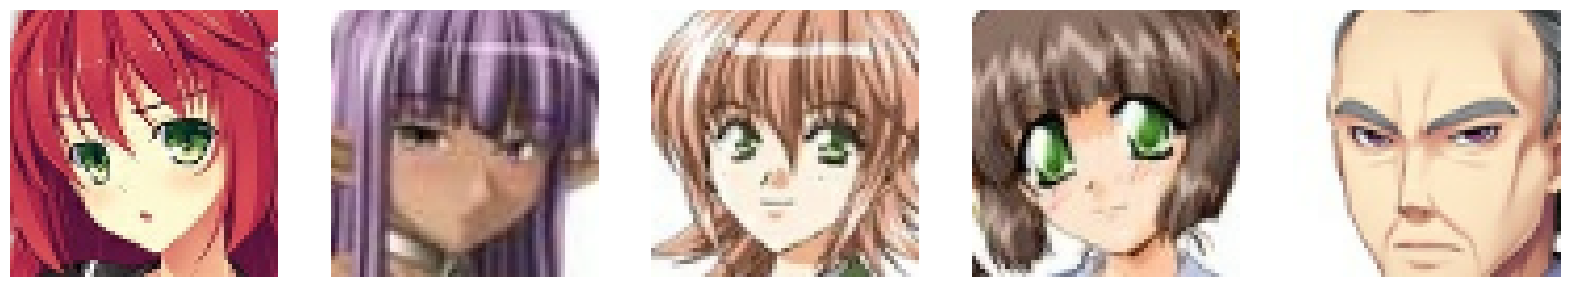

generated images


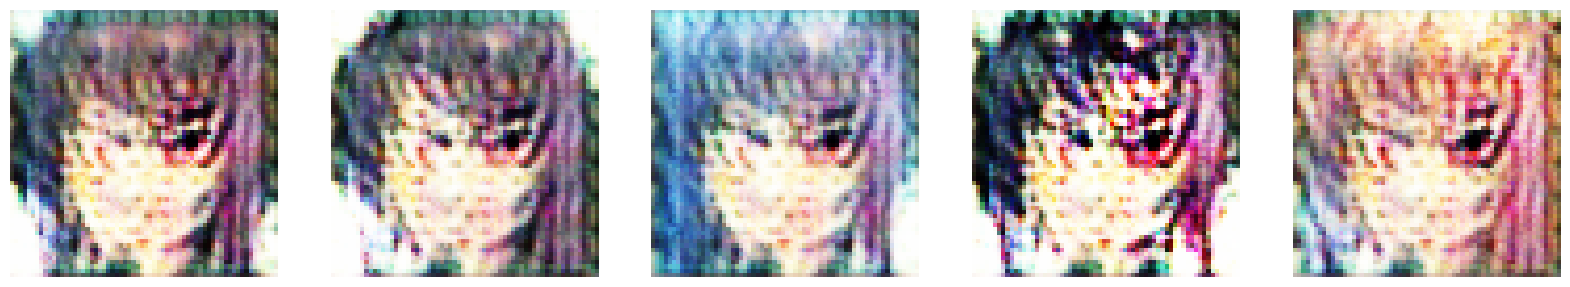

Time for epoch 17 is 66.0706353187561 sec


epoch 18:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 18, iteration 1


epoch 18:   1%|          | 1/157 [00:00<01:43,  1.51it/s]

epoch 18, iteration 2


epoch 18:   1%|▏         | 2/157 [00:01<01:17,  2.00it/s]

epoch 18, iteration 3


epoch 18:   2%|▏         | 3/157 [00:01<01:07,  2.27it/s]

epoch 18, iteration 4


epoch 18:   3%|▎         | 4/157 [00:01<01:03,  2.40it/s]

epoch 18, iteration 5


epoch 18:   3%|▎         | 5/157 [00:02<01:00,  2.51it/s]

epoch 18, iteration 6


epoch 18:   4%|▍         | 6/157 [00:02<00:58,  2.57it/s]

epoch 18, iteration 7


epoch 18:   4%|▍         | 7/157 [00:02<00:57,  2.63it/s]

epoch 18, iteration 8


epoch 18:   5%|▌         | 8/157 [00:03<00:55,  2.67it/s]

epoch 18, iteration 9


epoch 18:   6%|▌         | 9/157 [00:03<00:55,  2.68it/s]

epoch 18, iteration 10


epoch 18:   6%|▋         | 10/157 [00:03<00:54,  2.69it/s]

epoch 18, iteration 11


epoch 18:   7%|▋         | 11/157 [00:04<00:54,  2.70it/s]

epoch 18, iteration 12


epoch 18:   8%|▊         | 12/157 [00:04<00:53,  2.72it/s]

epoch 18, iteration 13


epoch 18:   8%|▊         | 13/157 [00:05<00:52,  2.72it/s]

epoch 18, iteration 14


epoch 18:   9%|▉         | 14/157 [00:05<00:52,  2.72it/s]

epoch 18, iteration 15


epoch 18:  10%|▉         | 15/157 [00:05<00:52,  2.69it/s]

epoch 18, iteration 16


epoch 18:  10%|█         | 16/157 [00:06<00:52,  2.68it/s]

epoch 18, iteration 17


epoch 18:  11%|█         | 17/157 [00:06<00:52,  2.69it/s]

epoch 18, iteration 18


epoch 18:  11%|█▏        | 18/157 [00:06<00:52,  2.66it/s]

epoch 18, iteration 19


epoch 18:  12%|█▏        | 19/157 [00:07<00:51,  2.69it/s]

epoch 18, iteration 20


epoch 18:  13%|█▎        | 20/157 [00:07<00:51,  2.68it/s]

epoch 18, iteration 21


epoch 18:  13%|█▎        | 21/157 [00:08<00:53,  2.53it/s]

epoch 18, iteration 22


epoch 18:  14%|█▍        | 22/157 [00:08<00:55,  2.44it/s]

epoch 18, iteration 23


epoch 18:  15%|█▍        | 23/157 [00:09<00:56,  2.38it/s]

epoch 18, iteration 24


epoch 18:  15%|█▌        | 24/157 [00:09<00:57,  2.32it/s]

epoch 18, iteration 25


epoch 18:  16%|█▌        | 25/157 [00:09<00:58,  2.25it/s]

epoch 18, iteration 26


epoch 18:  17%|█▋        | 26/157 [00:10<00:59,  2.20it/s]

epoch 18, iteration 27


epoch 18:  17%|█▋        | 27/157 [00:10<01:00,  2.13it/s]

epoch 18, iteration 28


epoch 18:  18%|█▊        | 28/157 [00:11<00:57,  2.24it/s]

epoch 18, iteration 29


epoch 18:  18%|█▊        | 29/157 [00:11<00:53,  2.38it/s]

epoch 18, iteration 30


epoch 18:  19%|█▉        | 30/157 [00:12<00:51,  2.48it/s]

epoch 18, iteration 31


epoch 18:  20%|█▉        | 31/157 [00:12<00:49,  2.54it/s]

epoch 18, iteration 32


epoch 18:  20%|██        | 32/157 [00:12<00:48,  2.58it/s]

epoch 18, iteration 33


epoch 18:  21%|██        | 33/157 [00:13<00:48,  2.56it/s]

epoch 18, iteration 34


epoch 18:  22%|██▏       | 34/157 [00:13<00:47,  2.57it/s]

epoch 18, iteration 35


epoch 18:  22%|██▏       | 35/157 [00:13<00:47,  2.59it/s]

epoch 18, iteration 36


epoch 18:  23%|██▎       | 36/157 [00:14<00:46,  2.60it/s]

epoch 18, iteration 37


epoch 18:  24%|██▎       | 37/157 [00:14<00:45,  2.63it/s]

epoch 18, iteration 38


epoch 18:  24%|██▍       | 38/157 [00:15<00:45,  2.63it/s]

epoch 18, iteration 39


epoch 18:  25%|██▍       | 39/157 [00:15<00:44,  2.66it/s]

epoch 18, iteration 40


epoch 18:  25%|██▌       | 40/157 [00:15<00:44,  2.63it/s]

epoch 18, iteration 41


epoch 18:  26%|██▌       | 41/157 [00:16<00:43,  2.67it/s]

epoch 18, iteration 42


epoch 18:  27%|██▋       | 42/157 [00:16<00:42,  2.69it/s]

epoch 18, iteration 43


epoch 18:  27%|██▋       | 43/157 [00:16<00:42,  2.70it/s]

epoch 18, iteration 44


epoch 18:  28%|██▊       | 44/157 [00:17<00:42,  2.64it/s]

epoch 18, iteration 45


epoch 18:  29%|██▊       | 45/157 [00:17<00:42,  2.65it/s]

epoch 18, iteration 46


epoch 18:  29%|██▉       | 46/157 [00:18<00:44,  2.51it/s]

epoch 18, iteration 47


epoch 18:  30%|██▉       | 47/157 [00:18<00:45,  2.42it/s]

epoch 18, iteration 48


epoch 18:  31%|███       | 48/157 [00:19<00:46,  2.34it/s]

epoch 18, iteration 49


epoch 18:  31%|███       | 49/157 [00:19<00:46,  2.32it/s]

epoch 18, iteration 50


epoch 18:  32%|███▏      | 50/157 [00:20<00:47,  2.25it/s]

epoch 18, iteration 51


epoch 18:  32%|███▏      | 51/157 [00:20<00:48,  2.21it/s]

epoch 18, iteration 52


epoch 18:  33%|███▎      | 52/157 [00:20<00:47,  2.19it/s]

epoch 18, iteration 53


epoch 18:  34%|███▍      | 53/157 [00:21<00:49,  2.11it/s]

epoch 18, iteration 54


epoch 18:  34%|███▍      | 54/157 [00:21<00:49,  2.09it/s]

epoch 18, iteration 55


epoch 18:  35%|███▌      | 55/157 [00:22<00:49,  2.07it/s]

epoch 18, iteration 56


epoch 18:  36%|███▌      | 56/157 [00:22<00:47,  2.12it/s]

epoch 18, iteration 57


epoch 18:  36%|███▋      | 57/157 [00:23<00:47,  2.13it/s]

epoch 18, iteration 58


epoch 18:  37%|███▋      | 58/157 [00:23<00:46,  2.11it/s]

epoch 18, iteration 59


epoch 18:  38%|███▊      | 59/157 [00:24<00:47,  2.06it/s]

epoch 18, iteration 60


epoch 18:  38%|███▊      | 60/157 [00:24<00:44,  2.19it/s]

epoch 18, iteration 61


epoch 18:  39%|███▉      | 61/157 [00:25<00:41,  2.33it/s]

epoch 18, iteration 62


epoch 18:  39%|███▉      | 62/157 [00:25<00:39,  2.42it/s]

epoch 18, iteration 63


epoch 18:  40%|████      | 63/157 [00:25<00:37,  2.48it/s]

epoch 18, iteration 64


epoch 18:  41%|████      | 64/157 [00:26<00:36,  2.52it/s]

epoch 18, iteration 65


epoch 18:  41%|████▏     | 65/157 [00:26<00:36,  2.51it/s]

epoch 18, iteration 66


epoch 18:  42%|████▏     | 66/157 [00:27<00:35,  2.55it/s]

epoch 18, iteration 67


epoch 18:  43%|████▎     | 67/157 [00:27<00:34,  2.58it/s]

epoch 18, iteration 68


epoch 18:  43%|████▎     | 68/157 [00:27<00:34,  2.61it/s]

epoch 18, iteration 69


epoch 18:  44%|████▍     | 69/157 [00:28<00:33,  2.61it/s]

epoch 18, iteration 70


epoch 18:  45%|████▍     | 70/157 [00:28<00:33,  2.59it/s]

epoch 18, iteration 71


epoch 18:  45%|████▌     | 71/157 [00:28<00:33,  2.60it/s]

epoch 18, iteration 72


epoch 18:  46%|████▌     | 72/157 [00:29<00:32,  2.60it/s]

epoch 18, iteration 73


epoch 18:  46%|████▋     | 73/157 [00:29<00:32,  2.59it/s]

epoch 18, iteration 74


epoch 18:  47%|████▋     | 74/157 [00:30<00:32,  2.59it/s]

epoch 18, iteration 75


epoch 18:  48%|████▊     | 75/157 [00:30<00:31,  2.61it/s]

epoch 18, iteration 76


epoch 18:  48%|████▊     | 76/157 [00:30<00:30,  2.63it/s]

epoch 18, iteration 77


epoch 18:  49%|████▉     | 77/157 [00:31<00:30,  2.64it/s]

epoch 18, iteration 78


epoch 18:  50%|████▉     | 78/157 [00:31<00:29,  2.65it/s]

epoch 18, iteration 79


epoch 18:  50%|█████     | 79/157 [00:31<00:29,  2.64it/s]

epoch 18, iteration 80


epoch 18:  51%|█████     | 80/157 [00:32<00:29,  2.65it/s]

epoch 18, iteration 81


epoch 18:  52%|█████▏    | 81/157 [00:32<00:28,  2.67it/s]

epoch 18, iteration 82


epoch 18:  52%|█████▏    | 82/157 [00:33<00:28,  2.63it/s]

epoch 18, iteration 83


epoch 18:  53%|█████▎    | 83/157 [00:33<00:27,  2.65it/s]

epoch 18, iteration 84


epoch 18:  54%|█████▎    | 84/157 [00:33<00:27,  2.64it/s]

epoch 18, iteration 85


epoch 18:  54%|█████▍    | 85/157 [00:34<00:27,  2.65it/s]

epoch 18, iteration 86


epoch 18:  55%|█████▍    | 86/157 [00:34<00:28,  2.51it/s]

epoch 18, iteration 87


epoch 18:  55%|█████▌    | 87/157 [00:35<00:29,  2.39it/s]

epoch 18, iteration 88


epoch 18:  56%|█████▌    | 88/157 [00:35<00:29,  2.32it/s]

epoch 18, iteration 89


epoch 18:  57%|█████▋    | 89/157 [00:36<00:29,  2.32it/s]

epoch 18, iteration 90


epoch 18:  57%|█████▋    | 90/157 [00:36<00:29,  2.25it/s]

epoch 18, iteration 91


epoch 18:  58%|█████▊    | 91/157 [00:36<00:30,  2.20it/s]

epoch 18, iteration 92


epoch 18:  59%|█████▊    | 92/157 [00:37<00:30,  2.11it/s]

epoch 18, iteration 93


epoch 18:  59%|█████▉    | 93/157 [00:37<00:28,  2.23it/s]

epoch 18, iteration 94


epoch 18:  60%|█████▉    | 94/157 [00:38<00:27,  2.33it/s]

epoch 18, iteration 95


epoch 18:  61%|██████    | 95/157 [00:38<00:25,  2.43it/s]

epoch 18, iteration 96


epoch 18:  61%|██████    | 96/157 [00:39<00:24,  2.50it/s]

epoch 18, iteration 97


epoch 18:  62%|██████▏   | 97/157 [00:39<00:23,  2.55it/s]

epoch 18, iteration 98


epoch 18:  62%|██████▏   | 98/157 [00:39<00:22,  2.61it/s]

epoch 18, iteration 99


epoch 18:  63%|██████▎   | 99/157 [00:40<00:22,  2.61it/s]

epoch 18, iteration 100


epoch 18:  64%|██████▎   | 100/157 [00:40<00:22,  2.58it/s]

epoch 18, iteration 101


epoch 18:  64%|██████▍   | 101/157 [00:40<00:21,  2.62it/s]

epoch 18, iteration 102


epoch 18:  65%|██████▍   | 102/157 [00:41<00:20,  2.62it/s]

epoch 18, iteration 103


epoch 18:  66%|██████▌   | 103/157 [00:41<00:20,  2.63it/s]

epoch 18, iteration 104


epoch 18:  66%|██████▌   | 104/157 [00:42<00:20,  2.65it/s]

epoch 18, iteration 105


epoch 18:  67%|██████▋   | 105/157 [00:42<00:19,  2.63it/s]

epoch 18, iteration 106


epoch 18:  68%|██████▊   | 106/157 [00:42<00:19,  2.64it/s]

epoch 18, iteration 107


epoch 18:  68%|██████▊   | 107/157 [00:43<00:19,  2.63it/s]

epoch 18, iteration 108


epoch 18:  69%|██████▉   | 108/157 [00:43<00:18,  2.65it/s]

epoch 18, iteration 109


epoch 18:  69%|██████▉   | 109/157 [00:43<00:18,  2.66it/s]

epoch 18, iteration 110


epoch 18:  70%|███████   | 110/157 [00:44<00:17,  2.64it/s]

epoch 18, iteration 111


epoch 18:  71%|███████   | 111/157 [00:44<00:17,  2.63it/s]

epoch 18, iteration 112


epoch 18:  71%|███████▏  | 112/157 [00:45<00:16,  2.65it/s]

epoch 18, iteration 113


epoch 18:  72%|███████▏  | 113/157 [00:45<00:16,  2.67it/s]

epoch 18, iteration 114


epoch 18:  73%|███████▎  | 114/157 [00:45<00:16,  2.68it/s]

epoch 18, iteration 115


epoch 18:  73%|███████▎  | 115/157 [00:46<00:15,  2.69it/s]

epoch 18, iteration 116


epoch 18:  74%|███████▍  | 116/157 [00:46<00:15,  2.68it/s]

epoch 18, iteration 117


epoch 18:  75%|███████▍  | 117/157 [00:46<00:14,  2.69it/s]

epoch 18, iteration 118


epoch 18:  75%|███████▌  | 118/157 [00:47<00:14,  2.67it/s]

epoch 18, iteration 119


epoch 18:  76%|███████▌  | 119/157 [00:47<00:14,  2.59it/s]

epoch 18, iteration 120


epoch 18:  76%|███████▋  | 120/157 [00:48<00:14,  2.47it/s]

epoch 18, iteration 121


epoch 18:  77%|███████▋  | 121/157 [00:48<00:15,  2.35it/s]

epoch 18, iteration 122


epoch 18:  78%|███████▊  | 122/157 [00:49<00:15,  2.31it/s]

epoch 18, iteration 123


epoch 18:  78%|███████▊  | 123/157 [00:49<00:15,  2.22it/s]

epoch 18, iteration 124


epoch 18:  79%|███████▉  | 124/157 [00:50<00:15,  2.19it/s]

epoch 18, iteration 125


epoch 18:  80%|███████▉  | 125/157 [00:50<00:15,  2.11it/s]

epoch 18, iteration 126


epoch 18:  80%|████████  | 126/157 [00:51<00:14,  2.16it/s]

epoch 18, iteration 127


epoch 18:  81%|████████  | 127/157 [00:51<00:13,  2.29it/s]

epoch 18, iteration 128


epoch 18:  82%|████████▏ | 128/157 [00:51<00:12,  2.39it/s]

epoch 18, iteration 129


epoch 18:  82%|████████▏ | 129/157 [00:52<00:11,  2.47it/s]

epoch 18, iteration 130


epoch 18:  83%|████████▎ | 130/157 [00:52<00:10,  2.52it/s]

epoch 18, iteration 131


epoch 18:  83%|████████▎ | 131/157 [00:52<00:10,  2.56it/s]

epoch 18, iteration 132


epoch 18:  84%|████████▍ | 132/157 [00:53<00:09,  2.59it/s]

epoch 18, iteration 133


epoch 18:  85%|████████▍ | 133/157 [00:53<00:09,  2.61it/s]

epoch 18, iteration 134


epoch 18:  85%|████████▌ | 134/157 [00:54<00:08,  2.61it/s]

epoch 18, iteration 135


epoch 18:  86%|████████▌ | 135/157 [00:54<00:08,  2.64it/s]

epoch 18, iteration 136


epoch 18:  87%|████████▋ | 136/157 [00:54<00:07,  2.66it/s]

epoch 18, iteration 137


epoch 18:  87%|████████▋ | 137/157 [00:55<00:07,  2.66it/s]

epoch 18, iteration 138


epoch 18:  88%|████████▊ | 138/157 [00:55<00:07,  2.64it/s]

epoch 18, iteration 139


epoch 18:  89%|████████▊ | 139/157 [00:55<00:06,  2.66it/s]

epoch 18, iteration 140


epoch 18:  89%|████████▉ | 140/157 [00:56<00:06,  2.68it/s]

epoch 18, iteration 141


epoch 18:  90%|████████▉ | 141/157 [00:56<00:06,  2.65it/s]

epoch 18, iteration 142


epoch 18:  90%|█████████ | 142/157 [00:57<00:05,  2.64it/s]

epoch 18, iteration 143


epoch 18:  91%|█████████ | 143/157 [00:57<00:05,  2.65it/s]

epoch 18, iteration 144


epoch 18:  92%|█████████▏| 144/157 [00:57<00:04,  2.65it/s]

epoch 18, iteration 145


epoch 18:  92%|█████████▏| 145/157 [00:58<00:04,  2.67it/s]

epoch 18, iteration 146


epoch 18:  93%|█████████▎| 146/157 [00:58<00:04,  2.64it/s]

epoch 18, iteration 147


epoch 18:  94%|█████████▎| 147/157 [00:58<00:03,  2.66it/s]

epoch 18, iteration 148


epoch 18:  94%|█████████▍| 148/157 [00:59<00:03,  2.66it/s]

epoch 18, iteration 149


epoch 18:  95%|█████████▍| 149/157 [00:59<00:02,  2.67it/s]

epoch 18, iteration 150


epoch 18:  96%|█████████▌| 150/157 [01:00<00:02,  2.66it/s]

epoch 18, iteration 151


epoch 18:  96%|█████████▌| 151/157 [01:00<00:02,  2.70it/s]

epoch 18, iteration 152


epoch 18:  97%|█████████▋| 152/157 [01:00<00:01,  2.70it/s]

epoch 18, iteration 153


epoch 18:  97%|█████████▋| 153/157 [01:01<00:01,  2.62it/s]

epoch 18, iteration 154


epoch 18:  98%|█████████▊| 154/157 [01:01<00:01,  2.49it/s]

epoch 18, iteration 155


epoch 18:  99%|█████████▊| 155/157 [01:02<00:00,  2.47it/s]

epoch 18, iteration 156


epoch 18:  99%|█████████▉| 156/157 [01:02<00:00,  2.44it/s]

epoch 18, iteration 157


epoch 18: 100%|██████████| 157/157 [01:02<00:00,  2.50it/s]


orignal images


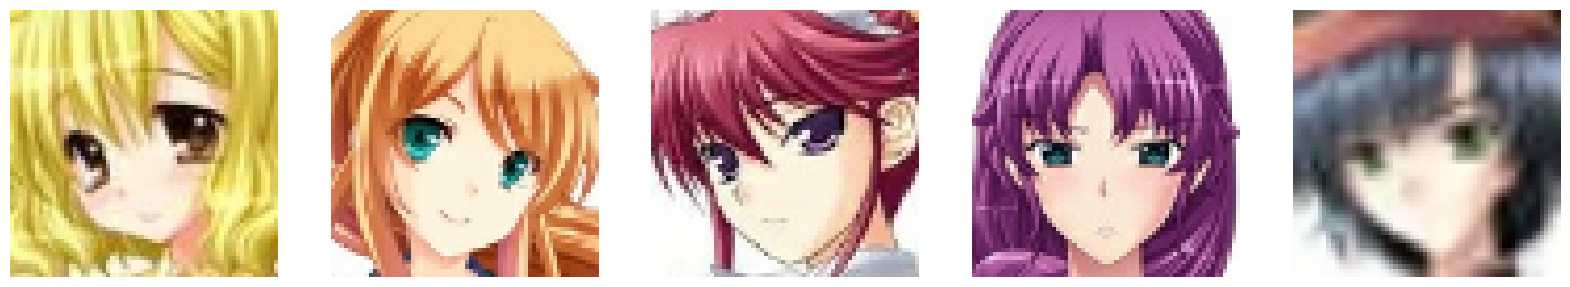

generated images


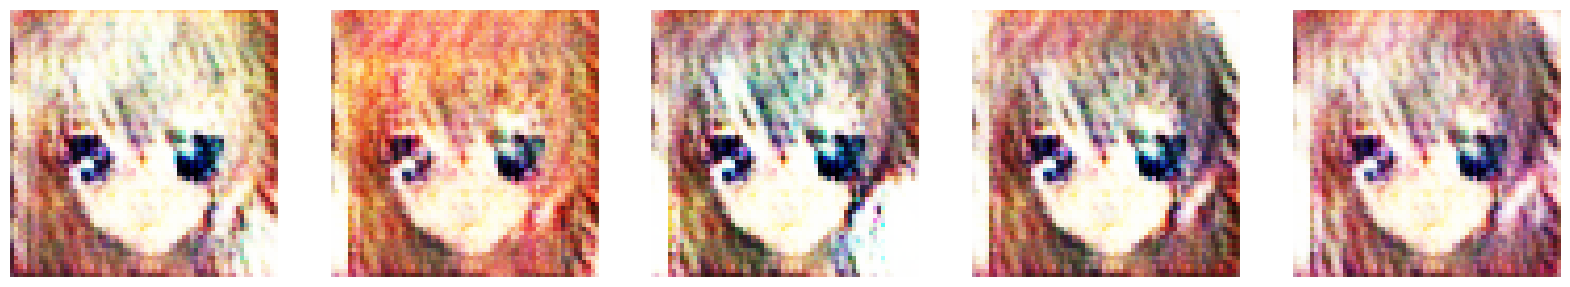

Time for epoch 18 is 66.99437499046326 sec


epoch 19:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 19, iteration 1


epoch 19:   1%|          | 1/157 [00:00<01:37,  1.59it/s]

epoch 19, iteration 2


epoch 19:   1%|▏         | 2/157 [00:01<01:15,  2.05it/s]

epoch 19, iteration 3


epoch 19:   2%|▏         | 3/157 [00:01<01:07,  2.29it/s]

epoch 19, iteration 4


epoch 19:   3%|▎         | 4/157 [00:01<01:03,  2.43it/s]

epoch 19, iteration 5


epoch 19:   3%|▎         | 5/157 [00:02<01:01,  2.48it/s]

epoch 19, iteration 6


epoch 19:   4%|▍         | 6/157 [00:02<00:59,  2.55it/s]

epoch 19, iteration 7


epoch 19:   4%|▍         | 7/157 [00:02<00:57,  2.59it/s]

epoch 19, iteration 8


epoch 19:   5%|▌         | 8/157 [00:03<00:57,  2.61it/s]

epoch 19, iteration 9


epoch 19:   6%|▌         | 9/157 [00:03<00:56,  2.63it/s]

epoch 19, iteration 10


epoch 19:   6%|▋         | 10/157 [00:04<00:56,  2.61it/s]

epoch 19, iteration 11


epoch 19:   7%|▋         | 11/157 [00:04<00:55,  2.63it/s]

epoch 19, iteration 12


epoch 19:   8%|▊         | 12/157 [00:04<00:54,  2.64it/s]

epoch 19, iteration 13


epoch 19:   8%|▊         | 13/157 [00:05<00:54,  2.65it/s]

epoch 19, iteration 14


epoch 19:   9%|▉         | 14/157 [00:05<00:54,  2.63it/s]

epoch 19, iteration 15


epoch 19:  10%|▉         | 15/157 [00:05<00:53,  2.63it/s]

epoch 19, iteration 16


epoch 19:  10%|█         | 16/157 [00:06<00:53,  2.61it/s]

epoch 19, iteration 17


epoch 19:  11%|█         | 17/157 [00:06<00:52,  2.65it/s]

epoch 19, iteration 18


epoch 19:  11%|█▏        | 18/157 [00:07<00:51,  2.68it/s]

epoch 19, iteration 19


epoch 19:  12%|█▏        | 19/157 [00:07<00:53,  2.60it/s]

epoch 19, iteration 20


epoch 19:  13%|█▎        | 20/157 [00:07<00:55,  2.47it/s]

epoch 19, iteration 21


epoch 19:  13%|█▎        | 21/157 [00:08<00:57,  2.38it/s]

epoch 19, iteration 22


epoch 19:  14%|█▍        | 22/157 [00:08<00:56,  2.37it/s]

epoch 19, iteration 23


epoch 19:  15%|█▍        | 23/157 [00:09<00:58,  2.31it/s]

epoch 19, iteration 24


epoch 19:  15%|█▌        | 24/157 [00:09<01:00,  2.22it/s]

epoch 19, iteration 25


epoch 19:  16%|█▌        | 25/157 [00:10<01:01,  2.16it/s]

epoch 19, iteration 26


epoch 19:  17%|█▋        | 26/157 [00:10<00:59,  2.20it/s]

epoch 19, iteration 27


epoch 19:  17%|█▋        | 27/157 [00:11<00:55,  2.34it/s]

epoch 19, iteration 28


epoch 19:  18%|█▊        | 28/157 [00:11<00:53,  2.43it/s]

epoch 19, iteration 29


epoch 19:  18%|█▊        | 29/157 [00:11<00:51,  2.46it/s]

epoch 19, iteration 30


epoch 19:  19%|█▉        | 30/157 [00:12<00:50,  2.54it/s]

epoch 19, iteration 31


epoch 19:  20%|█▉        | 31/157 [00:12<00:49,  2.56it/s]

epoch 19, iteration 32


epoch 19:  20%|██        | 32/157 [00:12<00:47,  2.62it/s]

epoch 19, iteration 33


epoch 19:  21%|██        | 33/157 [00:13<00:46,  2.65it/s]

epoch 19, iteration 34


epoch 19:  22%|██▏       | 34/157 [00:13<00:46,  2.64it/s]

epoch 19, iteration 35


epoch 19:  22%|██▏       | 35/157 [00:14<00:45,  2.68it/s]

epoch 19, iteration 36


epoch 19:  23%|██▎       | 36/157 [00:14<00:45,  2.67it/s]

epoch 19, iteration 37


epoch 19:  24%|██▎       | 37/157 [00:14<00:44,  2.67it/s]

epoch 19, iteration 38


epoch 19:  24%|██▍       | 38/157 [00:15<00:44,  2.69it/s]

epoch 19, iteration 39


epoch 19:  25%|██▍       | 39/157 [00:15<00:43,  2.69it/s]

epoch 19, iteration 40


epoch 19:  25%|██▌       | 40/157 [00:15<00:43,  2.68it/s]

epoch 19, iteration 41


epoch 19:  26%|██▌       | 41/157 [00:16<00:43,  2.64it/s]

epoch 19, iteration 42


epoch 19:  27%|██▋       | 42/157 [00:16<00:43,  2.63it/s]

epoch 19, iteration 43


epoch 19:  27%|██▋       | 43/157 [00:17<00:43,  2.63it/s]

epoch 19, iteration 44


epoch 19:  28%|██▊       | 44/157 [00:17<00:42,  2.65it/s]

epoch 19, iteration 45


epoch 19:  29%|██▊       | 45/157 [00:17<00:42,  2.64it/s]

epoch 19, iteration 46


epoch 19:  29%|██▉       | 46/157 [00:18<00:41,  2.64it/s]

epoch 19, iteration 47


epoch 19:  30%|██▉       | 47/157 [00:18<00:40,  2.69it/s]

epoch 19, iteration 48


epoch 19:  31%|███       | 48/157 [00:18<00:40,  2.70it/s]

epoch 19, iteration 49


epoch 19:  31%|███       | 49/157 [00:19<00:39,  2.71it/s]

epoch 19, iteration 50


epoch 19:  32%|███▏      | 50/157 [00:19<00:40,  2.66it/s]

epoch 19, iteration 51


epoch 19:  32%|███▏      | 51/157 [00:20<00:39,  2.68it/s]

epoch 19, iteration 52


epoch 19:  33%|███▎      | 52/157 [00:20<00:38,  2.71it/s]

epoch 19, iteration 53


epoch 19:  34%|███▍      | 53/157 [00:20<00:40,  2.57it/s]

epoch 19, iteration 54


epoch 19:  34%|███▍      | 54/157 [00:21<00:42,  2.43it/s]

epoch 19, iteration 55


epoch 19:  35%|███▌      | 55/157 [00:21<00:42,  2.40it/s]

epoch 19, iteration 56


epoch 19:  36%|███▌      | 56/157 [00:22<00:43,  2.31it/s]

epoch 19, iteration 57


epoch 19:  36%|███▋      | 57/157 [00:22<00:45,  2.20it/s]

epoch 19, iteration 58


epoch 19:  37%|███▋      | 58/157 [00:23<00:46,  2.14it/s]

epoch 19, iteration 59


epoch 19:  38%|███▊      | 59/157 [00:23<00:45,  2.17it/s]

epoch 19, iteration 60


epoch 19:  38%|███▊      | 60/157 [00:24<00:42,  2.27it/s]

epoch 19, iteration 61


epoch 19:  39%|███▉      | 61/157 [00:24<00:40,  2.37it/s]

epoch 19, iteration 62


epoch 19:  39%|███▉      | 62/157 [00:24<00:39,  2.43it/s]

epoch 19, iteration 63


epoch 19:  40%|████      | 63/157 [00:25<00:37,  2.50it/s]

epoch 19, iteration 64


epoch 19:  41%|████      | 64/157 [00:25<00:36,  2.57it/s]

epoch 19, iteration 65


epoch 19:  41%|████▏     | 65/157 [00:25<00:35,  2.59it/s]

epoch 19, iteration 66


epoch 19:  42%|████▏     | 66/157 [00:26<00:35,  2.59it/s]

epoch 19, iteration 67


epoch 19:  43%|████▎     | 67/157 [00:26<00:34,  2.61it/s]

epoch 19, iteration 68


epoch 19:  43%|████▎     | 68/157 [00:27<00:33,  2.64it/s]

epoch 19, iteration 69


epoch 19:  44%|████▍     | 69/157 [00:27<00:33,  2.62it/s]

epoch 19, iteration 70


epoch 19:  45%|████▍     | 70/157 [00:27<00:33,  2.60it/s]

epoch 19, iteration 71


epoch 19:  45%|████▌     | 71/157 [00:28<00:33,  2.59it/s]

epoch 19, iteration 72


epoch 19:  46%|████▌     | 72/157 [00:28<00:32,  2.61it/s]

epoch 19, iteration 73


epoch 19:  46%|████▋     | 73/157 [00:28<00:31,  2.63it/s]

epoch 19, iteration 74


epoch 19:  47%|████▋     | 74/157 [00:29<00:31,  2.66it/s]

epoch 19, iteration 75


epoch 19:  48%|████▊     | 75/157 [00:29<00:30,  2.66it/s]

epoch 19, iteration 76


epoch 19:  48%|████▊     | 76/157 [00:30<00:30,  2.67it/s]

epoch 19, iteration 77


epoch 19:  49%|████▉     | 77/157 [00:30<00:29,  2.68it/s]

epoch 19, iteration 78


epoch 19:  50%|████▉     | 78/157 [00:30<00:29,  2.67it/s]

epoch 19, iteration 79


epoch 19:  50%|█████     | 79/157 [00:31<00:29,  2.64it/s]

epoch 19, iteration 80


epoch 19:  51%|█████     | 80/157 [00:31<00:28,  2.66it/s]

epoch 19, iteration 81


epoch 19:  52%|█████▏    | 81/157 [00:31<00:28,  2.67it/s]

epoch 19, iteration 82


epoch 19:  52%|█████▏    | 82/157 [00:32<00:28,  2.65it/s]

epoch 19, iteration 83


epoch 19:  53%|█████▎    | 83/157 [00:32<00:27,  2.66it/s]

epoch 19, iteration 84


epoch 19:  54%|█████▎    | 84/157 [00:33<00:27,  2.68it/s]

epoch 19, iteration 85


epoch 19:  54%|█████▍    | 85/157 [00:33<00:27,  2.67it/s]

epoch 19, iteration 86


epoch 19:  55%|█████▍    | 86/157 [00:33<00:28,  2.48it/s]

epoch 19, iteration 87


epoch 19:  55%|█████▌    | 87/157 [00:34<00:29,  2.38it/s]

epoch 19, iteration 88


epoch 19:  56%|█████▌    | 88/157 [00:34<00:30,  2.27it/s]

epoch 19, iteration 89


epoch 19:  57%|█████▋    | 89/157 [00:35<00:30,  2.22it/s]

epoch 19, iteration 90


epoch 19:  57%|█████▋    | 90/157 [00:35<00:30,  2.19it/s]

epoch 19, iteration 91


epoch 19:  58%|█████▊    | 91/157 [00:36<00:30,  2.14it/s]

epoch 19, iteration 92


epoch 19:  59%|█████▊    | 92/157 [00:36<00:30,  2.12it/s]

epoch 19, iteration 93


epoch 19:  59%|█████▉    | 93/157 [00:37<00:28,  2.25it/s]

epoch 19, iteration 94


epoch 19:  60%|█████▉    | 94/157 [00:37<00:26,  2.35it/s]

epoch 19, iteration 95


epoch 19:  61%|██████    | 95/157 [00:37<00:25,  2.43it/s]

epoch 19, iteration 96


epoch 19:  61%|██████    | 96/157 [00:38<00:24,  2.50it/s]

epoch 19, iteration 97


epoch 19:  62%|██████▏   | 97/157 [00:38<00:23,  2.54it/s]

epoch 19, iteration 98


epoch 19:  62%|██████▏   | 98/157 [00:39<00:22,  2.60it/s]

epoch 19, iteration 99


epoch 19:  63%|██████▎   | 99/157 [00:39<00:21,  2.65it/s]

epoch 19, iteration 100


epoch 19:  64%|██████▎   | 100/157 [00:39<00:21,  2.63it/s]

epoch 19, iteration 101


epoch 19:  64%|██████▍   | 101/157 [00:40<00:21,  2.64it/s]

epoch 19, iteration 102


epoch 19:  65%|██████▍   | 102/157 [00:40<00:20,  2.63it/s]

epoch 19, iteration 103


epoch 19:  66%|██████▌   | 103/157 [00:40<00:20,  2.65it/s]

epoch 19, iteration 104


epoch 19:  66%|██████▌   | 104/157 [00:41<00:19,  2.68it/s]

epoch 19, iteration 105


epoch 19:  67%|██████▋   | 105/157 [00:41<00:19,  2.66it/s]

epoch 19, iteration 106


epoch 19:  68%|██████▊   | 106/157 [00:42<00:19,  2.65it/s]

epoch 19, iteration 107


epoch 19:  68%|██████▊   | 107/157 [00:42<00:18,  2.66it/s]

epoch 19, iteration 108


epoch 19:  69%|██████▉   | 108/157 [00:42<00:18,  2.66it/s]

epoch 19, iteration 109


epoch 19:  69%|██████▉   | 109/157 [00:43<00:18,  2.66it/s]

epoch 19, iteration 110


epoch 19:  70%|███████   | 110/157 [00:43<00:17,  2.66it/s]

epoch 19, iteration 111


epoch 19:  71%|███████   | 111/157 [00:43<00:17,  2.66it/s]

epoch 19, iteration 112


epoch 19:  71%|███████▏  | 112/157 [00:44<00:16,  2.65it/s]

epoch 19, iteration 113


epoch 19:  72%|███████▏  | 113/157 [00:44<00:16,  2.64it/s]

epoch 19, iteration 114


epoch 19:  73%|███████▎  | 114/157 [00:45<00:16,  2.65it/s]

epoch 19, iteration 115


epoch 19:  73%|███████▎  | 115/157 [00:45<00:15,  2.68it/s]

epoch 19, iteration 116


epoch 19:  74%|███████▍  | 116/157 [00:45<00:15,  2.68it/s]

epoch 19, iteration 117


epoch 19:  75%|███████▍  | 117/157 [00:46<00:14,  2.69it/s]

epoch 19, iteration 118


epoch 19:  75%|███████▌  | 118/157 [00:46<00:14,  2.67it/s]

epoch 19, iteration 119


epoch 19:  76%|███████▌  | 119/157 [00:46<00:14,  2.55it/s]

epoch 19, iteration 120


epoch 19:  76%|███████▋  | 120/157 [00:47<00:15,  2.42it/s]

epoch 19, iteration 121


epoch 19:  77%|███████▋  | 121/157 [00:47<00:15,  2.36it/s]

epoch 19, iteration 122


epoch 19:  78%|███████▊  | 122/157 [00:48<00:15,  2.24it/s]

epoch 19, iteration 123


epoch 19:  78%|███████▊  | 123/157 [00:48<00:15,  2.16it/s]

epoch 19, iteration 124


epoch 19:  79%|███████▉  | 124/157 [00:49<00:15,  2.11it/s]

epoch 19, iteration 125


epoch 19:  80%|███████▉  | 125/157 [00:49<00:15,  2.09it/s]

epoch 19, iteration 126


epoch 19:  80%|████████  | 126/157 [00:50<00:14,  2.15it/s]

epoch 19, iteration 127


epoch 19:  81%|████████  | 127/157 [00:50<00:13,  2.29it/s]

epoch 19, iteration 128


epoch 19:  82%|████████▏ | 128/157 [00:51<00:12,  2.39it/s]

epoch 19, iteration 129


epoch 19:  82%|████████▏ | 129/157 [00:51<00:11,  2.48it/s]

epoch 19, iteration 130


epoch 19:  83%|████████▎ | 130/157 [00:51<00:10,  2.52it/s]

epoch 19, iteration 131


epoch 19:  83%|████████▎ | 131/157 [00:52<00:10,  2.54it/s]

epoch 19, iteration 132


epoch 19:  84%|████████▍ | 132/157 [00:52<00:09,  2.57it/s]

epoch 19, iteration 133


epoch 19:  85%|████████▍ | 133/157 [00:52<00:09,  2.58it/s]

epoch 19, iteration 134


epoch 19:  85%|████████▌ | 134/157 [00:53<00:08,  2.63it/s]

epoch 19, iteration 135


epoch 19:  86%|████████▌ | 135/157 [00:53<00:08,  2.61it/s]

epoch 19, iteration 136


epoch 19:  87%|████████▋ | 136/157 [00:54<00:08,  2.61it/s]

epoch 19, iteration 137


epoch 19:  87%|████████▋ | 137/157 [00:54<00:07,  2.60it/s]

epoch 19, iteration 138


epoch 19:  88%|████████▊ | 138/157 [00:54<00:07,  2.63it/s]

epoch 19, iteration 139


epoch 19:  89%|████████▊ | 139/157 [00:55<00:06,  2.59it/s]

epoch 19, iteration 140


epoch 19:  89%|████████▉ | 140/157 [00:55<00:06,  2.61it/s]

epoch 19, iteration 141


epoch 19:  90%|████████▉ | 141/157 [00:55<00:06,  2.62it/s]

epoch 19, iteration 142


epoch 19:  90%|█████████ | 142/157 [00:56<00:05,  2.63it/s]

epoch 19, iteration 143


epoch 19:  91%|█████████ | 143/157 [00:56<00:05,  2.64it/s]

epoch 19, iteration 144


epoch 19:  92%|█████████▏| 144/157 [00:57<00:04,  2.62it/s]

epoch 19, iteration 145


epoch 19:  92%|█████████▏| 145/157 [00:57<00:04,  2.62it/s]

epoch 19, iteration 146


epoch 19:  93%|█████████▎| 146/157 [00:57<00:04,  2.64it/s]

epoch 19, iteration 147


epoch 19:  94%|█████████▎| 147/157 [00:58<00:03,  2.66it/s]

epoch 19, iteration 148


epoch 19:  94%|█████████▍| 148/157 [00:58<00:03,  2.64it/s]

epoch 19, iteration 149


epoch 19:  95%|█████████▍| 149/157 [00:59<00:03,  2.66it/s]

epoch 19, iteration 150


epoch 19:  96%|█████████▌| 150/157 [00:59<00:02,  2.66it/s]

epoch 19, iteration 151


epoch 19:  96%|█████████▌| 151/157 [00:59<00:02,  2.70it/s]

epoch 19, iteration 152


epoch 19:  97%|█████████▋| 152/157 [01:00<00:01,  2.62it/s]

epoch 19, iteration 153


epoch 19:  97%|█████████▋| 153/157 [01:00<00:01,  2.51it/s]

epoch 19, iteration 154


epoch 19:  98%|█████████▊| 154/157 [01:01<00:01,  2.49it/s]

epoch 19, iteration 155


epoch 19:  99%|█████████▊| 155/157 [01:01<00:00,  2.45it/s]

epoch 19, iteration 156


epoch 19:  99%|█████████▉| 156/157 [01:01<00:00,  2.38it/s]

epoch 19, iteration 157


epoch 19: 100%|██████████| 157/157 [01:21<00:00,  1.92it/s]


orignal images


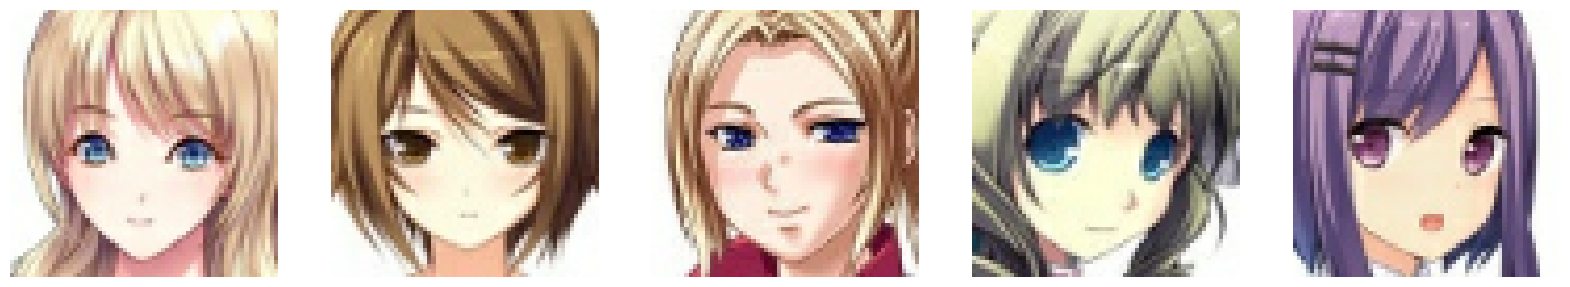

generated images


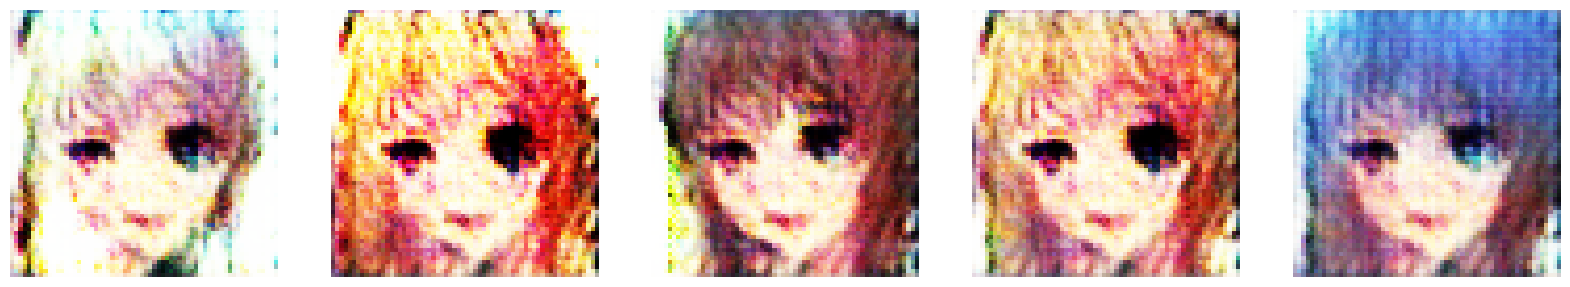

Time for epoch 19 is 86.08574366569519 sec


epoch 20:   0%|          | 0/157 [00:00<?, ?it/s]

epoch 20, iteration 1


epoch 20:   1%|          | 1/157 [00:00<02:07,  1.22it/s]

epoch 20, iteration 2


epoch 20:   1%|▏         | 2/157 [00:01<01:37,  1.59it/s]

epoch 20, iteration 3


epoch 20:   2%|▏         | 3/157 [00:01<01:20,  1.91it/s]

epoch 20, iteration 4


epoch 20:   3%|▎         | 4/157 [00:02<01:10,  2.17it/s]

epoch 20, iteration 5


epoch 20:   3%|▎         | 5/157 [00:02<01:05,  2.32it/s]

epoch 20, iteration 6


epoch 20:   4%|▍         | 6/157 [00:02<01:02,  2.41it/s]

epoch 20, iteration 7


epoch 20:   4%|▍         | 7/157 [00:03<01:00,  2.50it/s]

epoch 20, iteration 8


epoch 20:   5%|▌         | 8/157 [00:03<00:58,  2.55it/s]

epoch 20, iteration 9


epoch 20:   6%|▌         | 9/157 [00:03<00:57,  2.60it/s]

epoch 20, iteration 10


epoch 20:   6%|▋         | 10/157 [00:04<00:55,  2.63it/s]

epoch 20, iteration 11


epoch 20:   7%|▋         | 11/157 [00:04<00:55,  2.65it/s]

epoch 20, iteration 12


epoch 20:   8%|▊         | 12/157 [00:05<00:54,  2.65it/s]

epoch 20, iteration 13


epoch 20:   8%|▊         | 13/157 [00:05<00:53,  2.67it/s]

epoch 20, iteration 14


epoch 20:   9%|▉         | 14/157 [00:05<00:53,  2.68it/s]

epoch 20, iteration 15


epoch 20:  10%|▉         | 15/157 [00:06<00:53,  2.67it/s]

epoch 20, iteration 16


epoch 20:  10%|█         | 16/157 [00:06<00:53,  2.65it/s]

epoch 20, iteration 17


epoch 20:  11%|█         | 17/157 [00:06<00:52,  2.66it/s]

epoch 20, iteration 18


epoch 20:  11%|█▏        | 18/157 [00:07<00:51,  2.68it/s]

epoch 20, iteration 19


epoch 20:  12%|█▏        | 19/157 [00:07<00:51,  2.70it/s]

epoch 20, iteration 20


epoch 20:  13%|█▎        | 20/157 [00:08<00:50,  2.69it/s]

epoch 20, iteration 21


epoch 20:  13%|█▎        | 21/157 [00:08<00:50,  2.68it/s]

epoch 20, iteration 22


epoch 20:  14%|█▍        | 22/157 [00:08<00:50,  2.69it/s]

epoch 20, iteration 23


epoch 20:  15%|█▍        | 23/157 [00:09<00:50,  2.65it/s]

epoch 20, iteration 24


epoch 20:  15%|█▌        | 24/157 [00:09<00:49,  2.66it/s]

epoch 20, iteration 25


epoch 20:  16%|█▌        | 25/157 [00:09<00:50,  2.64it/s]

epoch 20, iteration 26


epoch 20:  17%|█▋        | 26/157 [00:10<00:49,  2.63it/s]

epoch 20, iteration 27


epoch 20:  17%|█▋        | 27/157 [00:10<00:49,  2.65it/s]

epoch 20, iteration 28


epoch 20:  18%|█▊        | 28/157 [00:11<00:48,  2.65it/s]

epoch 20, iteration 29


epoch 20:  18%|█▊        | 29/157 [00:11<00:50,  2.55it/s]

epoch 20, iteration 30


epoch 20:  19%|█▉        | 30/157 [00:11<00:51,  2.49it/s]

epoch 20, iteration 31


epoch 20:  20%|█▉        | 31/157 [00:12<00:53,  2.36it/s]

epoch 20, iteration 32


epoch 20:  20%|██        | 32/157 [00:12<00:52,  2.36it/s]

epoch 20, iteration 33


epoch 20:  21%|██        | 33/157 [00:13<00:54,  2.28it/s]

epoch 20, iteration 34


epoch 20:  22%|██▏       | 34/157 [00:13<00:56,  2.18it/s]

epoch 20, iteration 35


epoch 20:  22%|██▏       | 35/157 [00:14<00:57,  2.13it/s]

epoch 20, iteration 36


epoch 20:  23%|██▎       | 36/157 [00:14<00:56,  2.16it/s]

epoch 20, iteration 37


epoch 20:  24%|██▎       | 37/157 [00:15<00:53,  2.25it/s]

epoch 20, iteration 38


epoch 20:  24%|██▍       | 38/157 [00:15<00:50,  2.35it/s]

epoch 20, iteration 39


epoch 20:  25%|██▍       | 39/157 [00:15<00:49,  2.41it/s]

epoch 20, iteration 40


epoch 20:  25%|██▌       | 40/157 [00:16<00:47,  2.45it/s]

epoch 20, iteration 41


epoch 20:  26%|██▌       | 41/157 [00:16<00:45,  2.53it/s]

epoch 20, iteration 42


epoch 20:  27%|██▋       | 42/157 [00:17<00:44,  2.57it/s]

epoch 20, iteration 43


epoch 20:  27%|██▋       | 43/157 [00:17<00:44,  2.57it/s]

epoch 20, iteration 44


epoch 20:  28%|██▊       | 44/157 [00:17<00:43,  2.62it/s]

epoch 20, iteration 45


epoch 20:  29%|██▊       | 45/157 [00:18<00:42,  2.65it/s]

epoch 20, iteration 46


epoch 20:  29%|██▉       | 46/157 [00:18<00:41,  2.65it/s]

epoch 20, iteration 47


epoch 20:  30%|██▉       | 47/157 [00:18<00:41,  2.66it/s]

epoch 20, iteration 48


epoch 20:  31%|███       | 48/157 [00:19<00:40,  2.66it/s]

epoch 20, iteration 49


epoch 20:  31%|███       | 49/157 [00:19<00:40,  2.64it/s]

epoch 20, iteration 50


epoch 20:  32%|███▏      | 50/157 [00:20<00:40,  2.64it/s]

epoch 20, iteration 51


epoch 20:  32%|███▏      | 51/157 [00:20<00:40,  2.60it/s]

epoch 20, iteration 52


epoch 20:  33%|███▎      | 52/157 [00:20<00:40,  2.62it/s]

epoch 20, iteration 53


epoch 20:  34%|███▍      | 53/157 [00:21<00:39,  2.65it/s]

epoch 20, iteration 54


epoch 20:  34%|███▍      | 54/157 [00:21<00:38,  2.67it/s]

epoch 20, iteration 55


epoch 20:  35%|███▌      | 55/157 [00:21<00:38,  2.64it/s]

epoch 20, iteration 56


epoch 20:  36%|███▌      | 56/157 [00:22<00:38,  2.60it/s]

epoch 20, iteration 57


epoch 20:  36%|███▋      | 57/157 [00:22<00:39,  2.56it/s]

epoch 20, iteration 58


epoch 20:  37%|███▋      | 58/157 [00:23<00:38,  2.55it/s]

epoch 20, iteration 59


epoch 20:  38%|███▊      | 59/157 [00:23<00:38,  2.52it/s]

epoch 20, iteration 60


epoch 20:  38%|███▊      | 60/157 [00:23<00:37,  2.57it/s]

epoch 20, iteration 61


epoch 20:  39%|███▉      | 61/157 [00:24<00:36,  2.60it/s]

epoch 20, iteration 62


epoch 20:  39%|███▉      | 62/157 [00:24<00:36,  2.60it/s]

epoch 20, iteration 63


epoch 20:  40%|████      | 63/157 [00:25<00:38,  2.44it/s]

epoch 20, iteration 64


epoch 20:  41%|████      | 64/157 [00:25<00:40,  2.27it/s]

epoch 20, iteration 65


epoch 20:  41%|████▏     | 65/157 [00:26<00:40,  2.27it/s]

epoch 20, iteration 66


epoch 20:  42%|████▏     | 66/157 [00:26<00:42,  2.17it/s]

epoch 20, iteration 67


epoch 20:  43%|████▎     | 67/157 [00:27<00:42,  2.10it/s]

epoch 20, iteration 68


epoch 20:  43%|████▎     | 68/157 [00:27<00:42,  2.10it/s]

epoch 20, iteration 69


epoch 20:  44%|████▍     | 69/157 [00:28<00:41,  2.10it/s]

epoch 20, iteration 70


epoch 20:  45%|████▍     | 70/157 [00:28<00:38,  2.23it/s]

epoch 20, iteration 71


epoch 20:  45%|████▌     | 71/157 [00:28<00:37,  2.31it/s]

epoch 20, iteration 72


epoch 20:  46%|████▌     | 72/157 [00:29<00:35,  2.37it/s]

epoch 20, iteration 73


epoch 20:  46%|████▋     | 73/157 [00:29<00:34,  2.47it/s]

epoch 20, iteration 74


epoch 20:  47%|████▋     | 74/157 [00:30<00:33,  2.47it/s]

epoch 20, iteration 75


epoch 20:  48%|████▊     | 75/157 [00:30<00:32,  2.52it/s]

epoch 20, iteration 76


epoch 20:  48%|████▊     | 76/157 [00:30<00:31,  2.57it/s]

epoch 20, iteration 77


epoch 20:  49%|████▉     | 77/157 [00:31<00:31,  2.57it/s]

epoch 20, iteration 78


epoch 20:  50%|████▉     | 78/157 [00:31<00:30,  2.59it/s]

epoch 20, iteration 79


epoch 20:  50%|█████     | 79/157 [00:31<00:30,  2.58it/s]

epoch 20, iteration 80


epoch 20:  51%|█████     | 80/157 [00:32<00:29,  2.59it/s]

epoch 20, iteration 81


epoch 20:  52%|█████▏    | 81/157 [00:32<00:29,  2.61it/s]

epoch 20, iteration 82


epoch 20:  52%|█████▏    | 82/157 [00:33<00:28,  2.65it/s]

epoch 20, iteration 83


epoch 20:  53%|█████▎    | 83/157 [00:33<00:27,  2.65it/s]

epoch 20, iteration 84


epoch 20:  54%|█████▎    | 84/157 [00:33<00:27,  2.66it/s]

epoch 20, iteration 85


epoch 20:  54%|█████▍    | 85/157 [00:34<00:27,  2.65it/s]

epoch 20, iteration 86


epoch 20:  55%|█████▍    | 86/157 [00:34<00:26,  2.65it/s]

epoch 20, iteration 87


epoch 20:  55%|█████▌    | 87/157 [00:34<00:26,  2.67it/s]

epoch 20, iteration 88


epoch 20:  56%|█████▌    | 88/157 [00:35<00:26,  2.65it/s]

epoch 20, iteration 89


epoch 20:  57%|█████▋    | 89/157 [00:35<00:25,  2.67it/s]

epoch 20, iteration 90


epoch 20:  57%|█████▋    | 90/157 [00:36<00:25,  2.67it/s]

epoch 20, iteration 91


epoch 20:  58%|█████▊    | 91/157 [00:36<00:24,  2.65it/s]

epoch 20, iteration 92


epoch 20:  59%|█████▊    | 92/157 [00:36<00:24,  2.66it/s]

epoch 20, iteration 93


epoch 20:  59%|█████▉    | 93/157 [00:37<00:24,  2.66it/s]

epoch 20, iteration 94


epoch 20:  60%|█████▉    | 94/157 [00:37<00:23,  2.64it/s]

epoch 20, iteration 95


epoch 20:  61%|██████    | 95/157 [00:37<00:23,  2.63it/s]

epoch 20, iteration 96


epoch 20:  61%|██████    | 96/157 [00:38<00:25,  2.42it/s]

epoch 20, iteration 97


epoch 20:  62%|██████▏   | 97/157 [00:38<00:25,  2.31it/s]

epoch 20, iteration 98


epoch 20:  62%|██████▏   | 98/157 [00:39<00:25,  2.31it/s]

epoch 20, iteration 99


epoch 20:  63%|██████▎   | 99/157 [00:39<00:25,  2.24it/s]

epoch 20, iteration 100


epoch 20:  64%|██████▎   | 100/157 [00:40<00:26,  2.19it/s]

epoch 20, iteration 101


epoch 20:  64%|██████▍   | 101/157 [00:40<00:25,  2.18it/s]

epoch 20, iteration 102


epoch 20:  65%|██████▍   | 102/157 [00:41<00:25,  2.15it/s]

epoch 20, iteration 103


epoch 20:  66%|██████▌   | 103/157 [00:41<00:23,  2.29it/s]

epoch 20, iteration 104


epoch 20:  66%|██████▌   | 104/157 [00:42<00:22,  2.39it/s]

epoch 20, iteration 105


epoch 20:  67%|██████▋   | 105/157 [00:42<00:21,  2.42it/s]

epoch 20, iteration 106


epoch 20:  68%|██████▊   | 106/157 [00:42<00:20,  2.46it/s]

epoch 20, iteration 107


epoch 20:  68%|██████▊   | 107/157 [00:43<00:19,  2.51it/s]

epoch 20, iteration 108


epoch 20:  69%|██████▉   | 108/157 [00:43<00:19,  2.54it/s]

epoch 20, iteration 109


epoch 20:  69%|██████▉   | 109/157 [00:43<00:18,  2.56it/s]

epoch 20, iteration 110


epoch 20:  70%|███████   | 110/157 [00:44<00:18,  2.56it/s]

epoch 20, iteration 111


epoch 20:  71%|███████   | 111/157 [00:44<00:17,  2.58it/s]

epoch 20, iteration 112


epoch 20:  71%|███████▏  | 112/157 [00:45<00:16,  2.65it/s]

epoch 20, iteration 113


epoch 20:  72%|███████▏  | 113/157 [00:45<00:16,  2.64it/s]

epoch 20, iteration 114


epoch 20:  73%|███████▎  | 114/157 [00:45<00:16,  2.65it/s]

epoch 20, iteration 115


epoch 20:  73%|███████▎  | 115/157 [00:46<00:15,  2.66it/s]

epoch 20, iteration 116


epoch 20:  74%|███████▍  | 116/157 [00:46<00:15,  2.66it/s]

epoch 20, iteration 117


epoch 20:  75%|███████▍  | 117/157 [00:46<00:14,  2.68it/s]

epoch 20, iteration 118


epoch 20:  75%|███████▌  | 118/157 [00:47<00:14,  2.68it/s]

epoch 20, iteration 119


epoch 20:  76%|███████▌  | 119/157 [00:47<00:14,  2.65it/s]

epoch 20, iteration 120


epoch 20:  76%|███████▋  | 120/157 [00:48<00:14,  2.63it/s]

epoch 20, iteration 121


epoch 20:  77%|███████▋  | 121/157 [00:48<00:13,  2.61it/s]

epoch 20, iteration 122


epoch 20:  78%|███████▊  | 122/157 [00:48<00:13,  2.64it/s]

epoch 20, iteration 123


epoch 20:  78%|███████▊  | 123/157 [00:49<00:12,  2.66it/s]

epoch 20, iteration 124


epoch 20:  79%|███████▉  | 124/157 [00:49<00:12,  2.64it/s]

epoch 20, iteration 125


epoch 20:  80%|███████▉  | 125/157 [00:49<00:12,  2.66it/s]

epoch 20, iteration 126


epoch 20:  80%|████████  | 126/157 [00:50<00:11,  2.65it/s]

epoch 20, iteration 127


epoch 20:  81%|████████  | 127/157 [00:50<00:11,  2.63it/s]

epoch 20, iteration 128


epoch 20:  82%|████████▏ | 128/157 [00:51<00:11,  2.62it/s]

epoch 20, iteration 129


epoch 20:  82%|████████▏ | 129/157 [00:51<00:11,  2.46it/s]

epoch 20, iteration 130


epoch 20:  83%|████████▎ | 130/157 [00:52<00:11,  2.39it/s]

epoch 20, iteration 131


epoch 20:  83%|████████▎ | 131/157 [00:52<00:11,  2.35it/s]

epoch 20, iteration 132


epoch 20:  84%|████████▍ | 132/157 [00:52<00:11,  2.26it/s]

epoch 20, iteration 133


epoch 20:  85%|████████▍ | 133/157 [00:53<00:11,  2.14it/s]

epoch 20, iteration 134


epoch 20:  85%|████████▌ | 134/157 [00:53<00:10,  2.12it/s]

epoch 20, iteration 135


epoch 20:  86%|████████▌ | 135/157 [00:54<00:10,  2.10it/s]

epoch 20, iteration 136


epoch 20:  87%|████████▋ | 136/157 [00:54<00:09,  2.23it/s]

epoch 20, iteration 137


epoch 20:  87%|████████▋ | 137/157 [00:55<00:08,  2.35it/s]

epoch 20, iteration 138


epoch 20:  88%|████████▊ | 138/157 [00:55<00:07,  2.44it/s]

epoch 20, iteration 139


epoch 20:  89%|████████▊ | 139/157 [00:55<00:07,  2.49it/s]

epoch 20, iteration 140


epoch 20:  89%|████████▉ | 140/157 [00:56<00:06,  2.55it/s]

epoch 20, iteration 141


epoch 20:  90%|████████▉ | 141/157 [00:56<00:06,  2.57it/s]

epoch 20, iteration 142


epoch 20:  90%|█████████ | 142/157 [00:57<00:05,  2.57it/s]

epoch 20, iteration 143


epoch 20:  91%|█████████ | 143/157 [00:57<00:05,  2.62it/s]

epoch 20, iteration 144


epoch 20:  92%|█████████▏| 144/157 [00:57<00:04,  2.61it/s]

epoch 20, iteration 145


epoch 20:  92%|█████████▏| 145/157 [00:58<00:04,  2.65it/s]

epoch 20, iteration 146


epoch 20:  93%|█████████▎| 146/157 [00:58<00:04,  2.66it/s]

epoch 20, iteration 147


epoch 20:  94%|█████████▎| 147/157 [00:58<00:03,  2.67it/s]

epoch 20, iteration 148


epoch 20:  94%|█████████▍| 148/157 [00:59<00:03,  2.69it/s]

epoch 20, iteration 149


epoch 20:  95%|█████████▍| 149/157 [00:59<00:02,  2.67it/s]

epoch 20, iteration 150


epoch 20:  96%|█████████▌| 150/157 [01:00<00:02,  2.64it/s]

epoch 20, iteration 151


epoch 20:  96%|█████████▌| 151/157 [01:00<00:02,  2.67it/s]

epoch 20, iteration 152


epoch 20:  97%|█████████▋| 152/157 [01:00<00:01,  2.70it/s]

epoch 20, iteration 153


epoch 20:  97%|█████████▋| 153/157 [01:01<00:01,  2.72it/s]

epoch 20, iteration 154


epoch 20:  98%|█████████▊| 154/157 [01:01<00:01,  2.75it/s]

epoch 20, iteration 155


epoch 20:  99%|█████████▊| 155/157 [01:01<00:00,  2.77it/s]

epoch 20, iteration 156


epoch 20:  99%|█████████▉| 156/157 [01:02<00:00,  2.77it/s]

epoch 20, iteration 157


epoch 20: 100%|██████████| 157/157 [01:02<00:00,  2.51it/s]


orignal images


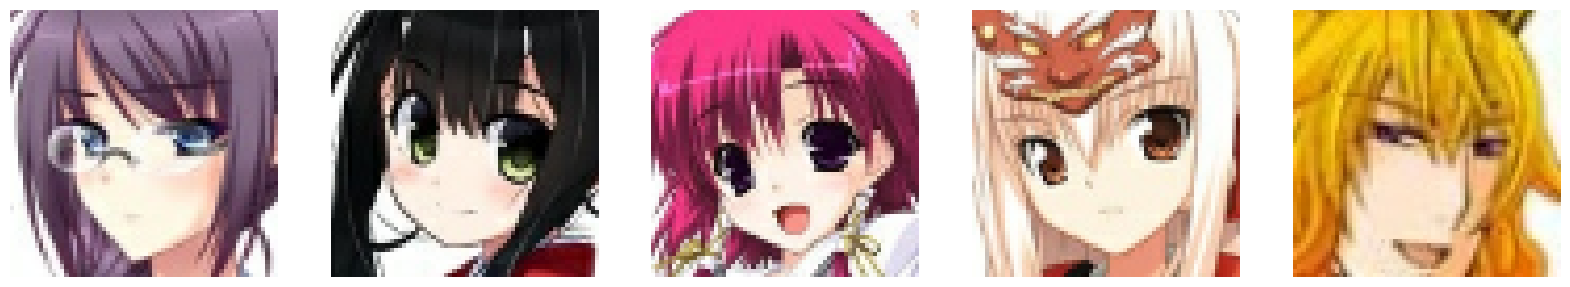

generated images


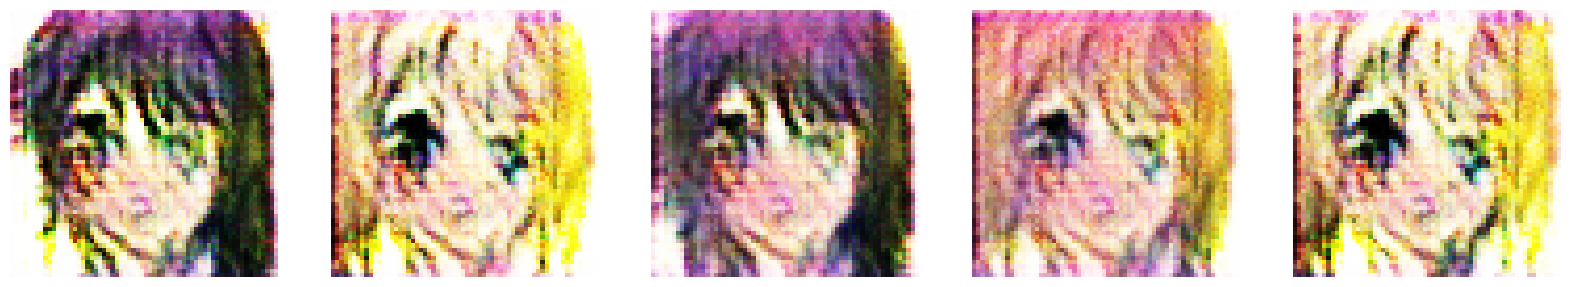

Time for epoch 20 is 67.3351378440857 sec


In [ ]:
epochs=20

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

__Thank you for completing this lab!__
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown5.jpeg" width="500px"></center>


----


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.

[Junxing(J.C.) Chen](https://www.linkedin.com/in/junxing-chen-3591a4162/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01) is a Data Scientist at IBM with strong interests in machine learning and cutting-edge technologies.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description |
| ----------------- | ------- | ----------- | ------------------ |
| 2022-08-30        | 0.1     | Joseph Santarcangelo  | Created Lab       |
| 2022-09-06        | 0.1     | Roxanne Li  | Reviewed and edited Lab       |
| 2022-09-23        | 0.1     | Steve Hord  | QA pass edits                 |
| 2022-10-11        | 0.2     | Junxing(J.C.) Chen  | Reviewed and edited Lab       |


Copyright © 2022 IBM Corporation. All rights reserved.
